In [66]:
import numpy as np
from scipy import stats
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
pylab.rcParams['font.size'] = 24

Features
Index(['accident_reference', 'vehicle_reference', 'casualty_reference',
       'casualty_class', 'sex_of_casualty', 'age_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')
=====



ACCIDENT_REFERENCE
VEHICLE_REFERENCE
Mean: 1.4507790422952793
Standard Deviation: 0.711698236367842
Variance: 0.5065143796490967
Modal: 0    1
dtype: int64
Median: 1.0


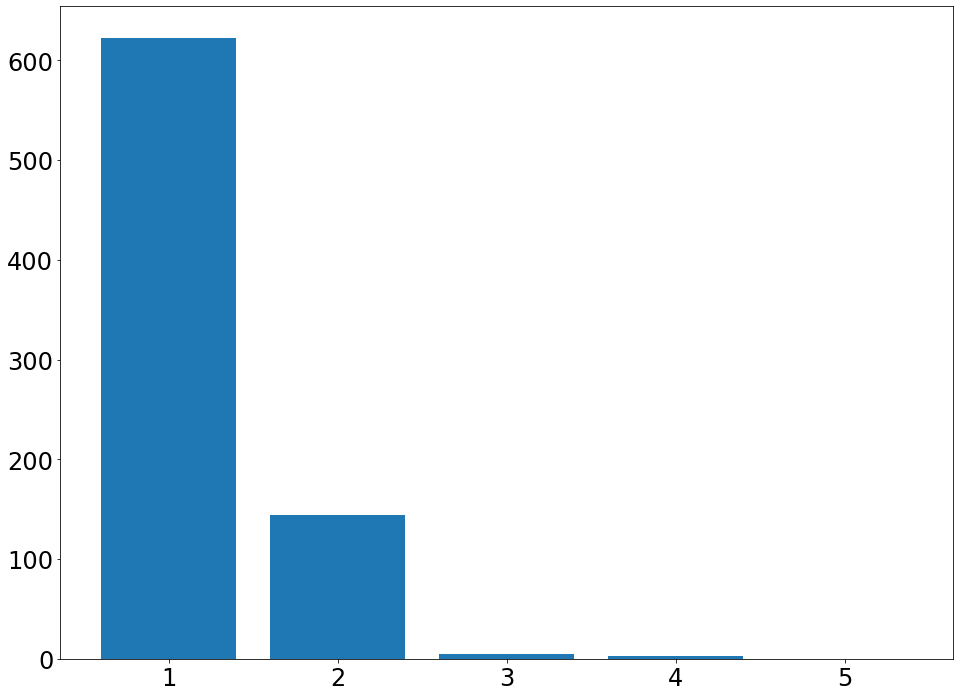

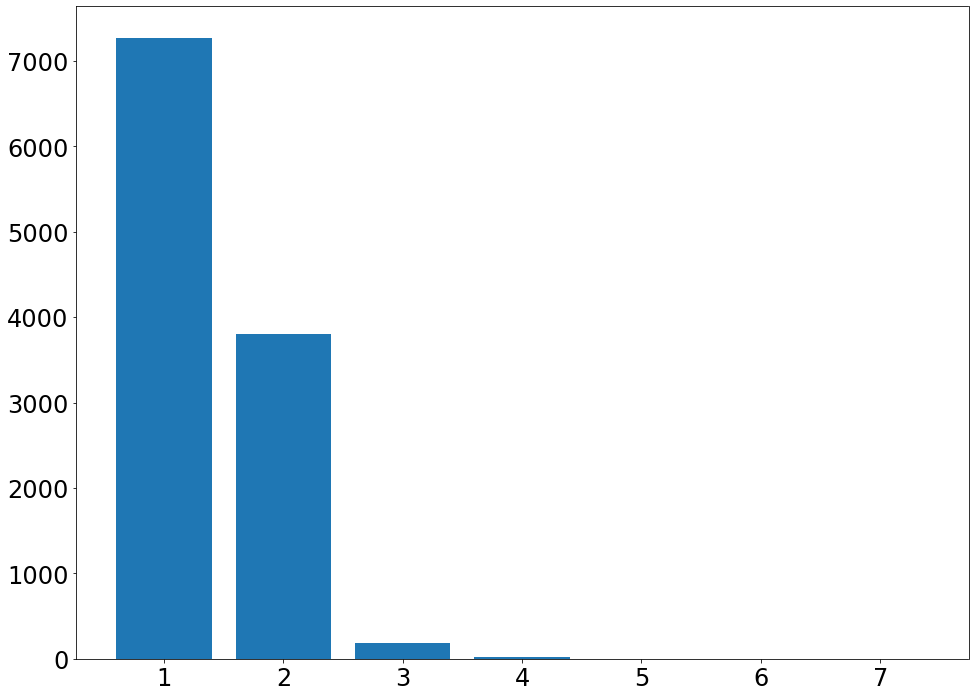

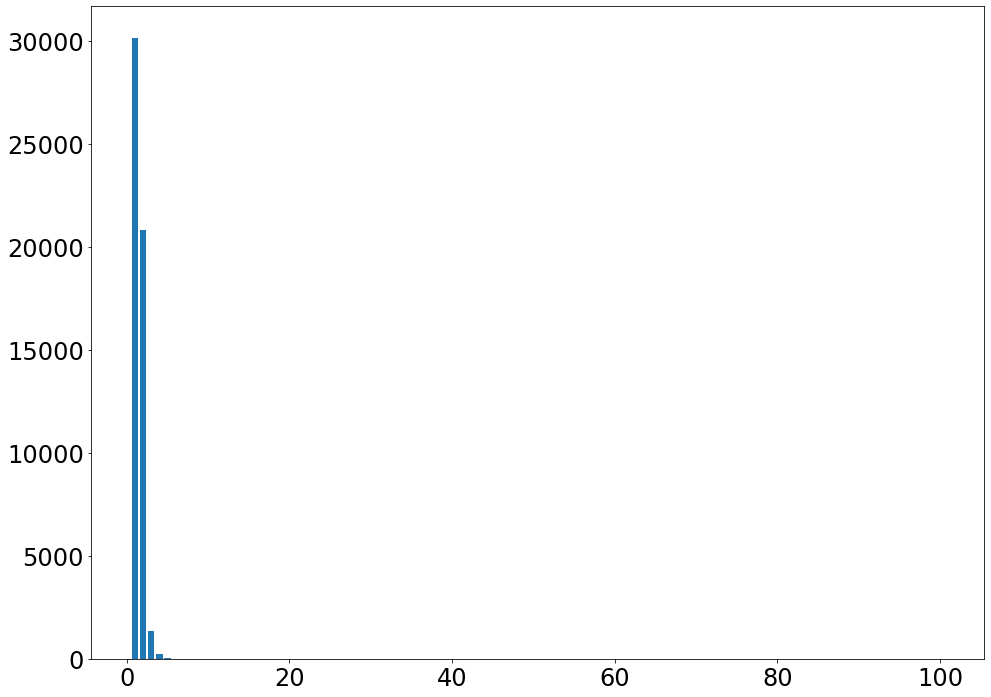

CASUALTY_REFERENCE
Mean: 1.3239240877715839
Standard Deviation: 0.7607090269656084
Variance: 0.5786782237069626
Modal: 0    1
dtype: int64
Median: 1.0


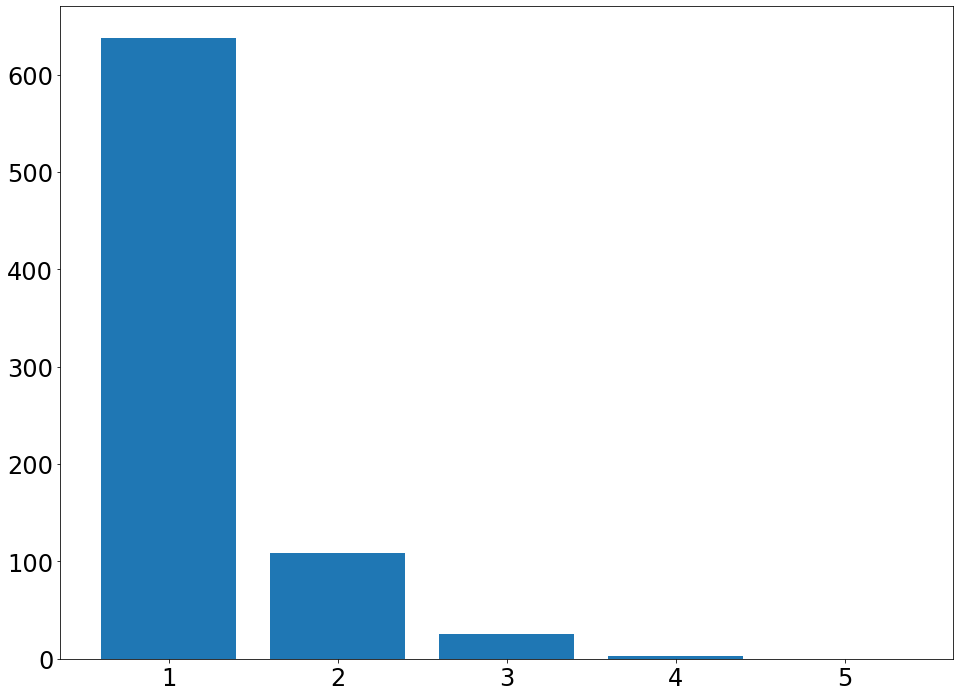

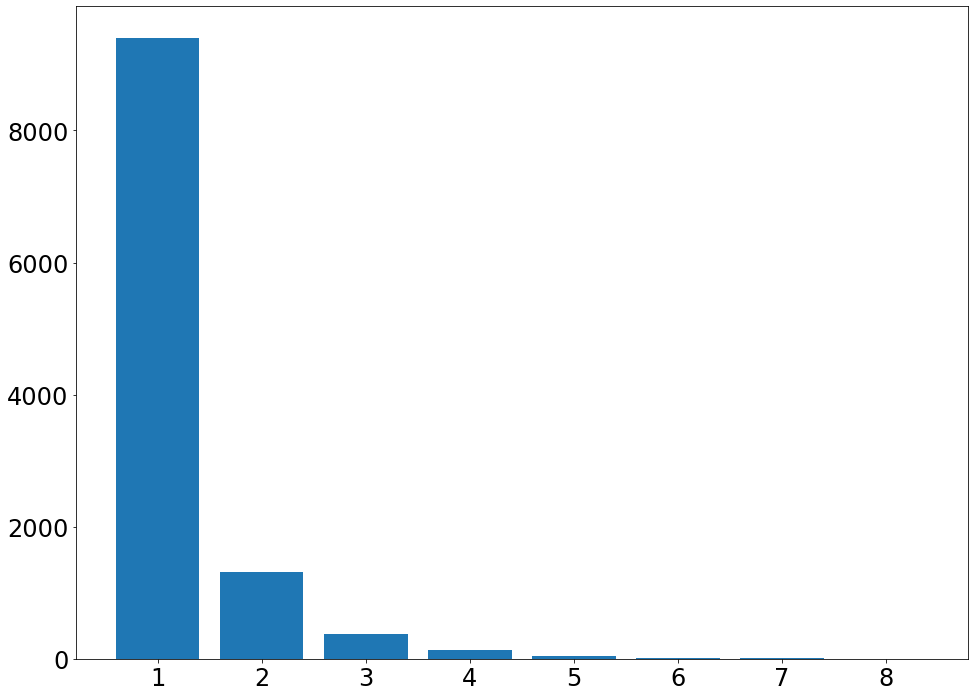

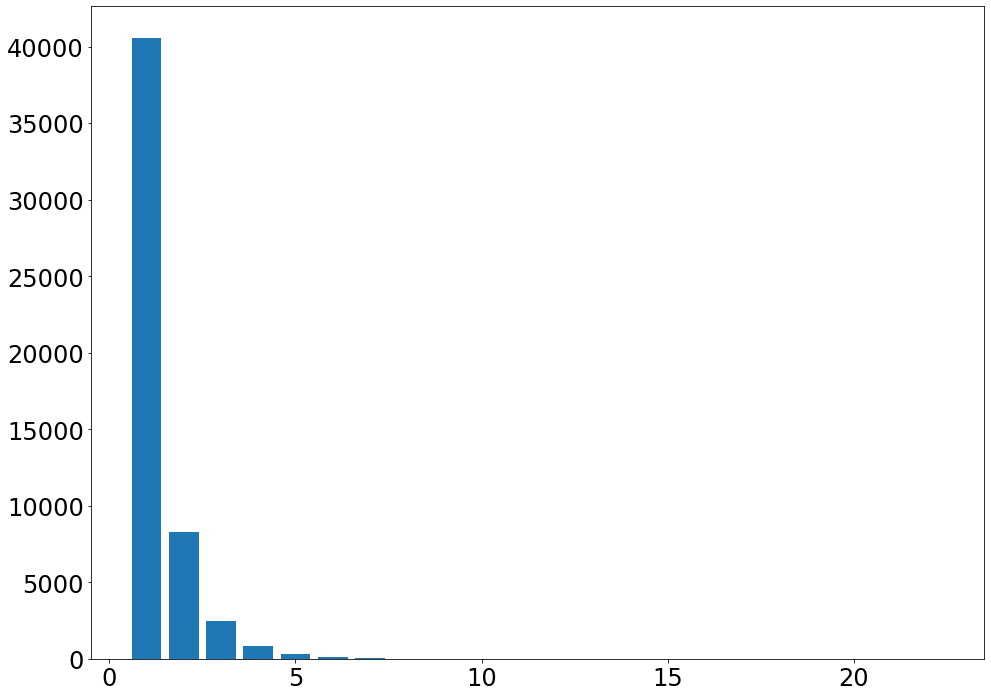

CASUALTY_CLASS
Mean: 1.4528173690143455
Standard Deviation: 0.7137427377010421
Variance: 0.5094286956209786
Modal: 0    1
dtype: int64
Median: 1.0


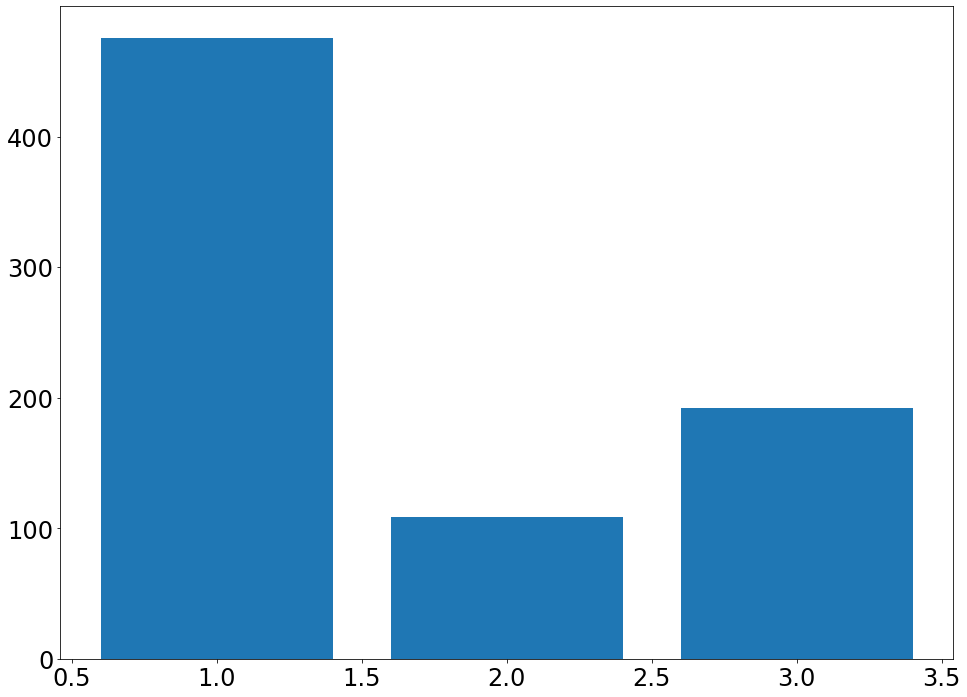

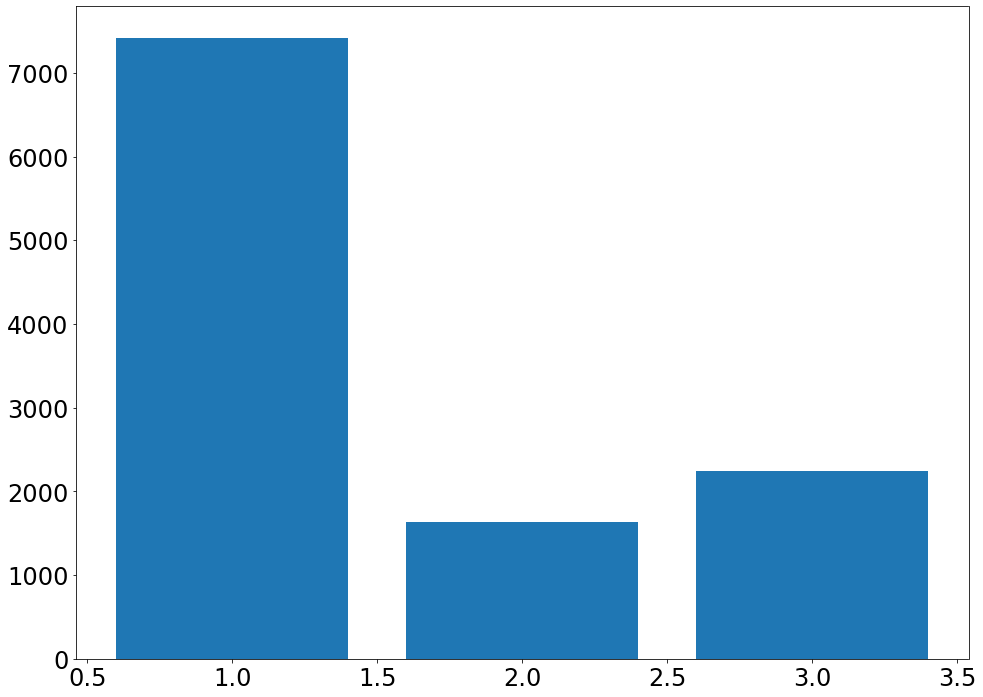

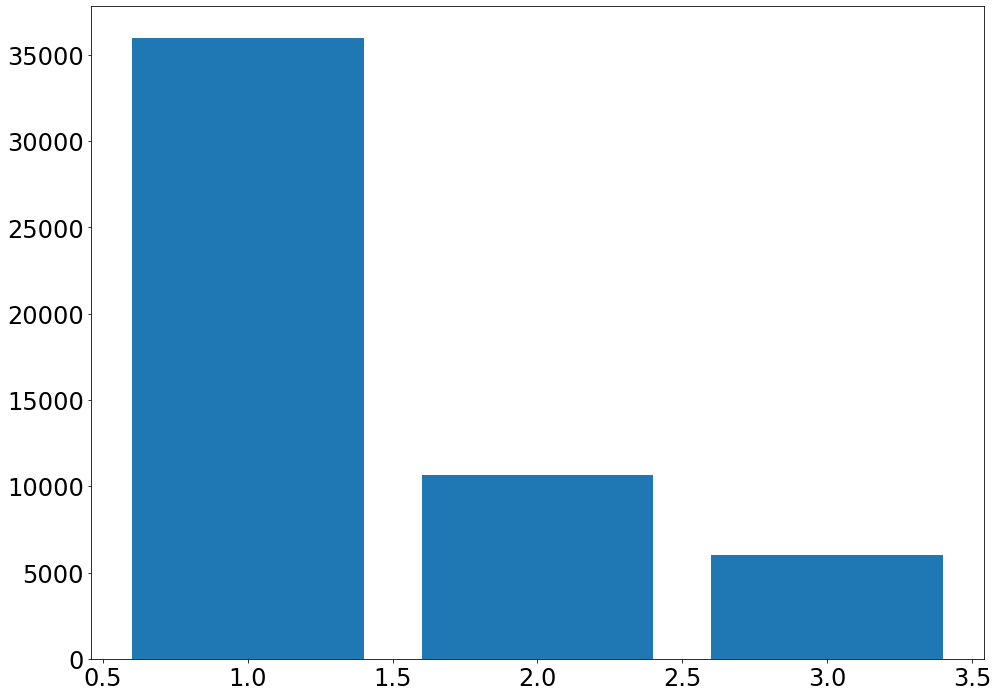

SEX_OF_CASUALTY
Mean: 1.3463302398122268
Standard Deviation: 0.5309312904409258
Variance: 0.28188803516926675
Modal: 0    1
dtype: int64
Median: 1.0


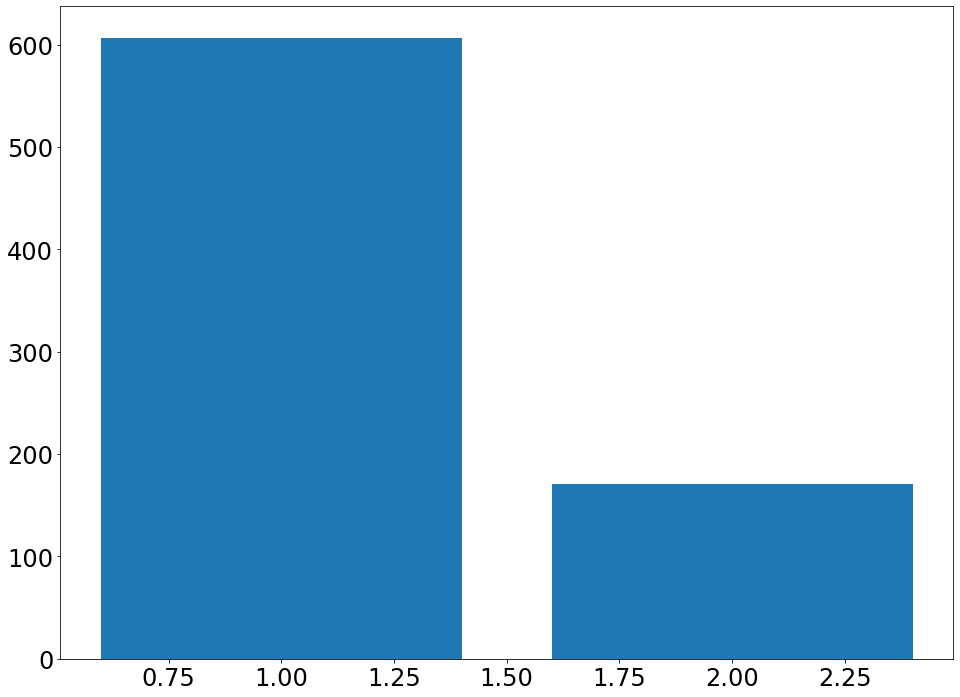

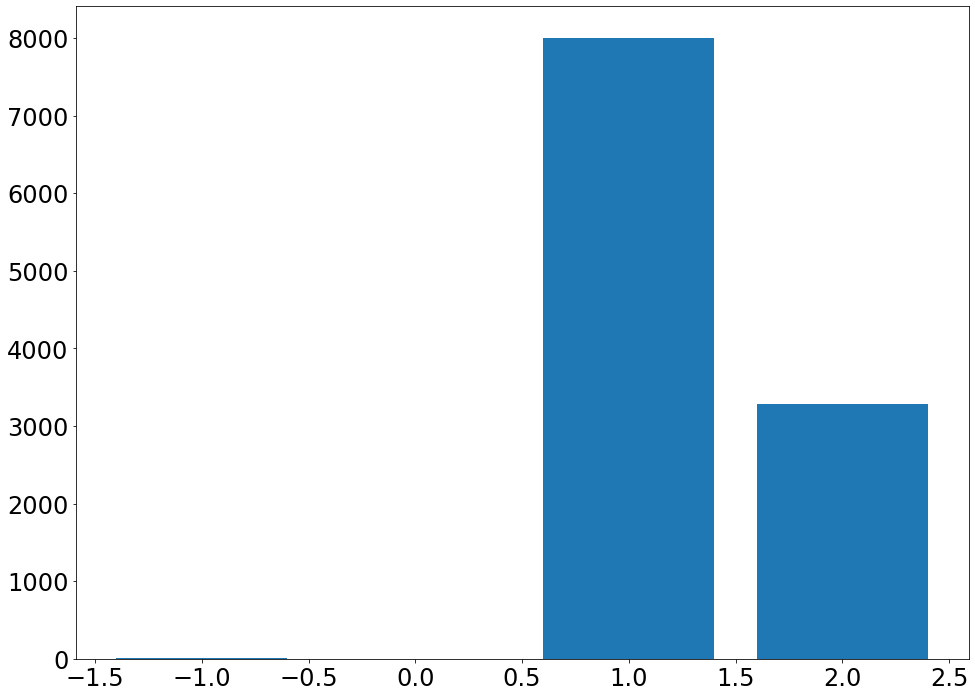

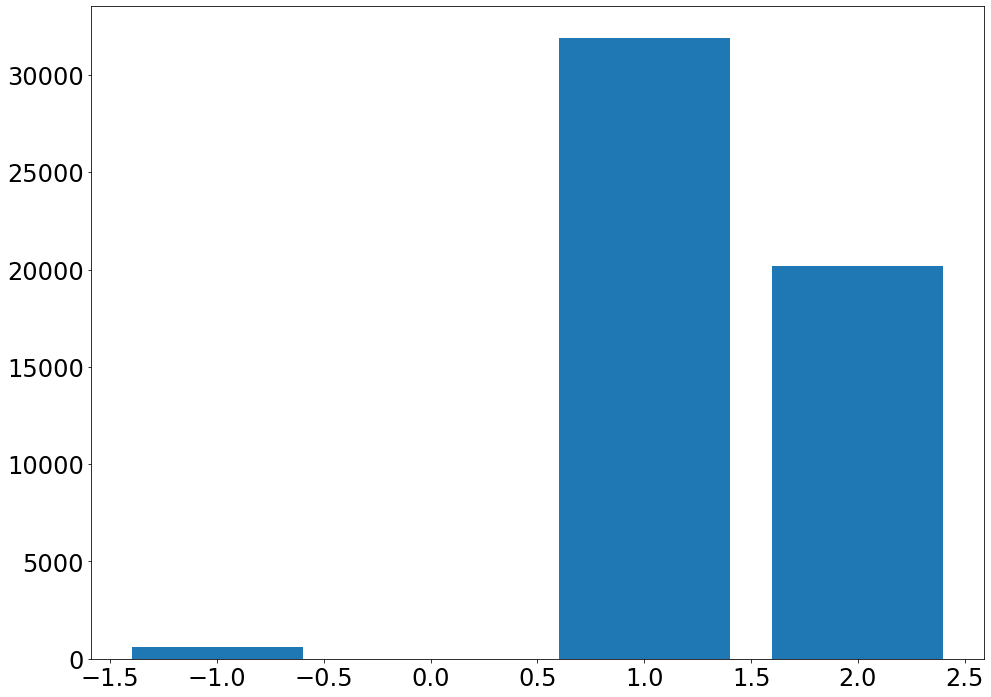

AGE_OF_CASUALTY
Mean: 35.9485168084745
Standard Deviation: 19.050745851368358
Variance: 362.9309174934287
Modal: 0    30
dtype: int64
Median: 33.0


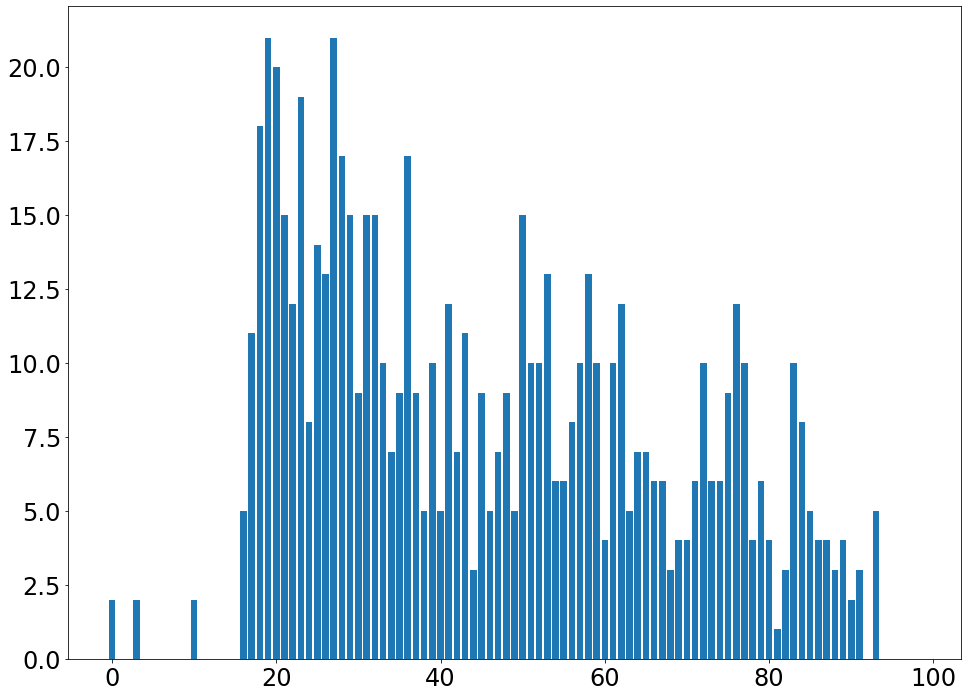

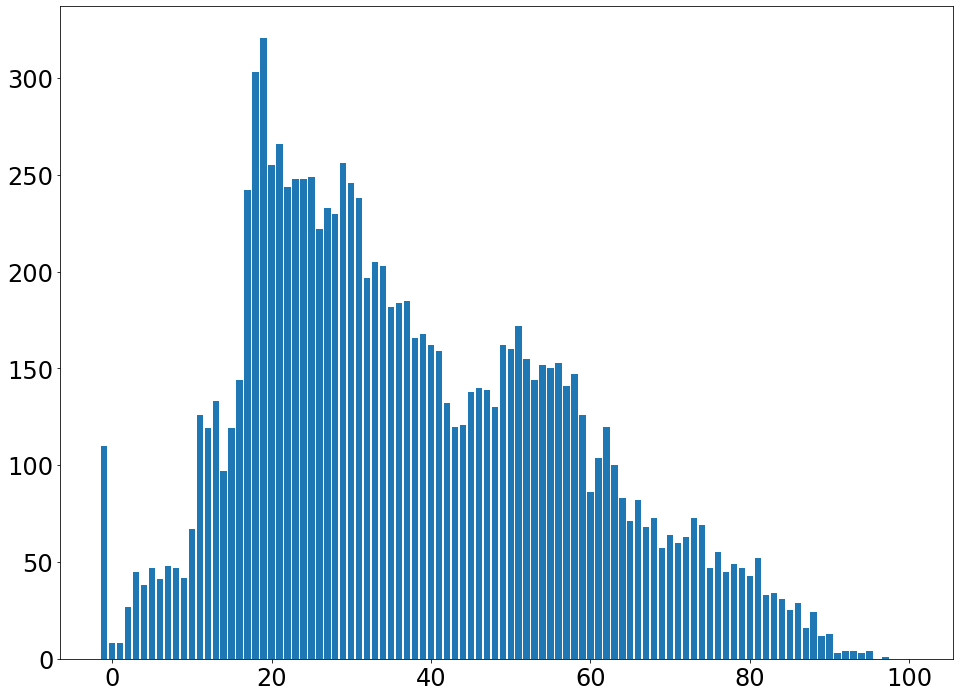

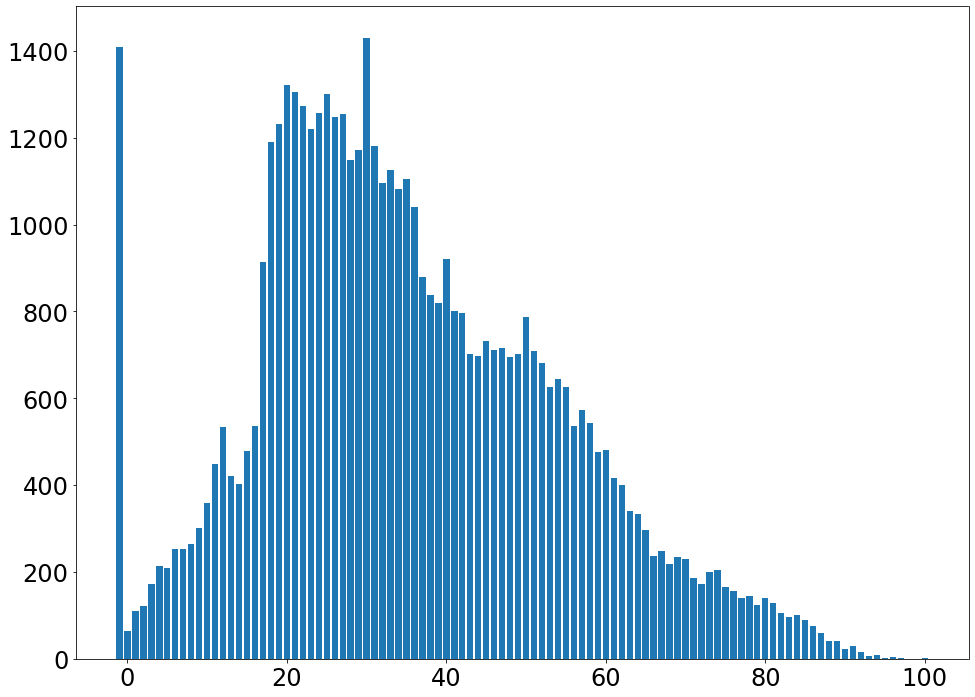

AGE_BAND_OF_CASUALTY
Mean: 6.216062632221004
Standard Deviation: 2.426703884989031
Variance: 5.888891745420855
Modal: 0    6
dtype: int64
Median: 6.0


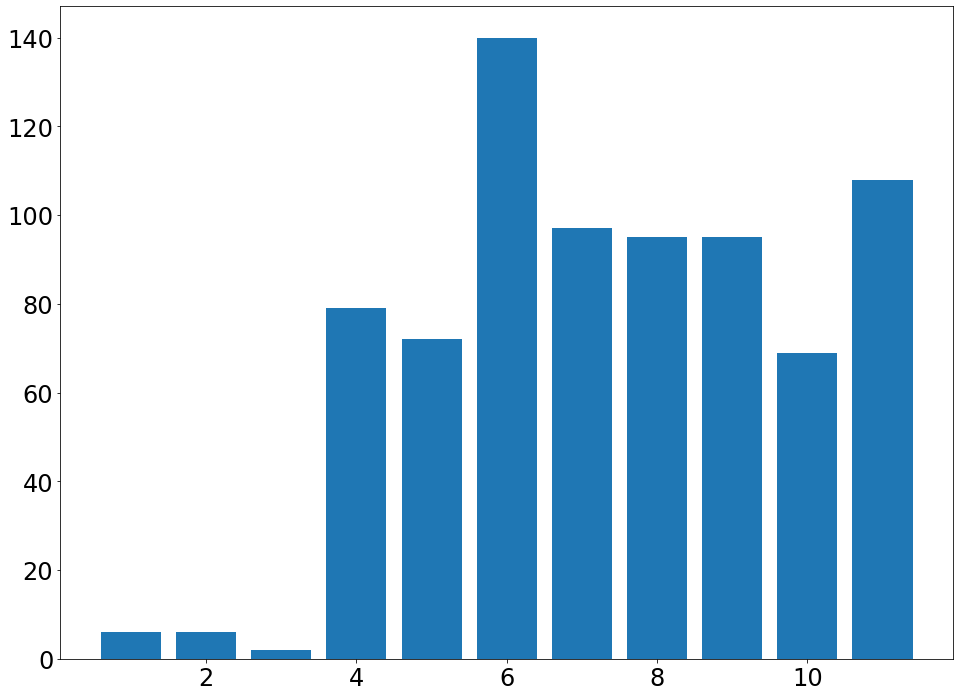

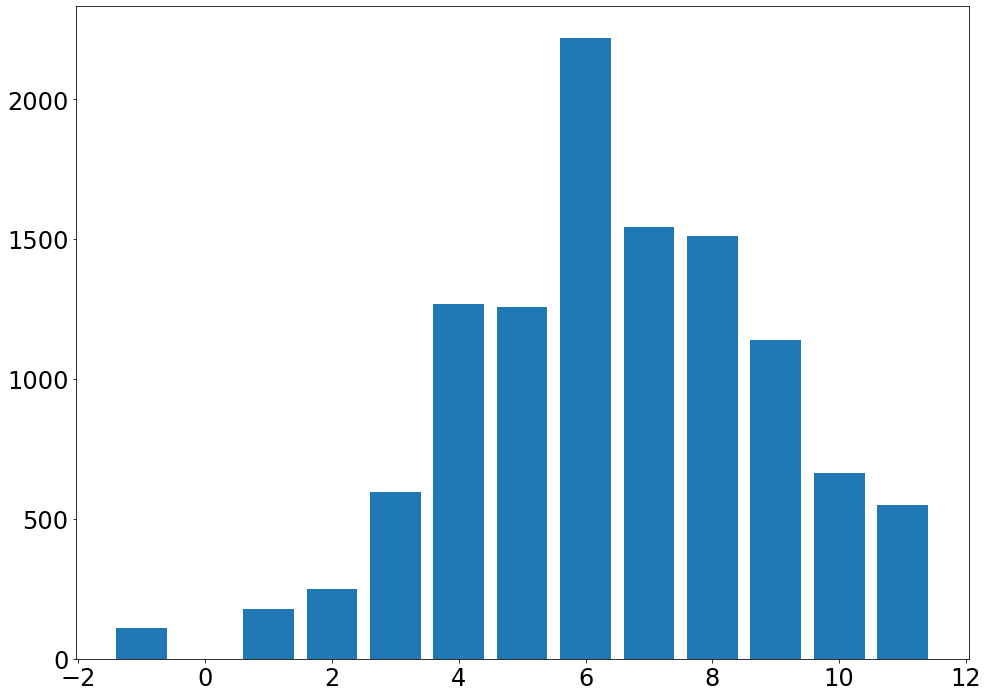

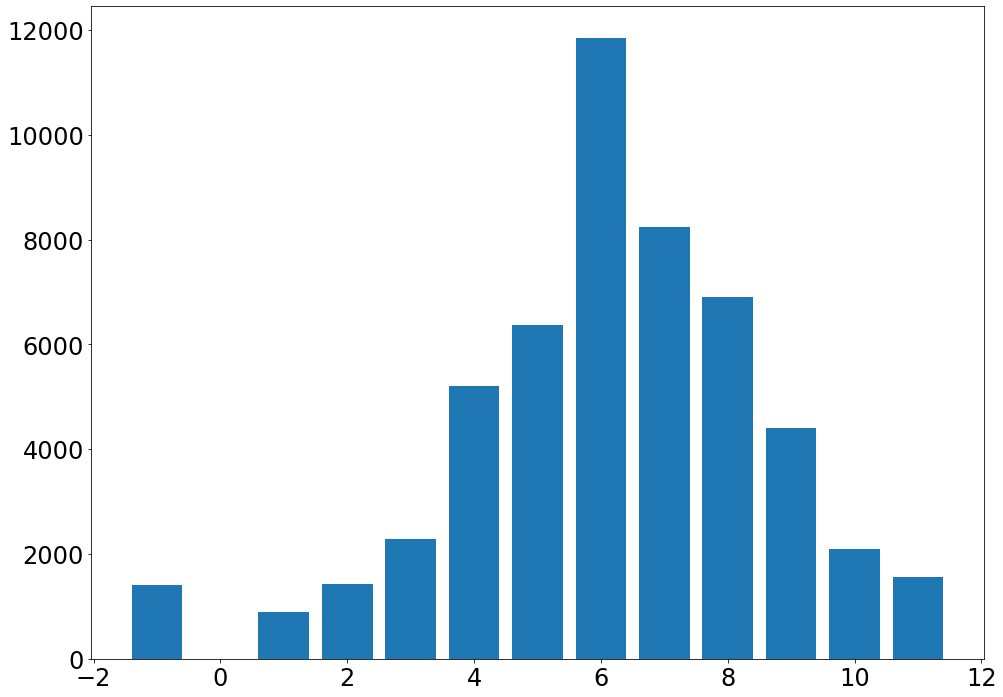

CASUALTY_SEVERITY
Mean: 2.801294028629225
Standard Deviation: 0.4281519062141238
Variance: 0.18331405479478785
Modal: 0    3
dtype: int64
Median: 3.0


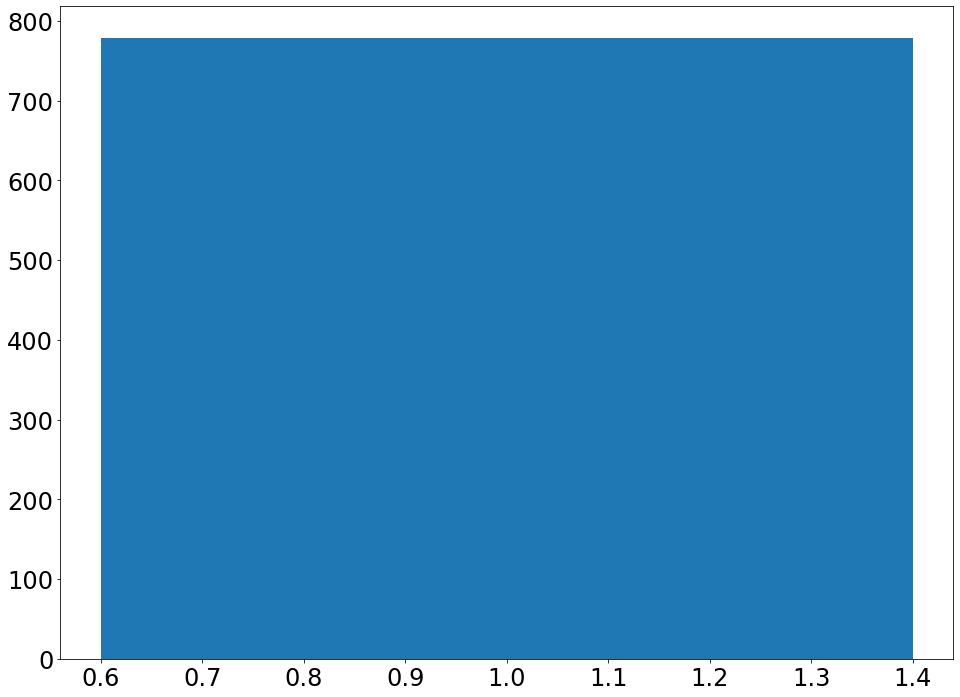

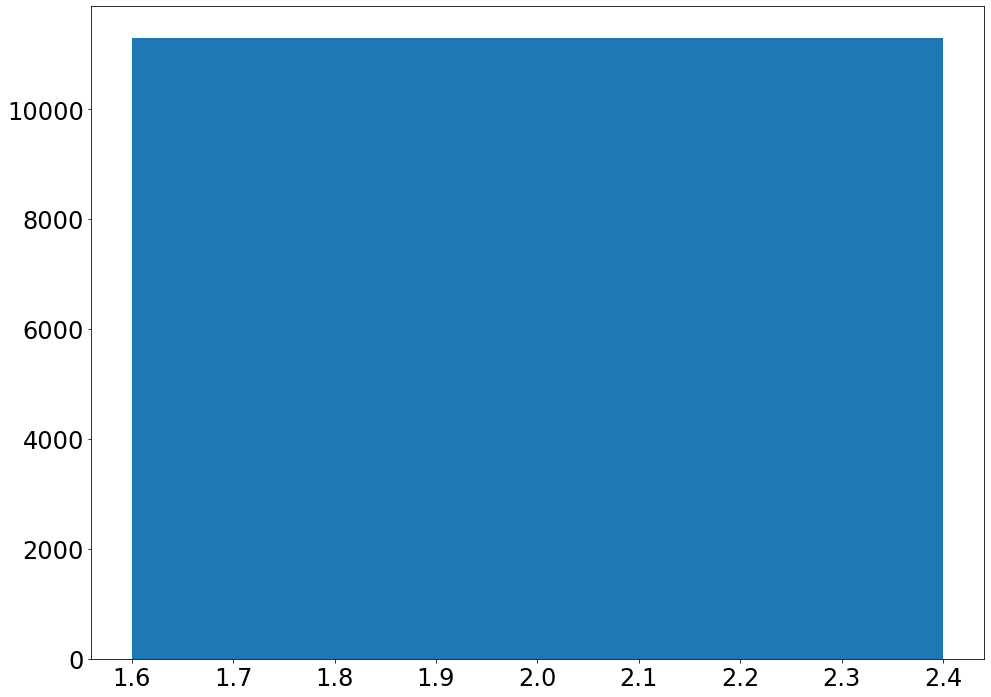

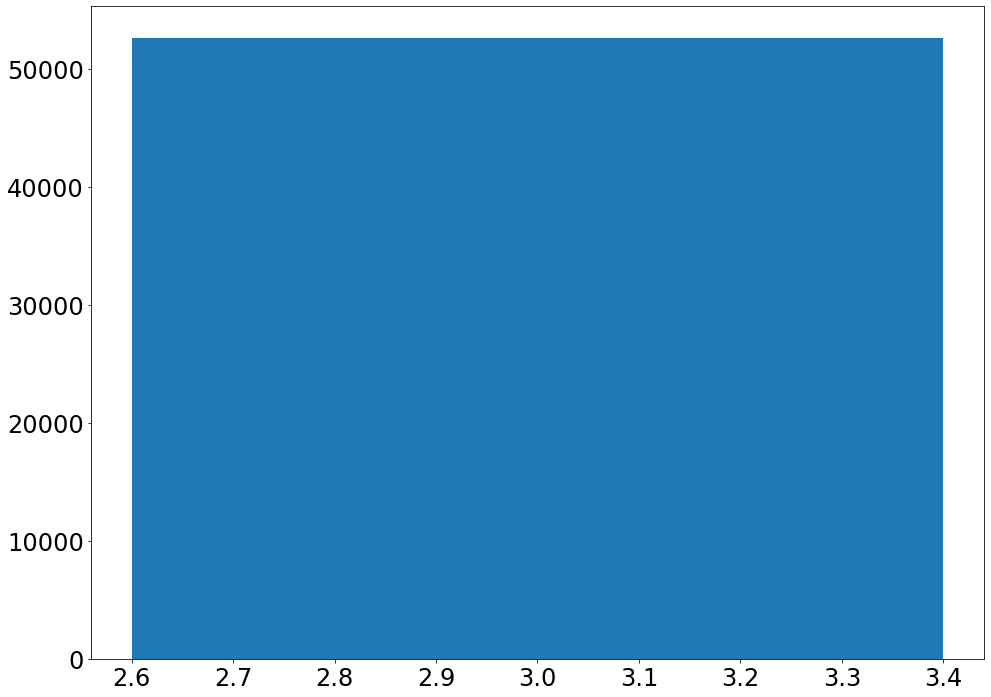

PEDESTRIAN_LOCATION
Mean: 0.725644311987523
Standard Deviation: 2.1122435140625515
Variance: 4.461572662699317
Modal: 0    0
dtype: int64
Median: 0.0


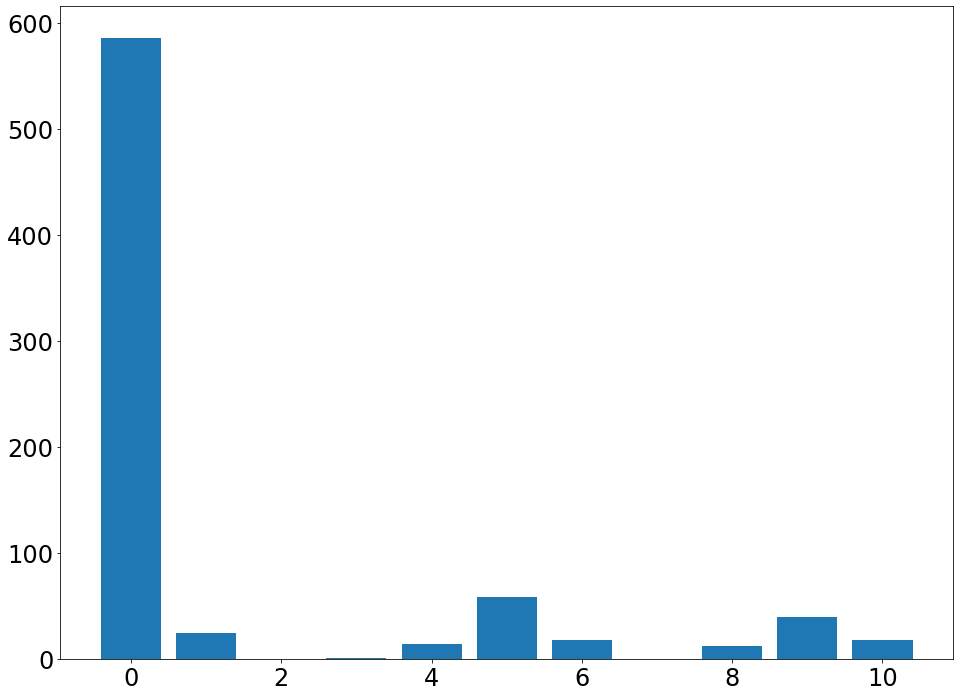

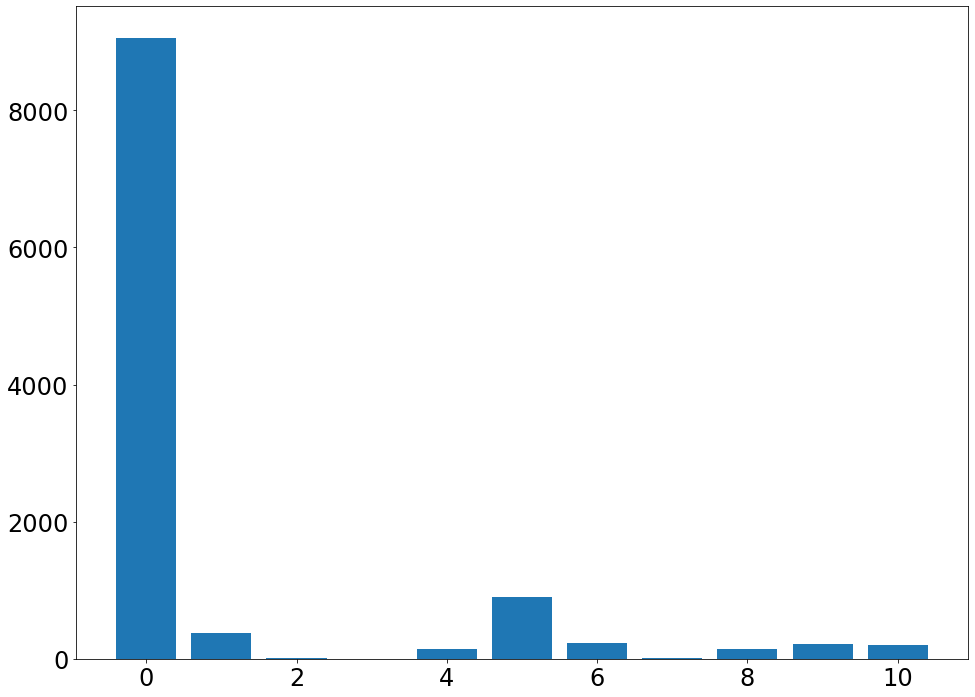

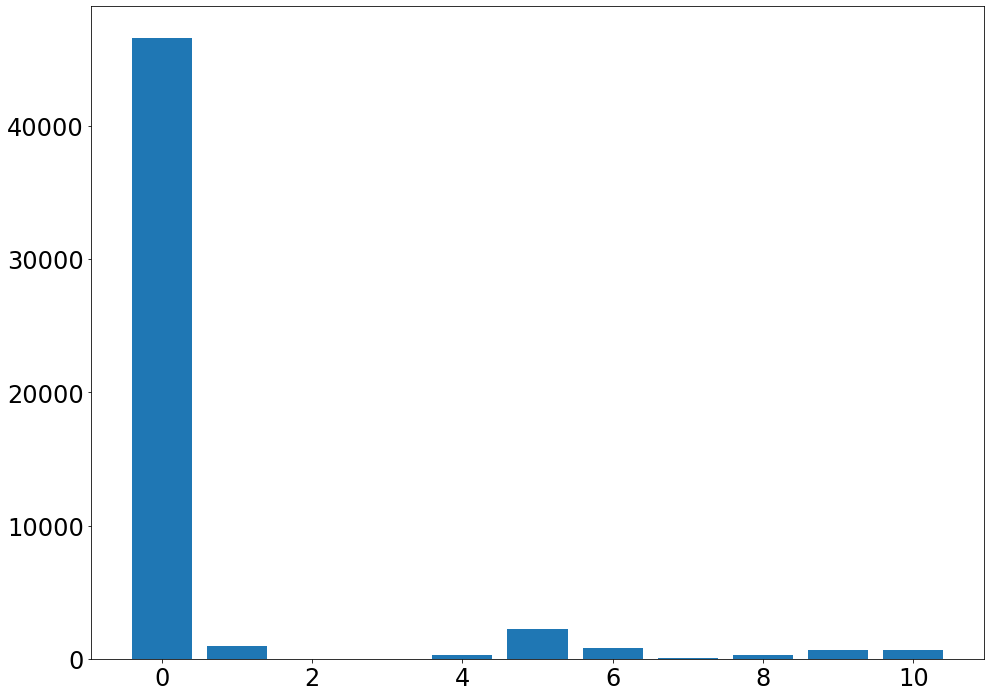

PEDESTRIAN_MOVEMENT
Mean: 0.5908522367547367
Standard Deviation: 1.9418458549040072
Variance: 3.7707653242078747
Modal: 0    0
dtype: int64
Median: 0.0


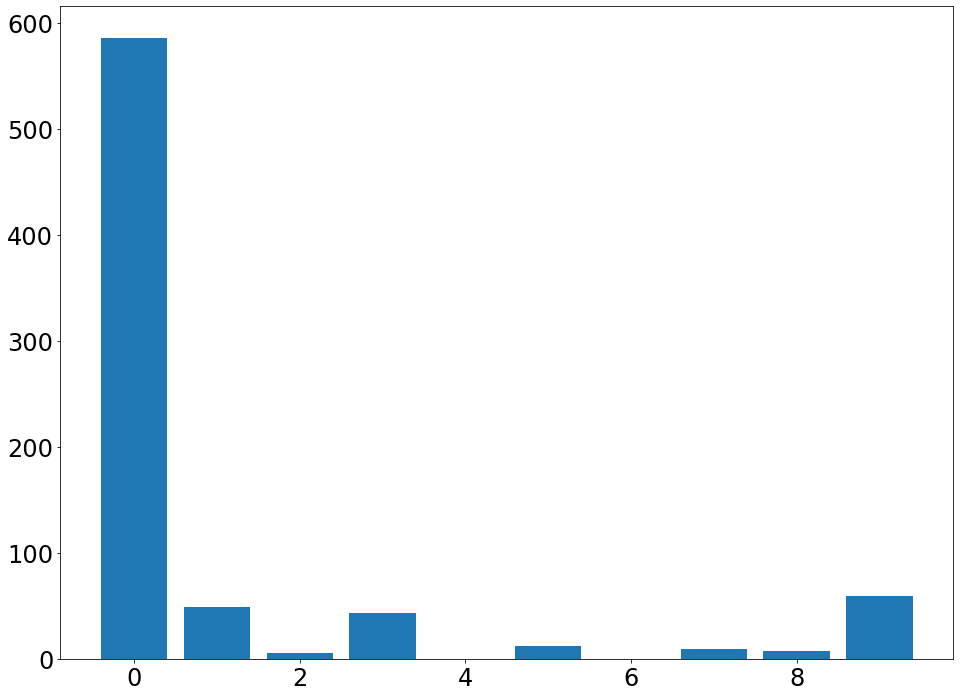

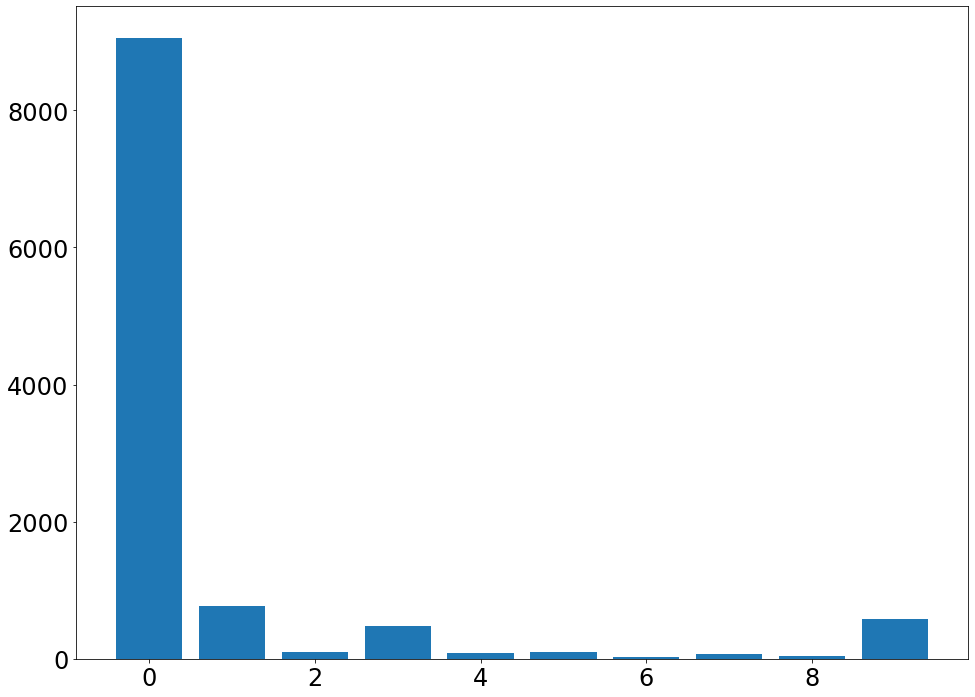

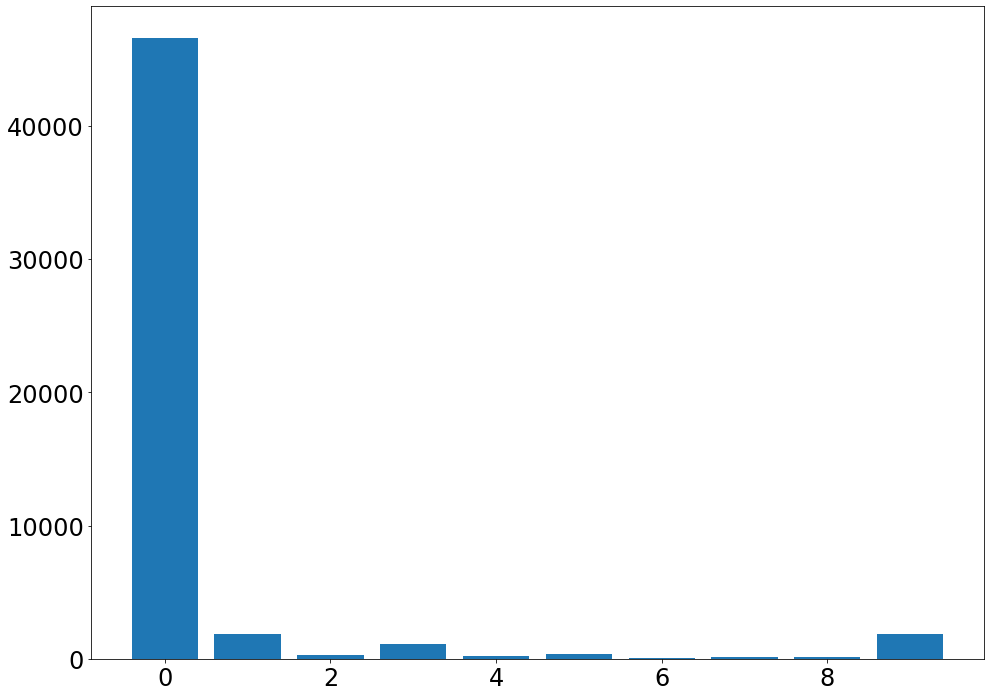

CAR_PASSENGER
Mean: 0.23084050093423308
Standard Deviation: 0.6369924419227048
Variance: 0.40575937106665044
Modal: 0    0
dtype: int64
Median: 0.0


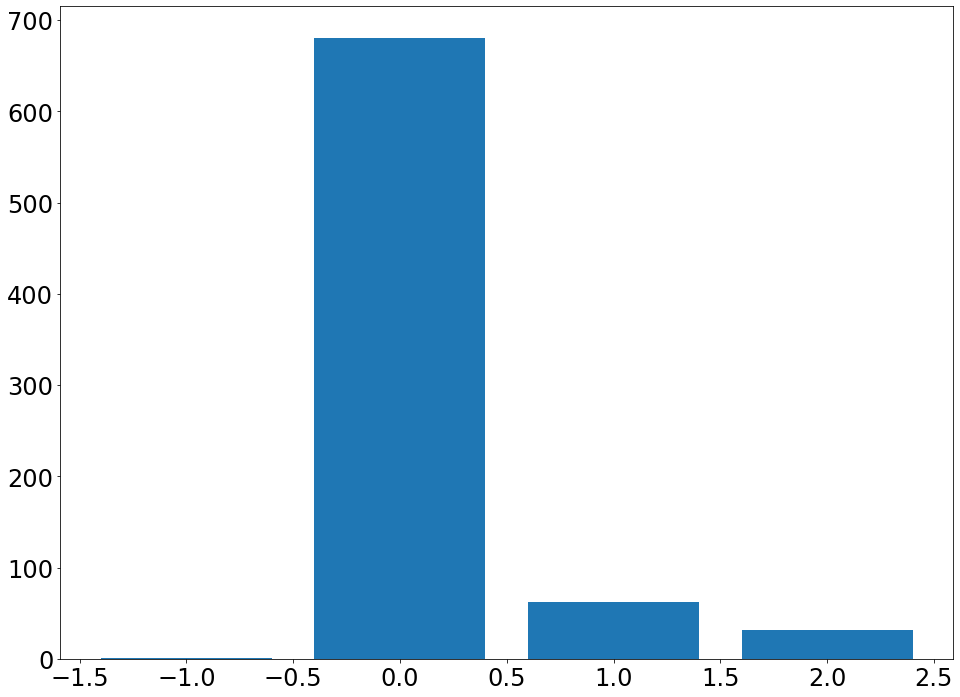

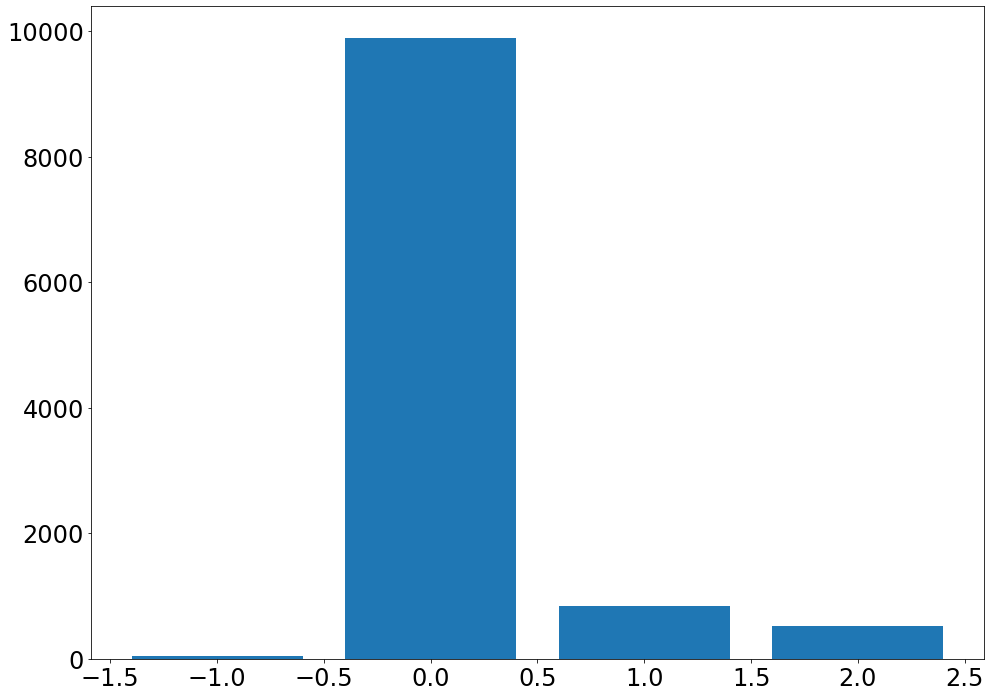

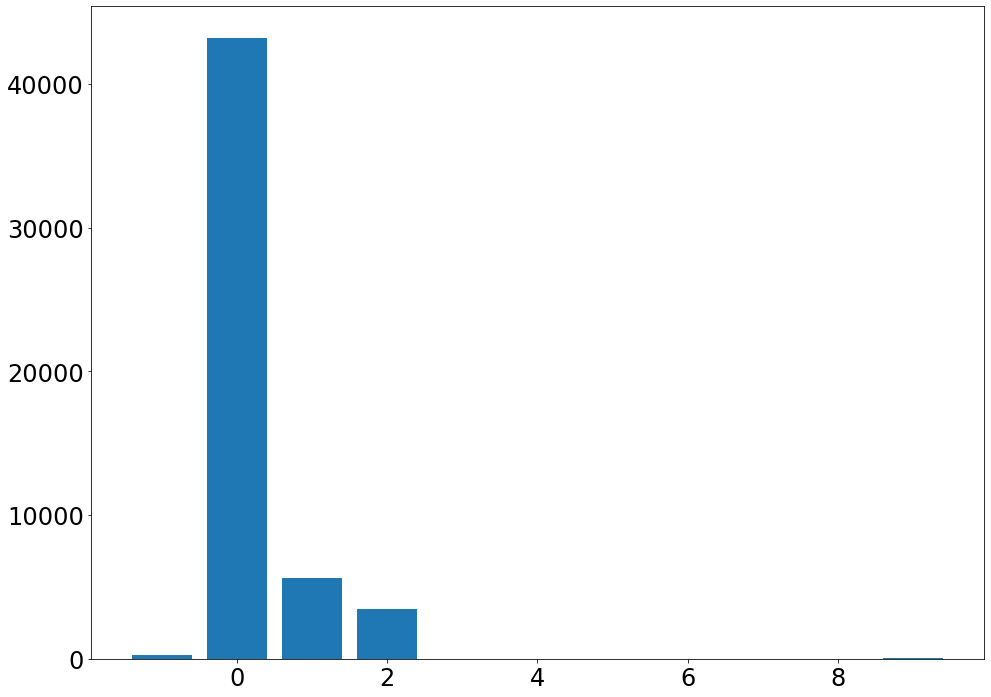

BUS_OR_COACH_PASSENGER
Mean: 0.04762272425454377
Standard Deviation: 0.4209148734772107
Variance: 0.1771693307143363
Modal: 0    0
dtype: int64
Median: 0.0


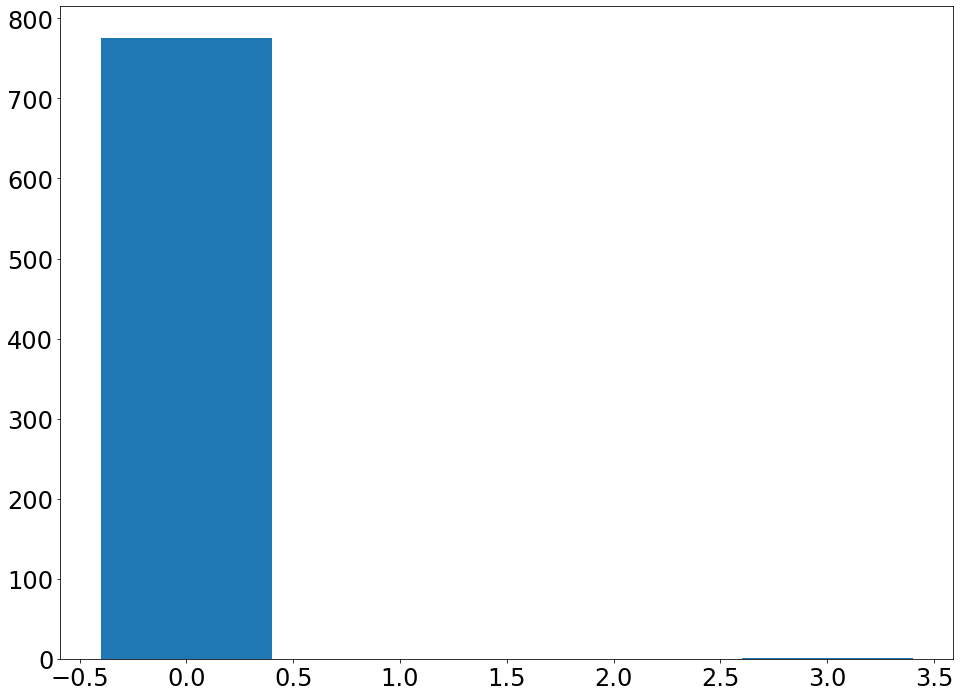

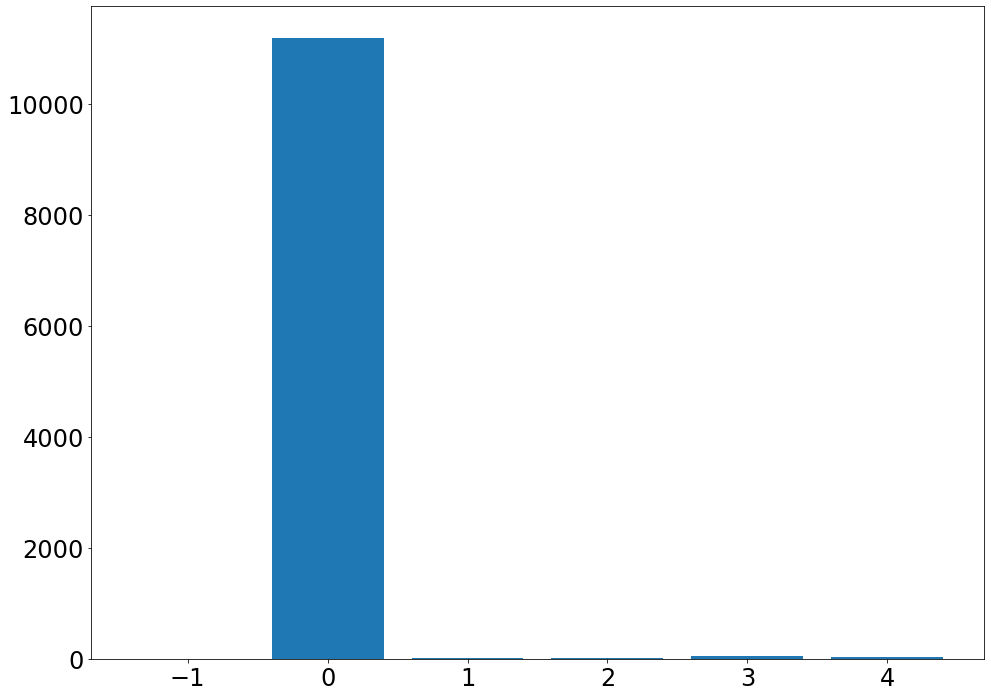

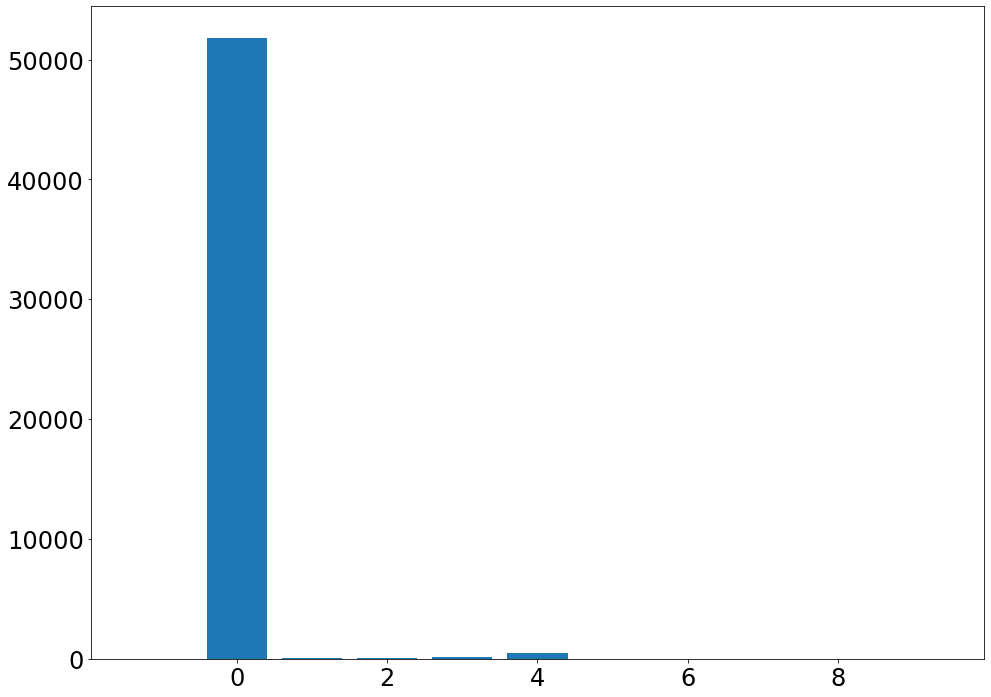

PEDESTRIAN_ROAD_MAINTENANCE_WORKER
Mean: 0.03349341404283575
Standard Deviation: 0.2607328232673409
Variance: 0.06798160512895841
Modal: 0    0
dtype: int64
Median: 0.0


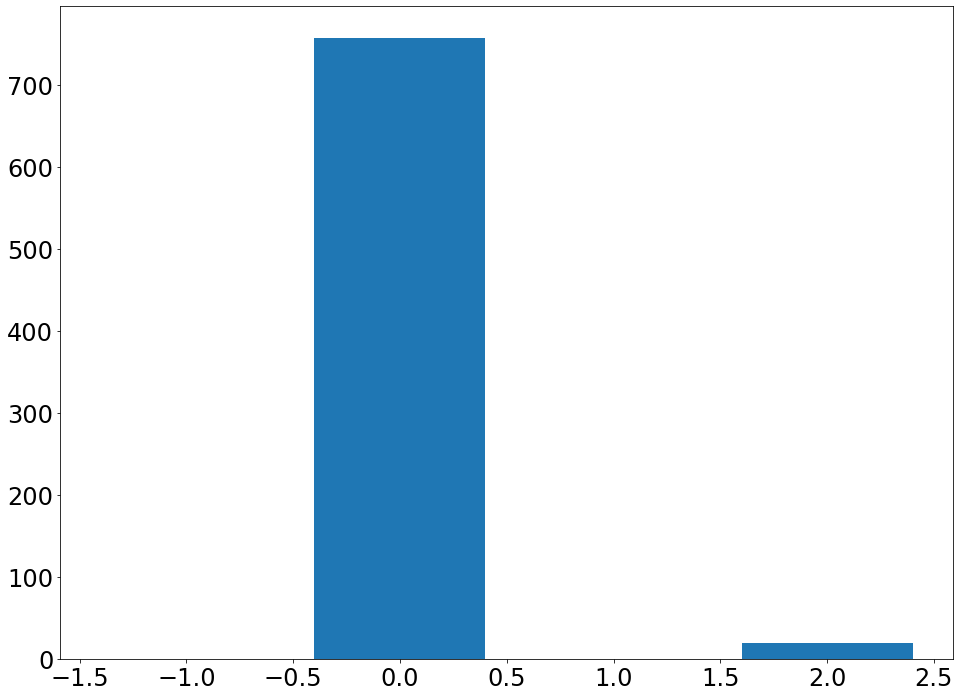

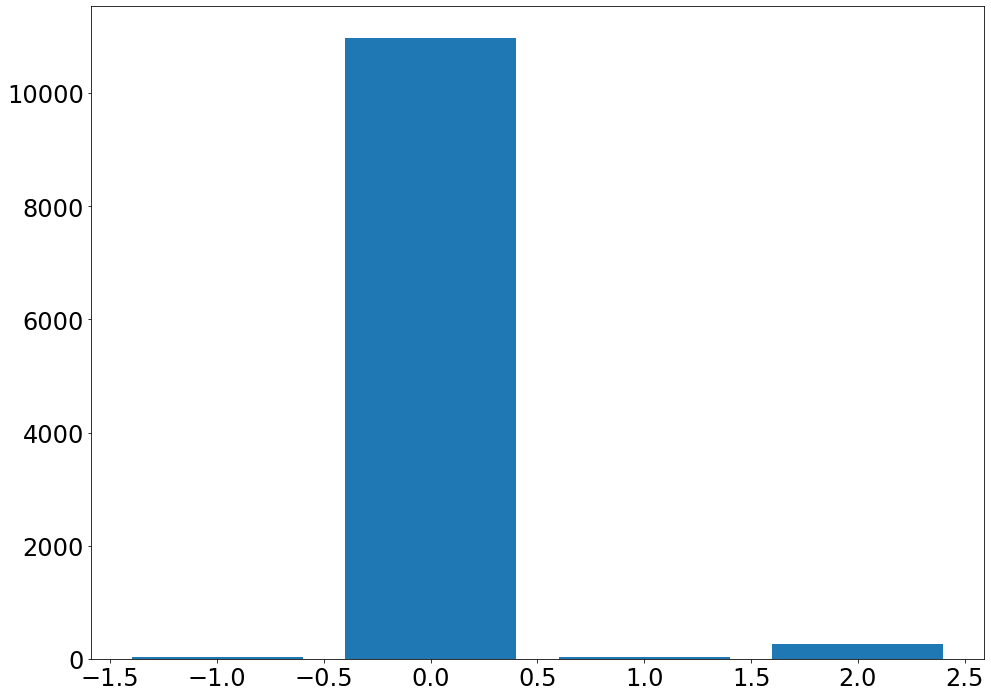

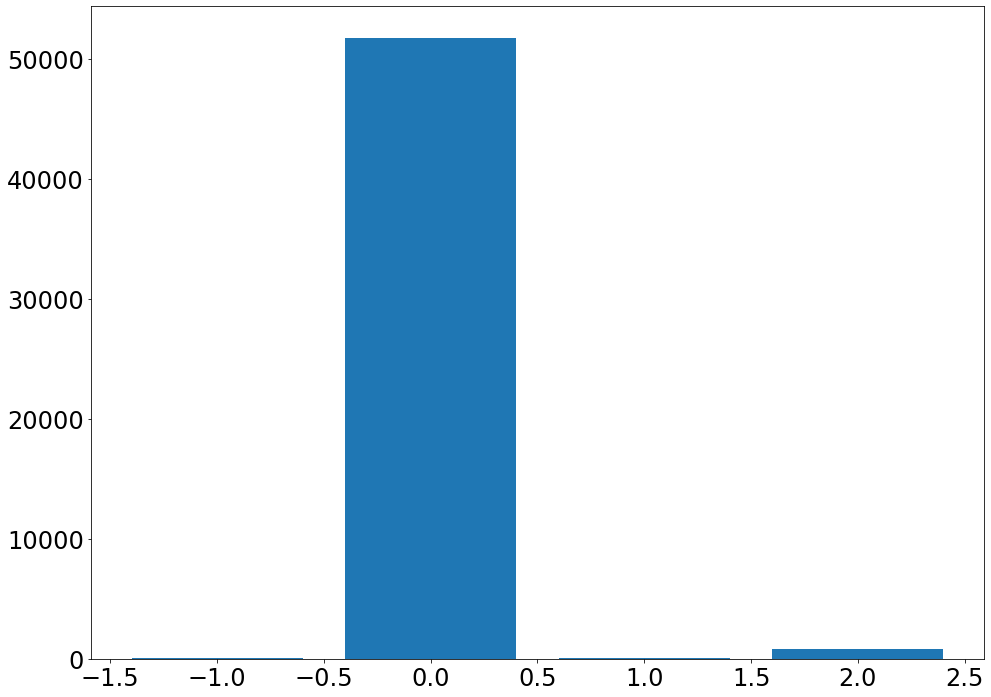

CASUALTY_TYPE
Mean: 7.9512500193023365
Standard Deviation: 11.883404848470741
Variance: 141.2153107926579
Modal: 0    9
dtype: int64
Median: 9.0


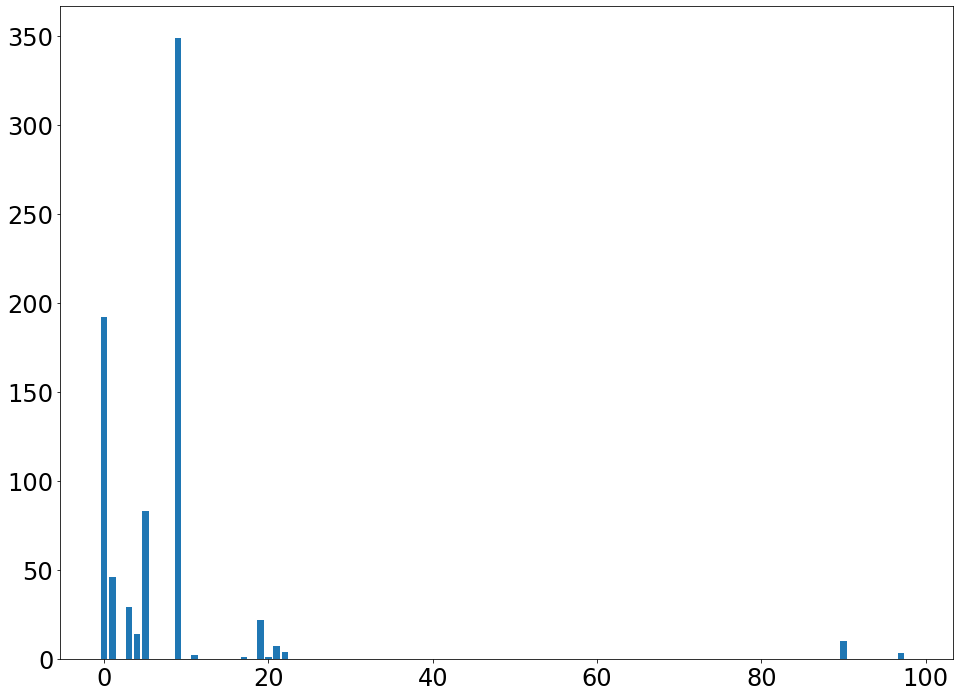

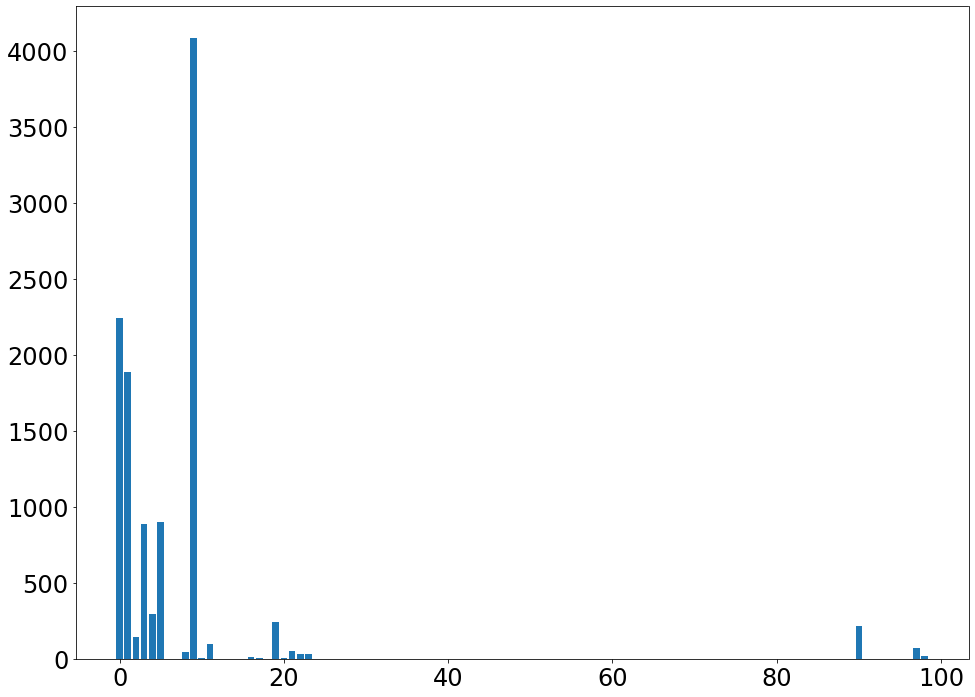

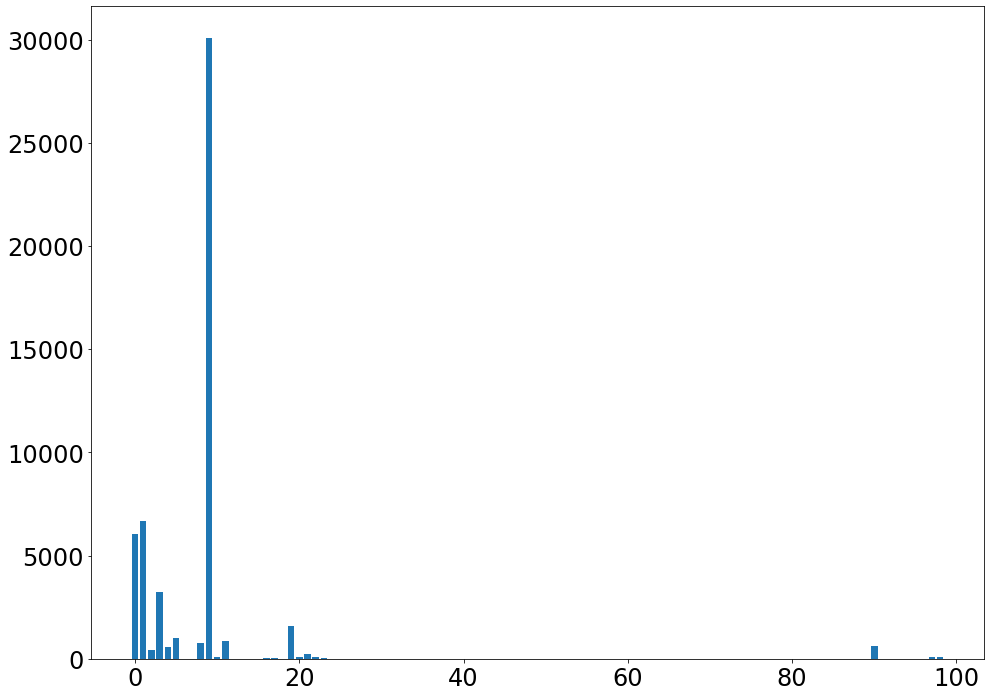

CASUALTY_HOME_AREA_TYPE
Mean: 1.0106394477987615
Standard Deviation: 0.9141612937234169
Variance: 0.8356908709420713
Modal: 0    1
dtype: int64
Median: 1.0


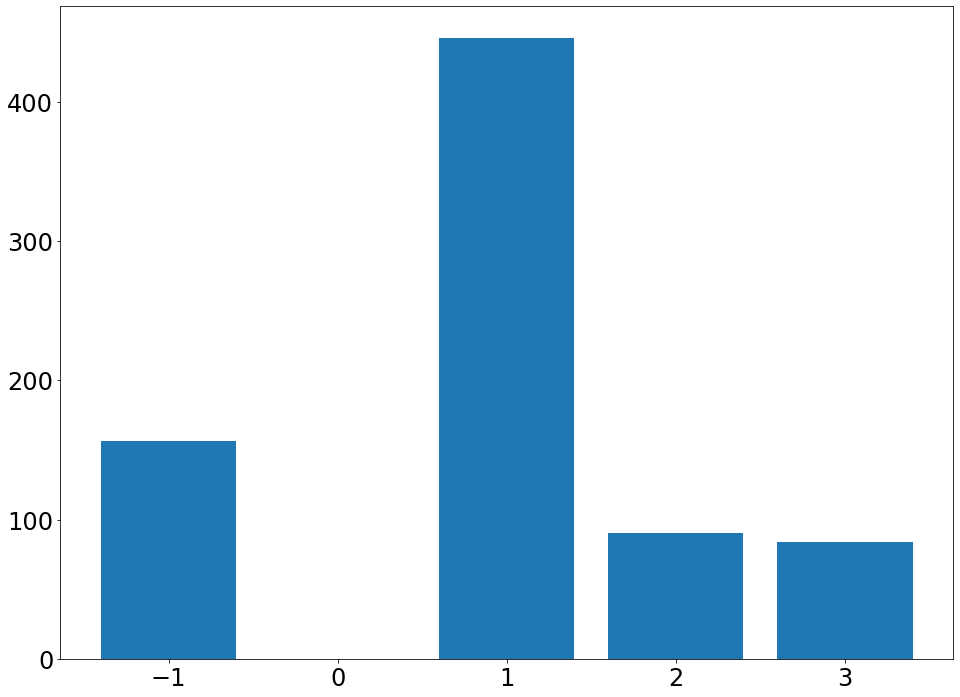

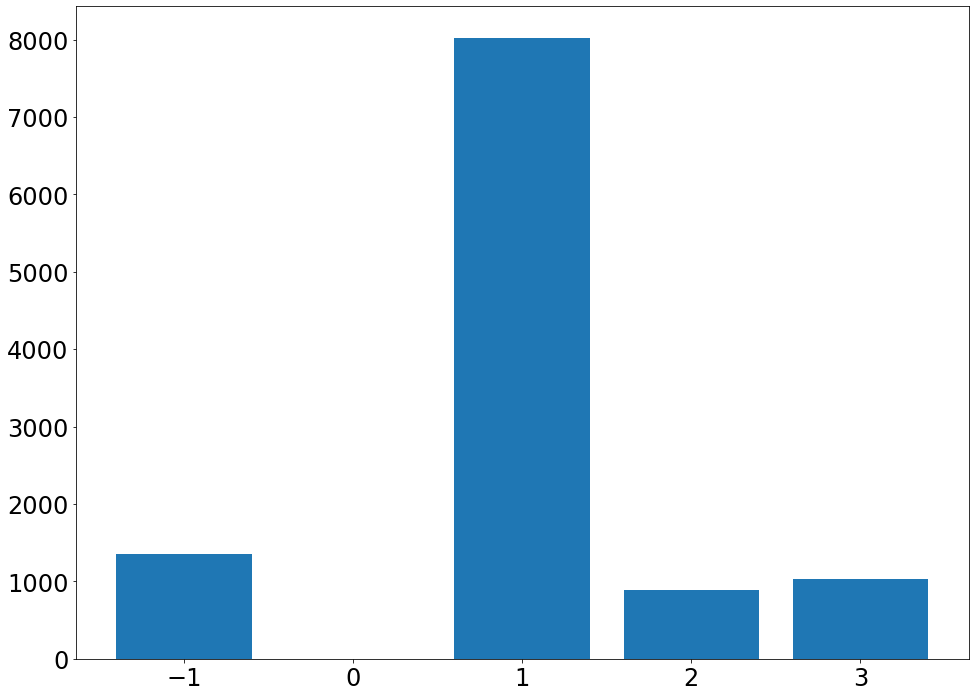

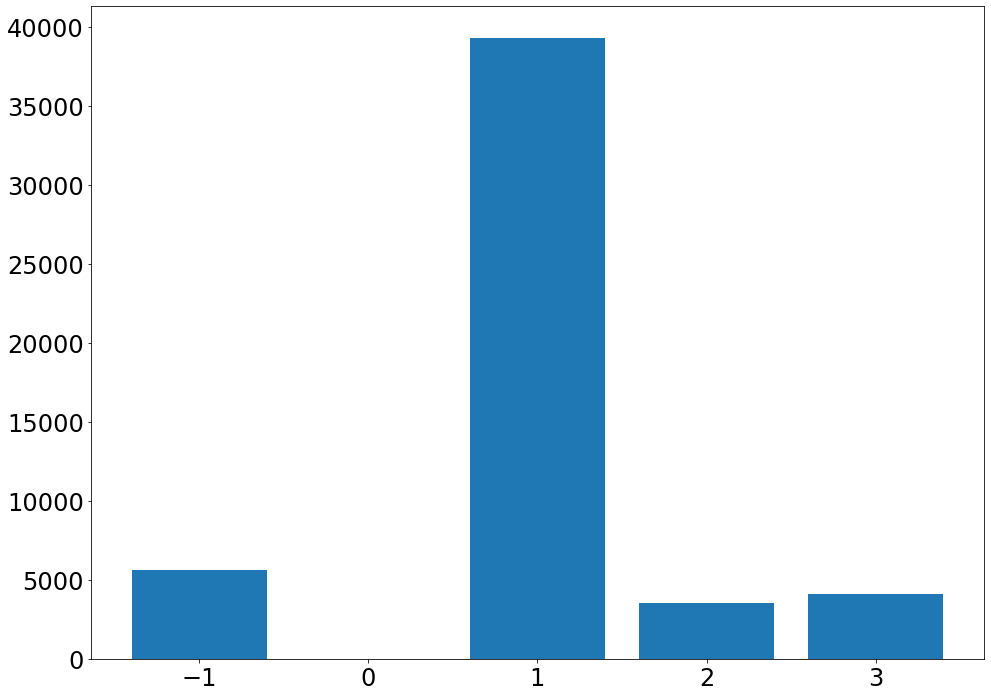

CASUALTY_IMD_DECILE
Mean: 3.9572723482450316
Standard Deviation: 3.1562821481104004
Variance: 9.962116998480404
Modal: 0    1
dtype: int64
Median: 4.0


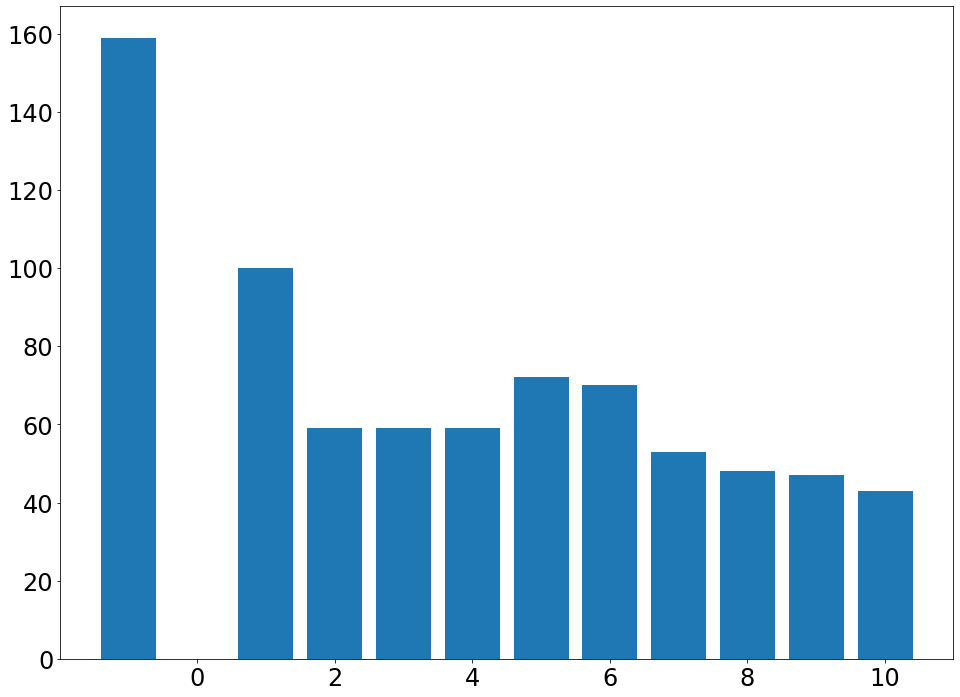

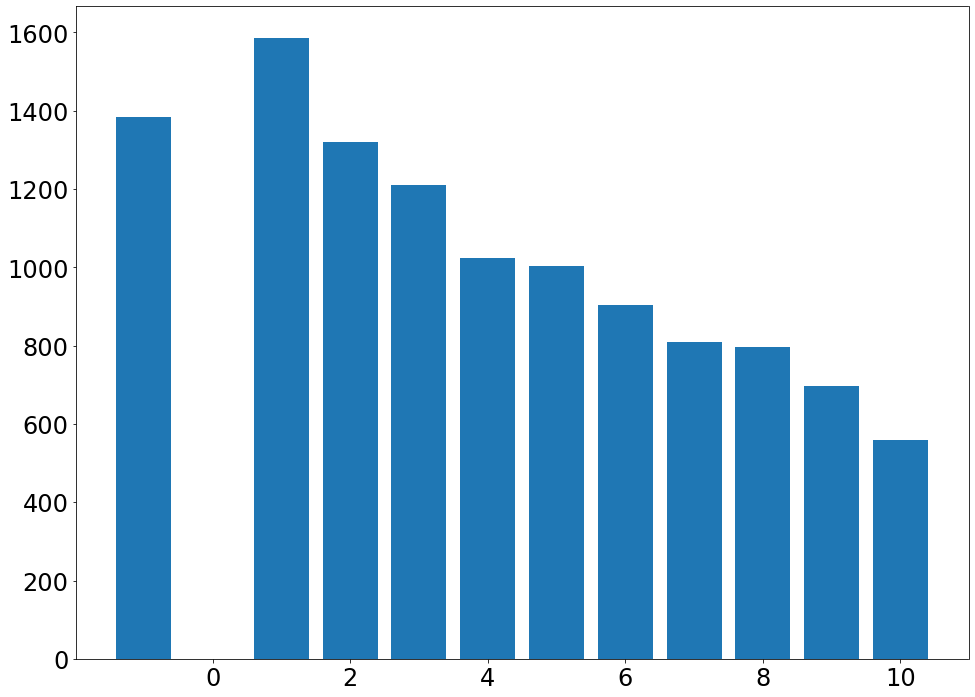

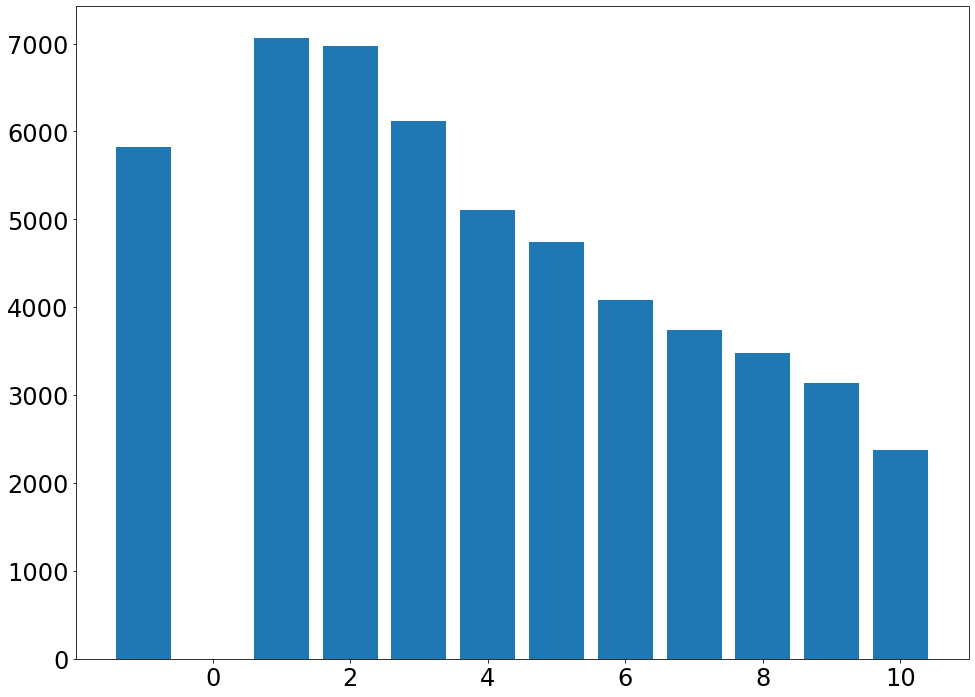

LSOA_OF_CASUALTY


TypeError: Could not convert E01022435E01022435E01001191E01001243E01023607E01025535-1E01011864E01002358E01003099E01033424E01029153E01012401E01004402E01009896E01026755E01004398E01006034-1-1-1-1-1W01001575W01001575E01009968E01011340E01018626E01013048E01009346E01009346E01009153E01009056E01009239E01008914-1E01018480E01003454E01009768E01001242E01001242E01026361E01004550E01000550E01003988E01006160E01001963E01033258E01005565E01005556E01010523E01004245-1E01002708E01018564E01003091E01009366E01003518E01032206E01020391E01015444E01013945E01013945E01015426-1E01022276E01003676E01026067E01026067E01001807E01000494E01009140E01009175E01007203E01011020-1E01033718-1E01000904E01028915E01026233E01026057E01033040E01026423E01029885E01021392E01026289-1E01001563E01002303E01002301E01031262E01031302E01017452E01008882E01026608W01000472E01004041-1E01023848E01014819E01001236E01033314E01022735E01001323E01000135E01013136-1E01022147E01020849E01009110E01003064E01026774E01014013E01011027E01011477E01014589E01020592E01013334E01032260-1-1E01011302E01011659E01033434-1E01002039-1E01003732E01001798-1E01032362E01013583E01025624E01025769E01004729E01000545E01014916E01000574E01029151W01001327E01027322E01027343E01027343E01006967-1E01004535E01004621-1E01003448E01011919-1E01009606E01032531E01003066E01012076E01016663-1E01029380E01019506E01002471E01005665E01026517E01022997E01015353E01031078E01008981E01008981E01020422E01013548E01013569E01007198E01012162E01014605E01007630E01004614E01012501E01001181E01000728E01000672E01003478E01003478E01003478E01003478E01027570E01025609E01004663E01012900E01004003E01014063E01013920E01028885E01028885E01012040E01002444E01013679E01013692E01029728E01014654E01007345E01010834E01000931E01033679E01018296E01014890E01003941E01030396E01030395-1E01018086E01011527E01010713E01010713E01001794E01011859-1-1E01008180W01001682W01001690E01007344E01007325-1E01003333E01003333E01003333E01003333E01013947E01009209E01028216E01003097E01018550E01023382E01000693-1E01004432E01007705E01007768E01007745E01007723E01013495E01004573E01010730E01029850E01033605E01010010E01033621E01009355E01011116-1E01013198E01023390E01015285E01007455E01005422E01005461E01013113E01011061E01011061E01011061E01011061E01011531E01003194E01011292E01011354E01011354E01010445E01009886E01004239E01000912E01009135E01028278E01007560E01013673E01030110E01030068E01029817E01023541E01021483E01008172E01018154-1E01014436E01025358-1-1E01015653E01028419E01017983E01031043E01010730E01003509E01011422E01011422E01028054-1E01017537E01000609E01000609E01000609E01000609E01000609E01005420E01004199-1-1E01005445-1E01010852E01010129E01010123-1-1-1E01002151E01032176E01032176E01004329E01003623E01010426-1E01011911W01001542E01001658E01002030E01031092E01025824-1E01027717E01003199E01003526E01002926E01015473E01029252E01029232E01030103E01030666E01029093E01003940E01027097E01002797E01002528E01014786-1-1-1E01009266E01002550E01003769E01013451E01026716E01007544W01001917E01001140E01018520E01010531E01010404E01014875E01001868E01020506E01003391E01005580E01015368W01000632W01000652E01028435E01029641E01029790E01008261E01008266E01026085-1E01010731E01020471-1E01014616E01008883E01008883E01026984E01010599E01010839E01033542-1-1E01027175E01022366E01003345E01011429E01011429E01011467W01001173E01020891E01007748E01005294E01030384E01012878E01026397E01026226E01018169E01011574E01013138E01028210E01010058E01031974E01014805E01008210E01011064E01027864-1-1E01014865E01000356E01011711E01015329E01011199E01011199E01029364E01013845E01030159E01030166E01030169E01030193E01000689E01029696E01008175E01014010E01014626E01033324E01011868E01027590E01015436E01009276E01028177E01002303E01021477E01015392E01001427E01032639E01003601E01005222E01013522E01009139E01000697E01019725E01027727E01027653E01011988E01007761E01003371E01006785E01026895E01026118E01032478E01011931-1E01007149E01010598E01015609E01015609W01001721-1E01004509-1E01001674-1-1E01032160E01000828E01009468E01003236E01004988E01001336E01021520E01021520E01011242-1E01002937-1W01000948W01000948E01014487E01017582E01012779E01012915E01009060-1E01027647-1-1E01031872E01008451-1-1E01003033W01001062-1E01026755E01028951E01010057E01018576E01021594E01033751E01032611-1E01018043E01026684E01018033E01026720-1E01002114-1E01010548E01003708E01004302E01005660E01029638-1E01029073E01013464E01013466E01004817E01004817E01033716E01000733E01000733E01000733E01002069E01033150E01003624-1E01031079E01031079-1E01009463E01027996E01032976E01032976E01017377E01006109E01015447-1E01010620E01004137E01001295E01015289E01011153E01001195E01009297E01030229E01026876E01004224E01003599E01004485E01021436E01030188E01030204E01023560E01002920E01001341E01016450E01002469E01002151E01015804E01010813W01001553E01014016E01014056E01005120E01010074E01010098E01010065E01000086E01015624E01009264E01001502E01005386E01015571E01008732E01032704E01028749E01027563E01027557E01026897E01003547-1E01008281E01032069E01018286-1-1-1E01007719E01026448E01000879E01013489E01002436E01021328E01009497E01032776E01017580E01024477E01012883E01011378E01033456E01008700E01022532E01022533E01031754E01031754E01002872E01019799E01019827E01019827E01000028-1E01009615E01008335E01007076E01004713E01022141E01026369E01004208E01005482E01027147E01010217E01033437E01008878E01021309E01004678E01003046E01019532E01026518E01026427E01014634-1E01000210E01009134E01033585E01001770E01015414E01023485W01000688W01000688W01000689E01013637E01001832E01022354E01002518E01002634E01016810E01026853E01012299E01001195E01029297E01005312E01026585E01020842E01012553E01007604E01003449E01028950E01026013E01026013E01007748E01007748E01030580E01001032-1-1E01014695E01026388E01013403E01000764E01001190E01002050E01002050E01028050E01027627E01011580E01013862E01018739E01013316E01024172E01011149E01011149E01008187E01027551E01026234E01003730E01008306E01005531E01007629E01009991E01007598-1-1E01001761E01002381E01022110E01018377-1E01028291E01026153E01004461-1-1-1E01004064E01002940E01010762E01009375E01009367-1-1-1E01004150E01033194E01019648E01031247E01028043E01028042E01004469E01009530-1E01004506-1-1E01030524E01030524-1E01013571E01003558E01004823E01004822E01004823E01004822E01004888E01003338-1-1E01003523E01003523E01003523E01003622E01023103-1E01026800E01015992E01000042-1E01026019-1-1E01002327E01014726E01013878-1E01003069E01003767-1E01000225E01010342-1E01003864E01022368E01023537E01000243E01001376E01013830E01011035E01012429E01032316E01030386E01020496-1E01010748E01009650E01014954-1E01023572E01000288E01014653E01014627E01007861E01011324E01003958E01022323E01008041E01008164E01008399E01020559E01026814E01026814E01026921-1E01011296E01002370E01003930E01005322E01031880E01031880E01031880E01031880W01001508E01009352E01000919E01006491E01015429E01029642E01013941E01000586E01018007-1-1E01015966E01028835E01030006-1E01028078E01018624E01009548E01018254E01014865E01010064E01010006E01011302E01018300E01025901-1-1E01001142E01013071E01028239E01001891E01026202E01030238E01015310E01010267E01030295-1E01011221E01027583E01004491E01004582E01014356E01003607E01008707E01008774E01008482E01019844E01015987E01003187E01028247E01028083E01018107E01022247E01000574E01012367W01001376-1E01011492E01011499E01015752-1-1-1E01019507E01003920E01013512E01029150E01002819E01032551E01011039E01009740E01003432E01011954-1E01018254E01033433W01000443E01027027E01028918E01014172E01014178E01000330E01014731E01011372E01001315E01026224E01027388E01012179E01012121E01008442E01013905E01001731E01000644E01012886E01016803E01028392E01003301-1E01004740E01001243E01000352E01001602E01000414E01009301W01001201E01010527E01005313-1E01003814E01007044E01006751W01000404-1-1-1E01004253E01018516E01032505E01012531E01012501E01012568E01005843E01032461-1-1E01001436-1E01024875E01019456E01013191E01014641-1-1E01026017E01011466E01027145E01027197E01002808E01012970E01029551E01011025E01009955E01009910E01009910E01022326E01022313E01022462E01002923E01025761-1E01014031E01014031E01003530E01032088-1-1-1-1E01010714-1E01014505E01029387E01003023E01003833E01027515-1E01007318-1E01018583E01010285E01010285E01010285E01017600E01015718E01026853E01007685E01007628E01007628E01007507E01007472E01018035-1E01010277E01013217E01013213E01001523E01001523E01000022E01026503E01026751E01026737E01032354E01004590E01011695E01026991E01033583-1-1E01015640E01020512E01014946E01026113E01018727E01026004E01004541E01004541E01004541E01002230E01027774E01013820E01001958E01016202E01017010E01000640-1E01009835E01000793E01024468E01009362E01028069-1E01018472E01011929E01011492E01003023E01033216-1E01001133-1E01004815E01026080E01032986E01002189E01007968E01007968E01032932-1E01002326E01000077E01006494-1E01005040-1-1-1E01028229E01028261E01005958E01005958E01026511E01026536E01020818E01020818E01008069E01032068W01001572E01026797E01026797E01031087-1-1-1E01005106E01010472E01018312E01026980E01009891E01009894E01009894E01015444E01013683E01011840E01011841E01022660E01025723E01025723E01010590E01010672E01012060E01029111E01018391E01005317E01033352E01014654E01013303E01010988E01010650E01001650E01015723E01004663E01007787W01000830E01007868E01026572E01014988E01001435-1E01012839-1E01014945E01032690E01007516E01027625E01024566E01007544E01007687E01013083-1E01021433E01022316E01005788E01031147E01001651E01032398E01012420E01031080E01001428E01033198E01011905E01007709E01007710E01018060E01028134E01032400E01000608E01017422E01014050E01003158E01028260E01028250E01030653E01009135E01010820E01001969E01004408E01016679E01030753E01006613E01023254E01017495E01010978E01011377E01025855E01019646E01031058E01013161E01002078E01017716E01026163E01011031E01003917E01014802E01005340E01000506E01012447E01003560-1E01020513E01013484-1-1E01018465E01025832-1-1E01032593E01033019E01026149E01031958E01025479E01007725E01007679E01007735E01007709E01025704E01007654E01027599E01027598E01009044E01004517E01031846E01031916E01014709E01026183E01014485E01030138E01026076E01019847E01031031E01030210E01004893W01000901E01019530E01026347-1E01028190E01028162E01005389E01027325E01027178E01009269E01001666E01000133E01029777E01022157E01001129E01009577E01009586E01032032-1E01010607E01011727E01011744E01010614E01010614E01033433E01027112E01005759E01005799E01008754E01017679E01026054E01026054E01013678E01006599E01016491E01016491E01033100E01013178E01001705E01009619-1E01025612E01000161E01018669E01018669E01009574E01001572E01022451E01022459E01002471E01033439W01001683W01001577E01004517E01002967E01025837E01013726E01013762E01010802-1E01004231E01001798-1E01000499E01013856E01013856E01013856E01010529E01026149-1-1E01004491E01002293E01013656E01026008E01022408E01029277E01029277E01009316E01014387E01012373E01013453E01013453E01014951E01000064E01018126E01018126E01007592E01010743E01013022E01013022E01004474E01004319E01030162E01030164E01021706E01021660E01033092W01000543W01000543E01021736E01022263E01003593E01004677E01010724E01033578E01022230E01029035E01014456E01022340E01015457E01011082E01010965E01010040E01004819-1-1E01004876E01015657E01015686E01018307E01032774-1E01015331E01001650E01033534E01033167E01020613E01020613E01020627-1E01004536E01007860E01004257E01032782E01013300E01030068-1-1-1-1E01030295E01030295E01027277E01028192E01007969-1E01026663E01018063E01018063-1E01011451E01004979E01004979-1E01033032E01011344E01005662-1E01033699E01009117E01020365E01007269W01001118E01003933E01007764E01000195E01026896E01008329E01033362E01007931E01010033E01010033E01013142E01008349E01008347E01002113E01020473-1-1E01000321E01018095E01018068E01020557E01004158E01017997E01017944E01018245E01003838E01003072E01002067E01010923-1E01001343E01019416E01026069E01001042E01000143E01009005E01009132E01009441E01028165E01001367E01001367E01013491-1-1-1E01002111E01012820E01001933E01026362E01015628-1E01008499E01002712E01002526E01025594E01025577E01025577E01012665E01026891E01011896E01012870E01004205E01000024E01009548-1-1E01004608E01009833E01020665E01003093E01027854-1E01017437-1E01007763E01014110E01005706E01008846E01002026E01014277E01004675E01011981E01015596E01027638E01000630E01011746E01011316E01011313E01011316E01011434E01001012-1E01019568E01028059E01017455-1E01027296E01027705E01015777E01015775E01015775-1E01001571E01026882E01020694E01009861E01010026E01005381E01001206E01013506E01031016E01025139E01007765E01012526E01018417E01023915E01003752-1-1E01001006E01010052E01009989E01009989E01032887-1E01000208E01007448E01010389E01000728E01002704E01006722E01033439E01005240E01001772-1-1E01032245E01030275-1E01005427E01009206E01017414E01004406-1-1E01030106E01000620W01000776E01002479W01000787E01026382-1E01004240E01011031-1-1-1-1-1-1-1E01013947E01014574E01011594E01014630E01003344W01001375E01033605W01000587-1E01011525E01018142E01015776E01009032-1E01031977E01031977E01017445E01007234E01013524E01002267W01001011E01013813E01018195E01030104E01030104E01004045-1E01011175E01030038E01033250E01031187E01009788E01000799E01030039E01013629E01002040E01020485E01001637E01005571-1W01001035E01002610E01000092E01009641E01029409-1-1-1E01032249E01025638E01004654E01001658E01026748E01013505-1-1E01018516E01004150-1-1-1-1E01013829E01028139E01004393-1E01017495E01015689E01023431E01000484E01019502E01007534E01004335E01004168E01001021-1E01013581E01001947-1-1-1E01027340E01004015E01027416E01010014-1E01005939E01006900E01002521W01000932W01000706E01003272E01011424E01013080E01012970E01010408E01009908E01010900-1E01000232E01000046E01012186E01020880E01032295E01033021-1-1E01009051-1-1-1-1E01005918E01027729E01027726E01027729-1E01014535E01031181-1-1E01029704E01026445-1E01013855E01005338-1E01027223-1E01004042E01032337E01009996E01016081E01013410-1E01006343E01010606E01011696-1E01014921E01014921E01025967E01007860-1E01010595E01015679E01008394E01009980E01010067E01003414E01005120E01005961E01005998E01019751E01005968E01005961E01014305E01014360E01014360E01014305E01001233E01013210E01010908E01032023E01028268E01028291E01032969E01002686E01008559-1E01033156E01032147E01030234E01030249E01002551E01002551E01012937E01015749-1E01002840E01032040E01026859E01026531E01003602E01000981E01000555E01033715-1E01000823W01001280E01027344E01027344E01025771-1E01033424E01031081E01013355E01006778E01011222-1E01010061E01033583E01026441E01019550E01005888-1E01027735E01027735E01013153E01026099E01031086E01031058E01029488E01008282E01008847E01019219E01013351E01015757E01015744E01015744E01015758E01015744W01000509E01002974-1E01020414E01029373E01007843E01008558-1E01001430W01001685E01001258E01030070E01021993-1-1-1-1E01013588-1W01001875E01014455E01005474E01000846E01010691E01030115E01000858E01001346E01015314E01026759-1E01008928E01008963E01029985E01004470E01005258E01031170E01028339-1E01028272E01005087E01002041E01010339-1E01023625E01015695E01010813-1E01004461E01025212E01031029E01004448W01000750E01028596E01028596E01032871E01000693E01000398E01004550E01031165E01024351-1E01001772E01015570-1E01032282E01031954E01003517E01018676E01018676E01026385E01028012E01027304-1E01032402E01027025E01005602E01003829-1E01007814E01027530E01005590E01012432E01015394E01027524E01009117E01026875E01009019E01027723E01018480E01008456E01008456E01006212E01015396E01027163E01007434E01001651E01033706-1E01018134E01012932E01003310E01012252-1E01026188E01012998-1E01026501E01009975E01004197-1-1E01009693E01009643E01012953E01003173E01003164E01025367E01010618E01027391E01003817E01013862E01011454E01013868E01027944E01018217E01020564E01001986-1E01013568E01001609E01012401E01009452-1E01019663E01015381E01020434E01020550E01012252E01014469E01010676E01020623E01002076E01026174E01002002E01009527E01009980E01013594E01000762E01009127E01009003E01010000E01028066-1-1-1E01000164E01004404E01004323E01004637E01014886E01004466E01001971E01014846E01020565E01017585E01004702-1-1E01004481E01032788E01018710E01030005E01009460E01033060W01000482E01005318E01012658E01001511E01004311-1-1E01002233E01013629E01000224E01003543E01007701E01027441E01008403E01027621W01001695W01001874W01001229E01003135E01004063E01005552E01015468E01026081E01013209E01013209E01013209E01013209E01000624E01023772E01009528E01004426E01001877E01025808E01017374E01026375-1E01010338E01013960E01007690E01011560E01011560W01001051E01013158W01001533-1E01009938E01002615E01008534-1-1E01001189E01001007E01008886E01023311E01010945E01001974E01029945E01029980E01000081E01000100-1E01020398E01018516-1E01031162-1-1-1-1-1E01007765E01015514E01020357E01001574E01000377E01000823E01028338E01031865E01019494E01020740E01027625E01027625E01010673E01004077E01032199E01004266E01028927E01008489E01001790E01028364E01033445E01030244E01010815E01033129E01012807E01015512E01000479E01010159E01009028-1E01005396E01000148E01010604E01003256E01009470E01009516-1E01011322E01004006E01013034E01018360E01008722-1E01000606E01004462E01011337E01003927E01004008E01002056E01021446-1-1E01031148E01031148E01033253E01027802E01026107E01026062E01005485E01013315E01032868E01028524E01003772-1E01009715E01023323E01001535E01001535E01001535-1W01001841E01023427E01011999E01028012E01007346E01022220E01022362E01022362E01014014E01001678-1E01010804E01010643E01012342E01029690E01011730E01011599E01032324E01015397W01000629E01013208E01004435E01010361E01018744-1E01026335E01027147E01026534E01010796E01001794-1E01010245-1W01001159E01009028E01009044E01009463E01020379E01020380E01020435E01019734E01018327E01018327E01027213-1-1E01028243E01027945E01015511E01004286E01032398E01001319E01031866E01031862E01018934E01003211E01012392E01012392E01012392E01004696E01014489E01014655E01026861E01003543E01003543E01003543E01007923E01029874E01004202E01030206E01011125E01011167E01011167E01006235E01003641E01000728E01026659E01026659E01002073-1E01029774-1-1E01008965E01007395E01026891-1E01018505E01032444E01032444E01032444E01006219E01006219-1E01023344E01026038E01026038E01026038E01002091E01005047E01005047E01013961-1-1E01018053E01018002-1E01027886E01022409W01000483-1E01012805E01027900E01027911E01032988E01025983E01025983E01002085E01010312E01000350E01007535E01007535E01011865E01000152E01007514E01015604-1-1E01031088E01031088E01002030E01002030E01004370E01033494-1E01000794E01001849E01003328E01028408E01011916E01023899-1E01005776E01001525E01013061E01007900E01007889E01007953-1-1-1E01011005E01031167E01008039E01002087E01027030E01000164E01005797-1-1-1E01023645E01029672E01023945E01005619E01029519E01003165E01026395-1W01000768W01000536-1E01006705-1-1-1W01001765E01012961E01026075E01003091E01000155-1-1E01005089E01002203E01002203E01002203E01029224E01014977E01014977E01024858E01006130E01011146E01011146E01001242E01012953E01012953E01012925E01012925-1E01003023E01020878E01020871-1E01031131E01000857E01001486E01019877E01032743E01020646E01004325E01010816E01026931-1E01004615E01003540E01012449E01029619E01001507E01001958E01012085-1E01028898E01003494E01026913E01012302E01009263E01000511E01003935E01025701E01004169E01014401E01032302E01029077E01001245E01001245E01008893E01008893E01014005E01000917E01009835E01002918E01008134E01004049-1E01005507E01020460-1-1-1E01033572E01026104E01026104E01000159E01002964-1E01017570E01006531E01014741E01001334E01010802E01012523E01010537E01029354E01001504E01013105W01001001E01000505E01010530E01027683E01012872E01033202E01010178E01010178E01007573E01013996E01019505W01000836E01023900E01003427E01009937-1E01011133E01011066E01026787E01026787E01026745E01010235E01008953E01008953E01021785E01001364E01014868E01014884E01033334-1E01004262E01001774W01000230E01001838E01001354E01008721E01008721E01015283E01010127W01000936-1-1-1E01003194E01018093E01007437E01005047E01005870E01005870E01012904E01012479E01019632E01019767E01018165E01030209E01009437E01002055E01004083E01009494E01033595E01029131E01004097E01025841-1E01032408-1E01013077E01025962E01027027E01000983E01004938E01013218W01001779E01028847E01000124E01000157E01004998E01004998E01000848E01033246E01031064E01029393E01014763E01027451E01018006E01004467E01011310E01010086E01033472E01020581E01013383-1E01020561E01004222E01008449E01008399E01005268E01006369E01019420E01018672-1-1E01003486W01000618W01000643-1W01000645-1E01019839E01009631E01007394E01006351E01033390E01003469E01010837E01000757E01008960E01015656E01022242E01009876E01009725E01022739E01031878E01003217E01012366W01001519E01026263E01032227E01014718-1E01032526E01018034E01002542E01013307E01013307E01020725E01015507E01003132E01026025E01011225E01003045E01001498E01016654E01004979-1E01010714E01009474E01032517E01005108E01027136E01003983-1E01000925E01000604E01000925E01000925E01000613-1E01008195W01000888W01000955-1E01001625E01002787E01018117E01012294E01028007E01013790E01013790E01001457E01020690-1E01027925-1-1E01004024E01003950E01004024E01032019E01027280-1E01000953E01007749E01007749E01007600E01005953E01005953E01032121E01007628E01026788E01000430E01027723E01003544E01000513E01005874E01008766E01009561E01009561E01005787E01019691E01032991E01029658-1-1E01023478E01023506-1-1E01008409-1E01029559E01027424E01008285-1E01019538E01014582E01008490-1E01011327E01033324-1E01004519E01012468-1E01014650E01026229E01026229E01014821E01014810E01014810E01013515E01026030E01026030-1-1W01001392E01001843E01026332E01032553E01032553E01014448E01020400E01013472-1E01002830E01011840-1E01030385E01008212E01010286E01010286E01010305-1E01001161E01027208E01008382E01003027E01019710E01010964E01028232E01020393E01029478E01028096E01022260E01025774E01031334E01032966E01013954-1E01004401E01029379E01024315E01019542E01005290E01008426E01008813E01012156-1E01011729E01002105E01010817E01009650-1E01009661E01009567E01020904E01033110-1E01006827E01006821E01007185E01004036-1E01027687E01003154E01004457E01006646E01006957E01007086E01006957E01003496E01023340E01001629E01012963E01004242E01006094-1E01019611E01013533E01011322-1-1E01008028E01008028E01012441E01000930E01032080-1E01002979E01014063E01010708-1-1E01002150E01000727E01000718E01026185E01002340E01009672E01009410E01011692E01013698E01026966E01014909E01020828E01016760E01028513-1E01015616E01020845E01001258E01029361E01029363E01010511E01013017E01013015E01001118E01004749E01013761E01020493E01020493E01008252E01013424E01028060E01020671E01020672E01032512E01012353E01004787E01007595-1E01024707-1E01030821E01032498E01001937E01011533E01025848E01000544E01032646E01018675-1-1-1E01015288E01011856-1E01011903E01013886E01013835E01005713E01006304-1E01004904-1-1E01000223E01007058E01025908E01014554E01006721E01026323E01010664E01010664E01010664E01026071E01013191-1E01015634E01015633E01004579E01033632E01013339E01001154E01013425E01013053E01030144E01011859E01007620E01011860E01025914E01002243E01031949E01012521E01005225E01005225-1E01010665E01011861E01033538E01033041E01026491E01015499E01020795E01015353E01004323E01014594E01014536-1-1-1E01019578E01010258-1E01007694E01003473E01009086E01009086E01009086E01014329E01018741E01018350E01015560E01006392W01001235-1W01000827W01000765E01024933E01010020E01009943E01026437E01006305E01032365E01015724E01001353E01007783-1E01010616E01027915E01008964-1E01000176E01032094E01017501E01007518E01007510W01000962E01004677E01020549E01001164E01001849W01001150E01031332E01031858E01003549E01003635E01023666E01014497E01012283E01018168E01018196E01018196E01018196E01007510E01001562E01002090E01008399E01022130E01009322E01009322E01014605E01014279W01001730E01004536E01013123-1-1-1W01000975W01000735E01022163E01015276E01023541E01004401E01018739E01002470E01002953E01004138-1E01000639E01019618E01015580-1E01015481E01003050E01003020W01000705E01008455W01001449E01029683E01030007E01008500E01011409E01011803E01001744E01030953E01003643E01003643E01003643E01003643E01022125-1-1-1-1E01002385E01002385-1W01000922E01002670E01011369E01025793E01031070E01001214E01001214E01001323E01001214E01000351E01003124W01001814E01027260E01019406E01003979E01026823E01026982E01028419E01015437E01027906E01029035E01014595E01009024E01009011E01009011E01009011E01009011E01015400E01023704E01012384E01032550E01007108E01017466E01005366E01020578E01025684E01029760E01000818W01001208E01011431E01011431E01011431E01007433E01008974E01001064E01004722E01015359E01002442E01023887E01005427E01005427-1E01008979E01009401E01010071E01004575E01026925E01004548E01028003E01028003E01027322E01010343E01015564E01025879E01005785E01002093E01031199E01030207E01030204E01001109E01009423E01027875-1E01000030-1E01004286E01001841E01002227-1E01022246E01015434E01015434-1E01013304E01001110E01013841E01012854E01014677E01001065E01001065E01024325-1E01008296E01029845E01018009E01026084E01003095E01010023E01000263E01012895E01033730E01010453E01007594E01019873E01001367-1E01000745E01030205E01026744-1E01018738E01011206E01011772E01032496E01011717E01000039E01004636-1E01025686E01028095E01028095E01029057E01009801E01007663E01005108E01028293E01032708E01010967E01018658E01031075E01019738E01015806E01015808E01002070E01020675-1E01004877-1-1E01030190E01014417E01028866E01028867E01028867E01027531E01021937E01021937E01026526-1E01013583E01029653E01032993E01003980E01003980E01003980E01005395E01033735E01003198E01003360E01000343E01000953E01012760E01009240E01001436E01001436E01026275-1E01014023E01009815E01009721E01009501E01020619E01028130-1E01033308E01009129E01009129E01009133E01009132E01003382E01003382E01020583E01005119E01014637E01027676E01027676W01001879E01022100E01022330-1E01009299E01009299E01013796-1-1E01004879E01010269E01024639E01026491E01003415E01030608-1E01014855E01003096E01003069E01010998E01009048E01018466E01018466E01018461E01013583-1-1-1E01003129E01011929E01026942E01027668-1E01030036E01017532E01017400E01015757-1E01015757-1E01032471E01026072E01026703E01008872-1E01012318E01002939E01029027E01029588-1E01000503-1E01007503E01015676E01020766E01020766E01009644E01010374E01010374E01006473E01029090-1-1-1E01005292E01002004E01003126E01025911E01019488E01019456E01020350-1E01033049E01003025E01015559E01019456E01028172E01033412E01001632E01001632E01008923E01030014E01008769E01015508E01004129E01014664E01013371E01013371E01001727E01011838E01028195E01009498E01009254E01026023E01012921E01002514E01027624E01005246E01005210E01005246E01006034E01009368E01009368E01004653E01009127E01000171E01002790E01002790E01032398E01002642E01015750E01015806E01026016E01027675E01000506E01001702E01007586E01009359E01004152E01030125-1E01009671E01021112E01021112E01027591E01014313E01029702E01002504E01003018E01029787E01022062E01010771E01010699E01010723E01015558E01002851W01001886E01022311E01011914E01007203E01032460E01033327-1E01006221-1-1-1E01009660E01010024E01000228E01001969E01001796E01001458E01007073W01001704E01019664E01000530E01000530E01028041E01028296E01003267E01009472E01009143-1E01028944E01028219E01002412E01013568E01019873E01026450E01000091-1E01014823E01015449E01001085E01010330E01020455E01004252E01017490E01010798E01010815E01032337E01032329E01015744E01027495-1-1-1E01008775E01002403E01031169E01000588E01007553E01007553E01007404E01004402E01016445E01025193E01003961E01009881E01002246E01004631E01027506E01004604E01004266E01003686E01013758E01013758E01013758E01013758E01017610E01017732E01027340W01000019E01033311-1E01010366E01010363E01010312E01014496E01004397E01026477E01010311E01029109E01000095E01004332E01001409E01026397E01015610E01015610E01025753-1E01007333-1-1-1E01003658E01032287E01011324E01013517W01001354E01008937E01000707E01003922E01006683E01002130E01015603E01026303-1E01011613E01010382E01014088E01026911E01008315E01026805E01026897E01017421E01004457E01013412E01011326E01011281E01029178E01004272E01014355E01026285E01026138E01028919E01028939E01013826E01025497-1W01001327W01001669W01001598E01026148E01013472E01015287E01008846E01003337E01000503E01002339E01002339W01000755W01000877W01000877-1E01004063E01023369E01023423E01010979W01000527E01032004E01004579E01002105E01027026E01003915E01019590E01007680E01007680E01005914E01000713E01027748E01018444E01006776E01008988E01001832E01029267E01004173E01001421E01010843E01022357E01022357E01022443E01022443W01000729W01000692E01005079E01012775E01013156E01004723-1E01008866E01026622E01023187E01032233E01018479W01001699E01004497E01033062E01032354E01000394E01013921E01013561E01010680E01009825-1E01009814E01004064E01020343-1E01007456E01033488E01032118E01002249E01002279E01019816E01004011E01009704E01032361E01032299E01005754E01003645E01011885E01002406E01002406E01025665W01001056W01001734E01009242-1W01000636E01012513E01000125E01012813-1E01010247E01010283E01032889E01004023E01032571E01010686E01014869-1E01003926E01033490E01008331E01002821E01019848E01010662E01003134E01013292E01013261E01015717E01008929E01026669E01010519E01033050E01008208E01022418E01014509E01015582E01001757-1E01011837E01010794E01023765E01017583E01000519E01009380E01010619E01005945-1E01001682E01011891E01019456E01010741E01003029E01028788E01000193-1E01030398E01013816E01018721E01018673E01025748E01008994E01010027E01006131E01005230-1-1-1E01004096E01006204E01032065E01004413E01022446E01000389E01015582E01027179E01012921E01012921E01012921E01026446E01020672E01020672E01008865E01008472E01008502E01028074E01013862-1E01004436E01000025E01014174E01014170E01014581E01009587E01007451E01004521E01031051E01031048E01004839E01007702E01026389E01014821E01014821E01014839E01013854-1E01023870E01007693E01029694E01003389-1E01010348-1E01028137E01012791E01026947E01012490E01010383-1-1E01000155E01006490E01007008E01007008E01031212E01032978E01005692E01008559E01031884E01011371E01000017E01001428E01007536E01011775E01011237E01031156-1E01000635-1W01000697E01005850E01013775E01005097E01005097E01005108E01000072E01031321-1E01010778E01019539E01003303E01015333-1E01003588E01013597E01025928-1E01013459E01013581E01029942-1-1E01004286E01018084E01029781E01005326E01010127-1E01031946E01009942E01032927E01026660E01002045E01017550E01017473E01028957E01000622E01028028E01028116E01033296E01012438E01013350E01012144-1E01026625E01026625E01002681E01010443E01019577E01007982E01019529E01032087E01002076E01030982E01008182E01029876E01029876E01009824E01014201E01019628E01006118E01007809E01005702E01005702-1E01017618E01012091E01026116E01007477E01007477E01007477E01001501E01011745E01010472-1E01001100E01014153E01014694E01014694E01001492E01002075W01000659E01005779E01006544E01010483E01010483E01021748E01029541E01014367E01014279E01014368E01001233E01003859E01008255E01002051E01014085E01014081-1E01031920E01031275-1E01007846E01014032E01014012E01008308E01015383E01029318E01011750E01002280E01013488E01029283E01011841E01011815E01033153E01021772-1E01026030-1E01001363E01028036E01028040E01010148E01033426E01012376W01001839E01009124E01009273W01000808W01000817E01010320E01003986E01002424E01031956E01002775E01033358E01010565E01010400E01033629E01001773E01001809E01031195E01011537E01012143E01001655W01001318-1E01007540E01022370-1-1E01011018E01011141-1E01018425E01000483E01010642E01000511E01015308W01001705E01001177E01009442-1E01001834E01029845E01029151-1E01019759E01031966E01015280E01032876E01014264E01010820E01014013W01000678E01000059E01013979E01032034E01031997E01031997E01010559E01006915E01026870E01032986E01000947-1-1E01012990E01015277E01003212E01032742E01011252E01026509E01010828E01010599E01018564E01003831E01004348W01001026E01027703E01027683E01027657E01013182E01013224E01026197E01026266E01026265E01001724-1E01032700E01003497E01006691E01023415E01006299E01018085E01015327E01031946E01031946E01031946E01004396E01032622E01001888E01003921E01003916E01003916E01023796E01023799-1E01026166E01026413E01026413E01022164E01026716E01018130E01026872E01026933E01011104-1E01014068E01023907E01001940E01006588-1E01011538E01011550-1E01006206E01015468E01010615E01002333E01011048E01000103-1E01014568E01014210-1E01007979E01015507E01013171E01023245E01026684E01003780E01003780E01003780-1E01003780E01013808E01007864-1-1E01000550E01015704E01015699E01019435-1E01030281E01010815E01014709E01014453E01007507E01007487E01007495E01007475E01011028E01022289E01009226-1E01005838E01003621E01016005-1E01002355E01033583E01021613E01000080E01000020E01014509E01025750E01002401E01002401E01002401-1-1E01004194-1E01010659E01000841E01000841E01025987E01027341E01027092E01004669E01002268E01019876E01013746E01013541-1-1E01004547E01010460E01010960E01022377E01022355-1-1E01017582E01017585E01014856E01009745E01004921-1-1E01017580E01000741E01000528E01032534E01000591E01002048E01005560E01014564-1-1E01032358E01006351W01001232E01010312-1-1E01000254E01003169E01002778E01027879E01006155E01001241E01003171E01013896W01001941E01028406E01000742E01010215-1E01028716E01005515E01014939E01021858E01009017E01021369E01021439E01012846-1E01007939E01007662E01003456E01026012E01020725-1E01022288E01000872-1E01007715E01008767E01001955E01001955E01009065E01028869E01010454E01010449E01006922E01000664E01007679E01007419E01027829E01025382E01001632E01000258-1-1E01000508-1E01013682E01001894E01033571E01030219E01030219E01010654E01022072E01020529E01012064E01010593E01010593E01010006E01009118E01007628E01009955E01009746E01003199E01014841E01002781E01017550E01003059E01026698E01026691E01007376-1E01005949E01002402E01026275E01026275E01006193E01029798E01026135E01008157E01006229E01001538E01015409E01015465E01009092E01014945E01009942E01019535E01008031E01001380E01006739E01015543E01015534E01007395E01007329E01028327E01004534E01026243E01006679E01006679E01006679E01006512E01033748-1E01013251E01017913E01017913E01002088E01002164E01017542E01012440-1E01033605E01014026E01014327E01032221E01014014E01009079E01013958E01012931E01012940E01001961E01004316E01032378E01008598E01008598-1E01018237E01009378E01032235E01027112E01008966E01007832E01000522E01000972E01014753E01004038E01008341-1E01009718E01028579E01031207E01012941E01012269E01011926E01020455E01006052-1E01010884E01028058E01004461E01033605E01020416E01001151E01001014E01010128E01010128E01009062E01002639E01017185-1E01003183E01020841E01020841E01003138E01004582E01002585E01009127E01013646E01032875W01001901W01001253-1E01010737E01026277E01026277E01026277E01027920E01011622E01003682E01014165E01001303E01007590-1E01022057E01010521E01011916E01008632E01026059E01027885E01033278E01001047E01012457E01014966E01026158E01005539E01006864E01001730E01001784E01001784E01018075E01018075E01031868E01018449E01026924E01026434E01026434E01026434E01028931E01013010-1-1E01010528E01010528-1E01032340E01000982E01002667E01002977E01004221E01028850E01010506E01033216E01032262E01032239E01032239E01032262E01032262E01027381E01006164E01004410-1E01000094E01014125E01001981-1E01008941E01029159E01011030E01011833E01032172E01030152E01011937-1E01007447E01000864E01010130E01009494E01026138E01004021E01022293E01022236E01009511E01017464-1E01002076E01032922E01032922E01032922E01032922E01005941E01029975E01027621E01025858E01027910-1-1E01011101E01012892E01003938E01013476E01013476E01013490E01003734E01032714E01033727E01003298E01033200E01029241W01000320W01000330E01012152W01001040W01000982W01001023W01001026W01001005E01010051E01012838E01003415E01027261E01008366-1-1E01007530E01017385E01031312E01031312E01030278E01001773E01014960E01014592E01014655E01001700E01002425W01001067E01021256E01001473E01007682E01007682-1E01011098E01027838E01003073E01029911E01029911E01003340E01032202E01004123E01024141E01020490E01015505E01000997E01010921E01002943E01006984E01011433E01007752E01032581E01000088E01012803E01011949E01020904E01033593E01010272E01009059E01010777E01010777E01032504E01029693E01026685E01033454E01027565E01027608E01018034E01006095E01000075E01029190E01000577-1E01007348E01019821E01015763-1-1E01009113E01023630E01023630E01023630E01023630E01014987E01009253E01009253E01019401E01033474E01012299E01012299E01013282E01031946E01001396E01020595E01032101E01029045-1-1E01013759E01013325E01033478E01012083E01014023E01006478E01006893E01019573E01007386E01007406E01007331E01007411E01012219E01026173E01001277E01003084-1-1-1-1-1-1-1-1-1E01008261E01017402E01007084E01010773E01008008E01013294E01011698E01007835E01015002E01024612E01002593E01002593E01002593E01013527E01004169E01032634-1-1E01010873E01010872E01010872E01026901E01033069E01019432-1E01000171E01026326E01000103E01002312E01018212E01010701E01000475E01001059E01003625E01000195-1E01031976E01031951E01010504E01001828E01002641E01004765E01017855E01005679E01007708E01025218E01011581E01011581E01020584-1E01032349W01000666W01000846E01028898-1E01009568E01006810E01004746E01024161E01024161-1-1-1E01009396E01011750E01026147E01010555-1E01004048E01010104E01013608E01013620E01001733E01008198E01008198E01009792E01008966E01014072E01014048E01008822E01004598E01017589E01021743E01002364E01004135-1E01001909E01010336E01002906E01031144W01000505E01026083E01018463E01030078E01030078E01014829E01026932E01030096E01005816E01003410E01026687E01026687E01026644E01008988E01024150E01005033E01031255-1E01027524E01031054E01015570E01004223E01026177E01027908-1E01003082E01002793-1E01003619E01014012E01029012E01020604E01032685E01012054E01015794E01004631-1-1E01006865E01029681-1E01012863E01004032E01003247E01001709E01016348E01030278E01010086E01026147E01002396E01002396E01026456E01000874E01008953E01009955E01012284-1W01001096W01001061E01014071W01000742E01020493E01003430E01014873E01001942E01001273E01026012E01026011E01004428E01029929E01031321E01014145E01010020E01013263E01013281E01010141E01021524E01002585E01033538E01026264-1E01027140E01022143E01009518E01002040E01010715W01001108W01001107E01003367E01026271E01007595E01020370E01015329E01009931E01012079E01012025E01019758E01007716E01007736E01007767E01011257-1E01003676E01004216E01001882-1E01014591E01001283E01029479E01006218E01026330E01011613E01000737E01002768-1-1E01025693E01026365E01026291E01030673E01005670E01001347E01022102E01014197E01009934E01009934E01025904E01013864E01003247-1-1E01001878E01026448-1-1E01016456E01028886E01019456E01033714E01007599E01003166E01002526E01026146-1W01000974E01005500E01002000E01010801E01004001E01027240E01026997E01000316E01004247E01004023E01009749E01003690E01004621E01013842E01000214E01014033E01010909E01005590E01014497E01033725E01033725E01023844E01026230-1-1E01013455E01004722E01004563E01000923E01032089E01007651E01007651E01001580E01018467E01018467E01010599E01010125E01026588E01004268E01022312E01029736E01004721W01001590E01004263E01016716E01013334E01007405E01002348E01009929E01025672-1E01015700-1E01012230E01003125E01013930E01019639E01017442E01002144E01003432E01003432E01006802E01019712-1E01002490E01002394E01027395-1E01003716E01032452E01000128E01031914E01031922E01010063-1-1E01001837E01009615E01010814E01004049E01026138E01032934E01032202E01032202-1E01005435E01004794E01004827E01004794-1E01030101E01030101E01033738-1E01010576E01003802E01032809E01032809E01012196E01014035E01007765E01026178E01026372E01011287E01001290E01004287-1W01000361E01010294E01010618E01010252E01029646E01029646E01009214E01029350E01028190E01028149E01028190E01020765E01012551E01027889E01001496E01011647E01029593E01013936E01031174E01003942E01026907E01008941E01008941-1E01013811W01001008E01010796E01010614E01026902E01026902E01026902E01026902E01014660E01012837E01012837E01020398E01002443E01022436E01002268E01011925E01001307E01003197E01032331E01013402E01013363E01013363E01026227E01026404E01012959E01028997-1E01001369E01015978E01019578E01033468-1-1E01018473E01003990E01018195E01002438E01028239E01028934E01009447E01003123-1E01003372E01000954E01032016E01010826E01010826E01002092E01013138E01012077E01030550E01000650E01000265E01020597E01015466E01019816-1E01001690-1E01003403-1E01014662E01011920E01027356E01026967E01005352E01008905-1E01002057E01029926E01018244E01029956-1E01011390E01005519E01013326E01032682E01020668E01006448E01014601E01020896E01004205E01010114E01002058E01010511E01001492E01026043E01026043E01014758E01014411E01005830E01005830-1E01010444E01002961E01006535E01006742E01025909E01025909E01026232E01010680E01010602E01010602-1E01000523E01031096E01025826E01033438E01006862E01029711E01029711E01010031E01014052E01000554E01000554E01003431-1E01003701E01003701E01002370E01000103E01013514E01031177E01005218E01005218-1-1-1-1E01016385E01016385E01014813E01011686E01014669E01000197-1E01010039E01003139E01022182E01015782E01015782-1E01003314E01011225-1-1-1-1-1E01014300E01011071E01000810E01002622E01008613E01018495E01020512E01009290E01016076E01011305E01001807E01012956E01001356E01010712E01010712E01001430E01032631-1E01003345E01010815E01032256E01012455E01027396E01018671E01003588E01011054E01011054E01013248E01003305E01015665E01026641E01000384E01010195E01033650E01001351E01007737E01003305E01003735E01011913-1E01026365E01008831E01033427-1-1E01012851E01011815E01010712E01010717E01002080E01003627E01003811E01020358E01003816E01003816E01015276E01026299E01006186E01010374E01010097E01004711E01005360E01003134-1E01013600-1E01004862E01004573E01010362E01007326E01014111-1E01011233E01014685E01000068E01003487E01001273E01001273E01006711E01017983E01029183E01029196W01000752W01000715E01008683E01005399E01009445E01029063E01020434E01003557E01004899E01011896E01032240E01033120E01031178E01015477W01000419E01029764E01026205E01014709E01000997E01030575E01011324E01009017E01009017E01000998E01032744E01012290-1E01011224E01011224E01033471E01027865E01025934E01026302E01033183E01004128E01013868E01018181E01000178E01006024E01011311E01001476E01001247E01004401-1E01022622E01033456E01010500E01003166E01026013E01010754E01010827-1E01005242-1E01032580E01019876E01029420E01018714E01004677E01014698E01012953E01003562E01010854E01017694E01032659E01014610E01000497E01029885E01029881E01002261E01002660E01002646E01002660E01002650E01025718E01032660-1E01004301E01028125E01005989E01013555E01007218E01004285E01010673E01004424E01002206E01018063E01018063E01019617E01014527E01032204-1-1E01015272E01005434-1E01010083E01009819E01014721-1E01005515E01003405E01033175-1W01001029E01004345E01012566E01007629E01031159E01031070E01025777E01028116E01028189E01028262E01028055E01000125E01005265E01025132E01001293E01010551E01002043-1E01011432E01026176E01002662E01026378E01019438E01023315E01023948E01026066E01006380E01006282E01006240-1E01005026E01029517E01003330E01010616E01014894E01011041E01011632E01022244E01022244E01000910E01010269E01010702E01010702E01019725E01019714E01006872E01031009-1E01011383E01003170E01005997E01004983E01016358E01012437E01029912E01029923E01007761E01006492E01019456E01019456E01032432E01013613E01013679E01025659E01032988W01000440E01005054E01000433E01003622E01032119E01032118E01003236E01001210-1E01007363-1-1-1E01018382E01011841E01001338E01007982E01004245E01030250E01023855E01030193-1-1E01018149E01018146E01018146-1W01001206E01009102E01027907E01007776E01027787E01027791-1E01026204E01000528E01002125E01005122-1E01013373E01026304E01031090E01008276E01010979E01002006-1E01014113E01033176-1E01003846E01011373E01011372E01011293-1W01001261E01026459-1-1E01010132E01015724E01012413E01012413E01033592E01026113E01002713E01013076E01024431E01002909E01007693E01002127E01004270E01013919-1E01018083E01014056E01014056E01014019E01014013E01013747E01026881E01000432E01000432E01005185E01000127E01001238E01013321E01001343E01007415E01007333E01007333E01007462E01002338E01008478E01029980E01026516E01005966E01008744E01000712E01014751E01014748E01014841-1W01000665-1E01004007E01030548W01000698E01018595W01000869E01015729E01029232E01011292E01032976-1E01027096W01001554E01022180E01019690W01000427E01015782E01002386E01030183-1E01007694E01000714E01002043-1E01009255E01028127E01001496-1E01012139E01026545E01025682-1E01017472E01017472E01016769E01017511E01016797E01031983E01005179E01004641E01025809E01006444E01018524E01007294E01018563E01033453E01033453E01033453E01033453E01033453E01003015E01001934E01021557E01021557E01021557E01021557E01003126E01007448E01005197E01004707E01028212E01003120E01018111E01018083E01021309E01009552E01004511E01009062E01012998E01000635E01005222E01006307E01006307E01013944E01019427E01019686E01026467E01026465E01026908E01001912E01007770E01027097E01026669E01001327E01001961E01001934E01004609-1E01001876E01032712-1-1E01026828E01005273E01001437E01026578E01008911E01001948E01005296E01005125E01000257E01019292E01000165-1E01010435E01032985E01013191E01000791E01005748E01010778E01010778E01010571E01010789-1E01000978-1E01000845E01030744E01001190E01002051E01007462E01004980E01027048-1E01000721E01004156-1E01027974E01019506E01008215E01003865E01010076E01009897E01000508-1-1E01006351E01004144E01007415E01007349E01029675E01028228-1W01001443W01001443E01003772-1-1E01019567E01019568E01011884E01008682-1E01003299E01003394E01019418E01026813E01011374E01000736E01027530E01027530E01009662-1E01013422E01002236E01033356E01008836E01004012E01012396E01015549E01017397-1-1E01026623E01012447E01031853E01019414E01027124E01030273-1E01001571E01001571E01026662E01022435E01027549E01007185E01013131E01006053E01033059E01003212E01022250E01010527E01022252E01011036W01001079E01027022E01012131E01033008E01003087E01026876E01027226E01006865E01002853E01011570-1-1E01014798E01011359E01011359E01007392E01014456E01014420E01002310E01011236E01013076E01019504E01019456E01009079-1-1E01025755E01013718E01027342-1E01014796E01032668E01027104E01011324E01002023-1E01020388E01003154E01006696E01009409E01014338E01014338E01026726E01014440E01033451E01004325-1E01018553E01004529E01007416E01013991E01014019E01014019-1E01001615E01003101E01015951E01019824E01005383-1E01027896E01008464E01013017-1-1E01002079-1E01026641E01032148E01015372E01012066E01027591E01002808E01003091E01015374E01015291E01008779E01000113E01001731E01028114E01004407E01015549-1E01033602E01004707E01009811E01026427E01012837E01010854E01004990E01004990E01028168-1-1E01025892W01001200-1E01012923E01012923-1E01002002E01012538E01029201E01026423E01026449E01003309E01004401E01004403E01001181E01001040E01009865E01009865E01026743E01021040E01020767E01020735E01014731E01003677E01022235E01001520E01011299E01011299E01011390E01011391E01011632E01027162E01018376E01013423-1E01006112E01000144E01031892E01013501E01027907E01033642E01031111E01031139E01031174E01006429E01006432E01030285E01025921E01003340E01004382-1E01010396E01010622E01010626-1E01017417E01014898E01020901-1-1W01000446E01020556E01023310E01026199E01004451E01004257E01004257E01004257E01018058E01018074E01027349E01013566-1E01004401E01027991E01027974E01000023E01010607E01033182E01011402E01030568-1-1-1E01002748-1E01003862E01031105E01007567E01005305E01021498-1E01003521E01015791E01013299E01013271E01010503E01007104E01024417E01002501W01001900E01020445E01019731E01019494E01019776E01010245E01003833E01013518E01033168-1E01011208E01008276E01029166E01012790E01007758E01000148E01019710E01010517E01028842E01015489E01008524E01009980E01009328E01009980E01026846E01005253E01005998W01000949E01031221E01001688E01016085E01013970E01014927E01031851E01000509E01003555E01000906E01013689E01027967E01019626E01013096E01004021-1E01032393E01032255E01007327E01006327E01006109E01011175-1E01027035E01001815E01014509E01003056E01001138E01007579E01007787E01031996E01011660-1-1-1E01031149E01002036E01001295-1E01012855E01012506E01012457E01011407E01011407-1E01014068E01008146E01010610E01015460E01023335E01025638E01014671-1E01009399E01025917E01011120E01011232E01011023-1E01020903E01004953E01015725E01015776E01009002E01021787E01033333E01032515E01011403E01010327E01011476E01004934-1E01007787E01027862E01003125E01026709E01029645E01029645E01009772E01012938E01029434E01000339E01010543E01008336E01014835E01026477E01018076E01012120E01026323E01031099E01031099E01029961E01029961E01033125E01030026E01030026E01030026E01030026E01005594-1E01013924E01033016E01033016E01003414E01011488E01011507E01001521E01015518E01029165-1-1E01011122E01026324E01026324-1E01017538E01007530E01007530E01015477E01000633E01029843E01029843E01029843E01018390E01013477E01004755E01019470E01032200E01009556-1-1E01000934E01001849E01013590E01009383E01009383E01010063-1-1E01027177E01008562E01008324E01026728E01009331-1E01031260E01007743E01026020E01002584E01003210-1E01004301E01000619E01003011E01000862E01004275E01032819-1E01015537-1-1E01011361E01015750-1E01006156E01015408E01007601E01007582E01027892E01010677E01020812E01008891E01009294-1E01006145-1E01029252E01020474E01020474E01015294E01020612E01001831E01029356E01031211E01031211E01033591E01032716E01007378E01029623E01001487E01032787-1E01004102E01031971E01031971E01026037E01026032E01026032E01026030E01026259E01026259E01001751E01009226E01026214-1E01004711E01004966E01015626E01015626E01015626E01015626E01010814-1E01001142E01029874E01014486E01004970E01028156-1-1-1-1-1-1E01004307-1-1-1E01003905E01000656E01029164-1E01013566E01008290E01008290-1E01029117E01010404E01011704E01004315E01001829E01013144-1E01026138E01009759W01001649E01026726E01026626E01026626E01026338E01028146E01013409E01004831E01001191E01031844E01002213E01002131E01032788E01022425E01022328E01022332E01022312E01022312E01010274E01003522E01000069E01000069E01000069E01014968E01029006E01002954E01014053E01028296E01005686E01011662E01003174E01021776E01000793E01025899E01025897E01001440W01000753E01003950E01027153E01010141W01001171E01017204E01020756E01020756E01013481E01001221E01003415E01028894E01028880E01018339E01011966-1E01005552E01005536E01029869E01020909E01002083E01002650E01009099E01009096E01003543E01008398E01029982E01027242E01013490E01011616E01011632E01026591E01026591E01026591E01018076E01029907E01018015E01029872E01009569E01000963E01003956E01004654E01007731E01007678E01000926E01031045E01027572E01017977E01013493E01007021E01001939E01011585E01014078E01019852E01025843E01014703E01026135E01003063E01015600E01000112E01008335E01008335-1E01008238E01010597E01012756E01013239-1E01000684E01012913E01013679E01022251E01022251E01001879E01019707E01011746E01002719E01006952E01009078E01009259E01018550E01009355-1E01003045E01012454E01012511E01000528E01020533E01008370-1W01000758W01000758E01010263E01006646E01013696E01013200E01024407E01000125-1E01009176E01009095E01000088E01029791E01010416E01009313E01012889E01013076E01006110-1-1E01005173E01018520E01015504E01015583E01011984E01004254E01002133E01002133E01001063-1E01031138E01011928E01014489E01010658E01003499E01031311E01027241E01023055E01004727E01008291E01010486-1E01014867E01014933E01029694E01032313E01026933E01009802E01004347-1E01019590E01004028E01008827E01013728E01032602-1E01026682E01011424E01027781E01011280E01011280E01007777-1-1E01027874E01003324E01027302E01033076E01000245E01009371E01025803E01004485E01004482E01017810E01011876E01011361E01032708E01007633E01010300E01013421E01013475E01011782E01011782E01029360-1E01001674E01014530-1-1-1E01005915-1E01026355E01005233E01032438E01010006E01011628E01018347E01015361E01002507E01018623E01018623E01000816E01015851E01015851E01026828-1-1E01015454-1E01007504E01007467E01015010E01002601E01014208E01011613E01002525E01002525E01002525E01002525W01001653W01001504W01001501W01001513E01023954E01025796E01025617E01025803E01003855W01000917E01033439E01001841E01011158E01018505E01018490E01011424-1-1-1E01013692E01013755E01013716E01014569E01002610-1E01030398E01017995W01000591E01030724-1E01014898E01022328E01032983E01004239W01001312E01003324E01001826E01012134E01012015E01009100E01026206E01002461E01014001-1E01013357E01019863E01012355E01012355E01012312E01001129E01026298E01020388-1E01004485E01028411E01028350E01007378E01007370E01015769E01015745E01015745-1-1E01023757E01004397-1E01012188-1E01003588E01003555E01014484E01012864E01005182E01013772E01027433E01012871E01025612E01020756E01012433E01025849E01029657-1E01003596E01001637-1-1E01009327E01000339E01028112E01000625E01008342E01014790E01014924E01001661E01013320E01017407E01028130E01028130E01013905E01013905E01013905E01026135W01000574E01018247E01003531E01005694E01031866E01026142-1E01013198E01010252W01001023E01003087-1E01005235E01005473E01004189E01013060E01018569W01000328E01009059E01001033E01032071E01032071E01002085E01006176E01001685E01002529E01005348E01005362E01005362E01009424E01012276E01011485W01001709E01014582E01009538E01028987E01027238E01027238E01029999E01029999E01029999E01009251E01009251E01013149E01000688E01011187E01010722E01002710E01028147E01028147E01026306-1E01015305E01010929E01010929E01010684E01003989E01018678E01012454E01005461-1-1-1-1E01002817E01013754E01030024E01030024E01029766E01029765E01015413E01003310E01006129E01003530E01026074E01004314E01010306E01023851E01002185E01012430E01003245E01012267E01003918E01020751-1E01018251E01018251E01018251E01007652-1E01030061E01019857-1E01018206E01026840E01004430E01022280-1E01007712E01004308E01029157E01029157E01009100E01008928E01008928E01002063-1E01032975E01025776-1E01025650E01025773E01002832-1E01004811E01004812E01020618E01027514E01011824-1-1E01009721E01010015E01006020E01027897E01014690E01013275E01000634E01014024E01014685E01011144E01002054E01004984-1-1-1-1-1E01003447E01017160E01009213E01000130E01005679E01030240-1-1E01003178E01002448E01033468E01015724E01018041E01002831E01010089E01017732E01003184E01020850E01033060-1E01009703-1E01022129E01005079-1E01000163-1-1E01004677E01018062E01025624-1E01004581E01010828E01028119E01006604E01012388-1E01015546E01001565E01002149-1E01001255E01013830E01013830E01030107-1E01022097E01032936-1-1E01032991E01000550E01022365E01003735E01006049E01006049E01019851-1E01003133E01004861E01009147E01010414E01001246-1E01013267E01026368E01001558E01001719E01025689E01025689E01001873E01012902E01032502E01003988E01012891E01029804E01029699E01029672E01032505E01013911E01032002E01018294E01011120E01010540-1-1E01011433E01000607E01001429-1E01002837E01028154E01015785-1E01014156-1E01001950E01026331E01000920E01003317E01011673E01019544E01019544E01019540E01009769E01000243E01026027E01001337-1E01026541-1E01002631E01017490E01017456E01018464E01018448E01011340E01000872-1E01009592E01004064E01003588E01022819-1-1E01011299E01032951E01028808E01015471E01007550E01029875E01002751E01005851E01006399E01000408-1E01019921E01013344E01004253E01001728E01027042-1E01007892E01001408E01000929E01032797-1E01003391E01015346E01028371E01022101E01000480E01000430E01013779E01032434E01009977E01020640-1E01009379E01006588E01020889-1E01027020-1E01021620E01011429E01001970E01026525E01026451E01001391E01006856E01010479-1E01020587E01001375E01029271E01014676E01030020E01013295E01013592E01013455E01009575-1E01002273E01002273E01003360E01031125-1E01022460-1-1E01000499W01001506E01025800E01025725E01025777-1-1E01009308E01002002E01029523E01009058E01020863E01012314E01002499E01002494E01002494E01033061E01015767E01015807E01023624E01015806E01010092E01015550-1E01005295E01007473E01007545E01009957E01022312-1E01010030E01010030E01010005E01002087E01018060E01003676E01018207E01018284E01018284-1E01027601E01027736E01009361E01007327E01014285E01029081E01033115E01018054E01018016E01033259E01015802E01019456E01018484E01025761E01013875E01017469-1E01014696E01022147E01004635E01009958W01001174E01009338E01012044E01012031E01013680E01013680-1E01033131E01009924E01003093E01003173E01033070E01007736E01007717E01033740E01007532E01019563E01019479E01014111E01026968E01020571E01015554E01015554-1E01018188E01018188E01018135E01018670-1E01029385E01002873E01026422E01009495E01013967E01009536-1E01023620E01013375E01013405E01026623E01004395-1-1E01009473E01003179E01013484W01001253E01012165E01000153-1-1-1E01027813-1E01000738E01008539E01001513E01030547E01005824E01003069E01029631E01002080E01009221E01003211E01003561E01023561E01032551E01003290E01029452E01012871E01007459-1-1E01002330E01011523E01010830E01018154E01006883E01007564E01028050E01003393E01007546E01014084E01019426E01012960E01002595E01025106W01000880E01013787E01004280E01019652E01011534E01001242E01031057W01001182-1E01020443E01002689E01026098E01013198E01009749E01009889E01009732E01012396E01032119E01033450E01033450E01002788E01002633E01020716E01013157E01029751E01014138E01004086-1E01001141E01022000E01001864E01009380E01013485E01013485E01031993E01004389E01020398E01018122E01002584E01001714E01011734E01019738E01019738E01010258E01014300E01026742E01004232E01002692E01026992E01011360E01008022E01008022E01001000E01004077E01028223E01005349E01001995E01000770E01013954E01027266-1E01020887-1E01019821E01004360E01014081E01009587E01028955E01009345-1E01009186E01008968E01007969E01016440E01001366-1E01028009E01027929E01013595-1E01010821E01004012-1E01018149E01032980E01032099E01013215E01004888E01017495E01022332E01014127E01026871E01010965E01033205E01033206E01027616E01004003E01033556E01033556E01030211-1-1E01012472E01007589W01000871E01008625E01008105E01032047E01007507E01011872E01014677E01004580E01004613E01001044E01029579E01029579E01007175E01013398E01031976E01014111E01013554E01004709E01004273E01011558E01019433E01010650E01027933E01002698E01006778E01005330E01000092E01008804E01030245E01002218E01003182-1-1E01004842W01000679E01017618E01001037-1E01026747-1E01003668E01004435E01032292E01028350E01009586W01000923E01029061E01014359E01003777E01003354E01015742E01020555E01015327E01024888W01000390E01018541E01009936E01027307E01007122E01029722E01004814E01017608E01033191-1-1-1E01013297E01015353E01026341E01020612E01026043E01011083E01014637E01006660E01010046E01002450E01001860E01032565E01013663E01014156E01004290E01011192E01030277E01030277-1W01001147E01001847E01000027E01005770E01018189E01018182E01000171E01020531E01009564E01012966E01013078E01013078E01012981E01009661-1-1E01019456E01005029E01005944E01006351E01000740E01007761E01002634E01000485-1E01004312E01004230E01004230E01012340E01012366-1-1-1-1E01012193E01013275E01004558E01013436E01029960-1E01011224-1-1E01017466E01004480E01011233W01001598E01015377E01004787E01029974E01018450E01010186E01009682E01016070E01002107E01009023-1E01002934E01003493E01013332E01013332E01026298E01021761E01005214E01032481E01012160E01006077E01012838-1E01032249E01000100E01029900E01009441E01018052-1-1W01001281E01014309E01003547E01013879E01012042E01012217-1-1-1-1-1-1-1E01023594E01024804E01027249E01005514E01013239E01000155E01002118E01028245E01028335E01009988-1E01010069E01009764E01011144-1E01003929E01000390E01026950E01013236E01006705E01002396E01032380E01024188E01000462W01001240E01028851E01028852E01028851E01005729-1E01003162E01000321E01029927E01019802E01006460-1E01013613-1E01014562E01018293-1E01018241E01026052E01027910E01000564E01003092E01008234E01015444E01022347E01005554E01019813E01019521E01001400-1-1-1W01001199W01001253W01001145W01001214E01009542E01000616E01019469E01028085E01028075E01019459E01002622E01007799-1-1-1E01019500E01027956E01027956-1E01032582-1E01003366E01008795E01011360E01009947W01001161W01001161-1E01004190-1E01011096E01000576E01023954E01023954E01033080E01002165E01010839E01021325E01021334E01014566E01002718E01010508-1E01016649E01018593E01026085E01004862E01003666E01003089E01013731E01006110E01007489E01007490E01013683E01013725E01013725E01013725E01008301E01010685E01032366E01009031E01033081E01001776E01027091E01000979E01026825E01009372E01033643E01033643E01022092-1-1-1E01026318E01013488W01001699E01027867W01001248E01006718E01000653E01012887E01000964E01011386E01006280-1-1-1-1-1-1E01008742E01002235E01010491E01001944E01000960E01002356E01015423E01020475E01018090E01032245E01027195E01027195E01008039E01004582E01003436E01032069-1E01000198E01005999E01010390E01007772E01007804E01004017-1E01006611E01001599W01001006W01001006E01008734E01002621E01010401E01015745-1E01018588E01003180E01006032-1E01026649E01001271W01001883-1-1E01000077E01009762E01009982E01029433E01009718-1E01013569E01032333E01010357E01025823E01030713E01026246E01029391E01013809E01002784E01027749E01019504E01033388E01007787E01007787E01027673-1-1E01028408E01029875E01019707E01013965E01000676E01014554E01027949E01011497E01011474E01005700E01022229E01027945E01030150E01030150E01023336E01014618E01002309E01000078-1E01027068E01032901-1E01003742E01019787-1E01014458E01020398-1E01018115E01010716E01029158E01006530-1-1E01027070E01027060E01026865E01026770W01001593E01014793E01002476E01009717E01013841E01014539E01010801-1E01020425E01027393E01027422E01020527E01000589E01015465E01015527E01032199E01020449E01020463E01020463-1E01007161E01000386E01027703E01011399E01011686E01022462E01013347E01029398E01001958E01003827E01026617E01018712E01010178E01018689E01008107E01001276E01012328E01000655-1-1E01011429-1E01003301E01033583E01007773E01027347-1E01000481-1-1-1E01009778E01009817-1E01030063E01030063E01030076E01031917E01013679E01024360-1E01022994E01000586E01030032E01030032E01030032E01012816E01013915-1E01009304E01028957E01005581-1-1E01005581E01005581E01032106E01009407E01005700E01026614E01026623E01027055E01007462E01007310E01007718E01014163E01014166-1E01032024E01010059E01009473-1E01009754E01000747E01033491E01030042E01030151E01000547E01032414-1E01015722E01013621-1E01004087E01004087E01003437E01022290E01015359E01000724E01010671E01002494E01018155-1-1E01028449E01024169E01001076E01027314E01011066E01009406E01009406E01009414E01009132E01004533E01013805E01013481E01014588E01000435E01013532E01011921-1E01004142E01001356-1-1E01029751E01014367E01002182E01000900W01000486W01000449E01001497E01025987-1-1E01003481E01000656E01001079-1E01003305E01027390E01032528E01000487E01032376-1-1-1E01016220E01026041E01026128E01022231-1E01024616E01024616E01003032E01006551E01006956E01007139E01002647E01012275E01010665E01011093E01004901E01027599E01025373E01025368E01025390E01025365E01010618E01022311E01012150E01002612E01015019E01026379-1-1E01002800E01026048E01001381-1-1E01013919E01011540E01011540E01011540E01011540E01027018E01020475E01013706E01005337E01005427E01001912-1E01006377E01000580E01000968E01027900E01015274E01001279-1E01012763E01031173E01031134E01013095-1-1E01014690-1E01026371E01009624E01027750E01018498E01011138E01011037W01001262-1E01003174E01010972E01010094E01010046E01007551E01031044E01019864E01019404E01009822E01008151E01003130E01007670E01010971-1E01009705E01029449E01018144E01019667E01007099E01006448E01007048E01010612E01010618E01010618E01013431E01015276E01013015-1-1E01013121-1E01016036E01000412E01006245E01004392E01032926E01008700E01012888E01031887E01011101E01011101E01004008E01032423E01025662E01025662E01025662E01004506E01006775E01022479E01009572E01027481E01002732-1-1E01011371E01008478E01010598-1E01001181E01026370E01026397E01026370E01005235E01001999E01005839E01005566-1E01022401E01027831E01027831E01013668E01015662E01009085E01026956E01010322E01019474E01000088E01011668E01015287E01002328E01013506E01009432E01004857-1E01011790E01023790E01003913E01011820E01012768-1-1E01007513E01002891E01007435-1E01012493E01000009-1E01002067E01031926E01001672-1E01000571E01003354-1E01000239E01017946E01001813E01027201E01020718E01020718E01007584E01032249-1E01003520E01003275E01005182E01019484E01019544E01013795E01033101E01009933E01031278E01028281E01008831E01032779W01000759E01008782E01007679E01002758E01022217E01005661E01012826E01018219E01009115E01009115E01011711E01027833-1W01000815E01012864E01017653E01007472E01003408E01019478E01011139E01011139-1E01012416E01003248E01020880E01001013E01018242E01018253E01014806E01029046-1E01026857E01026857-1E01004574E01014803E01014803E01001312E01033764E01015166E01009267E01000518-1E01003000E01001273E01001685-1E01014075E01014076E01015280E01001137E01028949E01014185-1E01028826E01009734-1E01014230E01020364E01015275E01033718E01023155E01005755E01014603E01014603E01008347E01007460E01001237E01023433E01015532W01001511E01010619E01009957E01010077E01032370E01001824E01001835E01018394E01018459E01018420E01014355E01027433E01021647E01021647E01021766E01002045-1E01032888-1E01014623E01020552-1E01011236E01000995-1E01004646E01004729E01000973E01002119E01000108-1-1E01026247E01003536-1E01010808E01011852E01011852W01001470W01001470W01001470E01015948E01003711E01003711E01027682E01005174E01010948E01001222E01010732E01011713E01011511E01011722E01023769E01023767E01028247E01015224E01015224E01004850E01006286E01006408-1E01002740E01002026E01028880E01028880E01032275E01010260E01012913-1E01011281E01001920E01015366E01015367-1E01026878E01011158E01017536E01017502E01017502E01006194E01011499E01008792-1-1W01000677E01029394E01029394E01029479E01029479E01010617E01010186E01012519E01001982E01000511-1E01003048E01000382-1-1-1-1E01015443E01003776E01004425E01009413E01015558-1E01003020E01001051E01005760E01001501E01013095E01009917E01033689E01010842E01031849E01029990E01003425E01012537E01012517E01033216E01011199E01014677E01031980E01025733E01008030E01008040E01008032E01008032E01008040E01008040E01022390E01000474E01009640E01016503E01032437E01006654E01006654E01000471E01031333-1E01004066E01010905E01010406E01004034E01029089E01015457E01000322-1E01012862-1E01018068E01033433-1E01005675W01001743E01028292E01013640E01017542E01008029E01001745E01003502E01024047E01003779E01022180W01001564W01001564E01031950E01007086E01013868E01030267E01003486E01027753E01007915E01007915E01014934E01027812E01027228E01027314E01029983E01029983-1E01011499E01003148E01009227E01002776-1E01011299E01027160E01027175E01009792E01009792E01001059-1-1E01016503-1E01013432E01005356E01014655E01007172E01033194E01027105-1-1E01018030E01015599E01010417E01029517E01003050E01019595E01019633E01019601E01012343E01005126E01013826E01012805E01018309E01028259E01010826E01033045E01029947E01001326E01022342E01022285E01013878E01014379E01014418E01004239E01002445E01033358E01002084E01032901-1E01008833E01028123E01000519E01004720E01012911E01020389E01001323E01014654E01002054-1-1E01005994E01028125E01012917E01001694E01006676E01002227E01002126E01004005E01003367E01003386E01011784E01029314E01029314E01003221E01004296E01009890E01008780E01004762W01001269E01002220E01017958-1E01009314E01013484-1E01026092E01005796E01005796-1E01018440E01013887E01013940E01012859E01030071E01025785E01001826-1E01005701E01010268E01016401E01029356E01001340E01033581E01013043E01002238E01028119E01020480E01022684E01022684E01027621E01006355E01001302E01003847E01002308E01014609E01000036E01009933E01001244-1E01018175E01018154E01018154-1E01011314E01026138E01026188E01028411E01033701E01014852-1E01026797E01001858E01013918-1-1-1E01014645E01011137E01011157E01033190E01023592E01013006E01000212E01019527E01023469E01033740E01011838E01002699E01026153E01002607E01026869E01032214E01014043E01004818E01014092E01004039W01001437E01003560E01015630E01014169E01004427E01003651E01022412E01022151E01024793E01012568E01032766E01008940E01008940-1E01011344E01032579E01031956E01005865E01007861-1-1E01009130E01009130E01003925-1-1E01019474E01003746E01021765-1E01028403E01015337E01010356E01010356E01010356E01010356E01009729-1E01000359E01010898E01014774E01029211E01009708E01009708E01026310E01014954E01001087E01020471E01004463E01026428E01006324E01005203E01005205E01005205-1E01001975E01018740E01018418E01005079E01029860E01013840E01005082E01026067E01006662E01002051E01014649W01000802-1E01003992E01003256E01003256E01010817E01010817E01015474E01002451E01002451E01012371E01012371E01018603E01004734E01032176E01032805E01032334E01008686E01002457E01001552E01027001E01027003E01000076E01003909E01033588W01000504E01003191E01003272E01033036E01032927-1E01007692E01003130E01010817E01000859E01028353E01004791E01009157E01009414E01009414E01017261E01019889E01006397E01005335E01005510E01001251E01000880-1E01004275E01013653E01013697E01013697-1W01001065E01025683E01025682E01003211E01002806E01014684E01018455E01026767E01010976E01003336E01028952E01010449E01003448E01004600E01004136E01011026E01010611E01007661E01013483E01013483E01013483E01013483E01013483E01002037E01002736E01012773-1E01005106E01011645E01004423E01004423E01004423E01015332E01008868E01002212W01001318-1E01028143E01006269-1E01032366E01032362E01017600E01027987E01011850E01032999E01008009E01002042-1-1E01023402E01020842E01030084E01000483E01005397E01005489E01012415E01011384E01004951E01000474E01025654E01003157E01012903E01003427-1E01024655-1E01000322E01012877E01022281E01029016E01033453E01032523E01004321-1-1E01028402E01010379-1E01000034E01004338-1E01032122E01012534E01004215-1E01000605-1E01001056E01013954E01013936E01010636E01014859E01008135-1E01026644E01001832E01007564E01010812E01033185E01001960E01028228E01028318-1E01004070E01003955E01004231E01009526-1E01027775E01008550E01005059W01000864E01000590E01011773E01011773E01011774E01011773E01011218E01032197W01000982E01013475E01000797-1-1E01009033E01004521E01003395E01001216E01031319E01015472E01018278E01017484W01001032E01032430E01001048E01019832E01001052E01000906E01009913E01032645E01004583-1E01005333E01026428E01026426E01015006-1E01032143E01013819E01007450E01014287E01001390E01002972E01004631E01002561E01002561E01006071E01022221E01031948E01031947E01031947E01009922E01002586E01031237E01023843E01009568E01006459E01008894E01009366E01009367E01009364E01009361E01027411E01009323E01010138E01009028E01009323E01002575E01001918-1E01003256E01010533E01000459E01032422E01012066E01007426E01007319E01010934E01026183E01004954-1E01032921E01032921E01012294E01019810E01005235E01029236E01009049-1E01000240E01023839E01006569E01026053E01026053E01026053E01026053E01026053E01010723E01010723W01001520-1-1E01019446E01002782E01003930E01004564E01004406E01027153E01008495E01008391-1-1E01011481E01032114E01001150E01006459E01001807E01026796E01026793E01026907E01026916E01009366E01010616E01028142E01013819-1E01031031E01031031E01013164E01013133E01010344E01028329E01009236E01012834E01011345E01004345E01003445E01012359E01008363E01008289E01020772E01011063E01011729E01012888E01012888-1-1-1E01009323E01027584E01008029E01013146E01012035E01001469E01028386E01017600E01005455-1-1E01013077E01002181E01031086E01028938-1-1-1-1-1-1-1E01032700E01025978E01025790E01025906-1W01001002E01013477E01001839W01001236W01001180E01032984E01017482-1E01010480E01013580E01028054E01033389E01018256E01027177E01011024E01005950E01010629E01012398-1E01014252E01029577E01023896E01003665E01004195-1E01032773E01004303E01004303E01030092E01025974E01013751E01031927E01013419E01000864-1E01017531E01009348E01004150-1E01003533-1E01003698E01003184E01001844E01010080E01010930E01000449E01005826E01002648-1E01029826E01010938E01018456E01006289E01032083-1E01010019E01007971E01026246E01001974E01001974E01009236-1E01008991E01029257E01010702E01024355E01012347E01027392E01030848E01029132E01009644E01000576E01003175E01000066E01009049E01009758E01010453E01032010E01004787E01027897E01015409E01004150E01026056E01026043E01009102E01031303E01002757E01015715E01001553E01009876E01008137-1E01011431E01011430E01005758E01026180E01026180E01010159-1E01003955E01033352E01031114E01015541E01017610E01018047E01018047E01001943E01000794E01006028E01000124E01015953E01029859E01026115E01026068E01003018E01022028E01026857E01004747E01018040E01018040E01009739E01009739E01009739E01013319E01000259E01015808E01026088E01007566E01019749E01009560W01001831E01031008E01031061E01031070E01010109E01026245E01012815-1E01010818E01012957E01007387E01000299-1E01007444E01032083E01028365E01027871E01027821E01026975E01008962E01002070E01001145E01020399E01018095E01017526-1E01020653E01012289E01011193-1E01025860E01003641E01002797-1E01002077E01004298E01023196E01023196E01011150-1E01011717E01011717E01011717E01012931E01032574E01003096E01000864E01029671E01002136E01000131E01014637E01009057E01003767E01020842E01020842E01032288E01032379E01027527E01010212E01010212E01027140-1E01010730E01010730E01010730E01013840E01008618E01014717E01004766E01031147E01008892E01010045E01005896-1E01004304E01009976E01026312E01025357E01007414-1E01013304E01013307W01001894-1E01015759E01026328E01026343E01029848E01019835E01013599E01009395E01009397E01018692E01018694E01018694E01032698E01031880E01003496E01027326E01003275E01026618W01000708W01001283W01001144E01006309E01004041E01031043E01025858E01000386E01002172E01023547E01022330E01032397E01000806E01026203E01026554E01026915-1E01011954E01011954E01033206E01033206E01028944E01009139E01028092E01009572E01009661-1E01011623E01011351E01025222E01009712E01009712E01009712E01009593E01009664E01009664E01011390E01010574E01004702E01002754E01010382E01025634E01017548E01026495E01026926E01028269E01028231E01028231E01002045-1E01013510-1E01010801E01010668E01010801E01004856E01011386E01013443E01025741E01005484E01028389E01028387E01010074W01001764W01001375E01032518E01008989E01018442E01032404E01004253E01026336E01026337E01024272E01000441E01000335E01001470E01028248E01002104E01003578E01009742E01028012E01026683E01026701E01026701E01026185E01033081E01003847E01025815-1E01012389E01012441-1E01007535E01010830E01027719E01023856E01004004E01032131-1E01022284E01000828E01001271E01013400E01018402E01026513E01002505E01032534E01004296E01029053E01000630E01010018-1E01000641E01029288E01029131E01003627E01025709E01008887E01013506E01000467E01027043-1E01015863E01001247E01004679-1E01005491E01002056-1E01026174E01026174E01005933E01032040E01002990E01012768E01022444E01029116E01004490E01002893E01011214W01001770E01032356E01010452E01010452E01026791-1E01004555-1E01032639W01001740E01019932E01028079E01000086E01020689E01026876E01012878E01012878E01012855E01004471E01009467E01014333E01009278E01009278E01026881E01026910E01010197E01026898E01002827E01014226E01013166E01007788E01001385E01001201E01000784E01020579E01028988-1E01028091E01002455E01007558E01003837E01028269E01033036E01007458E01027341-1-1E01003973E01003046E01000409E01019741E01017568E01000892E01017958-1E01030001E01033123E01027326W01000194E01011688E01011645E01003351E01019692E01018197E01013821E01004142E01004628E01026055E01015399E01013308E01013308E01017974E01017946E01004247E01028314-1E01026487E01012551E01001740-1E01013195E01013231-1E01029916W01001584E01026301E01026301-1E01014051E01014051E01007715E01000684E01009275E01015651E01033463E01015596E01026935E01019851E01009242E01021086E01005036E01009685E01009685E01026126E01012245E01003181E01015552E01027910E01010245-1E01026464E01011529E01033706E01011035-1-1E01005441E01011186-1E01000099E01032265E01010040E01025783-1E01006329E01004584E01006160E01028336E01015641E01017468E01003308E01021278E01002820E01028355E01019690E01019690E01013979E01008677E01000204E01010319E01014359E01029240E01011081E01007899E01018268E01018228E01018539E01029647E01002778E01014658-1E01000640W01000540W01000551E01006088E01002820E01032071E01028062E01019502E01001410E01001442-1-1E01010557E01019403-1E01002780-1E01027078-1E01011383E01009183E01009183E01014156E01010716E01002741E01002752W01001729E01028390E01010870E01000746E01032135E01026145E01018095E01009566E01003076E01004300E01010632E01010760E01019680E01010782E01029225E01029210E01026933-1E01028209E01019760E01012911E01015280E01000268E01019773E01003221-1E01010996E01009701E01018199E01009998E01004284E01027429-1E01017501E01032494E01033288E01014281E01029295E01029302W01001693W01001693W01001536E01012449E01009242E01009242E01005200-1E01013162E01011320E01008869-1E01027643E01025194E01027734-1E01006523E01003017-1-1-1-1E01013793E01001162-1E01027301E01001697E01008942E01026124W01001013-1E01007792E01005358E01001994E01004271E01032745E01004646E01000144E01018418E01002716E01003093E01004762E01010697-1-1-1E01017519-1-1-1E01005117-1-1-1E01014682E01027787E01002013E01011048E01010232E01012049E01028278E01007839E01026223-1-1E01030033E01003458E01016291-1E01033505E01009914E01020414E01002046E01028927E01007784E01018723E01012805E01013018E01012838E01013043E01010149E01009309E01010739E01031946E01015926E01003439-1E01029930E01029928E01029928E01017429E01003092-1E01002371E01013491E01013559E01009049-1E01003144E01004679E01000221E01026774E01012900E01013248E01013248E01013247E01000155E01012821E01028284E01002220E01002051E01017565E01002033E01007790E01033621E01026705E01008115E01018546E01000307E01012499E01006245E01010706E01016847E01017604E01026387E01013146E01007958E01007958E01007958E01013219E01013219E01013219E01002069E01018560E01000575-1E01003913E01023465E01008331E01001903E01031854E01002258E01028857E01010429E01011397E01033437E01033437E01033437-1E01000552E01026492-1E01017439E01027840E01028980-1-1-1E01013852E01003388E01031089E01031089E01017418-1E01002669W01001321E01003698E01009661E01009661E01009661E01003049E01010406E01000994E01010084E01010080E01010080E01010889E01012783E01033106E01002054-1E01004878E01013139E01025714E01007529E01013908E01014940E01014917E01013935E01010589-1E01013761E01006824E01020369E01026604E01019715-1-1-1E01003812-1E01026103E01030699E01010845E01026116E01003139-1E01009572E01032453E01018472E01014137E01007318E01009328E01027707E01027707E01012880E01018543E01018496E01015483E01015536E01000622E01015804E01030270E01033251E01010819E01027430E01003371E01001669-1E01010645E01003111E01010053-1E01002434E01009436E01028161E01001873-1E01032763E01003832E01013978E01014746E01017074E01017292E01017292-1E01020722E01030295E01004250E01001752E01003573E01006684E01006577E01028205E01009513-1E01027438E01027440E01018100E01014859-1E01002289E01015534E01013106E01015549E01018216E01018216E01018195E01018216E01018216E01009637W01000868W01000791W01000763-1E01032653E01004545E01004545E01003124E01004545E01004545E01003121E01004545E01001588E01005025E01005025E01005336E01005336E01022452E01002970E01000624E01026014E01007122E01008506E01005417-1E01013061-1E01004992E01004992E01018106E01013378E01012851E01005350E01013886E01015746-1E01011005E01002099E01006002E01010791E01009062E01010174E01006961E01008004E01032531E01004103E01002709E01010629E01026313E01000323E01013694-1E01001010E01012094E01012094E01001007E01025287E01006372E01011671E01010833E01004097E01017139E01017186E01002662E01003446E01025965E01025703E01013672E01008550E01003033E01023235E01032114E01014866E01002207E01019532E01028196E01011478E01001606E01010713E01027695E01012871E01012875E01012875E01020900E01012342E01020877-1E01015537-1-1E01000534E01014444E01002810E01028013E01031065E01026355E01007362-1-1-1E01004482E01033479E01032261E01028303E01012413E01019400E01006435E01004289-1E01019330E01002265E01009833E01004197E01004489E01009889E01033367E01011900E01018102E01005971E01005981-1E01018616E01018736E01014561E01016801E01011806E01009340E01009340E01009340E01009340-1E01008721E01008721E01011566E01010925-1E01033599-1E01014681E01001324E01001230-1-1-1E01033643W01001187E01011132-1-1E01000472E01003825E01003825E01019815E01007754E01002130E01001831E01000868E01032990E01026182E01026088E01014987E01002219E01021574E01009266-1E01015645-1E01020465-1E01009715-1E01004500-1E01000307E01005690E01021575E01002880E01017575E01021551E01022463E01026133-1E01029501E01009105E01009830E01032591E01010238E01009722E01009858E01000884-1E01033542E01023545E01011663E01021479E01003093-1E01002654E01003810E01005433E01031091E01008518E01033131E01031163-1E01006381E01026196E01007761E01032927E01028313E01028041E01026190E01009775E01009775-1E01026496E01033358E01017956E01004336-1E01007759W01001769E01032033-1E01003104E01001177E01003233E01026547E01003032E01015783E01004315E01001550E01026978E01016324E01030646E01027318E01027083E01027334E01027334E01027083E01008832E01007290E01014524E01010167E01003142E01004419E01018067E01003393E01004595E01028288E01000676E01000452E01013691E01013691E01003439E01014635E01031928E01017495E01017495E01010254E01010303E01002757E01002965E01010635E01012993E01005196E01004313E01026733E01026733E01026014-1E01012556E01005887E01006322E01026636E01004364E01001746-1E01004153E01032048E01020425E01031049-1E01032921E01026230E01025944E01002560E01026221E01011133E01004588E01026188E01020491W01000954W01000893E01031253E01001692E01000613E01000613E01000524E01007645E01010482E01020365E01018150E01018150E01001079E01004397-1E01003756E01033587-1E01003525E01003526E01003622E01018326E01020518E01005555E01000128E01001941E01011838E01018347E01032964E01019456E01028228E01013044E01013555E01013587E01013555E01007865E01000806E01009028E01009013E01026212E01026251E01001527E01030434E01032283-1E01001785E01011146E01009425E01009672E01025495E01005193E01018435E01015766E01023412E01023412-1-1E01033280E01031844E01005947-1E01001376E01008407E01011571E01003722-1E01010528E01010565E01010070E01010070E01004234E01027955E01027955E01026183E01026636E01000240-1E01032115E01003096E01022370E01012841-1-1E01003832E01030025E01010106E01013797E01003988E01009831E01003360E01000183E01001805E01018057E01012403-1E01032112E01032112E01008373-1-1E01030160E01030024E01015630E01004977E01009749E01032646E01013453E01001024E01032014E01004678E01000524E01001828E01003606E01003926E01016736E01004401E01014089-1E01000722E01010761E01011027W01000257W01000257E01006115-1-1-1E01026241E01018138-1E01013321E01006187W01001115E01024295E01024180E01009913E01020496E01004616E01004036E01028991W01000448-1E01018613E01011083-1E01001751E01013550E01006594E01001432E01004289-1E01019525E01006327E01031268E01032339E01013863-1E01006466-1-1E01009977E01009977E01009977E01007285E01031167E01010751E01029957E01026633E01004285E01030305E01012165E01011296E01011296E01027279E01027207E01013377E01005578E01001338E01022147E01013140E01028909-1E01009669E01009059E01006194E01011277E01000727E01001594E01016743E01000604-1E01015486E01022324W01001687E01003602E01003131E01007402E01001688E01013097E01013097E01013097-1E01002753E01001396E01008694E01004670E01005111E01006175E01005111E01005213E01029709E01013319E01020597E01002691E01005524-1E01007461E01007461E01021173E01008953-1E01014273E01002258-1-1E01003954E01025687E01000269-1E01006838E01011171E01005180E01033216E01031904E01010131E01001300E01009389E01012775-1E01000073E01013842-1E01010045E01013825-1-1E01010528-1E01009552E01019701E01019701E01003569E01010901E01010002E01009879E01033369E01028130E01008347E01008347E01027373E01020352E01030035E01011488-1E01029879E01013517E01013517-1-1-1-1E01019878E01009085E01001466E01030127E01006784E01015334E01015334E01001338E01026142E01026231E01026231E01026231E01006754E01009935E01023869E01018654E01021879E01001351E01021780E01006230E01013973E01001725E01015668E01019492E01002563E01010614-1-1-1E01000934E01009687E01000521E01011361E01004233E01010526E01011096E01033610E01003394E01013531E01001446E01020724E01020732-1E01015607E01025706E01008992E01011964E01029740E01029740E01014275E01015730E01015791E01013503-1E01009732E01010825E01010825E01010825E01026484E01026484E01026760-1E01009106E01032160E01001089E01017451E01017463E01009792-1E01015324E01021872E01013944E01018226E01011725E01013400E01003145E01026789E01026789E01011882E01016297E01016297E01001625E01001623E01012765E01026763E01026763E01001048E01012213E01026041-1E01000587E01004408E01013778E01017615E01000831E01014333E01003045E01007188E01003508E01030065E01029875E01025958E01029514E01026573E01001268E01004474E01007971E01003387E01003011E01010521-1-1E01027425W01000538E01025883E01013333E01003807E01026069-1E01011716W01000992W01000994W01000995E01028303E01028341E01012128E01013948E01013354E01009881E01000857E01028014E01013461E01028409E01003870E01018163E01004922E01004823E01002958W01001659E01015334E01004038E01012930E01010289E01010289-1E01010289E01026274E01004470E01001142E01010322E01010412W01001838E01018046-1E01013914E01014444E01001979E01008305-1E01013541E01006117E01006438E01027750E01026435E01008661E01001838-1E01005534E01013915E01018493E01002202E01006237E01026662E01001562E01006304E01026743E01026764W01001267-1-1E01010048E01015493E01012791E01033038E01028242E01033547-1E01002223E01002223E01008940E01000966-1E01028950E01015367E01012516E01004310E01027980E01027910E01027764E01015754E01032387E01013726E01002698E01022286-1E01022282E01007371E01001904E01030023E01010993E01010974E01010965E01000634E01008484-1-1E01002980E01009301E01032772E01013865E01002042-1E01032454E01018391E01001312E01001312-1E01030327-1E01004412E01029428E01000307E01015789E01028987E01027131E01005555E01011548E01013090E01013090E01014745E01007574E01007777E01010667E01010637E01000925E01033172E01026994E01004117E01015655-1E01005026E01005030E01004943E01005373-1E01007966-1E01015499E01020695-1E01031084E01026598E01028134E01028037E01028021E01015759E01001756E01012001E01003545-1E01003059E01001291W01001002-1E01032503E01015337E01002604E01030725E01009566E01012035E01015570E01033003E01001042E01033638E01019163E01011540-1E01009527E01033726E01012066E01003370E01011946E01008303E01008262E01026176E01026176E01009046E01029820E01003499E01003624E01033585E01000092W01000838E01005371E01005341E01027846E01028891E01026067E01000445E01008222E01013289E01013018E01009360W01001232W01001824E01000628E01000499-1E01014590-1E01019429E01019429-1-1E01000619E01001573E01004778E01012504W01001040E01005415E01025202E01009607-1E01030010E01030176E01014978E01027628E01004020E01009856E01002793E01026152E01009564E01030130E01013465E01014225E01033597E01010582E01008278E01008250E01009878E01015720E01011430E01011434E01012339E01000042E01004562E01004188E01024913E01023572E01016836E01033286-1E01006341E01006248E01006333E01004088-1E01032197E01013143E01001834E01018093E01019428E01021728E01014095E01027161E01003390E01008739E01004628E01020507E01022391W01001308W01001534E01003130E01015765E01015002E01001376E01010859E01031135E01027238E01017514E01008730E01008730E01013870E01012016E01009684E01013419E01032992E01018594E01001264E01002000E01004120E01009013-1E01001168E01026140E01013992E01026368E01003117E01001924E01029705E01006909E01027818E01012394E01012393-1E01005718E01005708E01021388E01027812E01027799E01000016E01006329E01010828E01010730-1E01028362E01013130E01010812E01010812E01024372E01001742E01010912E01027148E01010262E01032516E01022150E01002935E01004259E01000190E01010742E01015782E01003569E01004447E01022372E01005852E01005222E01005916E01005194E01005194E01030980E01005268E01027598E01019590E01019590E01007961E01015583E01015493E01015556E01015560W01001183E01003018E01022433E01022453E01011771-1E01002010-1E01005256E01030167E01030022E01017376E01017447E01017447E01013598E01014221E01031156E01009350E01026491E01007203E01003212E01000465E01011432E01017964E01010611E01011559-1-1E01006112E01018166E01007350-1E01001795E01020483E01032286E01032185E01001027E01023307-1E01009844E01015143-1E01006061E01003521E01002335E01032662E01029806E01018638E01001359E01001881E01005547-1-1-1E01025069E01005513E01026043E01002727E01029260E01033573E01015372E01011349E01026207E01020379E01020379E01020379E01000738E01033460E01020899E01020822E01020702E01026355E01015358E01019832E01007634E01010748-1E01022377E01011258E01011254E01020416E01020423E01017471E01001207E01004766-1E01018062E01008588E01022402-1W01000926E01027989E01019814E01006656E01009746E01016112E01030065E01030112E01030065E01016737E01016728E01002140-1E01009688E01017575E01026865E01001553-1E01000771E01011271-1E01028023E01009954E01002351E01000534E01031903E01029820E01032608E01011357E01011725E01013209-1E01033110E01001042E01026894E01026894E01026872E01030067-1E01009816-1-1E01003376E01012956E01001346E01004674E01022286E01004212E01004132E01004520-1E01023879E01000259E01001394E01001147E01009406E01001050-1-1E01031575E01013147E01003109E01003191-1E01005059E01008176E01010053E01014603E01014603E01014491E01013167E01010485E01010485E01024546-1-1-1E01003078E01010639E01013912E01018162E01031933E01000721E01000727E01015441E01026258E01026269E01018124E01003428-1E01000743-1E01022268E01009271E01022299E01022380E01012850E01029095-1E01003297E01009263E01010283E01015492E01011426E01031329W01001930E01007735E01002091-1E01000510E01003323E01003286E01009565E01002443E01028035E01029467E01013492E01014996E01014586E01014586E01003594E01000932-1E01003926-1E01001762E01015537E01002737E01028431E01029304E01004539E01002738E01013361-1E01012957-1E01013839E01001246E01014250E01010538E01011138E01022134E01025861E01031053-1E01032781E01026668E01027361E01029253E01029237E01001294-1E01030225E01000477E01006091E01026081E01026231E01026221E01002091E01026242E01004082E01004082E01033586E01019491E01001623E01012328-1E01003990E01026571E01028287E01028287E01030222E01030229E01022148E01027181E01025942E01010739E01020377E01029985E01000131E01001067E01001980E01026489E01006129E01033047E01005484E01005590E01005590E01002677E01001001-1E01000959E01030273E01001758E01004181E01006013-1E01017609E01028400E01001322E01010817E01002310E01017516E01033540-1E01000254E01012888E01025949E01031083E01031005W01001802E01007899E01019569-1-1-1E01003036E01012287E01033762-1-1-1E01015448E01027153E01003392E01002294E01005230E01032720E01020780E01031094E01015534E01017580E01015701E01019749E01018581-1E01005187-1E01022403E01006094E01011209E01010898E01004770E01017417-1W01001029E01001969E01001432E01003224E01028878E01002052E01004465E01001572E01001543E01007869E01002552E01000366E01003029E01014496E01014864E01008709E01033435E01007641-1E01000983E01026361E01026290E01027997E01006753E01006300-1E01003460E01003489E01026279E01014152E01014152E01010438E01009585E01007640E01007640E01007640E01007640E01013246E01010741E01033150E01000981E01018512E01009003E01027264E01027954E01028259E01026426E01026749E01026749E01000982E01033435E01013606E01013606E01025701E01003494E01027333E01003777E01010669-1E01004315E01000347E01031084E01004218-1E01023490W01001072W01001072W01001072E01009919E01018214E01028203E01028203E01009892E01011031E01005108E01005691-1E01002067E01001247E01033587E01029766E01029716E01006675-1E01018629-1-1E01001700E01009416E01012649E01003435-1E01002830E01004542E01017966E01026534E01000551E01011677-1E01033410E01013982E01014113E01014139E01014145E01026315E01007764E01000796-1E01020695E01013961-1E01020419E01020394E01019565E01009347E01010013-1-1E01018579E01028233E01003493E01008308E01008502E01007896E01007654E01002985E01014720E01004512E01007551E01007548-1E01014076E01013921-1E01013682E01011361-1E01018373E01009337E01001429E01004171E01013529E01011216E01011216E01015741E01023594E01032680E01014531E01032678-1E01031849E01031849E01023217E01011428E01011424E01011339E01009524-1E01025797-1E01027126E01007670E01026583E01028689E01029382E01001489E01001434E01001489E01002559E01007647E01026961E01005151E01004108E01000579E01009646E01014424E01002698E01003047E01003047E01007470E01027637E01003785E01027891E01020366E01002879E01011691E01015657W01000961E01001876E01006191E01000780E01028213E01004506E01020592-1E01010743E01008971E01004838-1E01012534E01028123E01005867E01011792E01028289E01026346E01003034W01001320-1E01000130E01014894E01027758E01018632E01027165E01015726E01000535E01020533E01027932-1E01003237E01033743E01000264E01033764E01003130-1E01010737E01011048E01011362E01011362E01011058-1E01009966W01001226W01001198W01001279-1E01011237-1E01001833E01011346E01031912E01029809E01029808E01029703E01029717-1E01007322E01007427E01015767E01033314E01033314E01000819E01001142E01002542W01001838E01010422E01010422E01010422E01001315E01001315E01010360E01032241E01032226E01023656W01000922E01000952E01010644E01009908E01030414E01003578W01001904W01001904E01022248E01004972E01014052E01032446E01020505E01002089E01030081E01033319E01018369E01009599E01015710E01027999E01019796-1E01000533E01015556E01015508E01014310E01009270E01006029-1E01018430E01018442E01003737E01006131E01006128E01028003E01011080E01011690E01010817E01004633E01010619E01001840-1E01005381E01027875E01013929E01005230E01005067E01003908E01001776E01009767E01010410-1E01001552E01032124E01009586E01009586E01009539E01005196E01011084-1-1-1-1E01018174E01018174E01017390E01000251E01029400-1E01011727E01015387E01033286E01015360E01004757E01009557E01025791E01014387E01014387E01006021E01018068E01032788E01025915E01032047E01029647E01026052E01018216E01018216E01018216E01025779E01003601E01002362E01000092E01013845E01026355E01026355E01026355W01001856E01001295-1E01026614E01028013E01010308E01009880E01010430E01028859E01001087E01027566-1E01032056E01032078E01009304E01003212-1-1-1E01015558E01013559-1E01026447E01026447E01008856E01015770E01015770-1W01000433E01000195E01010161E01025793-1E01013604E01026275E01001959E01003033E01026549-1E01002040E01018617E01009460-1E01004044E01015650E01012094E01010884E01028387E01027566E01027566E01027565E01023570E01012227E01000329E01010227E01000454E01019751-1E01001747-1E01012329E01004135E01032744E01013594E01013594E01014694E01003071E01002679E01025878E01002156E01005285E01004023E01005125E01004104E01005154E01019797E01003305E01033453-1-1E01013864E01010825E01025897E01032659E01008892E01023609-1E01008436E01008421E01008436-1E01009394E01009019E01026910E01031975-1E01029701E01029505E01005459E01005565E01006727E01009184E01009184E01033678E01007656W01000962W01000957W01000950-1E01018106E01018106E01018106E01018106E01014027E01022261E01014004-1-1-1E01013190E01013190E01027718E01005290W01000803E01013679-1E01011559-1E01003837E01000620E01001537E01001537E01023865E01013934E01004080E01030304-1E01007683E01023811W01000579E01000766E01009029E01026222E01028277E01001617E01001068-1-1E01027244E01026933E01015729-1E01004205E01001474-1-1E01012891E01029408E01029408E01004750E01013075-1E01013253-1E01033356E01018547E01001994E01001873E01007488E01014629E01033388E01026503E01005398E01027425E01009560E01006653E01006473E01006495E01012382E01007702-1E01026474E01001516E01031990E01015429-1E01024141E01013100E01011509W01000991E01004785E01028150E01026221E01001847-1E01010005E01017431E01011237E01006574-1E01029921E01029884E01029914E01011775E01011753E01011754-1W01000728E01009218E01020488E01013060E01013305E01009494E01001752E01033704E01010054E01004051E01001849E01009564E01001954E01026360-1E01025776-1E01007516E01007514E01007507E01027038E01001811E01001278E01033573E01027227W01000457E01031911E01010446E01027533E01029496E01029635E01010352E01000265E01020822E01030165E01032725E01010821E01011720E01014592E01015741E01030119E01009218E01008956E01008956E01018288E01004517E01004818E01024673E01014076E01001935E01000980E01000980E01014081E01002380E01027926E01003578-1E01033738E01001841E01015589E01026832E01014035E01014441E01026195E01028156E01028155-1-1-1-1E01001876E01004610E01026186E01028269E01014590E01033333E01004631E01002987E01001555E01013888E01019522E01008497E01009614E01000284E01000284E01026399-1E01007779E01001152E01012040E01033595E01002380E01033396E01010283E01030062E01015810E01015747E01017592E01014419E01022438E01015440-1E01004730E01017587E01020611E01000571E01004718-1E01032339-1E01009324E01011581E01011581E01011270E01031933E01027959E01027959E01030212E01030001E01029005E01026585E01002184E01033734E01019647E01011426E01018144E01013486E01027895E01027895E01013814E01018352-1E01004560E01011492E01010589E01012286E01025894E01002339E01028237E01028237E01008076E01033254E01010502E01010496E01000996E01019654E01007394E01007394E01010906E01031946E01022154E01007788E01010371E01029454E01029454E01024167E01002878E01008889E01027104E01031988E01026129E01026129E01003131E01001056-1-1E01029195-1E01032901E01014217E01020513E01010067E01010067E01010067E01019678E01017991E01011366E01011410E01011410E01011410E01003377E01026109E01001315E01010721E01032457E01003538E01030023E01033407E01017438-1E01025750E01004925E01022103E01011908E01011791E01012477E01004272E01022456E01014830E01015525E01032692E01002965E01033477E01002949E01013477E01002053E01018044E01004890-1-1-1E01003145E01009057-1E01027774E01027774W01001258E01033008E01008921E01003882E01003882E01008881E01009019E01013270E01013044E01010541E01010541E01010541E01010541E01013048E01013041E01010614E01013281E01001949E01003357E01001747E01003150E01027600-1-1E01016797E01016796E01015740E01032894E01012266E01027866E01017987E01029888-1E01001742E01018648E01013556-1E01015931-1E01012961-1-1E01004448E01028842E01019508E01028274E01021337E01022269E01022240E01011580E01011826E01015298W01001730E01026433E01011409E01010601E01009493-1E01030115E01001215E01000901E01011083E01014899E01014899E01014471E01010019E01001418-1-1E01012941E01027844E01027844E01027844-1E01001060E01004430E01001857E01010772E01000523E01000523E01010736E01030119E01033638E01005691E01001695E01017487E01030184E01013456E01029076E01028968E01000847E01000164E01008542E01004498E01002542-1E01003951E01000831-1-1E01000052E01014925E01013587E01029790E01029467E01010311E01002447E01013674E01013674E01002589E01015770-1E01000367E01014418E01004162E01013504E01003168E01026262E01026764-1E01013585E01003555E01014328E01029796-1E01032424E01032183-1-1-1-1-1E01007387-1E01002598E01014882E01013120E01012871E01018430E01005748E01029925E01023921E01004728E01026047E01026055E01026056E01027531E01007773E01028300E01028300E01028300E01029273E01029273E01026245E01008482W01001401W01001401E01011808E01026638E01015720E01015720E01010666E01033413E01013800E01028131-1E01028554-1-1E01015420E01015421E01014401-1E01001380E01013722E01009298E01018304E01009957E01018045E01004574-1-1-1E01026458E01026458E01026446-1E01008348E01008253E01008318-1E01009901E01010414E01010035E01031897E01031870-1E01014215E01011442-1E01010755W01001175E01004640E01007780E01002004E01016727E01016754E01011045E01010016E01010070E01032367E01014573E01010417E01026280E01011831-1E01003025E01020516E01004252E01026699E01014356E01003186E01014177E01014177E01014177E01014177E01000883E01028336-1E01009630E01010472E01000208E01006178E01012959E01031114E01018615E01007512E01014854E01014853E01009128E01001203E01007809E01027721E01002784E01006118E01002223E01003058E01008860E01000073E01007576E01005976E01004463E01009744E01004591E01013836E01013855E01009728E01002002E01028981-1E01006277W01001139W01001149E01026526E01021779-1E01012211E01012211E01012211E01002712E01029385E01022121E01003637E01028016E01018233E01026724E01009856E01020442-1E01000434E01006633E01026968E01012165E01014410E01001676E01006217E01006386E01020655E01010140E01009304E01007489E01007375E01033606E01000683E01033725E01004301-1E01019873-1E01002398E01033171E01012369E01014163-1E01011272E01027081E01010696E01005644E01012374-1E01032233E01010310E01032082E01005194E01013767E01008269E01012246E01032109E01013100E01012858E01005497E01002213W01000479E01007556E01000475E01001572E01018713E01003536E01010552E01009083E01003380E01033082E01003847E01003847E01001087E01010736E01003145E01020632E01026291E01003326E01008074E01029511E01004865E01010367E01009949E01011283E01003089E01025176E01013236E01013289E01031048E01031064E01031021E01003296E01029900E01018605E01018718E01000985E01009412E01004614-1-1E01009741E01010071E01003500E01015719E01015752E01015785E01015712-1E01027239E01018250E01011570E01015767E01003419E01030081E01031016-1E01005915E01026055E01011571E01010645E01010642E01027063E01027045E01017949E01027054E01018205E01026919E01007423-1E01002324E01002316E01015780-1E01009007E01000586E01004064-1E01027812E01012780E01028195E01013913-1E01010728E01027354E01013552E01015201E01010352-1W01000504W01001146E01015768-1E01031208E01032379E01026882E01009347E01032472E01011163E01013423E01002785E01000675E01000718E01014504-1-1-1W01000747-1E01003250E01013705E01007912E01029243E01018146E01001644E01011028E01015621E01015654E01015332E01007911W01000739E01010529E01003217E01026101E01030259W01000939E01015363-1E01014096E01017415E01017415E01017415-1-1E01025720E01009375E01003684E01010545E01012193E01015990E01030120E01021390E01008682E01007636-1E01027377E01027377E01027377-1E01002322E01000077E01010942E01011104E01004607E01033105E01006278E01033386E01033386E01010383E01010383-1E01004867E01027149E01031043-1E01001313E01026510E01020348E01020348E01025310E01014375E01001133E01003344E01023509E01033740E01008427E01004407E01026069E01026069E01031981E01001780E01028264E01028301E01028301E01022143E01003280E01027974E01027974E01027974E01002345E01008881E01028165E01000096E01004057-1E01013600E01007609E01000092E01001781E01015789E01011148E01010097E01002224E01005887E01005887-1E01026769-1E01012472E01018093E01007807E01007736E01019413-1-1-1-1-1-1-1-1-1-1-1-1-1-1E01023189-1E01032720E01026720E01033112E01029384-1-1E01004392E01011258E01011020E01030474-1E01002566E01002566E01016335E01015507W01001730E01026071E01014950E01029729E01029694E01003152E01003650E01012431E01009130E01026276E01026241E01012185E01012185E01027764-1E01013611E01032288E01003491E01028408E01028367E01028421E01028379E01000940E01000584E01014136E01030100E01030148E01030098-1-1-1-1-1E01004568E01020862E01032867E01013655E01013421E01026301E01028382E01027426E01007520E01002646E01013127E01006582E01003531E01003202E01012039E01027891E01011870E01019614E01001850E01015926E01004067E01007589E01007589-1-1E01014658E01000250E01029713-1E01015704E01011073E01005935E01001813E01030341-1E01026857E01009395E01033093E01015742E01029927E01004002E01013567E01000238E01012854E01012961E01012961E01012961E01012961E01029075-1E01012725E01001079-1E01011066E01027949E01010750E01010663E01031250E01010744E01010625E01013846E01013675E01004155E01033297-1-1E01003743E01003743E01003743E01004782E01010507E01010558E01010562E01010562E01010562E01010562E01004240E01011829E01030797E01026203E01010015E01013930E01008019-1E01027321E01027353E01011003E01010929E01010991-1E01026656E01009039E01015797-1E01017378E01019742E01019759E01027832E01012768E01028165E01027939E01003978E01013070E01013070E01008569E01008301E01002704E01001173E01027064E01021378E01017912E01029574-1E01021971E01030121E01008223E01008172E01013182E01009720-1-1-1E01003869E01009893-1E01010738E01026309E01017480E01032712E01010261E01000560E01026535E01026528E01025715E01000062E01027619E01027595E01027066E01027066E01016814E01016814E01016814E01016814E01014161E01007216E01007022E01011677W01000817E01025745E01002538-1E01015641E01015644-1E01005483E01026246E01026246E01000492E01017960E01007708-1E01017472E01017516E01017520E01017472E01017516E01028414E01011996E01011950E01011950E01033465E01033129E01010464E01025946E01016566E01001203E01018614E01011474E01004574E01003447E01011195E01029647E01000468-1-1E01001657E01026083E01026068-1-1-1-1E01012246E01012077E01001312E01008021E01029096E01026384E01009494E01015809E01013491-1E01004076E01004076E01000370E01011452E01004317E01000063-1E01009389E01009507E01008990-1E01028227E01002689E01013596E01027882E01013446E01013446E01004399E01004757E01011041E01002784E01004656E01013589E01030171E01010432E01009922E01000904-1E01018304E01008206E01008858E01000062E01009572E01002614E01019866E01019531E01015545-1E01027291E01032102E01004253E01032487E01017475E01033551-1E01009080-1E01028936-1E01003517E01003517E01000068E01000068E01029743E01000506E01014070E01004834W01001066E01002786E01002749-1-1E01007451E01018183E01017518E01017518E01008979E01006644-1E01033259E01027395E01005877E01007629-1E01003732-1E01019481E01015462E01018280E01018280E01030293E01023502E01000476E01014434E01019456E01018402E01022683E01020517E01020517E01018564E01005393E01005350E01014876E01014876-1E01018654E01018403-1E01007553E01009174E01000603E01026422E01033206-1E01019456E01026370E01026163E01026143E01026129E01007797E01013398E01015471E01033623E01033623E01002655E01005038E01013486-1E01013302E01012903E01012844E01012822E01009994E01015372-1E01025652E01013765E01027347E01027347E01032966E01027884E01017455E01017454E01000575E01004058E01018632E01006521E01006521-1E01027390-1E01009288E01030295W01001727E01010496E01030413E01011866E01011866E01011866E01032692E01015786E01012234W01001047-1E01011572E01023159E01002140E01007552E01007552E01026259E01009121-1-1-1-1E01028013-1-1-1-1-1-1E01005309E01005950W01001198W01001166E01014023-1E01029201E01008764E01012797E01010309-1E01010408-1E01026663E01026508E01000595E01002406E01000639W01000978W01001039E01017813E01029247E01018588E01013459-1E01004139E01002180E01009273-1E01001208E01010931E01010931E01002026W01000768E01005467E01001822E01032700-1-1E01001099E01004772E01012662E01026459E01004726E01019786E01003330E01001888E01011220E01001762E01020546E01011308E01007812E01030357E01015613E01001976E01010015-1-1E01012016E01032401E01032395E01032358E01014514-1E01013299E01013299E01008788E01008717E01020692E01004489E01026782E01015435E01003830E01002182E01015655E01004244E01000642E01002734E01016254E01014038-1E01017988E01017998E01018057E01008254E01013346E01004633E01004700E01005217E01017975E01027603E01033065E01033065E01027756E01027756E01027758E01027758E01011267E01013579-1E01013257E01000338-1-1-1E01011686E01028124E01028113E01027139E01027201E01012820E01012820E01010416E01010990E01010973E01010950E01010912-1E01002799E01026894E01010289E01010289E01010835E01026930W01001120W01001120E01009887E01000739E01012760E01003492E01010135E01026402E01004243E01017578E01012312E01018500E01012977E01001336-1E01020763E01013751-1E01033177E01015371-1E01001363E01017393E01008141E01014184E01007447E01011424E01010850E01030133E01007413E01019727E01003308E01012796W01001321E01011006E01010713E01010713E01010862E01001246E01032662E01005799E01022322E01003169E01028002E01001990E01018644E01006037E01000417E01002877E01028133E01032336E01018480E01018458E01001159-1E01025783E01023445E01022062E01013621E01029994E01033634E01032354E01002887-1E01007718-1E01014937E01018695E01018127E01007693-1E01004569E01004575E01011677E01026152W01000639E01013114E01033104E01011606E01011910E01002375E01013190E01033138E01013552E01028021E01028046E01001100E01032493E01014499E01010022E01005281-1E01026201E01020511E01003548E01011930E01014895-1E01008862E01008871E01008800E01026227E01013653E01019464E01019436E01013868E01002049W01001439E01033297E01002026E01002127E01014030E01028296E01020564E01030163E01010619E01032018E01031971E01002455-1E01009848E01027188E01027231E01004447E01018425E01005242E01015739-1E01014959-1E01011863E01026265E01010525E01007346E01031998E01008884-1E01011834E01011808E01025626E01025658E01025645E01010909E01003543E01029970-1E01000797E01030538E01003019E01000556E01031259E01010386E01027714-1E01002081E01019467E01033556E01026676E01005059E01019542E01019569-1E01006161E01019609E01002808E01014065E01031874E01031841-1E01009729E01013976E01009796E01020643E01011250E01011248E01013426E01022117E01013693E01013871E01000650E01032121E01007803E01007665E01001434E01014192E01011190E01011190E01002102E01014141E01005402-1E01007747E01007747E01027257-1E01026588E01023879-1W01001788E01003501E01015798E01008622E01026671E01018700-1E01022219E01015013E01005989E01005989E01012775E01027909E01018187E01033639E01009235E01000465E01010284-1E01003990E01018713E01005785E01000317E01004969E01010507E01002101E01009340E01006025E01024915E01030026-1E01010471-1E01001971E01019819-1E01012826E01015192E01011722E01001653E01027531E01008559E01010014E01013311E01026948E01032174E01031218E01007507E01009816E01009941E01003378E01004004E01000251E01005733E01003396E01027149E01001977E01026496E01004683E01003963E01004605E01004605E01026398E01000618E01014873E01031331E01021439E01013349E01027802E01018009E01008047E01008387E01019433E01010516E01010553W01001081W01001787E01003548E01004823E01020874W01001874W01001722E01000157E01003778W01000378E01013225E01018359E01027262E01027281E01031084E01002092E01004428E01018338-1E01014320E01029702E01029785E01009044E01004408E01011801E01011718-1E01027611E01010979E01015545E01026317E01032785E01005085E01005085E01004253E01032377-1E01007999E01026477E01026477E01002414E01015479E01004798E01004188E01003179E01001908E01026640E01026640E01018424E01018421E01018425E01018421E01020553W01001427E01026360E01000667E01006066E01019568E01026509E01013775E01003739E01001760E01003523E01032789E01018718E01013957E01026355E01013156E01026258-1E01020817E01030138E01032099E01032099E01020472E01015426E01020540E01009036W01000680E01001555E01020845E01031049E01010277E01010295E01014636E01012044E01004008E01012917E01033109E01004917E01011705E01011709E01014091E01033028E01013694E01013651-1E01009268E01014120E01032593E01011359E01004600E01001265E01001179-1E01015290E01013677E01013251E01013251E01001890E01012503E01001920-1-1-1E01010862E01018208-1E01011730E01014548E01007265E01031895E01031895E01026808E01026639E01002649E01024702E01028880E01005826E01005286E01005234-1E01001623-1E01001060-1-1E01011791E01033585E01001901E01011465E01008439E01025654E01014079E01002073E01000242E01011841E01002581E01002218E01033405E01019744E01019729E01010829E01026238E01001105E01013845E01014003E01010079-1E01000790E01002682E01001732E01019644E01027339E01005620E01010075E01001245-1E01000870E01002324E01002308E01033327W01001834E01003078E01002154-1-1-1E01033536-1E01001524E01015291-1E01010023E01002671E01031289E01010179E01000092E01000092E01013819E01013824E01002053E01014518E01011381E01000498E01000155E01001979E01018003-1E01004574E01000533E01032455E01006207E01032466E01013020-1E01026037E01022192E01022394E01022394E01029233E01013591E01003991E01013967E01018116E01026978E01020029-1E01009505-1-1-1E01004404-1E01011647E01032865E01031110E01031110E01014354E01033735E01005805E01004379E01009469E01013622E01017432E01013393E01027924E01011695E01011362E01011353E01006621-1E01008764E01004839-1-1W01001619E01007565E01005070E01006545E01001002E01010384E01029517E01020828E01011902E01000833E01000680W01000566E01030374E01013010E01002684E01002684E01002531E01009973E01003066E01015807E01018290E01032260E01013267E01013648-1-1E01000551E01000364W01001808E01004054E01032024E01015303E01015303E01003173E01001798E01003274-1E01010146E01021345E01003398E01008553E01004917E01005857-1-1E01010603E01026598E01015699E01009837E01014269E01001377E01018023E01026728E01029927-1-1E01005788E01005777E01008428E01026230E01026230E01025950E01027843E01015382E01013339E01004268E01010793-1E01000600E01013742E01012855-1E01000546E01026659E01019491E01000065E01002470E01027781E01008246E01012773E01012964E01023526E01015715E01015759E01015757-1-1-1-1-1-1-1E01013824E01015741E01005736E01013311E01014096E01022339E01029099E01029131E01029110E01010718E01002134E01008561E01004560E01000595-1E01014671E01012428E01003591E01001216E01009140E01032558E01020784-1W01001755E01004597-1E01018227-1E01012102E01012780E01015667E01018287E01018012-1E01014506E01033410E01001076E01013250-1-1E01026807E01026609E01008963-1E01011471E01026497E01027788E01027789E01010033-1E01013143E01014014E01001735E01003405E01003180E01018644E01005602E01005060E01022523E01013128E01001786E01031230E01014580E01006691E01001719E01011697E01015004E01000953E01008037E01008154E01008330-1E01008974E01027704E01006076E01014967E01026868E01028338E01026647E01026647-1-1E01003250E01000023E01001812E01003498E01011875E01006292E01002502E01002416E01005332E01001749E01010511E01003402E01029828E01027186E01020438E01000605E01013515-1E01022250E01003589E01004438E01000006E01004231E01032138E01009958E01002172E01006357E01006405E01001312E01019883E01026706E01004363E01008575-1E01006922E01026317E01012076-1E01026652E01013678E01002954E01015420E01017579E01017579E01033532E01032491-1E01004540E01015644E01008242E01026636E01002641E01017577E01005944E01017546E01017547E01007544E01003942E01015333E01015333E01015462E01013664E01000603E01000603E01004696E01014868E01014868E01009236E01032715-1E01032705E01001109E01002540E01009206-1E01011345E01033175E01009658E01006053E01004218-1E01026860E01026535-1E01004172E01004172E01004172E01003299E01009803E01026213-1E01011929E01025281E01002025E01027523E01008932E01028301E01019830E01008022E01017406E01011146E01026368E01013733E01025668W01001119E01002532E01015699W01001751W01001740E01032274E01004612-1E01000259E01000259E01015277E01026622E01013731E01001493E01032730E01010845E01009109-1-1E01010528E01007462E01011466E01029894E01029920E01021398E01029891E01012505E01022449E01009881E01009881W01000347W01000347E01015289E01000502-1E01008954-1E01010803E01033221E01001277E01015422E01008802E01000676E01013514E01013276E01027683E01002408E01003186W01001456E01001462E01013620E01026720E01000203E01023483E01013686E01032071E01001503-1E01006785E01000133E01005200E01003350E01018151E01018151E01026083-1E01000489E01004222E01000642E01004404E01013593E01013537E01013537E01004234E01019578-1E01000021E01003630E01000127E01004366E01026308E01027699E01017950E01000923E01001633E01000748E01000979E01005768E01012392E01026515E01026515E01026515E01001849E01027354E01019468E01033399E01032501E01004907E01007344E01013472E01013496E01011839E01032497E01007131E01001965E01021752E01027713E01014222E01014218E01003049-1E01006332E01006332E01007970E01007747-1E01007748E01003973E01003930E01009868E01005937E01019431-1E01013168-1E01001922E01032087-1E01013500E01013551-1E01029982E01013310E01013292E01019456-1E01001185E01001185E01024162-1E01015644E01015644E01015644E01019409E01032044E01015608E01017666E01017590E01009062E01010558E01012793E01000065-1E01005108E01006180E01010284E01009676-1E01009604-1E01002176E01001143E01004202E01012024E01001603E01032048E01027110E01029837E01005271E01026545E01026543E01018065E01007571E01003452E01011040E01011044E01011038E01011044E01002304E01002244E01021443E01000019E01000019E01029350E01009136-1E01002087E01017511E01030406E01009017E01003837E01000981E01001241E01001573E01010674E01010835E01000721E01003190E01005262E01005291E01006293E01005727E01005732E01027110E01032149-1-1-1E01002186E01012761E01012761E01012761E01012761E01005679E01031895E01013716E01013764E01013781E01013754E01013716-1E01003073E01001671E01002095E01005979-1-1-1W01001595E01020440E01020440E01026797-1E01011664E01010105E01001094E01003031E01015619E01001961E01000689E01011971-1E01008630-1E01009364E01009326E01015323E01002727E01001777E01023110E01018417E01001752E01010590E01012783E01000659E01018624E01020847E01020834E01020892E01020819E01020835E01006738E01028289E01033393E01028371E01004870E01006106E01002566E01004495E01005801E01005359E01010909E01032071E01008694E01008840E01022343E01013752E01013752E01013659E01008497E01008532E01022320E01022302E01000065E01012450E01006124-1-1-1-1E01003369E01000612E01012534E01018436E01000293E01004676E01009938E01009921E01008543E01003596-1E01010587-1E01008492E01008492E01008492E01004642E01001820E01010999E01032519E01024249E01007053E01002909E01004584E01026010E01018659-1E01004520E01004008E01022118E01008251E01031959E01019229E01019229E01017479E01011825-1-1E01001847E01017960E01032470E01003092-1E01007820-1E01007588E01007368-1-1E01015852E01002133E01002085E01018181E01008668-1E01029426E01008804E01027364E01028028E01028028E01000539E01012898E01019297E01030060E01030087-1E01029953E01009273E01010054E01003021E01015579E01026868E01000050E01020565-1E01012511E01011338E01022141-1E01028415E01000085E01009088E01001225E01004686E01001087E01031180E01001141E01001141-1E01026035-1E01018036E01002578E01022380E01022294-1E01002758E01015464-1E01009366E01028189E01028189E01027183E01012546E01020628-1-1E01010589E01010709E01003255E01011789E01002630E01003048E01028360E01006918-1W01000671E01008064E01001841E01025798E01012884E01013924-1-1-1-1E01032150E01002143-1E01026081E01014202E01028464E01008877E01022430E01010779E01033109E01013504E01023693E01010599E01003628-1-1-1E01029834-1E01027637E01015359-1E01013937E01013937E01004423E01013882E01010485-1E01002741E01012837E01033407E01013212E01027249-1E01009317E01008225W01001363E01026956E01014787-1E01026727E01026728E01027499E01017805E01014165E01014115E01014115E01003143E01002921E01004188E01010440E01009660E01023936E01002691E01007434-1-1E01008125E01018739-1-1E01011348E01026808E01002179E01023545E01023544E01023584E01004010E01008426-1E01033453E01033453E01016772E01019551E01019485E01013493E01005331E01008729-1E01033440E01004642E01004559E01008851E01008856E01018373-1-1-1E01032632E01005462-1-1E01000505E01032787E01009902E01009902E01014655E01001661E01009976E01009931E01015798-1E01020711-1E01000606E01013565E01013565E01004199E01022464E01029778E01002376E01003455-1E01010201E01027304E01001866E01000608E01014871-1E01008280E01000193-1E01025224E01006495E01020528E01017123E01017123-1E01033156E01008962E01004143E01010342E01010279E01022225-1E01014595E01013728E01013258-1E01026689E01015680E01033533E01014919E01003755E01013031E01008212E01000539E01001921E01018637E01009125E01013687-1E01012504-1-1-1-1E01020842E01029954E01010001E01000197E01009093-1E01017741E01032476-1E01010233E01000336E01027941-1E01015652E01012358E01002777E01015704E01026826E01002154E01025518E01026126E01002132E01013688-1-1-1E01015477E01013840E01018334E01033477E01033477E01027028E01030217E01013222E01026374E01013103E01030257E01011885E01011885E01011506E01011491-1-1E01019947E01029311-1-1E01014667E01031939E01017955E01029138-1E01029065E01001542E01001460E01001460E01001460E01033151-1-1E01001789E01001445E01004378E01026051E01015642E01029077E01017553E01003151E01001579E01031977E01031978E01000273W01001913E01003009-1E01005466E01005564-1E01027210-1E01006900E01013606E01026152E01011139E01029657E01010456E01004307E01025754E01004435E01019625E01000063-1E01022410E01015513E01029893E01027141E01027174E01000330E01005876E01005827E01004588E01003281E01011847E01032935E01022374E01000475-1-1-1-1E01028249E01027844E01018110E01026100E01010812E01028234E01026422E01013617E01013940-1E01002673E01007805E01000636E01015492E01003305E01002129E01027781E01027781E01003746E01009709E01031099E01005351E01005583E01025076-1-1E01031208-1E01018730E01019689E01001986E01018183E01001226E01005598W01000425E01004934E01006515E01032443E01027803E01002170E01010398E01010411E01003715E01003715E01003715E01003715E01004455E01004302E01008868-1-1E01000198E01031896-1-1E01004708-1E01020629E01011137E01002126-1E01029901E01026492E01026492-1-1E01001095E01027557E01007835E01011240E01010744E01010738E01009092E01009615E01009615W01001241E01008139E01030015E01001895E01015018E01033633E01033633E01002314E01031938E01033130E01032533E01009624E01009624E01029106E01022232E01001014-1E01032096E01004044E01028027E01024845E01013003E01026941E01026614E01010283E01033545E01027958E01028282E01019776E01019519E01019511E01019511E01019512E01019512E01013282-1-1E01001493-1E01011354E01018542E01026042-1E01015283E01015383E01006110E01002904E01004737E01002983E01033084E01000218E01015599E01005524E01005524E01001977E01008657E01004159E01005586E01003757E01012217E01032561E01012143E01012143E01006919E01009329E01010177E01014981E01007322E01025505E01012137E01020777E01020777E01012156E01012156E01007920E01007049E01031866E01010592-1-1-1E01026361E01008359E01008359E01001924E01017536E01017536E01004734E01011002E01012507E01029842E01009051E01001162E01019674E01003264E01003572E01011157E01013586E01032584E01033006E01010725-1E01019568E01019568E01001455E01012852E01010310-1E01010340E01010333E01026130E01000284E01004061E01012792E01027742E01026238E01012062E01004871E01004871E01005058E01011757E01010084E01010079E01007774E01019865-1W01001542E01018234E01026160E01011155E01011678E01006430-1E01013542E01008240E01026250E01013967E01020462E01009347W01001717E01006956E01004992E01011556E01013777E01020576E01025787-1E01009633E01026193E01009147E01029213E01029182E01013940-1-1E01018369E01029827E01010553E01015342E01027631E01020861E01033203E01033545E01003199E01023429E01003432E01007899-1E01003157E01010025-1W01001842-1-1E01028476E01002607E01027424E01018990E01000310E01003677E01013573E01015281E01029892E01007863E01032805E01015564E01020653E01003859E01022287E01001724E01001485E01002754E01010420E01018607E01032302E01032313E01001979E01030336E01013805E01010572E01032586E01032586E01010081E01010403E01029331-1E01013776E01022159E01003664E01018624E01003172E01010129E01003043E01030569E01027430E01015650E01009015-1E01027916E01032356E01032407E01010821E01033692E01026319E01000231E01011363E01010625E01009141W01001002-1E01007656E01018547E01000930-1E01000148-1E01028003E01028047E01003557E01013453E01004403E01004348E01027431W01001553E01002352-1-1-1-1-1E01015716E01015711E01016729E01032722E01032688E01030425E01019448E01026018E01009464E01009564E01009570-1E01012768E01000232E01016474E01003274E01001059E01031194E01031222E01010748E01010815E01010852E01010611E01004421E01018587E01000322E01026108E01026129E01026055E01013765E01019803-1E01018416E01009494E01010531W01000752E01013009E01020939E01003671E01026648E01013847E01026705-1E01011670E01032308-1E01022354E01020735E01031596E01020982E01020577E01010371E01001629E01011424-1-1E01012997E01010736E01013004E01010736E01027771W01001880E01003951E01001964E01003547E01020347E01013301E01013044-1-1E01001641E01007665E01001118-1-1E01013117E01013106E01027972E01007652E01002845E01033583E01000887E01032363-1E01019563E01015779E01015779E01015779E01015779E01015779E01033404E01024491E01023346E01027788E01018484-1-1E01033729E01003368E01033153E01032287E01027378E01015000E01014912E01031929E01031929E01017551E01026828E01028935E01028954E01033642E01010145E01003409E01012453E01010074E01001633E01008705E01019590E01033582E01032327E01009597E01031099E01027531E01028384-1E01013924-1E01001241E01013033-1E01028848E01001467E01001974E01023576E01000031E01027837E01012136E01012136E01008214E01017481-1E01005950E01027112E01027113E01009833E01001265E01000641E01000685E01004290E01011372-1-1E01013859E01022465E01026541E01019529E01030044-1E01017422E01014026E01015787E01004216E01003486E01021848E01028880-1E01012501E01000572E01017521E01002150E01000102E01004007E01004061E01002549E01018219E01030114W01000929W01000494E01022307-1E01032712E01022189E01008081E01006599E01003297E01002146E01000217E01029753E01029753-1E01033348E01026245E01028209E01026799E01001496E01023312E01029130E01003218E01013387E01014529E01027800-1-1-1E01006313E01010871E01005494E01015749-1E01010048E01009040-1E01005460E01003984E01005108E01023843E01001459E01030358E01003565E01026737E01009355E01015449E01002214E01002546E01003226W01001640W01001589E01018711E01015536E01013823E01018699E01018721E01018699E01007537E01000063E01017447E01002526E01017447E01022223E01006239E01005272E01002179E01002129-1E01026129E01000661E01001236E01014965E01005233E01005129E01033024E01032308E01019498E01011738E01029756E01014023E01005233E01003133E01019822E01019517E01019774W01000318E01009272E01009272E01009272E01027164E01027164E01026803W01001714E01000125-1E01004021E01018062E01013165E01026668E01000921E01001166E01009138E01007517-1-1-1-1-1E01005172E01010777E01033583E01031991E01000800E01023657E01008257E01020509E01028420E01026243E01006871E01000802-1E01014141E01014141E01019456E01027250E01002852E01004083E01033207E01029835E01019477E01019477E01002087E01028947E01026397E01032516E01014910-1-1-1-1E01004295E01009423E01030792E01013679E01005729E01000628E01028945W01001832E01003063E01010201E01031948E01002723E01030414E01011648W01000447-1E01033485-1E01007803E01008146E01007804E01031902E01032117E01032121E01032082E01032111-1-1E01004250E01006912E01026006E01018681E01000282E01005959-1E01002932E01010695E01001437E01002016E01027802-1E01027161-1-1E01026513E01026202E01019496E01009725E01001182E01032247E01032247E01000288E01010629E01033471-1-1-1E01014966E01014966E01014966E01011251E01003992E01000260E01011401E01008938E01013888E01022121E01033112-1E01032488E01019456E01027960E01026503E01028870E01023668E01001831E01019773E01027812E01027847E01006594E01010482E01001241E01033556E01031297E01004607E01010960E01032241E01028367E01001949E01013509E01032016E01009950E01009348E01033630E01008424E01008334E01009676E01020787E01009372E01001569E01007355E01009424E01001321E01026783E01026783E01026880E01026565E01003091E01026318E01026340E01001165E01011971E01004875E01008610E01020393E01027568E01013038-1-1-1-1-1E01015701E01003013E01021399E01000155E01018637E01026056E01001943E01015635E01002874E01013788E01027484E01009041E01028977E01029821E01004076E01000701E01001620E01010111E01003160E01023735E01023676E01015712E01004144E01008340E01005803E01001975E01002749E01004021E01015734-1E01002077E01011178E01011178E01012185E01008102E01008258E01007488E01011041E01018329E01013101-1E01018673-1E01013107E01018181E01003727E01019518E01003916-1-1E01018081E01026451E01027422E01005318E01015752E01015810E01000996E01014672E01014630E01014630W01001300E01014895E01010654E01002054E01017388-1-1E01017597E01001750E01028297E01000056E01000056E01028915-1-1-1E01004011-1-1E01020386E01013495E01028156E01013240E01023572E01001416E01004888E01004888E01006383E01006172E01027883E01028001E01033279E01002087-1-1E01009268E01018447E01018466E01003562E01001193E01002740E01011632E01011632E01012862E01012958E01010521E01010368E01010368E01004791E01030187E01030219E01014517E01009297E01032473E01009394E01026115E01006290E01009011E01004078E01030729E01020639E01008409E01023811-1E01027971E01019400E01030141E01029938-1-1-1E01033453-1E01004226E01031320E01011375E01010707E01010573E01010771E01011042E01003414E01023464E01008462E01014698E01007654E01015641E01004510E01002748-1-1E01022405E01022129E01033065E01017492E01005233E01017422E01017422E01020468E01028169E01027656E01013333E01013315E01006022E01009120-1-1E01011877E01005184E01032004E01026266E01014738E01026982E01027095E01028348E01005953E01022264E01010470E01028438-1-1E01002748E01005267E01007506E01027678W01001149W01001149E01006340E01004748E01011153E01013360E01020493E01014650E01006776E01030070E01011965E01004452-1E01028040-1E01007741E01030310-1E01010634E01009036-1E01004677E01009619E01032536E01009661E01031290E01020414E01011729W01001263W01001322-1E01004270W01001049W01001002W01000796E01002184E01015520E01001360E01013723E01026603E01029450E01004301W01001562-1-1-1-1-1E01004011E01003108E01003108E01003108E01001138-1E01032904E01032904E01028884E01010524E01003770E01000866E01018315E01011612E01009346E01003153E01002110E01023323E01014074E01000318E01019453E01019437E01003178E01028318E01009570E01009565E01009629-1E01033074E01002858E01031077E01009351E01026577E01001435-1E01018437E01008952E01001994-1E01002212E01013485E01013460E01013479E01026494E01017977E01017977E01007479-1E01028090E01009062E01002221E01007953E01012899E01002095E01010227E01003583E01015300E01010254-1E01001839E01012509-1E01020135E01020680E01009267E01002133E01017587E01022083E01013174E01027586E01027364E01027364E01028300-1-1-1E01026480-1E01011645E01031260E01003679-1E01000636E01027465E01008416E01027395-1W01000555W01000591W01000598W01000555E01027532E01001388E01010607E01000109-1E01011873-1E01013830E01004019E01020660E01003150E01005475E01004623E01018134E01018184E01015621E01010543E01009858E01004445W01000607W01000601E01004678E01011368E01005950E01013299E01000126E01009859E01009859E01009859E01009859E01003920E01008730E01026066E01009013E01020499E01009102-1E01009751-1E01009420E01023866E01026583E01007773E01019475-1E01005432E01019497E01002161E01020998E01015701E01012331E01014694E01018454E01009283E01011612E01027244E01012852W01001168-1E01006170E01004325-1E01014665E01002015E01031896E01002710E01027210-1-1-1-1E01003279-1-1-1E01026439E01005288E01001619-1E01001167E01010777E01010680E01010653E01026559E01033585E01013686W01001622E01000712E01009920E01009219E01009322-1E01013619E01013619E01013730E01033369E01028851E01014154E01011372E01013788E01013514E01028938E01009009-1E01007302E01027481E01027481E01018402E01033589-1E01001985E01015553E01011014E01011162E01032462E01011341E01001979E01029882E01018616E01014214E01010573E01019751E01019613E01030059E01030059W01001817E01003324E01019557E01017966E01027788E01014699E01014540E01026209E01002731E01033118E01001000E01026283-1E01001301-1E01029281-1E01032113E01015396E01001747-1W01001101E01028635E01026740E01027333E01028123E01015156E01003920E01009757W01000967E01033429E01004037E01011687E01011356E01032876E01014070E01013843E01028337E01000094E01003098E01001423E01025655E01013730E01013256E01001070E01023936E01032271E01032262E01032436E01013389E01015304E01015565E01006393E01018669E01022332E01026850E01027864E01028320E01028304E01004150-1E01028173E01013810E01027841E01015792E01015792E01015734E01010679E01010808E01011601E01004045E01008496E01007335-1E01015543E01009127E01003154E01006753E01004317E01019512E01028257E01028269W01001934E01011737E01008544E01026077E01026070-1E01032938E01008987E01013913E01026833E01026832E01026832E01026823E01005283-1E01000600E01012917E01012917E01018696E01007008E01006248-1-1-1E01010210E01004611E01017509E01015788W01000695E01033535E01028838E01003215E01001268E01017385E01009051E01002600E01002555E01009266E01001115-1E01003502E01010269W01001314E01010649E01012860E01030989E01030736E01000733E01003670E01018244E01018244E01018244-1-1E01003336E01025788E01000611E01002334E01003884E01018100E01004589W01001073E01022121E01008432E01016760E01016804E01010051E01007969E01032594E01011945E01002106E01003063E01004427E01007805E01012864E01001216E01009433E01009238E01000003E01000916E01022209E01022209E01020500E01004877-1E01004864E01002837E01006221-1E01008025E01001502E01001752E01015677-1E01008846E01013379E01015492E01009875E01033150E01015556E01029440-1E01007968E01000620E01023921E01030099E01033432E01013409E01016743E01019815-1E01009629E01009629E01019497E01012546E01012479E01018094E01003029-1E01027106W01000739E01008979E01004115E01014321E01033174-1-1E01011553E01011496E01031930E01031929W01001275E01008365E01013818E01003156E01004591E01028279E01010294E01007322-1E01009124E01004524E01031989E01001662E01010701E01014634E01000007E01017945E01017993E01017945-1E01033740-1E01026699E01023850E01028374-1E01028055E01012775E01028370E01025932E01013220E01010813-1E01004804E01018513E01027810E01004043-1E01009994E01009963E01009951E01027320E01026550-1E01011094E01027667E01012987E01018593E01011528E01032068E01015584E01028890E01028870E01010729E01026264E01026264E01007609E01007609E01007609E01000644-1E01017397-1E01001547E01032716E01029897E01000753E01027999E01001501E01004574E01027183E01001393-1E01003556E01026203E01010008E01009373E01033709-1-1E01000246E01013764E01013301E01013301E01010741-1-1E01008833-1E01009151E01010521E01011454W01000338E01007746-1E01027304E01028454-1E01017616E01026395E01012024E01002677E01000212E01004302E01012829E01007733E01021962E01011975E01011975-1E01002535E01033093E01028323E01008977E01023340E01001435E01001435E01011328-1E01000842E01003173E01000717E01027724E01011703E01004615-1E01003519E01004208E01026163E01026171E01027798E01027798E01022331E01004496E01018095E01009098E01004560E01003923E01012139E01005493E01029233E01029233E01029250-1E01029540E01000587E01003529E01018653E01008934E01007648E01004399E01003394E01012250-1-1-1E01001238E01013307E01013307W01001592E01011504E01011356E01001459E01027174E01000842E01027778E01011007E01009802E01002320E01026835E01010140E01016481E01009317E01009337W01001397E01013171E01013171W01001296E01009876E01032040E01032921E01005038E01005236E01005042E01006898E01007736E01031962E01015561E01015565E01009998W01001157E01002044E01010368E01010046E01002406E01015786E01022282E01000546-1E01008742E01008719E01027989E01010796E01017973E01029727E01001267E01029227E01003903E01013936E01015748E01000779E01010718E01014525E01031234E01012397E01018689E01006323E01018440E01028378E01027443E01010523E01010501E01001078E01000092E01016129E01008949E01020443E01032116E01005475E01033048E01002964E01012384E01001720E01004584E01004518E01003752E01000983E01011218-1E01001501E01001501E01020633E01008295E01005451E01025939E01025969E01025969E01008788E01031988E01031979E01006593-1E01008511E01001167E01000605E01000605E01000605-1-1E01026108E01003397E01004296E01032817E01004216E01029747E01030254E01007779E01007716E01003503E01010719-1E01013920E01009843-1E01011560E01012838-1-1-1E01019636E01011492E01011346E01005883E01029718E01018168E01004754W01000992E01000370-1-1E01032134E01012844E01033535E01013584W01001005W01000986E01005349E01018647E01023372E01012488E01000141E01018639E01011429E01004384E01003014W01001049E01007548E01018388-1E01007470E01004531E01033604E01002054E01001695E01023697E01009580E01023756E01018462-1-1E01030576E01011796E01018508E01000442E01016029E01016029E01029973E01030028E01020623W01000814E01005782E01028312E01000554E01004769E01001218E01023619E01026951E01000151E01000151E01000151E01000151E01000151E01020614E01020636E01001732E01014528E01002716E01028946E01031065E01031264E01031264E01031333E01005692E01005287E01027229E01013419E01008612E01013104E01031127E01017856E01013931E01018294E01002405E01001480E01030020E01030020E01027256E01018042E01029040E01029315E01005124E01005735-1E01019726E01015325E01020367E01001035E01028360E01028360-1E01001023-1E01014131E01001852E01011586E01012855E01026774E01026819E01026819E01026818E01030543E01004729E01012094E01033586E01003391E01028047E01025887E01002031E01033187E01009777E01033187E01033187E01033187E01001779E01004246E01009320-1E01027147E01010297E01014199E01024141E01013081E01013100E01003559E01023952E01004542E01000973E01015348-1E01032494E01014645-1E01001625E01027017E01011811E01014993E01014993E01033207E01029736E01018466E01003293E01020872E01001865E01025725E01025728-1-1E01028209E01028209-1-1-1E01020453-1E01000217-1E01007860E01018171E01023831E01004425E01019403E01004420E01003569E01018623-1E01027906E01003114-1-1-1-1E01019728E01008465E01011769E01004064E01000333E01026306E01004241E01010811-1E01007567E01014228E01002457E01000935-1E01023531E01030256E01003184E01011350W01000778E01003083E01028233E01030114-1E01031044-1E01018068-1E01005340-1E01000192E01010418E01033146E01004313E01010618E01010611E01002641E01009955E01014105E01026897E01026919E01026936E01026919E01003087E01030282E01033643E01004515W01001481W01001298E01023523E01028290E01028292E01028292E01028350E01013564E01014002E01030229E01011372E01010427E01031939E01004238E01029481E01012516E01000366E01011617E01004563E01033085E01028971E01004109E01019431E01032699E01011103E01009089-1E01014803E01023415E01032476-1E01028374E01015008E01012829E01012829E01033542E01033542E01004193E01004134E01004193E01004136E01004132E01004134E01002962E01004132E01004125E01031868E01014667-1-1E01000989-1E01017905E01017927-1E01031113E01006379E01023805E01001606E01003393E01003441E01003389E01015406E01028380E01015293E01005317E01011180E01011180E01001765E01033643-1-1E01002220E01001726E01020350E01015342E01027269E01018220E01003475E01004629E01012374E01002258E01011372E01010351E01010088E01013696E01011027E01009721E01009756-1E01006955E01010344-1E01015476E01015362E01014951E01014496E01032262E01022144E01012767E01009176-1E01003199E01011633E01026369E01018097E01018091E01029570E01002521E01003368E01028107E01014839E01018901E01010752E01011213E01027144E01029949E01010021E01001960E01000728E01001597E01003130E01019967E01019773E01019773E01019773E01029958E01022175E01030193E01030193E01003938E01003794E01005952E01027231E01031329E01006374E01029851E01005326E01009304E01011178E01024621E01015545E01015545E01015545E01011642E01011516E01027007-1E01026832E01000872E01017908E01003876E01014563-1E01017594E01002486-1E01028231E01003594E01003500E01003665E01015579-1-1-1E01010716E01014893E01021263E01001905-1E01011703E01014830E01020820E01020836E01011363E01030093E01026220E01011601E01011601E01033179E01026313E01007475E01031144E01011628E01003127E01004796-1E01009225E01010740E01009993E01031262E01022373-1E01026534E01023301-1E01004816-1E01027396E01027400E01016281E01003022E01012154E01018597E01018647-1E01001117E01009659E01015506E01013222E01008178E01020591E01012262E01000948E01009383E01016750E01000146E01003075E01030859E01015150-1E01012973E01004287E01011463E01026684E01026990E01017869E01001783E01017598E01010450E01010258E01010408W01000354E01010623E01020400E01028247E01000906E01015339-1E01010466E01000939E01015701E01020898E01008368E01028225E01010649E01010865E01010754E01013472E01003494E01005568E01003995E01031861E01031861E01006398-1E01020443E01020443-1E01002307E01008470E01008190E01031218E01033726E01033554E01032232E01027676E01028196-1E01011889E01014402E01012246-1-1E01001297E01004443E01032313E01032319E01032303-1W01001823E01020402E01018156E01009145-1-1-1-1E01009145E01009145E01010776E01023600E01017977E01021407-1-1E01002844E01002844E01003801E01008877E01027706E01008179E01026641E01020759-1E01002070E01003088E01003163E01001291E01001259E01002324E01010272E01013917E01004242E01002970E01000556E01008389E01010730E01010730E01010415E01002380E01003638E01028278E01002036E01032997E01026330-1E01032693E01032742E01030037E01007712E01004269E01032559E01029365E01003190W01000719E01002548E01029130E01005810E01011830E01015298E01029253E01028978E01028978E01001580E01020537E01017535E01013204E01033097E01006985-1-1-1-1E01010608E01001504E01010470E01013001E01023711E01013194E01018793E01010847E01032014E01008645E01012003E01019714E01026394E01002219E01003650E01026877E01026435E01017456E01000506E01000200E01018373E01000153E01022442E01009033E01009216E01001548-1E01001750E01001509E01006151E01008580E01004418-1E01027763E01033186E01028309E01031190E01031225E01011785E01006291E01001162E01026007E01004579E01003398E01003930E01000903E01013531E01006771E01006771E01003738E01003533E01006237-1E01031849E01031859E01026175E01001291E01001795E01000617E01013016E01028336E01009314E01019099E01010568E01002103E01009340E01017519E01008156E01010960E01019821-1E01028976E01009318E01001011E01003716E01001485E01013117E01013117E01026040E01029455E01032989E01006109E01011165E01027835E01002726E01002695E01028343E01001136E01008884E01025671E01020582E01026531E01026500E01026500E01001607E01023580E01013380E01000207E01011907E01005135E01006584E01007338E01000181E01012180E01003471E01026713E01009412E01007973E01007693E01013535E01010299E01026629E01003172E01009414E01009414-1E01017403E01026177E01026187E01030405E01003971E01007382E01007382E01003549E01002286-1E01013131E01008462E01010723E01029783E01031026E01001336E01004235E01017622-1E01033701E01011426E01011935E01019550E01013000E01004495E01003528E01018170W01000924W01000993E01014526E01003205E01018547E01010817E01010817E01000927E01000999E01000519E01010644-1E01033125E01014765-1E01033404E01013861E01028348E01028348E01008651W01000663E01004200E01028419E01028420E01012305E01012977W01000802E01000664E01030151E01020512W01000450E01002097E01004289E01009266E01004257E01003767E01026960E01008237E01007342E01030001E01018208E01002457E01005353E01013439E01032056E01004404E01011193E01011684E01011684E01000491E01003090E01005777E01002602E01001501E01013236E01026368E01019927E01019886-1E01004155E01027606-1E01013063E01026294E01026694E01033702E01008270E01008247E01003469E01003074E01032124E01006113-1E01012338E01026420E01028185E01027503E01003120E01001570E01032423E01032425E01025217E01027012E01003932E01001293E01010505-1E01002587E01001960E01003050E01014035E01008137E01026606E01013269W01000739E01011397E01011397E01013814E01005078E01020419E01020419E01013528E01014589E01013177E01026415E01026415E01012062E01015492E01017099-1-1E01026227E01000898E01026812E01016595E01002002E01000603E01000644-1-1E01010161E01003394E01004397E01031317-1E01027047E01027998E01007556E01000980E01002493E01015947E01027116E01026421E01026421E01031180E01019433E01018150E01018150E01018150E01018065E01009348E01031237E01033587-1E01017430E01017601E01017601-1E01013350E01015308E01030730E01012061E01010803E01005840E01000607E01012040E01012040E01029925E01013203E01011647E01012903E01010221E01008204-1E01008201E01006978E01032510E01009862E01009812E01011248E01033084E01019736E01006693E01001110E01001970E01002023E01002093E01011494-1E01001918-1E01030592E01007396E01019568E01028346E01012505E01023070-1E01029430E01014395E01002127E01000510E01026842E01022161E01022132E01029158E01010018E01022151E01029266E01014964E01026122E01026836E01013111E01005877E01018459W01001071E01012864E01000078E01008679E01008679E01008679E01020533E01003251E01001042E01010211E01031217E01020766E01026094E01004958W01000785W01000785E01007802E01010783E01010775E01010830E01007480E01013252E01005284-1E01010380E01033648E01018094E01017474E01011893E01010435E01025755E01031084E01032094E01009632-1E01014495E01018009E01028203E01002099E01000747E01014715E01002398E01001250E01001250E01017587E01017587E01001497E01015704E01031842E01014588E01008308E01009375E01019456-1E01028954E01030307E01012524E01012536E01014394E01000197-1E01013311E01013311E01013311E01001890E01012409E01012483E01009929E01009929E01009929-1E01019444E01011472E01011670E01013835E01011323-1E01010547E01010670E01010794E01017667E01032214E01028257E01022363E01022367E01026397E01018286E01014573E01004853E01004787E01011827E01007177E01008928E01029864E01015578E01010795E01010795E01003350E01011190E01033741E01008176E01012770-1-1E01031242E01003984E01003020E01002793E01012080E01018275W01001176E01013683E01033407W01001280W01001280E01023478-1W01001204W01001144W01001211E01032081E01022798E01005124-1-1E01025994E01027447E01009676E01027989E01009328E01033642E01009337E01009325E01027634E01013411E01009059E01010887E01003953E01007398E01009131E01011841E01000238E01026126E01032905E01028030E01028128E01002002E01000433-1W01000541-1-1E01015542E01006197E01000060E01006081E01029374E01029371E01013844E01026739-1E01019609E01002405E01010508E01010457E01010560E01001267E01003185-1-1-1E01008836E01012998E01016272E01006000E01014712-1E01004530-1E01003290E01009916E01018130-1E01003214E01008680E01020512E01027915E01008976E01009374W01001834E01007761E01004280E01009048E01009048E01010422E01013607E01009650E01030492E01014710E01027643E01020689-1E01012947-1E01010836E01022259-1E01018292E01019837E01000799E01000733E01018374E01033618E01014959E01006282-1E01003633E01013301E01000381E01005762-1E01019598E01019825E01004719E01030110-1E01033471E01011769E01031936E01004534E01019683E01029897E01002171E01027158E01027822E01015328E01015643E01004790E01018719E01019579E01013262E01010354E01010354E01010354E01010372E01014427E01014390E01004182-1E01006716E01012383E01003314E01022256E01003022E01011419E01022255E01015293E01024295E01011186E01007734W01001021W01001022W01001005E01023011E01012475-1E01004700E01019518E01018072E01014523E01028096E01012961E01000333E01019837E01013589E01013589E01013589E01029982E01003054E01000488E01020512E01020498E01013730E01013693E01025631E01014673E01012081-1E01009693E01027909E01001478E01000027E01027971E01022253E01001979E01000792E01010142E01008978-1-1E01010821W01001431E01031959E01031937E01029339E01030114E01005277E01020475E01027534E01027443E01013593E01000509E01002653E01004897E01006163E01004397E01026763-1E01023181E01004430E01003831E01003831E01001277W01001536W01001522E01014563E01017984E01000016E01003073-1-1E01005059E01032117E01027944E01009269E01031109E01000754E01002845-1E01018000E01018000-1E01010379E01004202-1-1E01001145E01000827E01001185E01010072E01032463E01011362E01003723E01007485E01002053E01001484E01004307E01032739E01003164E01004483-1E01029956E01003501E01003501E01010818-1E01006802E01004404E01017954-1-1E01032603E01004236E01030083E01003545E01033669-1E01009872E01002250E01003685E01009280E01031953E01004368E01003517E01013240E01020870E01003124E01010986E01032286E01003933E01014572E01021665W01001937W01000508W01000508E01001449E01001388-1E01028210E01012422E01012422E01005568E01005568E01012952E01030219W01000886W01000806E01002097E01007460E01011013E01020510E01002403E01023398E01018274E01006339E01006334E01031008E01031008E01031182-1E01027891E01012195E01020575E01031979E01010443E01013942E01008153E01010741-1E01008991E01033121E01017427E01017427E01017427E01000769E01032368E01029098E01017924E01026157E01002165E01009024E01009186E01032306-1-1E01017536E01006563-1E01003455E01024005E01009875E01012372E01013931W01001150E01004211E01001886E01033692E01008759-1E01003343W01001699E01032770E01029782E01004639E01005226-1E01028181W01001863E01011943E01026446E01014512E01027140E01030266E01011510E01028945-1-1-1E01004702E01002099E01032321E01017441E01014655E01013356-1E01006427E01010237E01008535E01009119E01012485E01028971E01028971E01022263E01023581E01000306E01030094E01010627E01010627E01010614E01010614E01033590E01019456E01009473E01003554E01007629E01030248E01007470-1E01011908E01026326E01025991E01026000E01018370W01001604W01001372W01001341E01013735E01022942E01022187E01020513-1E01001754E01017416E01001399E01006464E01019651E01026668E01026202E01009305E01001912-1-1-1E01011930E01028142E01016964E01014729E01032720E01002941E01006194-1-1E01031900E01027814E01027814E01027861E01027846E01027816E01011372E01015605E01028100E01004338E01004421E01007650E01013536E01028325E01033394-1E01008349E01003396E01012772E01025970E01025947W01001660E01011556-1E01018698E01007318-1W01001104-1E01009495E01020558E01026254-1E01011217E01031857E01007999E01007999E01010749E01010872E01010872E01009382E01005896E01005758E01025838E01010055E01014439E01014394E01001503E01028012E01032405E01032526E01001481E01016049E01008803E01020570E01014287E01011949E01001455E01000006E01007698E01002869E01015509E01001275-1-1E01000453E01002645E01002645E01008075E01026794E01007653E01002904E01004058E01010172E01014001E01028916E01010485E01010485E01010484E01025679E01032310E01032495E01010282E01013926E01018107E01010138E01032133E01003146-1E01032468E01019456E01010236E01017594E01014918E01032434-1E01029153E01029153E01015477E01015477E01013682E01027553E01020771E01020771E01015010E01011700E01011700-1-1-1E01027269E01010502E01010601-1-1-1E01007090E01007090E01000497E01015528E01001282-1E01003535E01000318E01004303E01032542-1E01012173E01012173E01012425E01003067-1E01027878E01027910E01028387-1E01009016E01010395-1E01003478-1-1-1E01001289E01018785E01005254E01002081E01013288E01002793E01002793E01032997E01027237E01011483E01026017E01029371E01029743E01004765E01011050E01026314E01027955E01026842W01000434E01028976E01004973E01014658E01030535E01013520E01005438E01019877E01014407E01003618E01000410E01032495E01004536E01006064E01011177E01001953E01023201E01013416E01012855-1E01029040E01020572E01000523E01000589E01012197E01020655E01020655E01001942E01004242E01010623E01000348E01009792-1-1E01026929E01002986E01003392-1W01000752E01010628E01025772E01007361E01003439E01000977E01000980E01003257E01003953-1E01003083E01004876E01024313-1E01006598E01027947E01006002E01006002E01000872E01014079E01010461E01003113-1E01012872-1-1E01007909E01003024E01012334W01001525E01009781E01010032E01030225E01004343E01002637E01032920E01000241E01009301E01029519E01006962E01000623E01021813E01013463E01011287E01002393E01029750E01026013E01033044E01018065E01033173E01015653E01002623E01004644E01000551E01000550E01000551E01000551E01026508E01019575E01025880E01009566E01002019E01009048E01022129-1-1E01002832E01005817E01005065E01014820E01014856E01000049E01001064E01009765E01019575-1E01003406E01003406E01000022E01032893E01031151W01001190W01001231E01004384E01026740E01010342E01003618E01028308E01005554-1E01000639E01000639E01000639E01007590E01007590E01007590-1-1E01009233E01009233E01009233-1E01001737E01009242E01026005E01013614E01029732E01031997E01014080E01024856E01024856E01015654E01012504E01019618E01009011E01010367E01010367E01009768W01001230W01001265E01003666E01010277E01032888-1E01004495E01018713E01014801E01001501-1-1E01012239E01010368E01029068-1-1E01012339E01001844E01003159E01004847E01009962E01010031E01010314E01001193E01001016E01032887E01003345E01031049E01004432E01033002E01012901E01005980-1-1E01006046E01004064E01028292E01018095-1E01013643E01025808E01004980E01006803E01004786E01000562E01002139E01015537E01020536E01000528E01000528-1-1E01011077E01011168E01014977E01014912E01012864E01026202E01000762-1E01003507E01001194E01000671W01000718E01010129E01003249E01000100E01033455E01011671E01029706W01001901-1E01014017E01003290E01000111E01010230E01008999E01027316E01025973E01013664E01025973E01026262E01009696E01000002E01003793E01009976E01009977W01001249W01001179E01009249E01018129E01012569E01000633E01001354E01014005E01009183-1E01003552E01001850W01001856E01003256E01006441E01003266E01015480E01015511E01017599E01001268E01001268E01001268E01001268E01017727E01019468E01000374E01006990E01012000E01012000E01009569W01001304E01000410E01013589E01013593E01015546E01002068E01012184E01030233E01026968E01033393E01015506E01015506E01022427E01022427E01022427E01018603E01018603E01020534E01003093W01000604E01007726E01003763E01002586-1-1E01030031E01029982E01017467E01010509E01026809E01025606E01019823E01030229E01030106E01002661-1E01029628E01029616E01033172E01010735E01014475E01020495E01020495E01020495E01001848E01020112E01029570E01014355E01029695E01009375E01028851W01000164E01026632E01010622E01010667E01022249E01015756E01001277E01004500-1E01023333E01032593E01017424E01033388E01013448-1E01000267E01004436-1E01001773E01000532E01011206E01011224E01011222E01011228E01011240E01011094E01011094E01029530E01029508E01025180E01025151E01025202-1E01004551W01001599W01001599-1W01001629E01010830-1E01031209E01013286E01006845E01006837E01000553E01001962E01022210E01015524E01012896E01029339E01015490E01017594E01017577E01009503E01009100E01024214E01030286E01020350W01000917W01000917W01000917E01030096E01017989E01032255E01032389E01001979E01029061E01012995E01020585-1-1-1-1-1E01004376E01008718E01013068E01011811-1E01007483-1-1W01000604E01000571E01019625E01010034E01029727E01009380E01001512E01001537E01026581E01018067E01015612-1-1-1E01013198E01029024E01027295E01000162E01029994E01007433E01007347E01010831E01010831E01009227E01011158E01030166E01012394E01005656E01030232E01005557E01009057E01001665E01029789E01029789E01013984E01013984E01013931E01013837E01013281E01013329-1E01027969E01027969E01027969E01027969E01000706E01009065E01026129E01013834E01014525E01027521E01026244E01004036W01000975E01028242W01000342E01019421E01007546E01007551E01018084-1E01028273-1E01021473E01008550E01006162E01011695E01000034E01006540-1E01001982E01028189E01013866E01012039E01013327E01018061E01004642E01015739E01017942E01004670E01010960E01013153E01008583E01027609E01027609-1E01013474E01025983E01027683E01010867E01032222-1E01001021E01003414E01003414E01003367W01001112W01001108E01032507E01026978E01026289E01026588E01003536E01000554-1E01003588-1-1E01014705E01004244E01008426E01031112E01031081E01004248E01004460E01010186E01013584E01019861E01028163E01013906E01015291-1-1E01026365E01014591-1E01004057-1E01005235-1E01003559E01006377E01023790E01004605E01017436E01017435E01017423E01027607E01015500-1E01001744E01010723E01010713-1-1E01015657-1E01027584-1E01001647E01013201E01007606E01012161-1E01009143E01026041E01026041-1E01004852E01012509E01006534E01006740E01020551E01026146E01013014E01009066E01003954E01017484-1E01003680E01003320E01019402E01015485E01013940E01011885E01006732E01009660E01012203E01003433E01003484-1E01018180E01000361E01001516E01026558E01009969E01019773-1E01012439E01033005E01013730E01025730-1-1-1E01013960E01019512-1E01013176E01009305-1E01028353E01012976E01001704E01024638E01014517E01004006E01003919E01032566E01001710-1E01010794E01010794E01021296E01029969E01000306E01017945E01020641E01013879E01003092E01022202E01030225-1E01010503E01001243-1-1-1E01013450E01004226E01001231W01000499E01020550E01026806E01002232E01003514E01004338E01001827-1E01015525-1-1-1-1E01013214E01001767E01006491E01029990E01009814E01009314-1E01011157E01026393E01007577E01007531E01007529E01007531E01017381E01017382E01004000E01027959E01014644E01009231E01013124E01013053E01026869E01015672E01025689E01028364E01011820E01013289E01011582E01007761E01000142E01006582E01019470E01013461E01010358E01013146E01011785E01016799E01016799-1E01028147E01013866E01013921E01023779E01007329E01009143E01027858-1-1E01027836E01027859E01010667E01010667E01010096E01010315E01009978E01013553E01003123E01027566E01011613E01011613E01011613E01011613E01007776E01033485E01009383E01007912E01007926E01030162E01011034E01024180-1E01027621E01011945E01001241E01013953E01003233E01001186E01005467E01009412E01003813E01011013E01001941E01008437E01018646E01011346E01011620E01029253E01029253E01033699E01000476E01010588E01010580W01001090E01002487E01008175E01013933-1E01012860E01004237E01009753E01005190E01002099E01009619E01011248E01030184E01011249E01029058E01027462E01018618E01014698E01019240E01000996E01014766E01000674E01018769-1E01002515E01004297E01009317E01033088E01000781E01033088E01004576E01005648E01029678E01009828E01014848E01026226E01004331-1E01027709E01009552E01027424E01013060E01002216E01010052E01011805E01029091E01008274-1-1-1-1E01027176E01011048E01014756E01014668E01018649E01011117E01025792E01028936E01028936-1E01031998E01025873E01010523E01031968-1-1E01007708-1E01008107E01008339E01008290E01000909E01013875E01013837-1-1-1E01025792E01005467E01003770E01017953E01001505E01026212E01003571-1E01011434E01010464E01010261E01026282E01032937E01007347E01001244-1E01011348E01033630E01013569E01027441E01032985E01026997-1E01005018-1E01002049E01014592E01031911E01002993W01000478W01001034E01017034E01002687E01027670E01011673E01001158E01033336E01001710E01032890E01018214E01027837E01009132E01009132E01009089E01009348E01033129E01033129E01030088E01023525E01012338-1E01023326E01002298E01002298E01030303W01000867E01002067E01022412E01019482E01005672E01001156E01001587-1E01017464-1E01009335E01003715E01010950E01007598E01004035E01013297E01013332-1-1-1E01015349E01029282E01001844E01002731E01001343E01028375E01028413E01000651E01018304E01026859E01026553E01017412E01017412E01012258E01020847E01020847E01029010E01029012E01021410E01010004E01029588-1E01029434E01007374E01007339E01007339E01007339E01032989E01025699E01028165E01001207E01026087E01026087W01000663W01000905E01007860E01013368E01027518E01027518E01010350-1E01027708E01011855E01003950E01012267W01000934E01028219E01029107E01015308E01004616E01002236E01023532E01021371E01003056-1E01027013E01008449E01003001E01007621E01029092E01009955E01002132E01009236E01001724E01022373W01001274E01031918-1E01030076E01000934E01017466-1E01026684E01003817E01019479E01004429E01011943E01018464E01028048W01001833E01020581E01004776E01026381E01026407E01013199E01017389E01017978E01014653E01002302E01017997E01010955E01020417E01002677E01011357E01010854E01004523E01011428E01027003E01003814E01005235E01020559E01000274E01003310E01002087E01005601-1E01004453E01004453E01023555E01032377E01029792E01014854E01020797E01005429E01026250E01032800E01013819E01010342E01001676E01003255E01033610E01004442E01009378E01010532E01015647E01005999-1E01007331W01001807E01003474E01028068W01000667E01008418E01032560E01004448E01003438E01014029E01027282E01026309E01026309E01026309E01011356E01024876E01009400-1-1-1E01005495E01018515E01006075E01018591E01023829E01023410E01023678E01010354-1E01003466E01030185E01030026E01012037E01001264E01003042E01007528E01006910E01032506E01003519W01000707E01026223E01026186E01033413E01001961E01018500E01008396E01027254E01011838E01027619E01019813-1E01005459E01005459E01005459E01005459E01009160E01009160E01004979E01003034-1E01002634E01015542E01010802E01031088E01031065E01001335E01006969E01006969E01018702E01018749E01018743E01018691E01002411-1E01001043E01018634E01018634E01018629E01018577E01004224E01003563E01005435E01000199E01004203E01000511E01004116E01005777E01013163E01013547E01009166E01005823E01023576E01002100E01006335E01013632E01025668E01028420E01028420E01000794E01027750E01009820E01032471E01004448E01005212E01002314E01021522E01000846E01002831E01027873E01000491E01027009E01031935E01004375E01027172-1E01026753E01006186E01004855E01017438-1E01003291E01004699E01026660W01000836E01005201E01021774E01024720E01014473E01013472E01028292E01007821E01020644E01020645W01001429W01001386W01001337E01003960E01015950E01023737E01020573E01015289-1-1E01002069E01002272-1-1-1E01014129E01014705E01014730E01004748E01013197E01000395E01013568E01026573E01014004E01011610E01003340E01033207E01000197E01025553E01002532-1-1E01029732E01005194E01005119E01019522E01013218E01020684W01001276E01031122E01025425E01026031E01026203E01010089-1-1E01009470E01026190-1-1E01001547E01020608E01002543E01032587E01029020E01029020E01010834E01010624E01000366E01000467E01019433-1E01009082-1-1E01020802E01000324E01001339E01020586E01006816E01018278-1E01010662E01010842E01003640E01004529-1-1-1E01026897E01009782E01003689E01004370E01033591E01014163-1E01003126E01003527E01029089E01000235E01004630E01019585E01020353-1E01018710E01015020E01004408E01032295E01010366E01010339E01010088E01003664E01010337E01009844E01018129E01014593-1E01002283E01003590E01002042E01005952E01009266W01000113W01000113E01033178-1E01003975E01016831E01017609E01030267E01030295E01020652E01031052E01013632E01008909E01013479E01003380E01022335E01027817E01002693E01018129E01018195E01002067E01002709E01026057E01026103E01033182E01021833E01021871E01002182E01020430E01020430-1E01033605E01000816E01017520E01033473E01011196E01011119E01013607E01013661E01000931E01011761E01011746-1E01016463E01018175E01015170E01004491-1-1-1E01003196E01010324E01026211E01026179E01011627-1-1E01011854E01001633E01017548-1-1-1E01026751E01007440E01009605E01012403-1-1E01022124E01032220-1W01001300-1-1E01010712E01013856E01033727-1E01027424E01020264E01014071E01011584E01013311E01009569E01027738-1-1E01011906E01032574E01004245E01019747E01028329E01031303E01005297E01004373E01031288E01000991E01002722-1E01005066E01009283E01009116E01009216E01026170E01014680E01031219-1E01029142E01003460-1-1E01001488E01033583E01022458E01033576E01011235E01010908E01004684E01027968E01001911E01003250E01001556E01033390E01010847E01011065E01032048E01004909E01027075E01006166E01030232E01026549-1E01030109E01002048E01005086E01014730E01003575E01032137E01027750E01006409E01025625E01025627E01020636E01015729E01007817E01013860E01030735E01011182E01016792E01026068E01020823E01015745E01033725E01013565-1-1-1-1E01020427E01027578E01013913E01003407E01012486E01026799E01026003E01009367E01023937E01001832E01013832E01009332E01009022E01008457E01027451E01017618E01000891E01001291E01004469E01019453E01032998E01026031E01029910E01015758E01002481E01026169E01027917E01006204E01002782E01004294E01004117-1E01031084E01009916-1E01001469E01031953E01031925E01011100E01009790E01003735E01020407E01014630E01011370E01011885E01017952E01028831E01001342E01012906E01012272-1E01011434-1E01002302E01013660E01003474E01010353E01017477E01017477E01017497E01003710E01004269E01011133E01004015E01019578E01001361E01011138E01011138-1E01015778E01015778E01015778E01006879E01033621E01003919E01015452E01022365E01022375E01022405E01016832E01031867E01011616E01011450E01011353E01011353-1E01015801E01032390E01009212E01010293E01010373E01004319E01005125E01000023E01017581E01015762E01019442E01019442E01006272E01006272E01008075E01007873E01008096E01033277E01027796-1E01026305E01026303E01018212-1E01012757E01013579E01005113E01007960E01026651E01004904E01004904E01004904E01003708E01007708E01007756E01028928E01015794-1E01000074E01023401E01011178E01000748E01001141E01001141E01005564-1-1E01007551E01013098E01015318E01027051E01027218E01020554E01023924E01001080E01009014E01009622E01001147E01009000-1E01027633E01027633E01029807E01033040E01026487E01026487E01026487-1E01007965W01001459E01010794E01008987E01009842E01009234E01001592E01001592E01003300E01015379E01005709E01005709-1E01003025E01000232E01003506-1E01005105E01016298E01001947-1-1E01014108E01008562E01026775E01026774E01008426E01002281E01013030E01011514-1-1E01028037E01028943E01004055E01031099E01014405E01000583E01004627E01010607E01017529E01013271E01007445E01031083W01001029E01018548E01018319E01017537E01033366E01019519E01001492E01004388E01004388E01001504E01020078E01011178E01011107E01027419E01027534E01032187E01015381E01015427E01032411E01026737W01000604W01000607W01000604E01009733E01009733E01028025E01011414E01018497E01015517E01015553E01015739-1-1E01026933E01004491E01000096E01000977E01011484E01019806-1E01032400E01003999E01029697E01009494E01005671E01010566E01003754E01003640E01026015E01014910E01011553E01001546E01010044E01009959W01000719E01013082E01026290E01010732W01001263E01003101E01012839-1E01004191E01004191E01020699E01001748E01004045E01031901E01031895E01015535-1-1E01009303E01026381E01032873E01009952-1E01003984E01026988-1E01022333E01004540E01026793E01001112E01007574E01007770E01025937E01011722-1E01014783E01014753-1E01029243E01013307E01000698E01000680-1E01031222E01027234E01031268E01031268-1E01011665E01032325E01018671E01016207E01002557E01003256-1E01013044E01012972E01024696-1E01003414E01001517E01001687-1E01010468-1E01009183E01019571E01008278E01008225-1-1E01013350E01004188E01002554E01002449E01016891E01004449E01017528E01031866E01031866E01013454E01001056-1E01017577W01001526E01006389E01004841E01001045W01000573E01033583E01011514E01026142E01001898E01027248E01028989E01010447E01012003-1E01025748E01005412E01008546W01000477W01000456E01011068E01031956-1E01028232-1E01004198E01026797E01007696E01004057-1E01015341E01010509-1E01026286E01026286E01002989E01008918E01001977E01014062E01022018E01028360E01012482E01002629E01010406-1E01007455E01022320E01031964E01010210E01003138E01011342E01013820E01013830E01013876E01001232E01008261E01030065E01000905E01020720E01029995E01015621E01015632E01015610E01010062E01002339-1W01000711-1E01033479E01026029-1-1-1E01013721E01026843E01008891E01004470E01014706-1E01001896E01009770E01010412E01011469E01010625E01025000E01027457E01018302E01004289E01016008E01010367E01028856E01028856E01028856E01012878E01002855E01029805E01029940E01026484E01010805E01007489E01010135E01032289E01023633E01002291E01018420E01018420-1E01002051E01018179E01018185E01001548E01000003-1-1-1E01014487-1-1E01030152E01010338E01020831E01021344E01000476E01005271W01000538E01031891E01005098E01013180E01018177E01019644-1E01009302-1E01029824-1E01026598E01010046E01010046E01010046E01010046E01010046E01008830E01000467-1E01014110E01007386-1E01011663E01000921-1-1E01009025E01009519E01004412E01014545E01010547E01008077E01012834E01009364W01001010-1E01013004E01012082E01009989E01017440E01005438E01005389E01005208-1E01026220E01018331E01031162E01020733E01011059-1-1E01004392-1E01029797-1E01026146-1E01013459E01005304E01032316E01008380E01000167E01012544-1E01032317E01033685E01000155E01003159E01013008E01029824E01029828E01029852E01029852E01009510E01013541E01013138E01004604-1E01010849E01012763W01001795E01023318E01028311E01011044E01011430E01009842E01001868-1E01001176E01010838E01010667E01010738E01010738E01010738E01007967E01009133E01005388E01018516E01011274E01002744E01000310E01030710E01030710E01006893E01002766E01032110E01002640E01004473E01011025-1E01003917E01027711E01013930E01019646E01033413E01028987-1E01027183-1E01004389E01015573E01015573-1-1E01008377E01001425E01010991E01010991E01001938E01010026E01016028E01001633E01002652-1E01027994-1E01002092E01004273E01013524E01009978E01005219E01019421E01033554E01000557E01012488W01001137W01001137E01014645E01008721E01026870E01015783E01015425E01011315E01024422E01026032E01019468E01019471E01002491E01028904-1E01005037E01014017E01033316E01031998E01032867E01029683E01012833E01014660E01028837E01028837E01014686E01026694-1E01030395E01021687E01012546E01000736E01031200E01011107E01011107E01007772E01009141E01009141-1-1E01033037E01015281E01017825E01012909E01015545E01028371E01007597E01007591E01008739E01013033E01013033E01013488E01013488E01017906-1E01010449E01029732E01014302E01014340E01007543E01007543E01007543E01032079E01032080E01011067E01033697E01010020E01027445E01004484E01001002E01012473-1W01000854W01000854E01000106E01009249E01033562E01004432E01011174-1E01017953E01020432-1E01012978W01001026E01002449-1E01002706E01001276E01013119E01013024-1-1-1E01009875E01001085E01004486-1-1-1E01031103E01023621E01014918E01019683E01019835E01002054E01007982E01001176-1E01000251E01012891E01000235-1-1-1E01006355E01020375-1-1E01013552E01027306E01000803E01001392E01033711E01003250E01003250E01007498E01031995E01031995E01012497E01002034E01003156-1-1E01012405E01010800E01010805E01010800E01010712E01010729E01023642-1E01004127E01010415E01013577E01018455E01005526-1E01015414E01007536E01032204E01028978E01004413E01026100E01032201-1E01001958E01019693E01004401E01030250E01003354E01018099E01018099E01018093E01030056W01001429E01023556-1-1E01015308E01000171-1E01027257E01019773E01009391E01033013-1E01013948E01003923E01011098E01011098E01012460E01019862E01000096E01012786E01019799E01033387E01012977E01010080E01001939-1-1E01015795E01019588E01020530E01029950E01023665E01023672E01023672E01026352-1E01015567-1E01013080-1E01010658E01012782E01012812E01026025E01031160E01000042E01000042E01021874E01021874E01030745E01029370E01002351-1E01007733E01033123E01033123E01031032E01002077E01014491E01000158E01032409E01027887E01013162-1E01007679E01007708-1E01007563E01003948E01003948E01009259E01032011E01031984E01031984E01031984E01001843E01014961E01014966E01014955E01014622E01010105E01012404E01009058E01026076E01026076E01001078E01009040E01015352-1-1E01009896E01009896E01017588W01000852E01005837E01029888-1E01002037E01031989E01015699-1E01001933E01001955E01004702-1-1-1E01014088E01013499E01010452E01011249E01011249E01011342E01010611E01001345E01002179E01011262E01020546E01012394E01026170E01010960E01028100E01031011E01027939E01005490E01020499E01001564E01020433E01014065-1E01003286E01013840E01005586E01007443E01032380E01014441E01030108E01004855E01010744E01026259E01014862-1E01005875E01032676E01014797E01006819E01012340E01029580-1-1E01000784-1E01000155-1E01032067E01029157E01029063E01029063E01010315E01000699E01009934E01003365E01028124E01019413E01000891E01026800E01030264E01019551-1E01010217E01003061E01017542E01018177E01022440E01011114E01009637E01020605-1-1E01002930E01013185E01011655-1E01032566E01001093E01029285E01020067E01020067E01005962E01005782E01012928E01001733E01000948E01010679E01010571E01011737E01013812E01004608E01012482E01012481E01009988E01009988E01002237E01027043E01000506E01029978E01026372E01005907-1E01010262E01013882E01000647E01010583E01011517E01011001E01010830E01011694E01005957E01000009E01000009E01026981E01003449E01010966E01011073E01027812E01005820E01026912E01000206E01013811-1E01011866-1-1-1-1E01011010E01030485E01033279E01020593E01013755E01013690E01013754E01005337E01004871E01008215E01026201E01026484E01015534E01001312E01029164E01017599E01010864E01010735E01028420E01028393E01001342E01018308E01003142E01030112E01018265E01028347E01017547E01017547E01005440E01005440E01032569-1E01003377E01029525E01020654E01009119E01008931E01013508E01013515E01001363E01002107E01000777E01002949E01028067E01002066E01023700W01001388E01024197W01001418-1E01026978E01001786E01013483E01010710-1E01008403E01026848E01020540E01019881E01033119E01017420W01001888-1E01005197E01028829E01011259E01000872E01009167E01033050E01028325E01000054E01003501E01030097E01029877E01004570E01001956E01001249E01008928E01008928E01008928E01010748E01010867E01010967E01002029E01027567E01026689E01026711E01010668E01010620E01010835E01010837E01029986E01003715E01029665E01007777E01002117E01001186E01002086E01012510-1E01009185E01009185-1E01032499E01001860E01027803E01003282E01026313E01003571E01003585W01001710E01028385E01003736E01004392E01003565E01032025E01023215E01001440E01002617E01022230E01014083E01014705E01028453E01007363E01008929E01012873E01004682E01013388E01011901E01004414E01033251-1E01012243E01020797E01013583-1E01023404E01020772E01033628-1E01009137E01009130-1E01010847E01028182E01004222E01002521E01026686E01000089E01001539E01001335-1E01028104E01010518E01010518E01010493E01006171E01015717E01017615-1E01004321E01002505E01028286E01022093E01029597E01013926E01010356E01013732E01013521-1W01001070E01014686E01032980E01027248E01004676E01009511E01000100E01002307-1E01002332E01026137-1E01011491E01031323E01005874E01005874E01003039E01033678E01013593E01000981E01026435E01026494E01004576E01028972E01022319-1-1E01018242E01007486E01010836E01004926-1E01005506E01000781-1E01020528E01010315E01010095E01010095-1E01026733E01002090E01016005E01016005E01015274E01000184E01026397E01003083E01013767E01010087E01003313E01029982E01032116E01009412E01001189E01011110E01009011E01013483E01001774E01001774E01001774E01003513E01027626W01001313W01001162E01001447E01022377E01003633E01001197E01031404E01018017E01003995E01001822-1-1E01027991E01003355E01025393E01025393E01025393-1E01033243E01011470E01003213E01000392E01009138E01003502E01005421E01002604E01009372E01009525E01015593E01013498E01007498E01009219E01016544E01009586E01008137-1E01002045E01004442E01002015E01013332E01000733E01003488E01008867E01001270E01028999-1-1E01032930E01000192E01010550E01032581E01032581E01033592E01029397E01026805E01004506E01010047E01015338E01015338E01015325W01001491-1E01011422E01002098E01029359E01010097E01029889E01018480E01001756-1-1-1E01019434E01029398E01029398E01029356-1E01029356E01002491E01002491-1E01022373E01011187E01011187E01002967E01031180-1E01033648E01033002E01019556E01020405-1E01010277E01001118E01003150E01020380E01020380E01020423E01023616E01004365E01032904-1E01014991E01019685-1E01009145E01021168E01021168E01009032E01009032E01011846E01001307-1-1E01027336E01027060E01003547E01003828W01000967E01008487E01008334E01033716E01033716E01033716E01003556E01003126E01019819E01028117E01000638E01002748E01012535E01022313E01022313E01027379E01008368E01025666W01000592W01000593-1W01000594-1E01011828E01024164E01013947E01029352E01003498E01015282E01028151-1E01006540E01004615E01006029E01006041E01009107E01026313E01025900E01026379E01015294E01011868E01010263E01029506E01029529E01027492-1-1E01009348E01009348E01009348E01031303-1E01006136-1-1E01000792E01012799E01009122E01022705E01024454E01009212E01012893E01025992E01026743E01001648E01001606-1E01030066E01030231E01002462E01001240E01013844E01006522E01020442E01031915E01015569E01015569E01025720-1E01013853E01028035E01012197E01013216E01009113W01001855E01010030E01007927E01003538-1-1E01014571E01002713-1-1-1E01013606E01013600E01012423E01001235E01013037E01012989E01012989E01012989E01012989E01008976E01009169E01009173E01009173E01015642E01015527E01013836-1-1E01018039E01013607W01001133-1E01005941E01018475E01013045E01011659E01019468E01019468E01010241E01007578-1E01004214-1E01004840E01001767E01008398E01004569E01014601E01019504E01027863E01002850E01032739E01005117E01001977E01005331E01010412E01005049E01013566E01019799E01019800E01000310E01005072E01029813E01026903E01028189-1W01001844-1E01013817E01019688E01026868-1W01001090W01001076E01019501-1E01010063E01008257-1E01003132E01009360-1-1-1E01026298E01013334-1-1-1E01028171E01006906E01006906-1-1E01028274E01026020E01026020E01009158E01010174E01013884E01010001E01010531E01011606E01010793E01019531E01019531E01007606E01001089E01008462W01001898E01014577E01001668E01011454E01001838E01018273E01011306-1E01001652-1E01013624E01006348E01003449E01003449E01009316E01010178E01029066-1E01000527E01028933E01015014E01012031E01012162E01001914E01013933E01004731E01008258E01009238-1E01012112E01010637E01032940E01002568E01001910E01011128E01011392E01011392E01011392E01011392E01011043E01001516E01004223E01003506E01004214E01004214E01003506E01010789-1E01009606E01022108-1E01012961E01031844E01022308E01028212E01028212E01029541E01029602E01001751E01014980W01000492E01002923E01030411E01010789-1E01026211E01010751E01013873E01002047E01002810E01008905E01010050E01005311E01004483E01003639E01003639E01011180E01027544E01015791E01003718E01003166-1E01011059E01017464E01026989E01032527E01032621E01031917E01007912E01013978E01028012E01012250E01004144E01006084E01005089E01002028E01033718E01033718E01015339E01026866-1E01025792E01011192E01011833E01002331-1-1-1E01011647E01011526-1-1E01001331E01001845E01026424E01026424E01026885E01014149E01014144E01014191E01014191E01010923E01004401E01014907-1E01027578E01013308-1-1E01010259E01010371E01010371E01012782E01014795E01004058E01011034E01005902E01005753E01005750E01008718E01002112E01002111E01006057E01006054E01006053E01006059E01002547E01002512E01027159E01017151E01025810E01018694E01018310E01026328E01026327E01005490E01033527E01003654E01020638E01001891W01001872-1E01033583E01015318E01010979E01010979E01010979E01004562-1-1-1-1E01009748-1E01007509E01011307E01011891E01011075E01011405E01017620E01018737-1-1E01011662E01013127E01013193E01000490E01015463E01021681-1-1E01000631E01014574-1E01018719E01007325E01013002E01011475E01023697E01007437E01018370E01011044E01001495E01004205E01015792E01013256E01010087E01004222-1E01030534W01001008E01009998E01022154E01022234E01009378E01000582E01001434E01003915E01003549E01021301E01011255E01020424E01011292E01011292E01019837E01019837E01019672E01019672E01000259-1E01004893E01010186E01023345E01015396E01018505E01029591E01004746E01011448E01011300E01025321E01025033E01028257E01004187E01033296E01020465E01004917E01032968E01014286-1-1E01027609E01003735-1-1-1E01003525E01004331E01006819E01007966E01000240E01002330E01001941E01032573E01012057E01033467E01008783-1E01026336-1E01013571E01030161E01008913-1E01033084E01011920E01011920-1E01011211E01020430E01026115E01020549E01001790E01004755E01004474E01027064E01002856E01006240E01000599E01013549E01013549E01018077E01007781E01001613E01033632E01028080E01023843E01023806E01013538E01004094E01000712E01009318E01003487E01007490E01007355E01007336E01013242E01015001E01015001E01000023E01020428E01009141E01001277E01000635E01026286E01033538-1-1E01032349E01012035E01011903E01011497E01032253E01009108W01001661E01026750E01019536E01004444E01032795E01001574E01008264E01020692E01001260E01028038E01007609E01029169E01029169E01029208E01031229E01031229E01028314E01016070E01002560E01010448E01026389E01006178E01011232E01017371E01016786-1E01006145E01006145E01014025-1-1-1W01001302E01015296E01003961E01026085E01026084-1E01027053E01032536E01001155E01010024E01007655E01002241E01032158E01032158-1E01010089E01032253E01000050E01005660E01002623E01002585E01006426E01015272E01009376E01004276E01001464E01008481E01008481E01018575E01026076E01000041-1E01011223-1-1E01004017E01018212E01026830E01003584E01006049-1E01009711E01010076-1E01010663E01006781E01006781E01018343E01027409-1E01012414E01009441E01013069E01029871E01000123-1E01013159E01004211E01014437E01026723E01001149E01011237W01000327E01003206E01006047E01005967E01001019-1E01002803-1-1E01020821E01011242E01011733-1E01001366E01019817E01030989E01012838E01000215E01000215-1E01018417E01015614E01003839E01007775E01018134E01012059E01026069E01013254-1-1E01004448E01022316E01028562E01008298E01008457-1-1E01019475E01003387E01018069E01026719E01026713E01027842E01028331E01004659E01005114E01005085E01029886E01001522E01027863E01015669E01033179E01020459E01020459E01012445E01002207E01010810E01003426-1E01002092E01029011E01028300E01028244E01002707W01000911W01001366E01013820E01009931E01009931W01001805E01004355E01004469E01026383E01004430E01004140E01032478-1-1E01009836E01009903E01030002E01018720E01018394E01013035E01015498E01008380E01014001E01017424E01017496E01013264E01003115E01002811E01001970E01006271E01003592-1E01002758E01015448E01023252E01023009E01006110E01022989E01022989E01010407E01001112E01011362E01032271E01015575E01014050E01014405E01027191-1E01018408E01005728-1E01000421E01000354E01003924E01018069E01013930E01021751E01032720E01009404E01004610E01001206E01014139E01007302E01002040E01004219E01007210E01007204E01022340-1E01008141E01014564E01029749E01009379E01010374E01010691E01025320E01011694E01002686E01007385E01031250E01031235W01000608E01013947E01011103E01014653E01000111E01000242-1E01008215E01013581E01008740E01009904E01001462E01020404E01020404-1E01018092-1E01013624E01010871E01003432E01008683E01000248E01028170E01028345E01012850-1E01018496E01003591E01009769E01009790E01014744E01020457E01002872E01013628E01014729E01029723E01013347W01001206E01001983E01014009E01017461E01002933E01013259E01013259E01013267E01008887E01030250W01001297W01001297W01001897E01010938E01004071-1E01001602E01007414E01006775W01000735E01005441E01005420E01002968E01009983E01031179E01031155E01007915E01007915E01001147E01032342E01030219E01030219-1-1-1-1E01000744E01019542E01005292E01014689E01010930E01013357E01027838E01005566E01006115E01006092E01026151E01026183E01028002E01011446E01010827E01026922E01011173E01014877E01003914E01008018E01007750-1-1E01023072E01008624E01029393E01000966E01011304E01011304E01011304E01011304E01033752E01011052E01011065E01015801E01011341E01032888E01014044E01005652E01008905E01008906E01018104E01000407E01011490E01011592E01031044E01028971-1-1E01013721E01025672E01007448E01007448-1-1E01014666-1E01026123E01031946E01010790E01005481W01000622E01012476E01013255E01001664E01018738E01018738E01030420E01004114E01013174W01001624W01001538W01001589E01007999E01033535E01019876E01019848E01033536E01033536-1E01019876E01029455E01026699E01012458E01027978E01027978E01011691E01003077E01012264E01001747E01019434E01003074E01023312E01013248E01000663E01000543-1E01029531E01005810E01027885E01003579E01004254E01003327E01005840E01005840E01005840E01018337-1E01004224E01003508E01009921E01014892E01001550E01020649E01026740E01014057E01019873E01009099-1-1-1E01000080E01000528-1E01027632E01016200-1-1E01006177E01029256E01000840E01004424E01004600E01004905E01004911E01003629E01028633E01028633E01025640E01015285E01015285E01013220E01032394E01003091E01010405E01011839E01004124E01001238E01003666E01002322-1-1W01001826E01015368E01012527E01001213E01001213E01028164E01010849E01008928E01017972E01018247E01018247E01010522E01010476E01012472E01000735E01008451E01008451E01000902E01003571E01000716E01001149E01008607E01008607E01011089E01011225E01002474E01009371E01000921E01010332-1-1-1-1E01013332E01007379E01000305E01019516E01026179E01026190E01013842E01028385-1E01004631E01009307E01009019E01000521E01006483E01001298E01003340E01010181E01010181-1E01002157E01004413E01014423E01028153E01017527E01017486-1E01001688E01005428E01014450E01014379E01014480E01013619W01001917W01001249W01001218W01001251E01003480E01016555E01026274E01031052E01003616E01013755E01020770E01030139E01033048-1E01023741E01003329E01011470E01004719-1E01010959E01011043E01013904E01012046-1E01000131-1E01003162E01014774E01014852E01014852E01003212E01002130E01029286E01018269E01018267E01018267E01013344E01003313E01011264E01003957E01013447E01013343E01027525E01017775E01029634-1E01013359E01006286E01010917E01003655E01021770E01013150E01013218E01032038E01008128E01011084E01004115E01022179E01018489E01018489E01012449E01031015-1E01018715E01012854E01009683-1E01009355E01009355E01000947E01000622E01008185E01000506-1E01026430-1E01006168E01006168E01010268E01012448E01008699E01015360E01032096E01032095E01032090E01014455E01015550E01014087E01012499E01009764-1E01003663E01018075E01003577E01026032E01008464E01011538E01011313W01001756E01014053E01029250E01022420E01028857E01026663-1-1-1-1E01031120E01000670E01025646E01023740-1E01032536E01013219E01026715E01014685E01014685E01029105E01003018E01004251E01002056E01008869E01013322E01013323E01001587-1E01033556E01025743-1-1E01027073E01010518E01002790E01000055E01012525E01025906E01025905E01026435E01004523E01011157E01002800E01001426E01000890W01000545E01000180E01029056E01007354E01004712E01000546E01017378-1E01000214E01001100E01001034E01005341E01001625E01009240E01011832E01001355-1E01027458E01022411-1-1E01000341E01032790E01015402E01020346E01015367E01003360E01009913E01031087E01000187E01010190E01026684E01032567W01001157W01001191E01011783E01005789E01010644E01009619E01009619E01007485E01018136E01000523E01030746E01004081E01007370W01001745E01003247E01003119E01022386E01032323E01006331E01015790E01003969E01011333W01001692W01001685E01015382E01014630E01014904E01011850E01033704E01007400-1E01002635E01012289E01012289E01012289E01003810E01016009E01026245E01028334E01028334E01028319E01026761E01031503E01031503E01010817-1-1E01001674E01001867-1E01019700E01019563-1-1E01003722E01014623E01016415E01009316E01012311-1-1E01026721E01000717E01004287E01031075-1E01001755E01002339E01002339E01002339E01002339E01002339E01021788E01001808E01001808E01012309E01032537E01014202E01014122E01027917-1-1E01015609E01002719E01010722E01010722E01000692E01003305E01002386E01011678-1E01033491-1-1E01001167E01005896E01005068E01027651E01032534E01001113E01001111E01014664E01031971E01002060E01015723E01014471W01001754E01018338-1-1E01026074E01026072E01026072E01026072E01026074E01010756E01010796E01004191-1E01009807E01010089E01013563E01007330-1E01001991E01028410E01015345E01002316E01012275E01009378E01027786E01027786E01023580E01029259E01029283E01001969E01001971E01018440E01014049E01014049E01013218E01002789E01002789E01002324E01006394E01006397E01032424-1E01004013E01001701-1-1E01030730E01015761-1E01027080W01000996E01015714-1E01026301E01033125E01009391E01009138-1E01010507E01010044-1-1E01015550E01013016E01033666E01032702E01011403E01032114E01015452E01023022E01015375W01001252E01031880E01014492E01033556E01003932E01012825E01020700E01002040E01002040E01003588-1E01000635E01015290E01014036W01001705W01001280E01003494E01009927E01001955E01033044E01029925E01030290E01026994E01026994E01015288E01015288E01021436-1E01002605E01010712E01009431E01009431E01032469E01002446E01001877E01009768E01009768E01009768E01010724E01010701E01013487E01027604E01029121E01029121-1E01018715E01029462-1E01000535E01003416E01013363E01010941E01031241E01032272E01010830-1-1E01012482E01002094E01029884E01011720E01011349E01011722-1E01032923E01003666E01003666E01003666E01003666E01003666-1E01010941E01010092E01019415E01005776-1E01003625E01003625E01003625E01015359E01015448-1E01008032E01019491E01026662E01000550E01001270E01005270-1-1E01010047E01027411E01012992E01028320E01028333E01028333E01002552E01006052E01003770-1E01033258E01026982E01033399E01010019E01010019E01026314E01033158E01020457E01007959E01010261E01025834E01010292E01004104E01003143E01022398E01004570E01009503E01017618E01026853E01018543E01018311E01009555W01001730E01000245-1E01012597E01033010E01013825E01013825E01003439E01000288E01000423E01015320E01014108E01011839E01010357E01010357E01009050E01009226-1-1-1E01008330E01003310E01000761E01006238E01003288E01004016E01004016E01005768E01002058E01033123E01004211E01011139E01011139E01026178E01032993E01009697E01014973-1-1E01002275E01002275E01022235E01022235-1E01014463E01003406E01029447-1-1E01022427E01022129E01031940E01014592-1E01030295E01013823E01018580E01033587E01017419E01017500E01033431E01017547-1-1-1-1E01004321-1E01024147E01013553E01031550E01007579E01007812E01001844E01025913E01026694E01017857E01015660E01031184E01015301E01027383E01004016E01012343E01020493E01020493E01020493E01020562E01003157E01025821E01025821E01009841E01010819E01007471E01007343E01014147E01015729E01017602E01003394-1E01004185E01002986E01004050-1E01005241E01004467E01004467E01026036E01028916E01009465E01017586E01011352E01014495E01010560-1-1E01000203-1E01013363E01029652E01017570E01005036E01005036-1E01013407E01002675E01033217E01008396E01014762E01029204E01028295E01004873E01001942E01016315E01007764E01007764E01007764E01015744E01028280E01004270E01009515E01009515-1E01003000-1-1-1E01026423E01027076W01000812E01010682-1E01015684E01013326E01013261E01033592E01005214E01007138E01001560E01001560-1E01002636E01015482E01015482E01015485E01027955E01027955E01000621E01028097E01000768E01000743E01002250E01019446-1-1-1E01026833E01008282E01002831E01010576E01002535E01022409E01000513E01026326E01009511E01005720E01026671E01000635E01030187E01003966E01026320E01026312-1-1E01014451-1E01015781E01018407E01009161E01015657E01021258E01019479E01019479E01002163E01003940E01008668E01004515E01025792E01025830E01008468E01008468E01000583E01001959E01033632E01031027E01031114E01031113E01012261E01031142E01001714E01001167E01005493E01001484E01018466E01010484E01010484E01019792E01014559E01010868E01009034E01009274E01005201-1E01011809E01004423E01008881E01018163E01010089E01001686-1E01032013E01022699E01007655E01007482E01002899E01009107E01008989E01008300E01000374E01013868E01010277E01018528W01000251W01000132E01015647-1E01032410E01032834E01004365W01001158W01001158-1-1E01000737E01033422E01001482E01000064E01010016E01026830E01011981E01011969E01012226E01011951-1E01004698W01000567E01000977E01027334E01005036E01028987E01020854E01027752E01004248E01003544E01003544E01029233E01010669E01003431E01007609E01018737E01014051E01025340E01011732E01015807E01015807E01018364E01028247E01028247E01009358E01003961E01010258E01000871E01027747-1E01009511-1E01032764E01032764E01022207E01015550E01010739E01010738E01001196-1E01015351E01009407E01015703E01028239E01018047E01002038E01004199E01000077E01008272E01015388E01018617E01018635E01011448E01011448-1W01001147E01003089E01030083E01003247E01013980-1E01008918E01009183E01002064E01028020E01028000E01019605E01015407W01000592E01026488E01019647E01009158E01027176-1E01033717-1-1E01019495E01010484E01001183E01014197E01009517E01009303E01009303E01019529E01014830E01032681E01032681W01000947W01000947W01000897E01009397E01009397E01032019E01015326E01007495E01010154E01015346E01032213E01032213E01023011-1-1E01002588-1E01014009E01003105E01026077E01026077E01029124E01004904E01027986E01033398-1E01024918E01010255E01029375-1E01010364E01014996E01026008E01003778E01026071E01026116E01026095E01014931-1E01015338E01030047E01001489E01031908E01001048E01015511E01000245E01013221E01009889-1E01005366E01003189E01000914E01033701E01013918-1E01002208E01002925E01014781E01019549E01019534E01027908E01005868E01001467E01007836E01002448E01010451E01010314E01010449E01033395W01000864E01001008E01001391E01031082E01031113-1E01008894E01018618-1E01026428E01026428E01008534-1E01030261E01030261E01033169E01028224E01018208E01000627E01030134E01003134E01019595E01019563E01019563E01019563E01027287E01000589E01032691E01007473E01020373E01031926E01025734E01003203E01003269E01003283E01001788E01019667W01001100E01001232E01001802E01033666E01005960E01003391E01000973E01026316W01001835E01014491-1-1E01027180E01007030E01001779E01015381E01003035E01000742E01000471E01005370E01005370E01005370E01005370W01001851-1E01006309E01002641E01009410E01000510E01009275E01009279E01009275-1E01032531-1E01022112E01028235E01026102E01026068E01025782E01025782E01010309E01030023E01013470E01003217E01006114E01013115E01020776E01020776E01024801-1-1E01009723E01019433E01009845E01026843E01003486E01004969E01014995E01028186E01015367E01010405E01013889E01017528E01017528E01033514E01031937E01032144W01000895-1E01026412E01017516E01011357E01011357E01011357E01006608E01010688-1W01000888E01009174E01012444E01012421E01003093W01001184-1E01003246E01010468E01007142-1E01012760E01033583E01001595E01009296E01008527E01004434E01011931E01012005E01012005E01012005-1E01001994E01013822E01009177E01011445E01018459E01025251E01006677E01014156E01010269E01013720E01029229E01012905E01014627-1-1E01001085E01020428E01008932E01002922E01028838E01031271E01010094E01010094E01005632E01010139E01013439-1-1E01006497E01004600E01012486W01000917-1E01001653E01032783E01003031E01001048E01003171-1E01003908E01026232E01009968E01011016E01012901E01014876E01025984E01004361E01004707E01026850E01013006E01006894-1E01005861E01005894E01013835E01015652E01018111-1E01028379E01003244W01000995E01029914E01010259E01013597E01013590E01013298E01022391E01027904E01025992E01032308E01002207E01011751-1E01012775E01012771E01014470E01029109E01002866E01032192E01029156E01029156E01010505E01010367E01010254E01002151E01012526E01028171E01000872E01000608E01026434E01029368E01033038-1E01013013E01013013E01032993E01026126E01003772E01012959E01003415E01013409E01015639-1-1E01007405-1E01003020E01000994E01000994E01018522E01016479E01012274E01007819E01007819E01007713E01010817E01026213E01000746E01000898-1E01013226E01013156E01013204E01013206E01026218E01002146E01001903E01001553-1E01012880E01022790-1E01004076E01020572-1E01032611E01009505E01000855E01027664E01031317E01005108E01010843E01001359-1-1E01023961E01005521E01032450E01008863W01001764E01028041E01028935E01028029E01026206E01011790-1-1E01031963E01019776-1E01018083E01001190E01015988E01015973E01010418E01002142E01002142E01002142E01014518E01019728E01012583E01012900E01012904E01013602-1-1-1E01011720-1E01004387-1-1E01004679E01026174-1E01002660E01012821E01004484-1-1E01031335E01001737E01012832E01025620E01017566E01017597E01014540E01002870E01011827E01019838E01003315E01026757-1E01001590E01016809E01030285-1E01026319E01011316-1E01026386E01026368E01017482-1E01002677E01019636E01023299-1E01009769E01007390E01020888E01025768E01018182E01003927-1E01001118E01021812E01007636E01013239E01026240E01015380E01007430E01007425E01031100E01016788E01009627E01026236E01002540E01027081W01000549E01029286E01003216E01010686E01010686E01008152E01008158E01001634E01030399E01005155E01005155E01015449E01015443E01033066-1E01013410E01007206E01007159E01028212E01028950E01028961E01027542E01002783E01005254E01005254E01027562-1E01028950E01003545-1-1-1E01007495-1E01028838E01032481E01019781E01010626W01001594E01014999E01014999E01014846E01019335E01020627-1E01008882-1E01010805E01010792E01010792E01010322E01030057E01027768E01027749E01033184E01027750-1W01000558-1E01002543E01015713-1E01012093-1E01003418E01003418E01025708E01009231E01032024E01005624E01008733-1E01004624E01009502E01004448E01008455E01009702E01001813E01009612E01013362E01023664-1E01030144E01030115E01030114E01003109E01003672E01013845-1-1E01009633E01002161E01018504E01027729E01027729E01026900E01026818E01000309E01009019E01033605E01003448-1E01026600E01026600E01024066-1E01005465E01011107E01009508E01009508E01001273E01002664E01000577E01032359-1E01003022E01012884E01010877-1-1E01005935E01013965E01011056E01011601E01033269-1E01002944E01001214E01008649-1E01025739E01018379-1E01031073E01003549E01001384E01001305E01015800-1E01021871E01014991E01027578-1E01006807E01026790E01026922-1E01015443W01000730E01026015E01026015E01002134E01028559E01019430E01027422E01012773E01012773E01012773E01018188E01000600-1E01011000E01011000E01006185E01026110E01026110E01025228E01013991E01003112E01011494E01010838E01011314-1E01007445E01002560E01000058E01000058E01000058-1W01000757E01030217E01019415E01004739E01019843E01026192E01018232E01015594-1E01010824E01000054E01000054E01000054-1-1E01032510E01026130E01003339-1E01020663E01012198E01026340E01031247E01009582-1E01012758E01019425E01013526E01004127-1E01007345E01006850E01001604E01001604E01000462E01011070-1E01033464E01002656-1E01016299W01000540W01000529-1E01001331-1-1E01027106E01027216E01008163-1E01011028E01010468E01001163E01026306E01006667-1E01007900E01033038E01015561E01007129E01004644E01027787E01013436E01005935E01006021E01003969E01009384E01012811E01012811E01033106E01002607E01006647E01032505E01012784W01000458E01014146E01007469E01000893E01003087-1E01003538E01007894E01000474E01000544E01029893E01030062E01013997E01014064E01001091E01004233E01000785-1-1E01025351E01010932E01010932E01011918E01026084E01003366E01020647E01002619E01002619E01000497E01027806E01026442E01026442E01026442E01033018E01027724E01010271E01018053E01019753-1-1E01017437E01022228E01007636E01007636E01007636E01011713E01011060E01012886E01005118E01033148-1E01009272E01010021E01027170E01027988E01025727W01001830E01019668E01018669E01010733E01004741E01005536E01004397E01014302E01029732E01003352E01005445E01009650E01032527-1E01012510E01012568E01018351E01031078E01031044E01031073E01026707E01004489-1-1-1-1-1E01000127E01006182E01006168E01009420E01002154E01007538E01010599E01011998E01011960-1E01021799-1E01005848E01030089E01033319E01009280E01031308E01020573E01026707E01000868E01014109E01008931E01013380E01000583E01000780E01018250E01010699E01013882E01014848E01000545E01022442E01022297-1E01015551E01009963E01010056E01000465E01014184E01011167E01006545E01030120-1E01029856E01001350-1-1-1E01004304E01002501E01004269E01006952E01007333W01000849E01015290-1E01028342E01028342-1-1E01010245E01009297E01010158E01018551E01006187-1E01026098E01011948E01001051E01025890E01012951E01001434E01004607E01026539E01020459E01000905E01012275E01010958E01013619E01025752E01013840E01010942E01020646E01010902E01008323E01015509E01012276E01003796W01000179E01008656-1-1-1-1-1-1-1E01010860E01033034-1E01028011E01011086E01003860-1E01011673E01013121E01026747-1E01020366W01000583-1E01033485E01010508E01004881E01000936E01012915E01012896-1-1E01027880E01002045-1E01009641E01018406E01006380-1E01026049E01010238E01029105E01005279E01008978E01010117E01010119E01009516E01033492E01003075E01026280E01001271E01012200E01013345E01032440E01014188-1-1E01007662E01007749E01011011E01001128E01000105E01026686E01029248E01010746E01015668E01000627E01019780E01025918E01025918E01027468E01015596E01008259E01026849E01026434E01026434E01013086E01002768E01004148E01001347E01010588E01010588E01010588E01010588E01001011W01001337E01006296-1E01003241E01003195E01005053E01019771E01019775E01008689E01003586E01019708E01019708E01029129E01003622E01018489E01009570E01018251E01033608E01017550E01020873E01011183E01015633E01018127E01009389E01000780E01028369E01013959E01013959E01013959E01013959E01013959E01001828E01001820E01001485E01003484E01009877W01000500E01032200E01009880E01000427E01013359E01013359E01033399E01009887E01009892E01004514E01015001E01013792E01005872E01001075E01003957E01029634E01015793E01004046E01004570E01026546E01002115-1E01024188E01006783E01030916E01032543E01015629E01020458E01000160E01011609E01013727E01013862E01010430E01023312E01013285E01022665E01013238-1E01010796-1E01018503E01001448-1E01028582E01008609E01002952E01010882-1E01033299E01019704E01010309E01014550E01012496-1E01013779E01014621-1W01001296E01003081E01010593E01010775E01010630E01006308E01026694E01008892E01015747-1E01015374E01013930-1W01000937E01011925E01007836E01008298E01005678E01002030-1E01013241-1E01001259E01033058E01026017-1-1E01011670E01012023E01012023E01015693E01001272E01026794E01012544-1-1-1-1E01031148E01026024-1E01032015E01032077E01000978E01001113E01000978E01000978-1E01026800E01020436-1E01033104E01013829E01017987E01018444E01029582-1E01033494E01015804E01004675E01023848E01008755E01003149E01018457E01033607E01008769E01010248E01011167-1E01020650E01033243E01003378E01012927E01000463E01029129E01027540E01018060E01003969E01005971E01003662E01007753E01001110E01003104E01009843E01009849E01015004E01003338E01014633E01010968E01027033E01020379E01015419E01004960E01002933-1E01001309E01023497E01015363E01003081E01000245E01017384-1E01027367E01013933-1E01028124E01013867-1E01012835E01002076E01009598E01015725E01007593-1-1E01004148E01002044-1E01003708E01017550E01032473E01000571E01009390E01026426E01001009E01003833E01003930-1E01006862E01011518-1E01010442E01029043E01013321E01026239E01010436E01004486E01022175E01002114-1E01029100E01029100E01002143E01002143E01029058E01029058E01022399E01019626E01001709E01001709E01001709E01001709E01011149-1E01002564E01030027E01004195E01004195E01010558E01002050E01005680E01013965-1-1E01014586E01027041-1E01009311E01001006E01029444E01002735-1E01008913E01032541E01032541-1E01009891E01009891E01004702E01032514E01029987E01029986E01014074-1E01012032E01004526E01025237E01012083-1E01027412E01005432-1E01012872E01011759E01011781E01011383E01012403E01009124E01011324E01004331E01029139E01013517E01001468E01015710E01006388-1E01026612-1E01019483E01019563E01028057-1E01006218E01002694E01027280E01030269E01002567E01028417E01028306E01028292E01000556-1E01015289E01014827E01032885E01013584E01013590E01013590E01008004-1E01007965-1-1E01000626E01001014E01003320E01027561E01018063E01026255E01000804E01023330-1E01010368E01009857E01015794E01022984E01030081E01030077E01012093E01012093E01012093E01012093E01017616E01012814E01032699E01014618E01013677E01000009E01011811E01031335E01010800E01011639E01005242E01005074E01005970E01003264E01029163E01004086E01009293E01012798-1E01000120E01009514E01001621E01014559E01033283E01005710E01028155E01013805E01032004E01008429-1-1E01008004E01025871E01025871W01000940E01007718E01007718E01007718E01019658E01025885E01011130W01000586E01028198E01028198E01027987E01027987E01004044E01027675E01011750E01030046E01000611E01009185E01017416E01001205E01019737E01026911E01001010E01008436E01032536E01012521E01000046E01013257E01013270E01009045E01033709E01012328E01010073E01005827E01013149W01000511E01027228E01026142E01007491E01012957E01011734E01010650E01012350E01018391E01012776-1E01031850E01001195-1E01012299E01005126E01003190E01001146E01010794E01024737E01033327E01027477E01007766E01007747E01011255E01011121E01026833E01026315-1E01022177E01031214E01002639E01002639E01010043E01009237E01009021E01028291E01013012E01029958E01020443E01025708E01001636E01001419E01004305E01033576E01001488E01023777E01010063E01010063E01012905E01031037-1-1E01010677E01011238E01003356-1E01027749E01028881E01032708E01000742W01001494E01008950-1E01033370E01027975E01018545E01007299E01033433E01029722E01004519E01028849E01028297E01027807-1-1E01010821E01013221-1-1E01029151E01026763E01010821E01010821E01011873E01000809E01000957E01028438E01027089E01027089E01025803E01005036E01026223E01002737E01013859E01012050E01023685E01022307E01000032E01005316E01014521E01010858E01010712E01011518E01023576E01026109E01000096-1E01012079E01012041E01001694E01014207E01015733E01014586E01032226E01017461E01017514E01010890E01033327E01003976E01009405E01009405E01005783E01018609E01016393E01002130E01004264E01001267E01001267E01001287E01025763E01002177E01011602E01015754-1E01032349E01032399E01015605E01015611E01003609E01008186E01008186-1E01000180E01004831E01018214E01008968E01028509-1-1E01010056-1E01010687E01028187E01009793E01009793E01009799E01027826E01010622E01013959-1-1E01031127E01010267E01009703E01009068E01004038-1E01012002E01003742E01024162E01032650E01032650E01025907E01003599E01000087E01008975E01026561-1E01032595E01009994E01002225E01002225E01012872E01001961E01013918-1W01001532E01030446E01030446E01022260E01011896E01011352E01001270E01026619E01001939E01004272E01005184E01032026E01014345E01018057E01011803E01020411E01004857E01015286E01028951E01026751-1E01003499E01033170E01029414E01013501E01032586E01011434E01028378-1E01000781E01005503E01012851E01003593E01000195E01001167-1E01009527-1E01004251E01002521E01010664E01015428E01029247E01009428-1E01012053E01001796E01009343E01003493E01033641E01032517E01008105E01008107E01018076E01016789E01011856E01011862E01010776E01010779E01033745E01009400E01027893E01002262E01032413E01004688E01010139E01003155E01026075-1E01001668E01027666-1-1E01030025-1E01025961E01017474E01017474E01017474E01017474E01021541E01028246E01019506E01019506E01028246E01004371E01017411E01001297-1E01032393E01032393E01032374E01020531E01007395E01015534E01015534E01015533E01002464E01001776E01011408-1-1E01010596E01014187E01029129E01012917E01013307E01015660E01004927E01025957E01003304E01003856-1E01004538E01012269E01012269E01004477E01025706E01025706-1E01009114E01012998E01010671E01010677E01009018E01015774E01033438E01026755E01000998E01026431-1E01013214E01013906E01009724E01006075E01027786E01025774E01033339E01014960E01014655E01014655E01012884E01031890E01013660E01011312E01002393E01004186E01015758E01014567-1E01008048E01009635-1E01011100E01011224E01027806E01026286E01001553E01032636E01018070E01026165E01026407E01017993E01008291E01008203E01008203E01003207E01001085E01030134-1E01010500E01029723E01015722E01015722E01015722E01015813E01000509E01018001E01002429E01029093E01004627E01009751E01002810E01019863E01030216E01030216E01020739E01003338E01001750E01001750E01003725E01005079E01010346E01010349E01004972E01004972E01002303E01002303-1-1E01003255E01026155E01028039E01031099E01022438E01018003E01026884E01000936E01017014E01011801E01011829E01007789-1E01023308E01015306E01020417E01009976-1E01020598E01020598E01010633E01014540E01002869E01027806E01029930-1E01004071E01028832-1E01012252E01026128E01026128E01026128-1E01000155-1-1-1E01001005E01031923E01026913E01007727E01023961E01007570E01029427E01029448-1E01002041E01033455W01001957E01001651E01003701E01003701E01003701E01015442E01033410E01011111E01013431E01027214E01020862-1E01011369E01011369E01020372E01011865E01003542E01006206E01002174W01000773W01000787E01028374E01028374E01019452E01018531E01013982E01003597E01001379E01002785-1E01026269E01026006E01001653E01005189E01005189E01005189E01005189E01013779E01002531E01002057E01015191E01020490E01010270E01032246E01032270E01031841E01031841-1E01029963E01033629E01008631E01009516E01017625E01011842E01013074E01011807E01029849E01029885E01009049E01029443E01033585E01005711E01027434E01031741-1E01028341E01009926E01004680E01000526E01003556E01004252E01005632E01005632E01030233E01026776-1E01007977E01005369E01033688E01005369E01015635E01014892E01004877E01003997E01010371E01000023-1E01015355E01026362E01015552E01009621E01015435E01020381E01029944E01029944E01013335E01006895E01027694E01025745E01010514E01027124E01027124E01030718E01007760E01013105E01008834E01012038E01012068-1E01001940-1-1E01026494E01018573E01031887E01033243E01027390E01011722E01009923E01005190E01013018E01013409E01026486E01010386E01003678E01033587E01002551E01008233-1E01002593E01000155E01014308E01014303E01014362E01033408E01013640-1E01003456-1E01012197E01001178E01010364E01002560E01002665E01006739E01009351E01010049E01009064E01001878E01008216E01001805E01032546E01026282E01027987E01021749E01010878E01006338E01004417E01001835-1E01015538E01015490E01014659E01010131E01026833E01020547E01003567E01010339E01002213E01002029E01005256E01000482E01001231E01001250E01003383E01009625E01001245-1-1E01005324E01027931E01003368E01003431E01014932E01001602E01032514-1E01008835E01000404-1E01003715E01030736E01007612E01011474E01008223E01010018E01004957E01023333E01021309E01013400-1E01003161E01008731E01028123E01013325-1E01000156-1E01027111E01027111E01003215E01013312E01013312E01012251E01000176E01001438E01001777E01011284E01000647E01020842E01020695E01020696E01025618E01033728E01023576E01028283E01023179E01027023E01010663E01010663E01004179E01032086E01001002E01011361E01028308E01010819E01009339-1E01031178E01010328E01004570E01009564E01015430E01004368E01018393E01026291E01026291E01019542E01019793E01019761E01019747E01018266E01018266E01011658E01001042W01001876E01029126E01018738W01000895E01000072E01013620-1E01012367E01012883E01003593W01001180E01014568E01010666E01000039E01001543E01004027-1E01014354E01014349W01001282E01009212E01001748E01012318E01023358E01026849E01010846E01016767E01014079E01014079E01014079E01014079E01014096E01014097E01010938E01032888E01000642E01022899E01027841W01000504W01000502W01000502W01001937E01026667E01017534E01023850E01001468E01002017E01009270E01014207E01005781E01018622E01031859E01018218E01000949E01000949E01000949E01000949E01008359-1E01018673E01002731-1E01013219E01007780W01001775W01000917E01013766E01013670E01003692E01007544E01006064E01029694-1E01029694-1E01011257E01011140E01002598E01007565E01011212E01011550E01031252E01031252E01014219E01028012E01012777E01033364-1E01026172-1-1W01001420E01013308E01029021E01032517E01014493E01012217E01007545E01001807E01008332E01012895E01012895E01017868E01027285E01002972E01020571W01000507W01000524E01015950E01005016E01011189E01003427E01003449E01018307E01002049-1E01017924-1E01033477E01001242E01000980E01020884E01020884E01020884-1E01016167E01010610-1-1E01001087E01001504E01015352E01014006E01014082E01019722W01000763-1-1-1-1E01026808E01026427E01012897E01008994E01026654E01013684E01031136E01011384E01024109-1E01030032E01005448E01003593E01026268E01026276E01004756E01002416E01013585E01013496E01028293E01032774-1E01001781E01008392E01008788E01027971E01028484E01028484E01014575E01005389E01005422E01018737E01005720E01018672E01018408W01001320W01001320W01001302-1E01018025E01009334E01007427E01011737E01033588E01002348-1E01002348E01002348E01000045E01018270E01030150E01018032E01012366E01026094E01032086E01013127E01026802-1E01001046E01014736E01018102E01026661E01015650E01027344E01010511W01001722E01020480E01001513E01009586-1E01025907E01015549W01001558-1E01010916E01019336E01002493E01030125E01003110E01009981E01008511E01015437E01021488E01010824E01031247-1E01009127E01003978E01000781E01003049E01032722-1E01009359E01013893E01018490E01003127E01015374E01008230-1E01033688E01009216E01002083E01001426E01001487E01026587E01015493E01012884E01018302E01001209E01010930E01005712E01011792E01006726E01006726-1E01028975E01028913E01013214E01013210E01013229E01015773E01009340E01000111E01008198-1E01014245E01030748E01020636E01007534E01009674E01009695-1E01009682-1E01003127E01011585E01033171E01013530E01013472E01013491E01003404E01008173E01008173E01008173E01009037E01009037E01005182-1W01000996E01031088E01005170-1E01012044E01012012E01003324E01005730E01005701E01014236E01006160E01033523E01033523E01016725E01025659E01019844E01002507E01005563E01014507E01014692E01002829E01001575E01008719E01008742E01008742E01003555E01013447E01004637-1E01030025E01032593E01029374-1E01029842E01003611E01019881E01019793E01010626E01005322E01031144E01002651-1E01007531E01007645E01007645E01007648E01032602E01004234E01001646E01001125-1-1-1-1-1E01003433E01029369E01029361E01010400E01027532E01033716E01027442E01027392E01008410E01008410E01033440E01004333E01004333E01000667-1-1-1-1-1E01009746E01033010E01019744E01000873-1E01003378E01003492-1E01013710E01000912E01013861E01013932E01013866-1E01032943E01011042E01011206E01003069E01001048E01007475E01003785E01014557E01004399E01011072E01000674E01000992E01009214E01013919-1W01001030E01028587E01003654-1E01002848E01033726E01001758E01002879E01033455E01026848E01013585E01018462-1-1-1-1E01028037E01019573E01026823E01001900E01012313E01011657E01000876E01020375E01015580E01011100E01012093E01000752E01031157E01005251E01003083E01009500W01000818-1E01030261E01013582E01001981E01004783E01005781E01026487E01029929E01003862E01003250E01026062E01022246E01012691E01011220E01026550E01025933E01004781-1E01010422E01002977E01004416E01014723E01033334E01028205E01019883E01025948E01009550E01002641E01003413E01004398-1-1E01013393E01004359-1E01032634E01015581E01019498E01019497E01033583-1E01019668-1E01011708E01019690E01015370E01033085E01009540E01006395E01002240E01026819-1E01005974-1E01026168E01026171E01031122E01016948E01013421E01032083E01003295E01013879E01003490E01003049E01010065E01033628E01005344E01000570E01009120E01001599E01007338E01005673-1-1E01027821E01027821-1-1E01004640-1-1-1W01001617E01001570-1-1-1-1E01028130E01020736E01027841E01007444E01007338E01032551E01009868E01005948-1E01011626E01011649E01025853E01001053-1-1E01030106E01029346-1E01032428E01004773E01001913E01011908E01007668-1E01012336-1E01015968E01006262E01006262E01008170-1-1E01004702-1-1E01011140E01017467E01026469E01019726E01006142E01013274E01012832E01012832E01002185E01029196E01008526E01000170E01029686E01029460E01004205E01022212E01002499E01033120E01001547-1-1E01003710-1E01033367E01009033E01011802W01000409E01020736W01001794E01017523E01031103E01029518E01012214W01000792E01002680E01027998-1E01011965E01025816E01013964E01011755E01029868E01001291E01011150E01011007E01011224E01011228E01014064E01003064E01015498-1E01007728E01014464E01017388-1E01015715E01015724E01015730E01015730E01015730E01015730E01001764E01026227-1E01018731E01011637E01011392E01033579E01003214E01005599E01014537E01010812E01026210E01025864-1E01001185E01013372E01008029-1E01007793-1E01003223E01028177E01028177E01028177W01001162E01028206E01002146W01001875-1E01033701E01003418E01006419E01004699W01001162E01014665E01000053E01032275E01011708E01018053E01018298E01018298E01010712E01011004E01026963E01000027E01026097-1E01020427E01020427E01001595E01017508E01017477E01004086E01002148E01004417E01022309E01010024E01018090-1E01007434E01027523E01006907E01013219E01032543E01012244-1E01013760E01009409E01010793E01014477E01012859W01001169W01001324E01008869E01007505E01007765E01029202-1E01013802-1E01000492E01028391E01028391-1E01005786E01026981-1E01000158E01020469E01020430E01020430E01020430E01005059E01009297E01017411E01019822E01004351E01001469E01001469E01002213E01013947E01013878E01002422-1E01001657E01027789E01015806E01020739E01020739E01020739E01020739E01020793E01020792E01020792E01026526E01031055E01019810E01004678E01018127E01018191E01026311E01032226E01004831E01026414E01004497E01018479E01011031E01011622E01005575E01000419E01025818E01005335E01005335-1-1E01011694E01026866E01028031E01004462E01018554E01018542-1E01025933E01025933E01004487E01007100E01011175E01026366E01026071E01000526E01030163E01030161E01002563E01002425E01009674E01014410E01030077E01033319E01007781E01003498E01001354E01007470-1E01015733E01033453E01029944E01029944E01012307E01012809-1-1E01024694E01010954E01009037E01000497E01022379E01000638E01018624E01005085E01013177E01001243E01004515E01004507E01015461-1E01005963E01031142E01031142-1-1E01026234E01000132E01018647-1E01000742E01014574E01010795-1E01017641E01009397E01009397E01025968E01023594-1-1E01003582E01004344E01011229E01011229E01001503E01005603E01014624E01022132E01014786E01010821E01009325E01000096E01030606E01005870E01013484E01007123E01029954E01030098E01018012E01007411-1E01007751E01001438E01017949E01003555E01032774E01029140E01029148E01017783E01032787E01011818E01011776-1-1E01033036E01004430E01014016E01001904E01003256E01003255E01015739E01003145-1E01016719E01017561E01012041-1E01003086-1-1E01009311E01019401E01010514E01007630E01026360E01026360E01003951E01011105E01019436E01003217E01017105-1E01027534E01027534E01004006E01003317E01026100E01000923E01027018E01010222E01013684-1-1-1E01019758-1E01019439E01025908E01008205E01005688E01027876E01012932E01026428E01026428E01027894E01008162E01008041E01029138E01026438E01026438E01004399E01011423E01014570E01026767E01009568E01009568-1-1E01010451E01010260-1-1-1-1-1-1E01004494E01010561E01010563E01026368E01026368E01029019E01029064E01027630E01027590-1E01004239E01026471E01026642E01033592E01033592E01005451E01020630E01020858-1E01002604E01003274E01006378E01006378E01020594E01004388E01003761E01003324E01004066E01003348E01027827E01027807E01027807E01027807E01027807W01001720E01027916E01027997E01005312E01002464E01015430E01020383E01010042E01013406E01013406E01013411E01001992E01030944E01001223E01002091E01013177E01032969E01026000E01002857E01014846E01001080E01004225E01030146E01009317E01004289E01008607E01001669-1E01017482E01010658E01002704E01010452E01008957-1E01026027E01012982E01001288E01001491E01001432-1E01013590E01003174E01009029E01000277E01013722E01015735E01002964E01000161-1E01026718E01026711E01001480-1E01004571E01033701E01029012E01003137E01026643E01025823E01004451E01015984E01015990E01016000E01027823E01001667W01000670E01005599E01003599E01014122E01011041W01000332E01015575E01032865E01013760E01013760-1-1E01014692E01000426E01021879E01000410E01009733E01007414E01028058E01012868E01012868E01012868E01012868E01033726E01004038E01004967E01005293E01010108E01004563E01033342E01017466E01004517E01001980E01002737E01023299E01015329E01009721E01001751E01002783E01000296E01021754E01003915E01025813E01013661E01013661E01033281E01010476E01026019E01007799E01025699E01010702E01006408E01006838E01010838E01010655E01010655E01010655E01010676E01022302E01007169E01001479E01026247E01029927E01028034E01002791E01030977E01028320E01002094E01004484E01017538E01003952W01000484-1E01013193E01013172E01011037E01008841E01017535E01017467-1E01013045E01012998E01012849E01012881E01004242W01000734E01032064E01020909E01020909-1E01032561E01012016E01011722E01005999E01028857E01009563E01009550E01013782E01026968-1E01015534E01002087E01026666E01030104E01011271E01013163E01011361E01001455E01018015E01029955E01029955E01012210E01002070E01015588E01020233-1E01026755E01027889E01027889-1E01013947E01003313E01026726E01027109E01000418E01004555E01008961E01033457E01013733W01000954E01033490E01001087E01009754E01009827E01009749W01001598-1E01015794E01001322E01007156E01028834E01012568E01014092E01008451E01003094E01018355E01033700E01003857-1E01004032E01003415E01031112E01028288E01004616E01033300-1E01010832E01010832E01011856E01002703E01018209E01005218E01006854E01007050E01027341E01016804E01002907E01027389E01014751E01004044E01014879E01008405E01004145E01026285E01003642E01018630E01011178-1E01001086E01011300-1-1-1E01020802E01006731E01006600E01006616E01003182E01010775E01026448E01026878E01004232E01002356E01014573-1E01010453E01010449E01010442-1-1E01031944E01003848E01027676E01001573E01010802E01002972-1-1E01000153E01000153E01010954E01025852-1-1-1-1-1-1E01033645E01020984E01011226E01001438E01031103E01015728E01004207E01018693E01015300-1E01009865E01013212-1-1E01009396E01003587E01030161E01030029E01030023E01010157E01010912E01010848E01018467E01007584E01007328E01007333E01007333E01009031E01019692E01032797E01000428-1-1E01009765E01032247-1E01003781E01022296E01022318E01022248E01009953E01014169E01014118E01005093E01001128E01011413E01018563E01005524E01004523E01007621E01009832E01022380E01013085E01000334E01003336E01003336E01019768E01011572E01026126E01032989W01001875E01003410E01029197-1E01015474E01030005E01001023E01025258E01014534E01009988E01031322-1E01019456E01026998E01009059E01011086E01017458E01022198E01026882W01000745-1E01005755E01027110E01011225E01029957E01029762E01029876W01001892E01030325E01033283E01020529E01020565E01020534E01013842-1E01009384E01027813E01027857E01014293E01010491E01006276E01029125E01001631E01002604-1-1E01026104E01020817E01028407E01013243E01005934E01005891E01001555E01029913E01010968E01002093E01018302E01026719E01026719-1E01010299E01000698E01032483-1E01032514E01010796E01027664E01013034-1-1-1-1-1-1E01003427E01017974E01000661E01017615E01025802E01009349E01004600E01015997E01014973-1E01008526E01031741E01030408E01030391E01001093-1-1E01013486E01012058E01024570E01000980E01029875E01004539E01001009W01001068E01005280E01029634-1E01001833E01014807E01014810E01005280E01001948E01002394E01002394E01002394E01002394E01001665E01004034E01007933E01003313-1-1E01002967-1-1E01026110W01001072E01000724E01001091E01000051E01001132E01013921E01003354E01004044E01003189E01016042E01030402-1E01011891E01002652E01003120E01022873E01022622E01010560E01010373E01014073E01003226E01013193-1-1-1E01010733E01007862W01001857E01004366E01027785-1E01010724E01026627E01010240E01007669E01018403-1E01007475-1E01014465-1W01000487E01009033E01009033E01009033E01010218E01008942E01004428E01032328E01031894E01011094E01011083-1-1E01030059E01004771E01004004E01018411E01003637E01014740E01015537E01015502E01023781E01013641E01026956E01026238E01010677E01010524E01028001-1E01020408E01020375E01015335E01028168E01011241W01000882E01031843E01031116E01014242E01003030E01018674E01016516W01001349E01027532E01014829E01033448E01013973E01013973E01028082E01003636E01019031E01012234E01004259E01023660E01017486E01018748-1E01019773E01032669E01009513E01032026E01031977E01032394E01007807E01007806E01003807E01006690E01002568E01025954E01019855E01001475E01009504W01001225E01001874E01011903E01020622E01012396E01007582E01003190W01000321-1E01012807E01000468-1-1E01026439-1E01027557E01003969E01026587E01002368E01032719E01005067E01011032E01010609E01008374-1-1E01011093E01026792E01026860E01000035-1E01026412E01010828E01005094E01015331E01011156E01006973E01008966E01000321E01000386E01026866E01031954-1E01027645E01033692E01011006E01008117E01027601E01027799E01027799E01000018-1E01011687-1-1-1-1E01007692E01007757-1E01026169E01003270E01013852E01013880E01011808E01022152E01005623-1E01011777E01014071E01033638-1E01000923E01031141E01003479E01004577E01008662E01010890E01020725E01014687E01033728E01024421E01007628E01001640E01009552E01009552-1E01033300E01023429-1E01027137E01032191E01002712E01008766-1E01011727E01009362E01009362E01005866E01002730-1E01018659E01002077E01005980E01005980E01007385E01002566E01002566E01002566E01027417E01026462E01004500E01008136E01009265E01008944E01025735E01018679E01014553E01001935-1E01013185E01013196E01013217-1-1E01020787E01020787E01010466E01022152E01003561E01025939-1E01002417-1E01014035-1E01022258E01007345E01012801E01004601-1-1E01001511E01004661E01004661E01015374E01004458-1-1E01017399E01015783E01015642E01009628E01010396E01018617E01002666E01009829E01010832E01000889E01027823E01010410-1E01032701E01025229E01026848E01001376E01007292-1-1-1E01027956E01019842-1E01028201E01028343-1E01014183E01001782E01031924-1E01006258W01000297W01000277E01011907E01011907E01001890W01000605E01003682E01001455E01003682E01002294E01014116E01002620E01009112E01009113W01000894E01004303E01028950E01003723E01030013E01010089E01026203E01009783E01009745E01010599-1E01001282-1E01001278E01001318E01012191E01012207E01001097E01003949E01004772E01010676E01010809-1E01013430E01010776E01010599E01010599E01003640E01007367E01007396E01015369E01014638-1E01002670E01022523E01001851E01010151E01019464E01019671E01019671E01007573E01007564E01003588E01005377E01011188E01030332-1-1E01011293E01028081E01011685E01000118E01004263E01009407E01032267E01015532E01011760E01011434E01011434E01019623E01006374E01033528E01030251-1-1E01023531E01023539E01023539E01003276E01028237E01028332E01014590E01015982E01011251E01011063E01033632E01033632E01007328E01026098E01032779E01004865-1-1E01001146E01015453E01020431E01020431E01015005E01018656E01002053-1E01023614E01026094E01014178E01014665E01027038-1-1W01001806-1E01006278E01006278E01027816-1E01013929-1-1W01000729W01000703-1E01000695E01025805E01003577E01003577E01011523E01011258-1-1E01012002-1E01001976E01013777E01001552E01005209E01000437E01018692E01018737E01013631E01013678E01013678E01033024E01033188E01030036E01029258E01011706E01001994E01001994E01031252E01000665E01024425E01024425W01001384E01001951E01029090W01001909E01015013E01003998E01008781E01015740E01026226E01008171E01002119-1-1E01028186E01002008E01010020E01033488E01013696E01010865E01033583E01028416E01028407E01013896E01028385E01008966E01014486E01014552E01004617E01010984W01000398E01007812E01007723E01026773E01013648E01011793E01008398E01001369E01013896E01003019E01003019E01012786E01012907E01009968-1E01026408E01026548E01019458E01032479E01032479E01001488E01032122E01019835E01013539W01000887W01000953W01000953E01001553W01001188E01015319E01015352E01029313E01029313E01022301E01000199E01030358E01003512-1E01008314E01023163E01003088E01031892E01015341E01027569E01010639-1-1E01008719-1-1E01018073E01018073E01009986W01001202W01001202W01001259E01006039E01011225E01010528E01014974E01019519E01006174E01000536-1E01028297E01032708E01032708E01006254E01027446E01008460-1E01029723E01009879E01029750E01028499E01033331E01012833E01013656-1E01026478E01003902E01002566-1-1-1E01029892E01003182E01004811E01012813W01000295-1-1E01001007E01012051E01003136E01032619E01002559E01011532E01013986E01031925E01010734E01012506E01010635E01001038E01022435E01007366E01032323E01017520E01017520-1E01004895E01001734E01009617E01026906E01024305W01001132E01027918E01001906-1E01026538E01027674E01023508E01004307-1E01019559E01003804E01004191-1E01012323E01002758E01011232-1E01032275E01032275-1E01032244-1E01011641E01026506E01026506E01008045E01000990E01015782E01015782E01000258E01020700E01000719E01000488E01004339E01002375E01003615E01003072E01011080W01000662W01000716E01020562E01027874E01027931E01004269E01010427E01003014E01004104-1E01009107E01009107E01032270E01027564E01027564E01027564E01016820E01000933-1E01025949E01019858E01005554-1E01008748E01006455E01014874E01014929-1-1E01009245E01009449E01027438E01001765E01011829E01007497E01007497E01020786E01033163E01020554E01032176E01009155E01023727E01002619E01013248-1E01018559E01015783E01015765E01010246E01009416E01026314E01020507E01013269E01013258E01002176E01003152E01008513-1E01027634E01003769-1-1-1E01032523E01033453E01032701E01015438-1E01001262-1-1-1-1E01003309E01018539E01003601E01014769E01014731E01002686E01029025E01033078E01033078-1E01031867E01014648-1E01031206E01004493E01011430-1E01033594E01003743E01003530E01003531E01033542E01010944E01002703E01009236E01003657E01025343E01006264E01009236E01000282E01004428E01004368E01004428E01001765E01005936E01009168E01009767E01013711E01010866E01014793E01029066E01032627E01027894E01027561E01001970E01018085E01005045E01007464-1-1-1-1-1E01023069E01000414E01001638E01000417E01004033E01009585W01000600W01000602E01018643E01005848E01033105E01011311E01011343E01013051E01010950E01006222E01026128E01003236E01000068E01011736E01019433E01028342E01001282E01000468E01031284E01016530E01016530E01007382E01010158E01003088E01003088-1-1E01031213-1-1-1E01017481E01012234-1W01000394-1E01000740E01024300E01014878E01027083W01001080E01019835E01009329-1E01009026-1E01019471E01032141E01014827E01001068E01021681W01001599E01021255E01017994E01000081-1E01013246E01014910E01027644E01010953E01022258E01019657E01013562E01004752E01032331E01013338E01033244-1E01007487E01003072E01010017E01001155E01001154E01001623E01026543E01020442E01020442-1E01010804E01001635E01026032E01026209E01011075E01001285E01011408E01028981E01005761E01015554E01002734E01020539E01013716E01006295E01014946E01032949E01002955E01013201-1E01003173E01000031-1E01027413-1E01008460E01008325E01001333E01002080E01033054E01012300E01011954E01000559E01011006-1E01000429E01013145E01014909E01013203-1W01000931-1E01026829E01003945-1E01005772E01010431W01000434E01009703W01000439E01018352E01027399E01029447E01025950E01029446E01001854E01025988E01010367E01007505E01003127E01023574E01015444E01018734E01030154-1E01010622E01001594E01003543-1E01026733E01018742E01018742E01004460E01000621E01010309E01026201E01026348W01001797E01003025E01014703E01026497E01000854E01000009E01033603E01011143E01013424E01027790E01027233E01019867E01020603E01027232E01004313E01011428E01016379E01014123E01004882E01001235E01000140E01005026E01006951E01006924E01006723E01004502E01012774E01018360E01033698E01002985E01012906E01001478E01018086-1E01008754E01020609E01013132E01013132E01002350E01003259E01003259E01009059E01006245-1E01010308E01013883E01029876E01015535E01032772-1-1-1E01000339E01001724E01011142E01007953E01004481E01018372E01002808E01001807E01001178E01009772E01009781E01005243E01018564E01033389E01027144-1E01010009E01011032E01009887E01020456E01014684E01011251E01027777E01002038E01000235E01000010E01003153E01026448E01026522E01005282E01033260E01007519E01033260E01014986E01002319E01014969E01010501E01009337E01009672E01031028E01009006E01000268-1E01005730E01014689E01009145E01027592E01008452E01007076E01032977E01013247E01013247E01006333E01012809E01012869E01002935E01025768E01027094E01027128E01010735E01010806E01010821E01010821E01010821E01014475E01026178E01010752E01032504E01022446E01015573E01015573E01015575E01023447E01021551E01023457E01023458E01004061E01032564E01031927E01019446E01013526E01010246E01013330E01007485W01001893W01001864E01003344-1-1-1E01004612E01010730E01027438E01032422E01004461E01004005-1E01026824-1E01015754E01029541E01010815E01003047-1E01015558E01014759-1E01011428E01010210E01013299E01001161E01002664-1E01014590E01009435E01022159E01003926E01003515E01012107E01012049E01012019E01026180E01010472E01003112E01012765E01009025-1E01029642E01011341E01027795E01027795E01027793-1E01004421-1-1-1E01008789E01018159-1E01000628E01010738E01001676E01001676E01001008-1E01028297E01030712E01001005E01001016-1-1E01015390E01018675E01002177E01032097E01015363W01000488W01000488W01000488E01015440E01029151E01000137E01019499E01028134E01003282-1E01012658E01012658E01004205E01009240-1E01019845E01000983E01019544E01000240E01012362E01013834E01019690E01000013E01026011E01000160E01000917E01010903E01010890E01029062-1E01005216E01010826E01010836E01010834-1-1-1-1E01027436-1E01018582E01001575E01001327E01027546E01028258E01017812E01003769E01015729E01015728E01013729E01000382-1E01004206E01018584E01013158E01004398E01001106E01003493E01004926E01027601E01009043E01009151E01029999E01029962E01015301E01001404E01027781E01017116-1E01012508E01009605E01005526E01020555E01009584E01003247E01030559E01003164-1E01033585E01001414E01015401-1-1-1E01018425E01010711E01031052E01000687-1E01000510E01024798-1E01010540E01014139-1E01007772E01007771E01012923E01012923E01012991E01002080-1E01011880E01025549E01004479E01013419-1-1E01005395E01001773E01001543E01023448E01026053E01001558E01029570E01003251E01011778E01011839E01011839E01004357E01004389E01004389E01004389E01010541E01010528E01033200E01025758E01025612E01003290E01028252-1-1E01016657E01019799E01000104E01002678E01011468E01011468E01011467E01003345E01018067E01006842-1E01022211E01026624E01005232E01011801E01011852E01011482E01029575E01010531-1E01010531E01001147E01028078-1-1-1-1-1E01003601E01022291E01003521E01015572E01030193E01020490E01008269E01033288E01027155-1E01003147E01001158E01028045E01028222-1E01005596E01029713E01032434E01010964E01031220E01010643E01002530E01011698E01011698E01031327E01013311E01027682E01004581E01003756E01030549E01008306E01014614E01013121E01015646E01015654E01015647E01010442E01010442E01010442E01007126E01030115E01003085E01017492E01024077W01000750E01004631E01007465E01007465-1-1-1E01011426E01007126E01011370E01004765E01015522E01003591E01023653E01023653E01014316E01027587E01006765E01014384-1E01002289E01002289E01003067E01000521W01001949W01001764E01032166E01005355-1-1E01016487E01002405E01030291E01030247E01030258E01009329E01007425E01029247E01024839E01011678E01001836E01010001E01017784E01001852E01022415E01007026E01011167E01011250-1-1E01002446-1-1E01012062E01017393E01017415E01009157-1E01014609E01004491E01031880E01007402E01011034E01029694E01024039E01003785E01001011E01015763E01026276E01010501W01000260E01004642E01032146E01010157E01007977E01009379E01004679-1-1E01009093E01009318E01002791E01002791E01002791E01002026E01003339E01005310E01032565E01002002E01007594E01010833E01009276E01009763E01009763E01031936E01026158-1-1E01004757E01001874E01001204-1W01001594E01006734E01014410E01013129-1-1E01003133E01001731E01032621E01015686-1E01011069E01001027E01004259E01008814E01004420E01009511E01025384E01013294E01027416E01003259E01008457E01008457E01013406E01031086E01025627E01013010E01007968E01022422E01014583E01014583-1E01003128E01001007E01003969E01003941-1E01003060E01026708E01002060E01004978E01005520E01021352E01007476E01027889E01026036E01002399E01002399E01013178E01002087E01013446E01026157E01014926-1E01026067E01007889E01019468E01019444E01019402E01019536E01004779E01008228E01002957E01015726E01007329E01026301E01014654E01019463E01026766E01015692E01032993E01032463E01032463E01032325-1E01025875E01033194E01010679E01001462E01003095E01025995E01025669E01025669-1E01014975-1E01029557E01015542E01033122E01029874E01030019E01029874E01026674E01022359E01029379E01000372E01027542E01013931E01011434E01013271E01006776E01012895E01029920E01002779E01001455E01011330E01002122E01023310E01007598E01031779E01002842E01000584E01015540-1E01010722E01008362E01009803-1E01006941E01007296E01010679-1E01028957E01011677E01013386E01002338E01000373-1E01017474E01026494E01004613E01010741-1E01011338E01002207E01017622E01003125E01024027E01011468E01008913E01008333E01011238-1-1E01003203E01026165E01001246E01019776E01030276E01028255E01018394E01010923-1E01000676E01011265E01006272E01000030E01005617E01006205E01006205E01028159E01013525E01013065E01013561E01010713E01019406E01014247E01002739E01006590E01006201E01010822E01014117E01003858E01006039E01005880E01004855E01005194-1E01010125E01033110E01007410E01027860E01026727E01005354E01005354E01020648E01007530E01007644E01007643E01025610E01003532E01001942E01031961E01000804E01011193E01010633E01001244E01009790E01011209E01007971E01002057E01002053E01004429E01018360E01003230E01007511E01007489E01007489E01018969E01018087E01021738E01022987E01029320E01022396E01026933E01010628E01011909E01016772E01003101-1E01011926E01026684E01013317E01020380E01020380E01019676E01004274E01004274E01016257-1E01020500E01015248E01032094-1E01014496E01020886E01023861-1E01028400E01010076E01001452E01007790E01002441E01022608W01001050E01015583E01026789E01026517E01010517E01026393-1E01015690E01015680E01027926E01027961E01002590E01001641E01019572E01011919E01012512E01009844E01009457E01018295E01000902E01001404E01004020E01002169E01005048E01007604E01022235W01000745-1E01000473E01026160E01025879E01002241E01013309-1E01027163E01011466E01000964E01026787E01000707E01012355E01003557-1-1E01025980E01007645E01003827E01008565E01033717E01004027E01022233-1-1E01005196E01002177E01000519E01023583E01001407E01003400E01009791W01000938E01005987E01006663-1E01008964E01030063E01023326E01023326E01023326E01023326E01026290E01020870E01008833E01026120E01006541E01004503E01032166E01029878E01032307E01032307E01029051E01029075E01029086E01029086E01014385E01012742E01012699E01020681E01011781E01032057E01032099E01001220E01029570E01028320W01000941E01010684E01010655E01010680E01013100-1E01011129E01006810E01027441W01001317E01026580E01026580E01014336E01000547E01001275E01009853E01015648E01018101E01025715E01025715E01007699E01007243E01030262E01030291E01013455E01013958E01002812E01000344E01000344E01003408E01009857-1E01030002E01033096E01018684E01018684E01031953E01031915E01014566E01003017E01001950E01033303E01012459E01029195E01029217E01009269E01017790E01032805E01010742E01011835E01029446-1E01011470E01010061E01005714E01007533E01003800-1E01013208E01008210E01006706E01006428-1-1E01025183E01029350E01006679E01006415E01014170E01003117E01012114E01011482E01004899E01015915E01015915E01005002E01027705E01030312E01022405E01028415E01014660E01026875W01000287E01026156E01026132E01015654E01015654E01013348E01010851E01026524E01000584E01009881E01010054E01013812E01008896E01033645E01029445E01008034E01005710E01000061E01020502E01001553E01010781E01003924E01002185E01013368E01004484E01027346E01010821E01010827E01010804E01015675E01018476E01013403E01003915E01004077E01004077E01002568W01001403E01014590E01004142E01001977-1E01009210E01004539E01013546E01009914E01011452E01018026E01018046W01000816E01009143E01009143-1E01028064E01010836E01012168E01012290E01011143E01010809E01012441E01019735E01000382E01009435E01002257E01001512E01006160E01019868E01005401E01032898E01009331E01027311E01027349E01003437E01001412E01008787E01015975E01007971E01007971E01014459E01019441E01006403E01006403E01005946E01005946E01012285-1-1E01033184E01000205E01002358E01003304-1E01032494E01030267E01000585E01011755E01014113E01018418E01027580E01025193E01033599E01014706E01013938E01000174E01006311E01030150E01012847E01012886E01012787E01010094E01020470E01011424E01000638E01001427E01013192E01001755E01015689E01008473E01004251-1E01013782E01004572E01002509E01002515E01033725E01033725E01002509E01033725E01002551E01002551E01026503E01026724-1E01026810E01031998E01031998E01015475E01015537E01031958E01003824E01029063E01029063E01028313-1E01007295E01026518E01026561E01026531E01028835-1E01009810E01025001E01025741E01001567E01001521E01026727E01002097E01009006E01000163E01002663-1E01002320-1E01003914E01018059-1E01028358E01021817W01000998E01008752E01012976E01029108-1-1E01003690E01009364E01009364E01011639-1-1E01009553E01009608E01026094E01018477-1W01001816E01015704E01022347E01006388E01011830E01011833E01011833E01011124E01011259E01017522E01027948E01002425E01003515E01010932E01009032E01000921E01000987E01032990E01029792E01017435W01000775E01019471E01030047E01003393E01003326E01006871E01020879E01013803E01018441E01018393E01013843E01007421E01015756W01001818E01015749E01015749E01029998W01001862E01004693E01003405-1E01010439E01003435E01003435E01003415E01022527E01000556E01033706E01003456E01003120E01006437E01009531E01014559E01014668E01014888E01005339E01004272E01004536E01010755E01010850E01010760-1-1-1E01010765E01033464E01026968E01012074E01019434-1E01032011E01014975E01001809E01012185E01022180E01018444E01031299E01017619E01033194E01026539E01006117E01013085-1E01004408E01022412E01027894E01021196E01003144-1-1E01002786E01025941E01003460E01002347E01007510E01020842E01010203E01013522E01009647E01009967E01007787E01020748E01015483E01008488E01015665E01009746E01004261E01002591E01004247E01026315E01003774E01028259E01004677E01009943E01009943E01009943E01020672E01030262E01033410E01032773-1-1E01004500E01009746E01029654E01015794E01015794E01023553-1-1-1E01000017E01013604E01006726-1E01008444E01027492E01027492-1E01022234-1E01003394E01010609E01028022-1E01004211E01005777E01010371E01004498-1-1E01003424E01004255E01004257E01001815E01012893E01013538-1E01004367E01015807E01027786E01001091E01015281E01015493E01002110E01020858E01020858E01004041E01031866E01004549E01032330E01032330E01014948E01028107E01011510E01028307-1E01001619E01001603E01029839E01025913W01000660E01009876E01033258E01000940E01029423E01031099E01025886E01017428E01000876-1E01004615E01033348E01018749E01020496E01015723-1-1-1-1E01007597-1E01002032E01002542E01010822W01000579W01000579E01008509E01011130E01013224E01011123E01010063E01010063E01003947-1E01018465E01007327-1E01009883E01033480E01008644E01001768E01003338E01001004-1-1E01013761E01013761E01008736-1W01001320E01002699E01032562E01027416E01027416E01001705-1E01001794E01020480E01008913W01001211E01003105E01003051E01013720E01009367-1-1E01003406E01023295W01000587W01000587E01010744E01009778-1E01016883E01002691-1E01004770E01031851E01006611-1E01011473E01011027E01010830E01011593-1E01009240E01015429E01000387E01008943E01008736E01009417E01027529E01004555E01014676-1E01012790E01019417E01030452E01007395-1-1E01026685E01015437E01003101E01010644E01033491E01015352E01004819E01010275E01010618E01003253E01026857E01002140E01027817E01018301-1E01008971E01033701-1E01008595E01001777E01013355E01003084E01012230E01031313-1-1E01026594E01003259E01002446-1E01004134E01018549E01001593E01033583E01002167E01033364E01028195E01026725E01015794E01025895E01005107E01031907-1E01008483E01002593E01014152-1-1E01018146E01009679E01004365E01000108E01010006E01019477E01019424E01018174E01005344E01026015E01004391E01027780E01015533E01012518E01029154E01012357-1E01008767E01008019E01015285-1E01017446E01017447E01006504E01006504-1E01014783E01003883E01002768-1E01004264E01010993E01005776-1E01003080E01001191E01028269E01014506E01015691E01026965E01013028E01017968E01027630E01003394-1E01026504E01007629E01026054E01002101E01019796-1E01024477E01033324E01026072E01008415E01027500-1E01000284E01002558E01002559E01002559E01014681E01001891E01018521E01004699E01017983E01017983E01005689E01026177E01011396E01011396E01017391E01017492-1E01004517E01002829E01012287E01001927E01020869E01013765E01005976-1-1E01029947E01029947E01015326E01013160E01011347E01007377E01007645E01007645-1E01032464E01032450E01009395-1E01031068E01014356W01001695E01013537E01027805E01013484-1-1E01027700E01018285E01013310E01026614-1E01012176E01003752E01014562-1-1E01003129-1-1E01010626E01010626E01010626E01010626E01010626E01015764E01015764E01008486E01022260E01026299E01002646E01004172E01011262E01010502E01026436E01027931E01026092E01013404E01017554E01029089E01011114E01000502E01026395E01004816E01030278E01003185-1-1-1-1-1-1E01011916E01032531E01032405-1-1-1E01012371E01018161E01019949E01020038E01004403-1E01018423E01029879E01029961E01007718W01001743E01031087E01031087E01031272E01004064E01001168E01011934E01032353E01011016E01011015E01028928E01015754-1E01031998E01031998E01014387E01027509E01000241E01000241E01012175E01026746E01015661E01008591E01014655E01002567E01011245E01032502E01011670E01015452E01013969E01027153E01033467E01012219W01001351E01000338E01005955E01003010E01026378E01026378E01026378E01026378E01026378E01010103E01008944E01001257-1-1E01026504E01007972-1E01016769E01010227E01015482E01012780-1E01030058E01002083E01029508E01029508-1-1-1E01014620E01026689E01018629E01007414E01027085-1E01000264E01000986-1E01001858W01000260E01029745E01033259-1E01012631E01011226E01011226W01001634E01017644-1E01009844-1E01031901-1E01026036E01007465E01002187E01010837E01004144E01004144E01004194E01004194E01018563E01022171-1-1E01000081E01032003E01026170E01026170E01010650E01003280E01002715-1E01011762E01011328E01010996E01010960-1E01000389E01000813-1E01007931E01033378E01018516E01014444E01014601E01015328E01022395E01010723E01010659E01028992E01009500E01028240E01003369-1E01029304E01006675E01011925E01015386E01031315E01015490E01017280E01013157E01019624E01007040E01005682E01004696E01009841E01009841E01026377E01013252E01004867E01014922E01015004E01014679E01006849E01006029E01026733E01014883E01014873E01005291E01015542-1-1E01011179E01006487E01028885E01029541-1-1-1E01000525E01029994E01009619E01004989E01009781E01007558E01004150E01027974E01020846E01012350E01011450-1-1-1-1E01020048-1E01011172E01001559E01033705E01005962E01006617E01006617E01006617E01001836-1E01000889E01001576E01014403E01011379E01008004E01010662E01020647E01000831E01000499-1E01008076-1E01026081E01000525E01004245E01013246E01020372E01007616E01007381E01012014E01025998E01013744-1E01008299E01009833E01009833E01010031E01026272E01010758E01014301E01014296E01014314E01003074E01015795E01015795E01015701E01014001-1-1-1E01005054-1-1E01018046E01033040-1E01001413E01028363E01003366E01000638E01029245E01015476-1E01000259-1E01026605E01010457E01014800E01026561E01011084E01011201E01019413E01019616E01020736E01020736-1E01013312E01013293E01006957-1E01004817E01026857E01002592E01002592E01000157-1E01015727E01013454E01009329E01007455E01007770E01032135E01032147E01032177-1E01013680E01011803E01027072E01005226E01010704E01008201-1E01031321E01028885E01003560-1E01000489E01013917E01002379E01004228E01007966-1E01026699E01009996E01000467E01010306E01001436E01005209E01013971E01025749E01025750E01025750E01010676-1E01013590E01013560E01033657-1E01008895-1-1E01027721E01011351E01010605-1E01000930E01009684E01000847E01023374E01028268-1E01031853E01010500E01031933E01005880E01005835E01010964E01010520E01014221E01027128E01026139E01013175E01013504E01005221E01033586E01028187E01002860E01014024E01027855E01001422E01032031E01015804E01004224E01010995E01031286E01008966E01005362-1E01032720E01009712E01011166E01011324-1E01006992E01033256E01008770E01027230-1-1E01018311E01009841W01000884-1-1-1-1E01020724-1-1E01002036E01020874E01005465E01009426E01015527E01010542E01001417E01033348E01033179E01028924E01011688-1E01000148E01005012E01010871E01013847E01018477E01015601E01009184E01002406E01006309E01004925E01001805E01000214E01018463E01028058E01012341W01000901E01002104E01001656E01026075E01010321E01010321E01010321E01008913E01010682-1E01009340E01014518W01000885E01013538E01001145E01000577-1E01000640E01003047E01003030E01003030E01001559E01004010E01028920E01033530E01002066E01016510E01013554E01008942E01031164E01011999E01033467E01033467E01002303E01002281E01033701E01026855E01023643-1E01007910E01032699E01007742E01014833E01021321-1E01019424E01013014E01032469E01008666E01013565E01002758E01002394E01030851E01030861E01012895E01004037E01030226E01018073E01011017E01003086E01009899E01010490-1E01007665E01009173E01014089E01001219E01000106E01007455E01002400E01005198-1E01019713E01006647E01029363E01026955E01025105E01018574E01028426-1-1-1-1-1E01009408E01013073E01013073E01013073E01013073E01032043E01011280E01011123E01005528E01009326E01007464E01001874E01008721E01022367E01001781-1E01033413E01027941E01027942E01013838E01028130-1E01033638E01033061E01026232E01026232E01007928E01027949W01000481E01008909E01008931E01014991E01017603E01023411-1E01000570E01000324E01002711E01000627E01021777E01021772E01028066E01011429-1E01032572E01010534E01004629E01031275E01002637-1E01028099E01004768E01026733E01026770E01007917E01018205E01018214E01020399E01020402E01020394E01014151E01001030E01003480-1-1E01019679-1E01003730-1E01013325E01004347E01003331E01010933E01031985E01000077E01006083E01013270E01012076E01010060E01032354E01033130E01025863E01010813E01009391E01010133E01009510E01010134E01001979E01020583E01000955E01010357E01010107E01019627E01014654E01009660E01021345E01013459E01013247E01025228W01001678W01001681E01008774E01032784-1E01004146E01009973E01010310E01005873E01029597E01011885E01008333E01001357-1E01017992E01005959E01005758E01012303-1E01012238E01012248E01003973W01001326E01020396E01026951E01004126E01005758E01006332E01006332E01006332E01006332-1-1E01032593E01003398E01003021E01003033E01019484-1E01004468E01003121E01012457E01030106E01027418E01018548E01003301E01018672W01001182E01015667E01015601E01001545E01026981E01000052-1E01003382E01003119E01026099E01031181E01027005E01027005E01010434E01014151-1E01026057E01000386E01018674E01003926E01003147E01031901E01003247E01015414E01003177E01002852E01004421E01018444E01010546E01028913E01009959E01032901E01001197E01012391E01006328E01002408E01022193E01015386E01015787E01015751E01000701E01026413E01003054E01003490E01003490-1-1E01004933E01006615E01001512E01014671E01028046E01019537E01007538E01020656E01033033E01013817E01022427E01001629-1E01004644E01028159E01028199E01003261E01025748E01014136E01014684E01003997-1W01000613W01000597W01000613E01003414E01005070-1-1-1E01026122W01000426E01010919E01010919E01010338E01010338E01010338E01010338E01010338E01025814E01015582E01033278-1E01011915E01030051-1E01032392E01002926E01025669E01008486E01026116E01027775E01011558E01010795E01010451E01029824E01020908E01003070E01003293E01002578-1E01017489E01019470E01003728-1E01031850E01031871E01014189E01030335E01030192E01000096E01033115E01018276-1E01000087E01011063E01002722E01015556E01003734-1E01011754E01000705E01002097E01013861E01010123E01028923-1E01001148E01006875E01017502E01001374E01030600E01009802W01000753E01032066E01031997E01032026E01013623W01001875-1-1E01013438E01000029E01018648E01013006-1E01008720E01031260-1-1E01026073E01018414E01033302E01026240-1-1E01012582E01005105E01000927-1-1E01004136E01012008E01012194E01017522E01003304E01008909E01028896E01017417E01018775E01017516E01017516E01012789E01006194E01003321E01003898E01002049E01028401W01001279W01001174W01001831E01010952-1E01003258E01012533E01001509E01001509E01001784-1E01026783E01026505E01026505E01007796E01018337E01015355E01015358-1E01014317E01014368E01019544E01033285E01011348E01011618E01030169E01007842E01020669E01020669E01002322E01002322E01002310E01003582E01012960E01012960E01009700E01029654E01005599E01032720E01029298E01003224E01007337-1E01001718E01010032E01010032E01010032E01008228E01033450-1E01026474E01014831E01011385E01031937E01015508E01007530E01014562E01000172E01020469E01020469E01014602E01014709E01022284E01029225-1-1E01010127E01018013E01001783E01013673E01026537-1E01010374W01001380-1-1E01011093E01029997-1E01012245E01033741E01007361E01010044E01013038E01011621E01027693E01000535E01015677E01029261W01001279E01027766E01001186E01007763E01002799E01009700E01000792E01000792E01004195E01019852E01006039-1E01006795E01018500E01029548E01002674E01008830E01003618E01032776E01032368E01028030-1E01026811E01008437E01006805E01033096E01033096E01003309E01009350-1E01000055E01014675E01003338E01012113E01015585E01026520E01000060E01011031E01011031-1E01002426E01019419E01013971E01009583E01018251E01028153-1E01000777E01014631E01025778E01002563E01003623E01031118E01014586E01001715-1E01023514E01013456E01013487E01013481E01011140E01031029-1-1-1E01021828E01032939E01032939E01007534E01018722E01026716E01026074E01031984E01001350E01010074-1-1-1E01016151E01001358E01027227-1E01000791E01002600E01002600E01012869-1E01009440E01000534E01030070E01032564E01000729-1E01002695-1E01020411E01026866E01014070E01026721E01026456E01026456E01026486E01003938-1W01000654-1-1E01013656E01009952E01009952E01002097E01027293E01017497E01017976E01005332E01015753E01026478E01005513E01005513-1E01002653E01010837E01003716E01003716E01010837E01030261E01013264E01024972E01011968E01018654-1E01027176E01004528E01000554E01025905E01002221E01002221E01028855-1E01002316E01014726E01012235E01033475E01031046E01009396E01005837E01013332E01001427E01033191E01010273E01012788E01015692E01009764E01010091E01009746E01026571E01031892E01029322E01002058E01001835E01018503E01011390E01033347E01015745E01030100E01005702E01008458E01027471E01020627E01020667E01003523E01001144E01002226E01019080-1E01027519E01001041E01014892E01014998E01014893E01031011E01027855E01027843E01007800E01007796E01006369-1E01033485E01003900E01001785E01010814E01003999E01014607E01010739E01010739E01013205E01008387E01000043E01000921-1E01004462E01018160E01019448E01013623E01004533-1E01004485E01009322E01003603E01002714E01007758E01010626E01018299E01018222E01001976E01025929E01003017E01028045E01023426E01033391E01027842E01026442E01026701E01026724E01012192E01000337-1E01032360E01019548-1E01004675E01012091E01012011E01012014E01011717E01026419E01014201E01003200E01011269E01011742-1E01006169E01028983E01020333E01013290E01001865E01003914-1E01019871E01009517E01004702E01000551E01004524E01001880E01033362E01029031E01008180E01010807E01003833-1E01032887E01002029W01000836-1E01000860E01030191E01030190E01013725-1-1E01016818E01018138-1E01006954E01023626E01015710E01020025-1-1E01003145E01006025E01014725E01014442-1E01013677E01008536E01011813E01012234E01017956E01010713E01032695E01003347E01000731E01012911E01020559W01000855W01000855E01007381W01000604W01000605E01028861E01008749E01001307E01002541-1E01001329E01001329E01003359-1E01018243E01009973E01028413E01010826E01010826E01009785-1-1-1-1E01004812-1E01011793E01011620E01012380E01012380E01030150E01003555E01020952E01032112E01023512-1-1E01032252E01013448E01000535E01014472-1E01029018E01029018E01032074E01032123E01005595E01029577E01022975E01008337E01029099E01009090E01003075-1-1E01004600E01003355E01028358-1E01027806E01004285E01004285E01004285E01011550E01002564E01003860E01009988E01029978E01029418-1E01009136E01014038E01018082E01026475E01026476E01010811E01000867E01019443E01022015E01008003-1-1E01033150-1E01032923E01010939E01001261E01026220E01004711E01009366-1-1E01028064-1E01003422W01000601E01004218E01001683E01001504E01005124E01005311W01000623-1E01003702E01010675-1E01009889-1-1-1-1-1E01033575E01000468E01006993E01010927E01004420E01018579-1E01013973E01032077E01026548E01000599E01029420-1E01033119E01014300E01002029E01009160E01014826E01014465E01004202E01003489E01003526W01000817E01005913E01003585E01000850E01026367E01026367E01026391E01012845E01012845-1E01006135E01006063E01006063E01001157E01028322E01028234-1E01011443E01010767E01026730E01010346E01017554E01027162E01001542-1E01017462E01027348E01013100E01013100E01013100E01010236E01009653E01010365E01018746E01018733E01002070E01000264E01001367E01026575E01002236E01023398E01018744E01029715E01003642E01011136E01011136E01003409E01000587E01004507E01020727E01002917-1E01017456E01027234E01026420E01019436E01019597E01019629E01000627E01028942E01014819-1E01009405-1E01028036-1E01027886E01011283E01014281E01014281-1E01033144E01033573E01004348E01012994-1-1E01017971E01012870W01001147E01004397E01020446-1E01007472E01008264E01004403E01026469E01001321E01001843E01027490-1E01029227E01003120E01012440E01009029E01009029-1E01007931E01026634E01009306E01002371E01033542E01033542E01005760E01011208E01019455E01008573E01007007E01033103E01033103E01001800E01027772-1E01014658W01000059W01000457E01010474E01010476E01033106-1E01006006E01001110E01010890E01001172E01001040E01001040E01005234W01000739E01015182E01014690E01003702E01012842E01014241E01028353E01029065E01029067E01029166E01013091E01018255E01010053E01023736-1E01033538E01026791E01009612E01007814-1E01025824E01025879E01010776E01001410E01023806E01004459E01015955E01033640E01003137E01027825E01009757E01006146-1E01013666E01008906E01028008E01028022E01028022E01008567E01008486E01011473E01011473E01007403E01007403E01010746E01028066E01009810E01023051E01017579E01009367E01007512E01013470E01013862E01004347E01000057E01033646E01016011E01015633E01015658E01004408E01017597E01017562E01015799E01026059-1E01001188E01001185E01001131E01011880E01000099E01009442E01013905E01005038W01001131E01009841E01009841E01029668-1-1-1E01003339-1E01030324E01027777E01011971E01011971E01004643E01000968-1-1E01030421E01027007E01027287E01026121-1E01032143E01010612E01001798-1E01017973E01003083E01002563E01012780E01010591-1-1E01020428E01032009E01029314E01029314E01026707E01004309E01027931E01008439E01000070E01018189-1E01028213E01028152E01013917-1W01000457E01015292E01015592E01015640-1E01014070E01002208-1E01013548E01014379-1E01027563E01015691E01018095-1-1E01013281E01015774E01015784E01008780E01003571E01013930-1-1E01006185E01012561-1E01013399-1E01019773E01010413E01010413E01029633E01010265E01011780-1E01018547E01006560E01032797E01009138E01019400E01001213E01011245E01015344E01026990E01007482E01013203E01033562E01010815E01027136E01003143E01012888E01018736E01003616E01012787E01028009E01028009E01007579E01014564E01014678E01033471E01011989E01008320E01026745-1E01019790E01019870E01013817E01003788-1-1-1E01028389E01008300E01013052E01000565E01010095E01026908E01010447E01011739E01005280E01020779E01000310E01009360-1E01032898E01011725E01007307E01032611E01018052E01011310-1E01012863E01003328E01010289E01000080E01013215E01011372E01008033E01000113E01000113E01000113E01017103E01017103E01026992E01002823E01012761E01029669E01002429E01032208E01015420E01015420-1E01023917E01023959E01033178E01027632E01032844E01013512E01029356E01005665E01022172E01005281E01031034-1-1E01007964-1E01026017E01019053E01010568-1E01015378E01032660E01008554E01008554E01001971E01015626E01003370E01018312E01027992W01001742E01032608E01011417-1E01016444E01032110E01004670E01014166E01031902E01005198E01018310W01000602E01000521E01013387E01030181-1-1E01001484E01006859E01027853E01027853E01026530E01000399E01029228-1E01010063E01001460E01002851E01001004E01003453E01008770E01008770E01004780E01030239-1E01009262E01000528-1E01001917E01004052E01027723E01025934E01025741E01019774-1E01018714E01013682E01031970-1E01012402E01012402E01012438E01012502E01012455E01019335E01004204E01001918E01025700E01003239E01033436E01022279E01004031E01028335E01002033E01005108E01011873E01011873E01011892E01011892-1E01004610E01019685-1-1E01014570E01004167E01004178E01000615E01010696-1E01003765E01004370E01030004E01029985E01029985-1E01028782E01028782E01022205E01029953E01005771-1E01008383E01013095E01009556E01033408E01013445E01003342E01004269E01018713E01026597E01007581-1E01026723E01003203E01004245E01014649E01000049E01003740E01004521E01014939E01014666E01010362E01007559E01014563E01014896E01021470E01021470E01021470E01009278E01009089E01009089E01028017E01028060E01011785E01002329E01000506E01020817E01003136E01008780E01004877E01002722E01001527E01002722E01008526E01003527E01027601E01005847E01015451-1E01015701E01015726E01020860E01013973E01026422E01017961E01000527E01010431E01026290E01005958E01018717E01009743E01002179E01013817E01024209E01022402-1E01000165E01001976E01001315E01018386W01001566W01001566E01012286E01022459E01001161E01000569E01015774E01009592-1E01018367E01018482E01014719-1-1-1E01008040-1-1-1-1-1-1E01013273E01007858E01011235E01030142E01030142E01010191E01000638E01003298E01026910E01004517W01001620E01018003E01028059E01008248E01011093E01004322E01012266E01001529E01003106E01019882E01012239E01012119E01009173E01018317E01026824E01033190E01011267-1E01000297E01028889E01028997E01028997E01028997E01002280E01029819E01029819E01029819E01012535E01017531E01000319E01013487E01009974E01009974E01023608E01026256-1-1-1E01027113E01027950E01005245E01005245E01019692E01000887-1E01027472E01027472E01000091E01032504E01013457E01029426E01014886E01015012E01002489E01013229E01013201-1-1E01032567-1E01005429E01010161E01010161E01006342E01003268-1E01033398E01004317E01012977E01001784W01001165E01032403-1-1E01014847E01006632E01018438E01009745E01010354E01005707E01027026-1-1E01013477-1E01008961-1-1E01008947E01024138E01001641E01013576E01013457-1E01026540E01026830E01014415E01019639E01033387E01014601E01014601E01014601E01014485-1E01033636E01015923E01002329E01023834E01023834E01000930E01003926E01002576E01027146E01027146E01027146E01013239E01000229E01003532E01003946E01009113E01009113E01000061E01005282E01009686E01009628E01009628E01031173E01031131E01015743E01015743-1E01008165E01020679E01015013E01031966E01010049-1E01008023E01032537E01003452E01004219E01008139E01008139E01020617E01013823E01005184E01027350E01027090E01021807-1E01017946E01027598-1-1-1E01022286E01022235E01000648E01011693E01011330E01000579E01004801E01009973E01004826E01005105E01005107E01001488E01026588E01011647E01026320E01029379E01029379E01028841E01002663E01023650E01009036E01010176E01022390E01027332E01027541-1E01011593E01014574E01005662E01000603W01000944W01000965W01000944E01011668E01029875E01000584E01012961E01013626E01001218E01002542E01001298E01031125E01006381E01001700E01024640E01032392E01032070E01005030E01005030E01005030E01005030E01005029E01005030E01005029E01028137E01032300E01032471E01010634E01002091E01005040-1E01032558E01012761E01026992E01001759-1E01003751E01003751E01003751E01006027E01001437E01032062E01002275E01002275E01015542E01000165E01003262E01006088E01009278-1E01009243E01001529E01003190E01027299E01004674E01009515E01000676E01000171E01011839E01028316E01010414E01013463E01006118E01010026E01028772E01022383E01011563E01004741E01014011E01000129E01010407E01031906-1-1-1-1-1-1E01000588-1E01000591E01009610E01027941E01013278E01004040E01011302E01011235E01010753E01003193E01004392E01003795-1-1E01012129E01003075E01032174E01002281E01001836E01003676E01002279E01031990E01005718E01011876E01027290E01031907E01013200E01013200-1E01008756E01003002-1E01030174E01003378E01027649E01013588E01000932E01014056E01010760E01022269E01011344E01011372E01012956-1E01001324E01015741E01026190E01025812E01025813E01014548E01017570W01000851E01026540E01012454-1E01013412E01000013E01006416E01015275E01009225E01014582E01014755E01026308E01002085E01002085E01008598-1E01032187E01032221E01000655E01031057E01004481E01033094E01002065E01002099E01015461E01026326-1W01001762E01018475-1E01005639-1E01010483E01007567E01010621-1E01018706W01001378W01001839W01001279W01000987E01018574-1E01031982-1E01004256E01011628E01017960E01010905E01015346E01015306E01009463E01031140E01009635E01011484E01005360-1-1E01019402E01032512E01020350E01015279E01033428-1E01002078E01002078-1E01028719E01015385-1E01027714E01006632E01005574-1E01017368E01032232E01007201E01007391-1E01013237E01003958E01003963E01003486E01004267E01004267E01004267E01002829E01006711E01005381E01018712E01001099E01002975E01002985E01012569E01003356-1E01010553W01001218E01014589E01015725-1E01000721E01022102-1E01027635E01010521E01002175E01010688E01010688E01005539E01007785E01028042E01008934E01003942E01030286E01028164E01028259E01029820-1E01013968E01010293E01013659E01013659E01013671-1E01015637E01012156-1E01009495E01005050-1-1E01013475E01019417E01029971E01013479E01009348E01032641E01015651E01014828E01005759E01023558E01026725E01028998E01014359E01000944E01008157E01010795E01005082E01000036E01001788E01004263E01026055E01020644E01020658E01020658E01020720E01012576E01029611E01012474E01033535E01000915E01004252E01033023E01019835E01012039E01012039E01015565E01003186E01007136-1E01014658E01002851-1E01001259E01001517E01009121E01009365E01009378E01012088E01012088E01000518E01011427E01011427E01011427E01011430-1-1-1E01009524E01004611E01000557E01027181-1E01001885E01014098E01032978E01002594E01000155E01011337E01004421E01026660E01010449-1-1E01010091-1-1E01007652E01007652E01014583-1-1E01026772-1E01029225E01009572E01033058E01033058E01014591E01026094E01004596E01010869E01029316E01029707E01014173E01004573E01003558E01033167E01005928W01001938E01000045E01011207E01018273E01028301E01007420E01010456E01007184-1-1E01011772E01007416E01007405E01007339E01009778-1E01033080E01032053E01000519E01022502E01003538E01003296E01000082E01026200E01010493W01000688W01000665W01000665E01032909E01012633E01006359E01011994E01007522E01014962E01027342E01027335E01033455E01013819E01014162E01014122E01014116W01001020W01001020E01003921E01007981E01009456E01029877-1E01032268E01010128E01019826E01019826E01009305E01003418-1E01001915E01011615E01004533E01015484E01015663-1E01013850E01012088E01022103E01001140E01011348E01032010E01022449E01008141E01032418E01014987E01022413E01014987W01000883E01005009E01003558E01023351E01033553E01011292W01000834E01012235E01027024E01027025E01027022E01019510E01015754E01007128-1-1E01003470E01023923E01023710E01026158E01030051E01026911E01019461E01013229E01001979E01002097E01002033E01002033E01008181E01002050E01033577E01026834E01013028E01003047-1E01013035E01015570-1E01028250E01004746E01019830E01009130E01022083E01001847-1E01032336W01000949E01026109E01004326E01003678E01014442W01000998E01003678E01026687-1E01033708E01011144E01004824-1E01010012E01012191E01000310E01000128-1E01011346E01003083E01022151E01014573-1E01010867E01032264E01008022E01019804E01013072E01026718-1-1E01012237E01005753E01012986W01001201E01032311-1-1-1E01009000E01003389-1E01003389E01014244E01011746E01011746E01007489E01007489E01007488E01029289E01029289E01029302E01029302E01009324E01018481E01005539E01026344E01023407E01001368-1E01026809E01007104E01016012-1-1E01008147E01014230E01007495E01005842E01015927E01020357E01001716E01028206E01028176E01008870E01020803E01008870E01000389E01000693E01000389E01001632E01020550E01020550E01020550E01002580-1E01025881E01004417E01004519E01007747E01002366E01005840E01014463E01006737E01033110E01001109E01004286E01032706E01017605E01033191E01017577-1E01011344E01011341E01012895E01003606-1E01015346E01008433E01021546E01015279E01031887E01015588E01015472E01015472E01015472E01015472E01026979E01009059E01000961E01026407-1-1-1E01011745E01014708E01014444E01013547E01011279E01027719E01010827E01014955-1E01006226E01017454E01017575E01017487E01026652E01026971E01002550E01024149E01026229-1E01001864E01022724E01032461-1E01020829E01001741E01002207E01032171E01010445E01010560E01010560E01012762E01007158E01018158E01030052E01030169W01001108-1-1E01004318E01001914E01025775E01012968E01019798E01002620E01005395-1E01017599E01009692E01028133E01011610E01027282E01012312E01012312E01033764E01010751E01027618E01028021E01026306E01026905-1E01010937E01012793E01013026E01013891E01020657E01032887E01005235E01028942E01031287E01011024E01032505E01009454E01009454E01009128-1E01026224E01026222E01005826E01005826E01008945-1E01015732E01015732E01003303E01000524E01029901E01030120-1E01030172E01001242E01012273E01005950E01006032E01005980E01015645E01008427E01001539E01004164E01018582E01032336E01010587E01010706E01002054E01018263E01008383E01031907E01003738-1E01002127W01001681E01031210E01031938E01000644E01010297E01010275E01000226E01009471E01009473E01025845E01007568E01020625E01012946E01015519E01028283E01010029E01009978E01033184E01011378E01027008E01027228E01026993E01032979E01002101E01023615E01008841E01027712E01010491E01008471E01026038E01029855E01023296E01000154E01029949-1E01020392E01019076E01004371E01000098E01032611E01006847E01033492-1-1E01003162W01000193W01000193E01026926E01026926E01026926-1E01010635E01010635E01011374E01024017E01024017E01001086E01011793E01011252E01011830E01001140E01031976E01028981-1E01000813E01009497E01005493E01002128E01001678E01015581-1E01002906-1E01001437E01007379E01007858E01006297E01014203E01013639E01019585E01029639E01026857E01003301-1-1-1-1-1-1E01009660E01001293E01017987E01032024E01005077E01015320E01014707E01004001E01033361E01015679E01015679E01003696-1E01010477E01000990E01007706E01007951E01004560E01031291-1-1E01021426E01003277E01004848E01010405-1-1E01014409-1E01012148E01008278E01018055E01024902-1-1E01004439E01020637E01020604E01020650E01017383E01002073E01013573E01023916E01023916-1-1-1E01007736E01007738E01012199E01012199E01012171-1E01011273E01028976E01032589-1E01010005E01011298E01001568E01007716E01007712E01010891E01015276-1E01003643E01015952E01000804E01003775E01011246E01011157E01002807E01018356E01002910E01001738E01007862E01000641E01008934E01013410E01013410E01013410E01004556E01000581E01000599E01006624E01006507E01020686E01013504E01014324E01014324E01025767E01001898E01028176E01028176E01028175E01013963E01028175E01028191E01013963E01013883-1E01028299E01026255E01018095E01015679E01029159E01017616E01027203E01032978E01016388E01003070E01005421E01018420E01018420E01028154E01004552-1-1E01013844E01011711E01003552E01010968E01016613E01004366E01013858-1E01015751E01002904E01007712E01014679-1-1-1-1-1W01000611E01014079E01014019E01014664E01000847-1-1E01003067E01011772E01007506-1E01014795E01001553E01018364E01018380-1-1E01015653E01028973-1-1E01014150E01005022E01006131E01009957E01009986E01030853E01000837E01008304E01010295E01010290E01026933E01026147E01011346E01003327E01015538E01007774-1E01022134E01012003E01005322E01019456E01033619E01004021E01028918E01011973E01026699E01003222E01003986E01013726E01004037E01005276E01026085E01026114E01002271E01002271E01004439E01013300E01029209-1E01015502E01015505E01015476E01004715E01003171E01004572E01002645E01008481E01013299E01013262E01000507E01003800E01032424E01032424E01003607-1E01015716E01003569E01004306E01026115E01000287E01025948E01018733E01018681E01003426E01024156E01010707E01012270-1E01029667W01000398E01000499E01031294E01031289E01020496E01032502E01012163-1E01032130-1-1E01000605E01018669E01032241E01022121-1E01010480E01010480-1E01017978E01006806E01033392E01020410E01008883E01020469E01011358E01015614E01010175E01003635E01003545E01004449E01030020E01033121E01018341E01005313E01012528E01011667E01011667E01004016E01004041-1-1E01022133E01004437E01022454E01001235E01001236E01023653E01009541-1-1-1E01032533E01000491E01004012E01019908E01017953E01004331E01015287E01014736E01012922E01013041E01000132E01001373E01005219E01006900E01002447E01032461E01018524E01008400E01029431E01019863E01017614-1E01025897E01025897E01002336E01028880E01001614E01003597E01005468-1-1E01007912E01001056E01014742E01026465E01014627E01019455E01027415E01030146-1-1E01030088-1E01031069E01006297-1E01026687-1E01013850-1E01004670W01000652E01019634E01019616E01008223-1-1E01010831E01010831E01033036E01026092E01030393E01027915E01010811E01029262E01005475E01011300E01010601E01010793E01025907-1E01014958E01010814E01010775E01011598E01010601E01010601E01010601E01010684E01028220-1E01015332E01001002-1E01001821E01001532-1E01002219E01000099E01000020E01003538E01003785E01004284E01032785E01008392E01006210E01024858E01015475E01020405E01020405E01015379E01015379E01012889E01001783E01013619E01011140E01031967E01010325-1E01003978-1E01033548E01018373E01010271E01010271E01008734-1E01004266-1-1E01014865E01015421E01004199E01009017E01008990E01001754E01003386E01007154E01021654E01009703E01010859E01010848E01002934E01007562E01030264E01030249E01000311-1W01000823E01010628E01008709-1E01000617-1-1E01020604E01015992E01011917E01013494E01013495E01013121E01006709E01014864E01014949E01015572-1E01009236E01010839E01010591-1W01000498E01005901E01005901E01005906E01033640W01001290W01001752E01015004-1-1E01009151E01009406E01029709E01002816E01023454-1E01026643E01001662E01026846-1E01020776E01020759E01002914E01007891E01013746E01013746E01013746E01027129E01001120E01001120E01020652E01004770E01004487E01028382E01028382-1E01025390-1E01007717E01027930E01017951E01014583E01032368E01001839E01026956E01000779-1-1E01007369W01001365E01010377E01010377E01029372E01012416E01031081-1E01004225E01008682E01008682E01009328E01033650E01005328E01002030E01014686E01029942E01013725E01027061E01001440-1E01011143E01012903E01013842E01025457E01006103E01001718E01032462E01010171E01029637E01005828-1E01010023E01010023E01029637E01029637E01010459E01003788E01030243E01030092E01003176E01013607E01013607E01013607E01015086E01026222E01026118E01012021E01021709-1E01000314E01010030E01001546E01002958E01019811E01010375E01029785E01004263E01007155E01010820E01010820E01007011E01028137E01019594E01013932E01026041E01026264E01018064E01001832E01008777E01005441-1E01015385E01027608E01013328E01033608E01012472E01027220E01026306E01026306E01003124E01026339E01013521E01004776-1E01020719E01001562E01001788E01013916E01002802E01006162E01027295W01000761E01015355-1-1E01001555E01032112E01000983E01009691E01003303E01005180E01001014E01030035E01004580E01020807E01013077E01009752E01026234E01015327-1-1E01033168E01014609-1E01007812E01003975E01005392E01019510E01019510E01008772-1-1-1-1E01002010E01015471E01027566E01014508E01004571E01013535E01002088E01010052E01010052E01027804E01015952E01004179E01002441-1E01003701E01010746E01032560E01003261E01003261E01000719E01021146-1E01003150E01013274E01029106E01014918-1E01004225E01005899E01018657E01000510E01002026E01010002E01010101E01010101E01001772E01012382E01018680E01012502E01007149E01007149E01027840E01025612E01027004E01027014E01009079E01028202E01028023E01007573E01012858-1E01003662E01003955E01014057E01002132E01008882E01010371-1-1E01004063E01026539E01002666E01032795W01000809W01000745-1-1-1E01002104E01011078E01011078E01011078E01011870E01007542E01003814E01023906E01023573E01007393-1-1E01019456E01006737E01006345E01011809E01011809W01001698E01002104E01013909E01013835E01003812E01004089E01013797E01013797E01013797E01028879E01028993-1-1E01015345E01018735-1E01029302E01004400E01009009-1-1E01005988E01009217E01009217E01009217E01029964E01026274-1E01002646E01002671W01000643E01027816E01008074E01012822-1E01015527E01007072-1E01025941E01003987E01022164E01026105E01004249E01026208E01008923E01004162E01005309E01012975W01001046E01015992E01012428E01012428-1-1E01000998E01010720E01003433-1E01015688E01015688E01009093E01010810E01031629E01004048E01008778E01019421E01019755E01019755E01018162E01018065E01018065-1-1-1-1-1E01002615E01003994E01031141E01018677E01018677E01028171E01028171E01022642E01004861-1E01026106E01027736E01032886E01002468E01000441E01012295E01019456E01027597E01013827E01011133E01009913E01012817E01005969-1E01009916E01004398E01013053E01024415E01001637E01022184E01009629E01010515E01010515E01001172E01030093E01013203E01002065E01000926E01026037-1-1E01032722E01001792E01001477E01012800E01011869E01002628E01027691-1-1-1E01011805E01030334E01009929E01015283E01001208E01031942E01001372E01017530E01033244E01017522E01019483E01008113E01027620E01008206E01010789-1E01013814E01008576E01002625E01014303E01029747E01014226E01014226E01005274E01000524E01004395E01003927E01030125E01030125E01033049E01032770E01012373E01025507E01007532E01033111E01018071E01026713E01026713E01001004E01010121E01027192E01000191E01026312E01014722E01029914E01008947-1E01004546-1-1-1E01026435E01010101-1E01009239E01011335E01000035E01009845E01012217E01000604-1E01010221E01027013E01026175E01002710-1E01010507E01009018E01014192E01014686E01000110E01000110E01019619E01019815-1E01026276E01010834E01019480E01018246E01030129E01014146E01003217E01013944E01015686-1E01005047E01011022E01011611E01011287E01004753E01027556E01013395E01018064W01001834-1E01010986E01009997E01010411E01014995E01007492E01005460E01009253E01014254-1E01013832E01020909E01020896E01020909-1E01013350E01026137E01003245-1E01025410E01008333E01004978E01007572E01007353E01007352E01007348E01007349E01015498E01009250E01011426E01017991E01025783E01009259E01002664E01027779E01010570E01003579E01010079E01017519E01009723E01019843W01000787E01021790E01000947E01010242E01001661E01032027E01001862E01010015E01027156E01000586E01006010E01006040E01001430E01000886E01004529E01003127E01018349E01013658E01015474E01015474E01007607E01000351-1-1E01026933E01015631-1E01006441E01006441E01006441E01006441E01006505-1E01006480E01020888E01011568E01011870-1E01009366E01009366E01009366E01010672E01010637E01010637E01009092E01030026E01002053E01010939E01020473E01003731E01000007E01015573E01006131E01003897E01006770E01006708E01006576E01006576E01006576E01006888E01033747E01013165E01017946E01009908E01000998-1E01012765E01012424E01012483E01003890-1E01020462E01032788E01029813E01012023E01025224E01018161E01018161E01010756E01010756-1E01018011E01026744E01026593E01032333E01020412E01023085E01017665E01009703E01012381W01000511E01025767E01013851-1E01001064E01015494E01003178E01025619E01030842-1-1E01000472E01000472E01000472E01004870E01002250E01010434E01020572E01020572E01020560E01020560E01029173-1E01010302E01033711E01002215-1E01006769E01010667E01029447E01005371E01019825E01001181E01010201E01010201E01018214E01005491E01033286E01009363E01013685E01026232E01026232E01018207E01001240E01006918-1-1E01013035-1E01007504E01011723E01011723E01032876E01020535E01019900-1E01006944E01006921E01020505E01014214E01014332E01027193E01018038E01017472E01011578-1E01008347-1-1E01033299E01026668-1-1E01002496E01013897E01013815E01013815E01012880E01003111E01012098E01012137E01014688E01013433E01013433E01013433E01012401-1E01015660E01023336E01000128E01009399E01004335E01033497E01027355E01027348-1-1E01003021-1E01013087E01012191E01012191E01002101E01004417-1-1E01005918E01007970E01008426E01000580E01008355E01026251E01030086-1E01013389E01002631E01002948E01000494E01009258E01009882E01011824E01013319E01013281E01001240E01001860E01000083E01015603E01006056W01001856E01033645E01013425W01000893E01013728E01008084-1E01003282E01001632W01001557E01027737E01009997E01031194-1E01031198E01007377E01033129E01007473E01011868E01008036E01019297-1-1E01005506E01023314E01029357E01018068E01013051E01014496E01012868E01015558E01015558E01005034-1E01031904E01030017E01008999E01027935W01000736E01003395E01011780E01027078E01027324E01022006E01000642E01010518E01004612E01027643E01009531-1-1-1E01019494E01032011E01027040E01012245E01033745E01003876-1E01025711E01011031E01026749E01020685E01028074E01001328E01002895E01004646E01003083E01009727E01027860E01027860E01025709E01025937E01017505-1E01007751-1E01000751E01001090E01000999E01000999-1E01032309-1E01004040E01015758E01013600E01003288E01015212-1-1E01028311E01012092-1E01012142E01012149E01012149E01027718E01002222E01025703E01001438E01023879E01001198E01018560E01010804E01017228E01033358E01026813E01001486E01000069E01027101-1E01005196E01008576E01008576E01027327E01006595E01032892E01031100E01001759-1E01016056E01001048E01004408E01013110E01032927E01012962E01006700E01014957E01012013E01009573E01002747E01002747E01009954E01020407E01001446E01001446E01001446W01001412E01021485E01000875E01005986E01001516W01001761E01026254E01007502E01011299E01004604E01030825-1E01032236E01032236E01032236E01032236E01010597E01015384E01003507E01014000E01014000E01029411-1E01032211E01010709-1-1E01021551E01003783-1E01007327E01007327E01005371E01009310E01018462E01018467E01004271E01029230E01007720E01026426E01030247E01011746E01009104E01013263E01018298E01015283E01026345E01008848E01018746E01027311-1E01025661-1-1-1-1-1-1-1-1E01012898E01000528-1E01000973E01002694E01032914-1E01011433-1E01013837E01011907E01028842E01009836E01029061E01012812-1E01001558-1E01003180E01014577E01000436E01002807E01026079E01005276E01027132E01025859E01032223E01032223-1E01013303E01019519E01028997E01017486E01008799W01001720E01032233-1E01005325E01011966E01015791-1E01004729E01004729E01030066-1E01002609E01020509-1E01004270E01013563E01023018E01009136E01009122E01010482E01010482E01032071E01026277E01020724-1E01005241-1E01007142-1-1E01009991-1E01007496E01026660E01026713E01026713E01013160E01010854E01014680E01002544E01032360E01032360E01014975E01014975-1E01014975E01027361E01003961E01011806E01004197-1-1E01014379-1E01012394-1E01026208E01026197E01000639-1-1-1E01004749E01024313E01001600E01013279E01001498E01033156E01020444E01020576E01010067E01004303E01026249-1E01018694E01004137E01008007E01008007E01008007E01008007E01013613E01001258E01010454E01001219W01001766W01001766E01023607E01017449E01009863E01009881E01011511E01026713E01014531E01012860E01033105E01002789E01029139E01002859E01032975E01009731E01002042-1-1-1-1-1E01012763-1E01012782E01030007E01005242-1-1-1E01001469E01000609E01012587E01012927E01004219E01024179E01021437E01003197E01006455-1-1-1W01001853W01001793E01019608E01004753E01028338-1E01026150E01019248E01011803E01000482E01030310E01001323E01011347E01003297-1-1E01026650-1E01021614E01021614E01021614E01033050E01007540-1E01026138E01009588E01009084E01010211E01009112E01019441E01000087E01012342E01004735E01010447E01012986E01002795E01003408E01013787E01025869E01025869E01000421E01000468E01015004E01014949E01014981E01031218E01017523E01001553E01004610E01011670E01005615E01011670-1E01003699E01015308E01002712E01031201E01000089E01027766E01014827E01014802E01003049E01001420E01011500E01023863E01032968E01032968E01013492E01013492E01019402E01004688E01002662E01001295E01002661-1E01003567E01001240E01005571E01031049E01004498E01022227E01022227E01022252E01010220E01008943E01015810E01007017E01005726E01032715E01015476E01013993E01001534E01028987E01010309E01010309E01032554-1E01000847E01009834E01006318-1E01008461-1E01010288E01033208W01001272-1-1E01032354E01013151E01015672E01013207E01002729E01018092-1-1E01000240E01005086W01000331E01026830E01031244E01013000-1-1-1E01032890E01031044E01001348E01026861E01027780E01027523-1-1E01026590E01014981E01028075E01007597E01010424E01028050E01012876E01032549E01021264E01001003E01001003E01001003E01006751E01020389E01020374-1-1E01000958E01001011E01028003E01007665-1-1-1E01029917E01006612E01011721E01026827E01026793E01029496E01029040E01005631E01006594E01020467E01029722E01029725E01000940E01028280E01019816E01029554E01010626E01010618E01010594E01010581E01001089E01007370E01028203E01000480E01013916E01017963E01005768E01005768E01005118E01008847E01005920E01011979E01005766E01010018E01003606E01000818E01004354E01007635E01007642E01032244E01006580E01006580E01023529E01002089E01006253-1E01003534-1-1-1E01029879E01009328E01009328-1E01010920E01024184E01014335E01014335-1E01001974E01033583E01009404E01027972E01004244-1E01003537E01017372W01001832E01008895-1E01028060E01011020E01009880E01013080E01009313E01026903E01029966-1E01015554E01005477E01004219E01001773E01004219E01029428E01029428E01004133E01004133-1E01031847E01015599E01015637E01015599E01018214E01022287E01014192E01005785E01009107E01018574E01027816E01002554E01003319E01021489-1E01022250E01009084-1E01008244E01004587E01013833W01000494E01027678E01000992E01000992E01000992E01021253E01007803E01016094E01033181E01029729E01017819E01010418E01010797E01031185E01030859E01030569E01033650E01011084E01002198E01027678E01030704E01015663E01033740E01013304E01022360-1E01003037E01032118E01026125E01011273E01027673E01025467E01000745E01033692E01004870E01004868E01004868E01022563E01000523-1E01003101E01010268E01010499E01014203-1E01012016E01012095E01012060E01012060E01011953E01009245E01009279E01014923E01017555E01031141E01009989E01031052E01010663E01027515E01009819E01009759E01017985E01014701E01011304E01011304E01001013E01004928E01001970E01000262E01001181E01031108E01025852E01003372-1-1E01004643E01001956W01001897E01001084E01009700E01009700-1E01012127E01012127E01012107E01025882-1-1E01005598E01005598E01013289E01014799E01009712E01020636E01014296E01003116E01028219-1E01007953E01009035E01026698E01010580E01010581E01010585E01010852E01032303E01032537-1-1-1E01005799E01028267E01028241E01006993E01018568E01025133E01015321W01001751W01001139E01011085E01031246E01022150-1E01011815E01003958E01032032E01002526E01014927E01014927E01014927E01014927E01019453E01010427E01031217E01004608E01022341E01015755-1E01020812E01031923-1-1E01027168E01032294E01032204E01011434E01004391E01001525E01013544E01001357E01002641E01001828-1E01012912E01006133E01006133E01010594E01027712E01003137E01023828E01027872E01031210E01004584E01012899E01013078E01027935E01008944E01031165E01004130E01012769E01002095E01021342E01003964-1E01012030E01033480E01009219E01033514E01017689E01017580-1-1E01006586E01004087E01009624W01001881E01029582E01032968W01001462E01027032E01005547E01012564E01004162E01028339-1E01001304E01019763E01003435E01007682E01007933E01027515E01002049E01009083E01003895E01021498E01021498E01012858E01012350E01005651E01005651E01005140E01013077E01028449E01009163E01011607E01004230E01003758E01014415-1E01022189E01002768E01015360E01014223E01003422E01002176E01003377E01032096W01001699E01001138-1E01013118E01012457E01004147E01004405E01003304E01003304E01003304E01003304E01006239E01032527E01015576E01015576E01011409E01010820E01002347E01000922E01007384E01033085E01017468E01013597E01005999E01031117E01019730E01019756E01010047E01010047-1E01007159E01015281E01002628-1E01030248E01026630E01001775-1E01002136E01022422E01023674E01001748E01017508E01013710E01031151E01025783E01000975E01000975E01001903-1E01014302E01014681E01005279-1E01009467E01003814E01004055E01003961E01004040E01004028E01031153E01015539E01015539E01009928E01011681-1E01010849E01010849E01033495E01013093E01026635-1-1E01017637E01000153E01005482E01005230E01010033E01000466-1E01014075-1-1E01007784E01001045E01015503-1E01003432E01013758E01033179E01001521E01004188E01026218W01000804E01011417E01009966E01004463E01004463E01004462E01004252E01025761E01000095E01003493E01003493E01013847E01019886E01033697E01010835E01001697E01029826E01029865E01029869E01029865E01029499E01026969-1E01003756E01003911E01011209E01027845E01009642E01000144E01017381E01026781E01012395E01009269-1E01009495E01006772E01031180E01003379E01000077E01013204E01008950E01007737E01001856E01014903E01004918E01027658E01014051E01002529E01020518E01026318-1E01004809E01004927E01004814E01004771E01004771E01014100E01009300E01014206E01007327E01007336-1E01009246E01004300E01016482E01002652E01015585E01015560E01015560-1-1E01022296E01000599E01002071E01019621-1E01005356E01003340E01003017E01004743E01010282E01003354E01013164-1E01024831E01018696E01001086E01002566E01013416E01027622E01031115E01001458-1E01005794E01005390E01007086E01006646-1E01005903E01032867-1E01014782E01012088E01028186E01012537E01002810E01028081E01018106E01006329E01014593E01027232E01003131E01011677E01004124E01030121E01021682E01007304E01008227E01028088W01000579E01030220E01002568E01001089E01033485E01029918E01009992E01010428E01001937-1-1E01013784E01033006E01002955E01014131E01001955E01008861E01000746W01000086E01001137E01013585-1E01004259E01014474E01012001E01005515E01015292E01010108E01003202E01003018E01018108E01002988E01014655E01011296E01004063E01028718E01015914-1E01006078-1E01027538E01010655E01031045E01013777E01018068E01026720E01018109-1E01014565E01026428E01000696E01000907-1E01033613E01001550-1E01001161-1-1-1E01005973E01026503E01006360E01001702E01004347E01026601E01027500E01027479E01020891E01029271E01029271E01012458E01011297E01003567E01013591E01015612E01015612E01005469E01033646E01009825E01009825E01014069-1E01004626E01003992-1-1E01002170E01033370E01032642E01031261E01002100E01015471E01014763E01015783E01015783E01015783E01007495-1E01025681E01026143E01028220E01014501E01004575E01029171E01029666E01032257E01012525E01002449-1E01017416E01019452-1-1E01013897E01015734E01015793-1E01022365E01033669E01026269E01026269-1E01003487E01026715E01011217E01011526E01027283E01004899E01015471E01008945E01009364E01003585E01014396-1E01015748E01013090E01000079E01021436E01029430E01010952W01000476W01000476W01000476E01018445E01008702E01000120E01029967E01011170E01018132E01025739E01025737E01014237E01033726E01001669E01020711E01030163E01019432-1E01005989E01031116E01025925E01019861E01022328E01013564E01004397-1E01019866E01030281E01028847E01028847E01004037W01001294E01015672E01015669E01030661E01016481E01008856E01012450E01003516E01003543E01018195E01010815E01005253E01005804-1E01018263E01018263E01020426E01026579E01026579E01009889E01008992E01033021E01003956E01004155E01019535E01010992E01010994-1E01010985E01010883W01000936-1E01019850E01033595W01001640E01000895E01014302E01005258E01026026E01001684W01000875E01028504E01010908E01014076E01030850E01003079E01000873E01008299E01014077E01025707E01029695E01013169E01010368E01000772-1E01000214E01003280E01012436E01006756E01009266E01009266-1-1E01007926E01004004E01003602E01001438E01000287E01005264E01028067-1E01027483E01027445E01011352E01011507E01014881E01002423E01002543E01010111E01020590E01002563E01013528E01033541E01018034E01026067E01011149E01003703E01033641E01006223E01026892E01002716E01002472E01028076E01004027E01008390E01008390E01014653E01027337E01033457E01003767E01005692E01002033E01005067E01003488E01011704E01004732E01010238E01033635E01007233E01007277E01015463E01010174E01003553E01007468E01010479-1E01001244E01020528E01019774E01004146E01027745E01010743E01010738E01030205W01001767W01001767-1E01026875E01011521E01027057E01006854E01013838E01023498-1W01000884W01001046E01008021E01010601E01010976E01029751E01020255E01027132E01027087E01028319E01028319E01011040E01005088E01001942-1-1W01001174E01032095E01015771E01019714-1E01019710-1E01033150-1E01030054E01026008E01033621E01033621E01013682E01012836E01023140E01000971E01011831E01012138E01006194E01010531E01003542E01015579E01015548-1E01001633E01033688E01009849E01011622E01014260E01013935W01001790W01001785W01001785E01010410E01008337E01008337E01017616E01015730E01031761E01007540E01026193E01026193E01001864E01014829E01026620E01003673E01008020E01026238E01029968E01007131-1E01021475E01009404E01009404-1E01027583E01001152E01014576E01010016-1-1E01001740E01001266E01003054E01027239E01000087-1E01001241E01007531E01022255W01000558E01010391-1-1E01001734E01017439E01018246E01008240E01031043E01026782E01030248E01030279E01019822E01019822E01003239E01010410E01010505E01001772E01019878E01006520-1E01007563E01002929E01004194E01015744-1E01015362E01013046E01001446E01011304E01004471E01003986E01015726E01001000E01001000E01032026E01032026E01003525E01003344E01019768E01011900E01028408E01000141E01022152E01028965E01012476E01003176E01000787E01002038-1-1E01012917E01010989E01010961E01026059E01026044E01007835E01000940E01002060E01015546E01015474E01004524E01006676E01001637E01032660E01007325E01015779E01003211E01012834-1E01000929E01004726E01011621E01002047E01013069E01015968E01015948E01001687E01001687E01027904E01027922E01029785E01007619E01033151E01003183E01028194-1E01012822E01008685E01014701E01019641E01030070E01030070E01003059-1E01010248E01029485E01027523E01020607-1E01003744E01011718E01027978E01005032E01011876E01032091E01032094E01009215E01020432E01018002E01018262E01018222E01018222E01009416E01009416-1E01003225E01010167E01009550E01009559-1E01007372E01003988E01024166E01033743E01024152E01020792E01027937E01019451E01030223E01032495-1E01019731E01032482-1E01031904E01031904E01014699E01003736E01002119E01012503-1E01008285E01033399E01001790E01012017-1E01006181E01005116E01005116-1E01025917E01011819E01009116E01003574E01018436E01000291E01031188-1E01033432E01017615E01011292E01013803E01032764E01027328E01028287E01012911E01032342-1E01010507E01008499E01008490E01011375E01007508E01011909E01002214E01019670E01014926W01001020E01033535E01004481E01003420-1E01015651E01028314E01003367-1E01005070E01002957E01033731E01014892E01006276E01007374E01003116E01015599E01006106E01006084E01031112E01018033E01018052E01006224E01006805E01006373E01006373E01002672E01012282E01023656-1-1-1-1E01009842E01010821E01032327-1E01026958E01014507E01008797-1E01008780E01008780E01029359E01009438E01007491E01012150E01012150E01012150E01030107E01010484-1E01026850E01033455E01000098E01008974E01008974W01000334E01010574E01002692-1E01009408E01006539E01003252E01027700-1E01013063E01003974E01012800-1E01021823E01013822-1-1-1-1E01000128E01025711E01033049E01031862E01018256E01009536E01031895E01002438E01029504E01000160E01007796E01007729E01007772E01022438E01032601E01007466E01025714-1E01009408E01013801E01012245E01004202E01004860E01004930E01001711E01001711-1E01002553-1E01012974E01033495E01013100E01027299E01017423E01033058E01029312-1E01005264E01005896E01017949W01000329W01000329E01002554E01030709W01000702E01004331E01004331E01025690E01025690E01033028-1W01001951E01027864E01007352E01005543E01003114E01001173E01011737E01013160E01000131E01002078E01020875-1-1E01004363E01015658E01003316E01020751E01014282E01031966W01001655E01019605E01011372E01004771-1E01000032E01006295E01026932E01004522-1E01015508-1E01020581E01032519E01027901E01016453E01017974-1-1E01001926E01000525E01004146E01001832E01004064E01013020E01007343E01010239-1E01000077E01006721E01023327E01009542E01004539E01009790E01027557-1E01013941E01013845E01033183-1-1E01009245-1-1E01003929E01017969E01000936E01027692-1E01008449E01020611-1-1E01004643E01028997E01027131E01026811E01003972E01009565E01001355W01001129E01000482E01013618E01025623E01019737E01008063E01001159E01031850E01031850E01031850E01012776-1-1-1E01014508E01010830E01002564E01032023E01032644W01000694E01013555E01029409E01013555-1-1W01000993E01003731E01022230E01012949E01004323-1-1-1E01011349E01026780E01000584E01004231E01026365E01025897E01005730-1E01027116E01027323E01000065W01001033E01028256E01007356E01013529E01011428E01027725E01017481E01013226E01019559E01015367E01013775E01005906E01012447-1E01004324E01010641E01003997E01025359E01010360E01020046-1E01026266E01026035E01032493E01013087E01001803E01004670E01010403E01030085E01013570-1E01018481-1E01004306-1E01002046E01003428-1-1-1-1E01013301E01001682E01032320E01027131-1E01029987E01013459-1E01033691E01009233E01026466E01018693E01001734W01001298W01001310W01001299W01001292W01000557E01010558E01010425E01010425E01010425E01000898E01006960E01006960E01018040E01017519E01008105E01026378E01026379E01000736E01003246E01020462E01002505E01005679E01010617E01010311E01008354E01027749E01001087E01027852E01004504-1E01033462-1E01027556E01010070E01010558-1E01004959E01007680E01007680E01007680E01007680W01001519E01009311-1E01008736E01020063E01029338E01033724E01007657E01023845-1E01007214E01024192E01004911E01007918E01014733E01026695E01002131E01009846E01033573E01003960-1E01028921E01011017E01003942E01013972E01001279E01027962E01028252E01014119W01000670E01003882E01002870E01001860E01001730E01004212E01010816E01031078E01009952E01001462E01004266E01015279E01026541E01028256E01027988E01003356E01009985E01001524E01018214E01031066E01009732E01001588E01009316E01013480E01013459-1-1-1E01007769E01000830E01000931E01013479E01008913E01012239E01010814E01013201-1E01018049E01009350E01010021-1E01004422E01015575E01029064E01022341E01004208-1E01002370E01017605E01000901E01026046W01000901E01012058-1E01011115E01018002E01018002E01003106E01011010E01030850E01030850E01022359E01022359E01009078E01009078E01033413E01006152E01006152E01006108E01005033E01027205E01032729E01008519E01004202E01005108E01005296E01019774E01027878E01010587E01012939E01012787E01033106E01012358-1E01032921E01027413E01027413E01024735E01009205E01004434E01018003E01000556E01004199-1E01011383-1E01001724E01001759E01003666E01012288W01001118W01001119E01033167E01020835E01020354E01027075E01005222-1E01002344E01002344E01001261E01026943E01026596E01026596-1E01026600E01026600E01016724E01002151E01003226E01001850-1-1E01008645E01018473E01004262E01004321E01015712E01015712E01009051E01003534E01032398W01000250E01009593E01002041E01018596E01018377E01018327E01022384E01009830E01003164-1E01010751E01010595E01002096E01031031E01027011E01032458E01032333E01000862E01003730-1E01004473E01032071E01027840-1E01015967E01000509E01010676E01033058-1-1E01002716E01028290E01002238E01010744E01010827E01025506E01008907E01030133E01004860E01002588-1E01027614E01015494E01015587E01010731E01022185E01033466E01007509E01009228E01009228E01009410E01026794-1-1-1-1E01006483E01007909-1E01009508E01009104E01013635E01024915E01026109E01030125E01028888E01013776-1-1E01003266E01027883E01010885-1E01011230-1W01001206E01018397E01018477E01018591E01013083E01003522E01011178E01007715E01032056E01000392E01002163E01019679-1E01029194E01029194E01018036E01010618E01030154E01010627E01033594E01033594E01000719E01012383-1E01013259E01013259E01013257E01020534E01023612E01015740E01004505-1E01011096E01028427E01007345E01007406E01026394-1E01010535E01026612-1-1E01008325-1E01018160E01018160E01018160E01000639E01026140E01001745E01015622E01017411E01000627E01000847E01032590E01026835E01032523E01029945E01032523E01032523E01033453E01033453E01033453E01021285E01014494E01014595E01026129E01026129E01015356-1E01032012E01032011-1E01013987E01007582W01001749E01011243E01031245E01015651E01018371E01010112E01010788E01013877E01012878E01005775E01018388E01023862-1E01000743E01000078E01002652E01004482E01001785E01001785E01029036E01003128E01003128E01026021E01009291E01026467E01026467-1E01018457-1E01027384E01029441E01009355-1E01010402-1-1E01013406E01015507E01004102E01003311E01026882E01026880E01001147E01011760E01004808E01008743E01009754-1-1-1-1E01003572E01003572E01003572E01003569E01032218E01010781E01017971E01032475E01009469E01003156E01027619E01018290-1E01029875-1E01011509E01009957E01007760E01007764E01032368E01018271E01029455E01007405E01000453E01004313E01004465-1E01000878E01011313E01001649E01019862E01027859E01031014E01011533E01002223E01013959E01013959E01013959E01013959E01025678E01004215W01000767-1E01028158E01009749E01009899E01028264E01007161E01001133E01022375E01018447E01000802E01018093E01018273E01018273E01006382E01032101E01002977W01001002E01007627E01014019E01025890E01003688E01009953E01001777E01002718E01004824E01027229E01030286E01004260E01004325E01004420E01011747E01003600E01003482E01028030E01004254E01003572E01030247-1E01001086E01029134-1E01018592E01027681E01002919E01009778-1E01006398E01017591E01014269E01005585E01031235E01028880E01033400E01019743E01004474E01022223E01010663E01029897E01008958E01008958E01005245E01005308E01013074E01025194E01010076E01010109E01005987E01006473E01033455-1E01010406E01010838E01000036E01002853E01003324E01010458E01026300E01011868E01032533W01001247E01012041E01002085E01007861E01032977E01010052E01013519E01010245-1E01010058E01013598E01026677E01026706E01026701E01026722E01015593E01027323E01020832E01015599E01003945E01029731E01019848E01000392E01004271E01010681E01023560E01019748E01019456E01014092-1E01027893E01000118E01010671W01000718E01021465E01002314E01011214E01029316E01003593W01000913W01000917W01000917E01009275-1E01012302E01012061E01014099E01010150E01003407E01001764E01032593E01012031E01010282E01003618E01018053E01018039E01011595-1-1E01004628-1E01011098-1E01032787E01032787-1-1E01015318E01014810E01027860E01031611E01014477E01014468E01012565-1E01023583E01010871E01027419E01008565E01011412E01013015E01014956E01009303-1E01007256E01004506E01004270E01022192E01022192E01009881E01005579E01005569E01005559E01002518E01009906E01022014E01018208W01000928E01004584-1E01014566E01007244E01004079E01004112E01029947E01007531E01027324-1-1-1E01012042E01029887E01000454E01005422E01005422E01005356E01025780E01025780-1-1E01001884E01003838-1E01002285E01000037E01005492E01005588-1E01028035-1-1W01001811-1E01011591E01010833-1-1E01011625E01010631E01010776E01027791E01010931-1E01014681E01026791E01005745E01033448E01005307E01003253-1-1-1-1E01002027E01032267E01032267E01026793E01026925E01009627E01001735E01024478E01000737E01009991-1E01015473E01028226E01011396E01022896E01005504-1E01008893-1-1E01009918E01003927E01017951E01009015E01029407E01014338E01001321E01020497E01000655E01024481E01013136E01003197E01033033E01004615E01014292E01028114E01007813E01010596-1E01026277E01011887E01029528E01028134E01008349E01001585E01005740-1E01009234E01004144E01011223E01014674E01001587E01010498E01011147E01002643E01003246W01001072E01001266E01012875E01003440E01003976-1E01013665E01026410E01025885E01018337E01018337W01001161-1E01013037E01007824E01007965E01007965E01007965E01007824E01020765E01007827E01007827W01001873E01010288E01032428E01027244-1E01026556E01004104E01006250-1E01032050E01026191E01009619E01000256E01013990E01013990E01010325E01001310E01001941E01011228E01007765E01007534E01010323-1E01010812E01009325E01009030E01033410E01011873E01027794E01005356E01005256E01010842E01002403E01001339W01001886-1E01023413E01002088E01018064E01015681E01018064E01001854E01001854E01014765E01004531E01004934E01026939E01017946E01014194E01005453-1E01001448E01026769E01004740W01001849E01013993E01026191E01026247E01021463-1E01009520E01009550E01011018E01015546E01003122E01007784E01015536E01003029E01005257E01009117E01000617-1-1E01004452E01009637E01009770E01004429E01003432E01004188E01001461W01000760E01011910E01015568E01025434E01006664E01002023E01026838E01019855E01013506-1E01011273-1E01027532E01033650E01029680E01009814-1E01013338E01009693-1E01015518E01015528W01001744W01001092W01001092W01001147E01005615E01013573E01027200E01004788E01015341E01026534E01033538E01026772E01013381E01010775E01028216E01028119-1-1E01003838W01000820W01000830W01000830E01013838E01019522E01033119E01001874E01001354E01009117E01031965E01004370E01019579E01001836E01011178E01023863E01014357E01014357E01026108E01026108E01004332E01011834E01011839E01002845E01030860E01003860E01004185E01002003E01012050-1-1E01004419E01013856E01026117E01013135E01021257E01021257-1E01000012E01013192E01027795E01019844-1E01020619E01002447-1W01001811E01026496W01001092E01002425-1E01010878E01033537E01009230E01013527E01013792E01013408E01000491E01012408E01003747E01032509E01006584-1E01012926E01000079E01015451-1E01032945E01001831E01009035E01014942-1E01017415-1E01004317E01010474E01027286E01026997E01016797W01000877W01000878E01015507E01000227E01011431E01011589E01015581E01009125-1E01010401E01010401E01001923E01032133-1E01019728E01026374E01028019E01028019E01025901-1-1E01009316E01001220E01001977E01014189E01010547E01031169E01031164E01017119E01017540E01026454E01015455E01013585W01001924E01021926E01021926E01007513E01005874E01003579E01011119-1E01033693W01001738E01014001E01014001E01013799E01014537E01005673-1E01010037-1E01007122E01013082E01010435E01009788E01010509E01020790E01013742E01019650E01032693E01023937E01015288E01022355E01009641-1E01000456-1E01001534E01033358W01000458E01033490-1E01001087E01023332E01023332E01028020E01013632E01027135E01009780E01009332E01009332E01009500E01006212E01010097-1E01009700-1E01026400E01006474E01006505E01006502E01000928E01005266E01008100E01014259E01032512E01001696E01010445E01018371-1E01004152E01004679E01031045E01030025E01030025E01019848E01026982-1E01009458E01013751E01029111E01006161E01033724E01007479E01001270E01008913W01001188E01004479E01004337E01004780E01003720E01030293E01030238-1E01027061-1E01004336E01001855E01010540E01010826E01032475E01000587E01011811E01012067E01000955E01000973E01003736E01028032E01005944E01005944E01010177E01014612E01031253E01013540E01012089E01002033E01001144-1E01005428E01010731E01019654E01000134-1E01004575E01009278E01007970E01028047E01002073E01010889E01003923E01024024E01026670E01014711E01004630E01026041E01004584E01002459E01018440-1E01014684E01031017E01013515E01006991E01008670E01011929E01005505E01005437E01010610E01010818E01010627E01032227E01028848E01004343E01004343E01021380E01002326E01031926E01003738E01003738E01032585E01032014E01015762-1E01013779E01013280E01013481W01001892E01020865E01000474-1E01000628-1E01018723E01012373E01012531E01027980E01015288E01029152E01003385E01015696E01005271E01022098E01023779E01032208E01000708E01016743E01003258E01015487E01003085E01025725E01032198-1-1E01002042E01011568E01028105E01000324E01027673E01005389E01005389E01033604E01016714E01030744E01009446E01009446E01026271E01033477-1-1E01030799E01032140-1E01027900E01027786E01033334E01025976E01004856E01026277E01010778E01013485E01013485E01013485E01004736E01002284-1-1E01003531E01000015-1-1E01032214E01011744E01026603E01026750E01014767E01011100-1E01027840E01027316E01031986E01031986E01009505E01028185E01004703E01005376E01005242-1-1E01000799E01013219E01010777E01003729E01002447E01022256E01032805-1E01014121E01000330E01005461E01005370E01032802E01004596E01026926E01000941E01014125E01012566E01002040E01022186E01010173E01011294W01001118W01001120W01001120E01008506E01019449E01019541E01031723E01026824E01015587E01015587E01009537E01006497E01006497E01009779E01010306E01010374E01011953E01011953E01012010E01012010E01012048E01006190E01006637E01031010E01031010E01026224E01012392E01013671E01009596-1E01027783E01010816E01010670E01010620E01010620E01013177-1E01008384E01006220E01006220E01010538E01013957E01032606E01014047E01014055E01019872E01023726E01006038E01002831E01014008E01014369E01009206E01001327E01004223E01011579E01003174E01026985E01026980E01026980E01027044E01015628E01027077E01018315E01003758E01003758E01003716E01031980W01000979W01001194E01004486E01002541E01011785E01011865E01001384E01003146E01001251E01001530-1E01006189E01019532E01023346E01011820E01008163-1E01025096E01004609E01001638E01000818-1-1E01006693E01000038-1-1E01014322E01004224E01004224E01007341E01004461E01031080E01029430E01009654E01009654E01013319E01019768E01019763E01019763E01028965E01000192E01027860E01010994E01010846E01004872E01004872E01024880E01015301E01012960E01017979-1E01000583E01026148-1E01013204E01026102E01003426E01022345E01008351E01028035-1-1E01010122E01001979E01017562E01013587E01002630E01014258E01011042E01027584E01006764E01016016E01013994E01032116E01012998E01002904E01007135E01029042E01012132E01000295E01010147E01010141E01009508E01009274E01012923E01012923E01013820-1W01001150E01001970-1E01004725E01003758E01028977E01032401E01032422E01028339E01015735E01023798E01027365E01027358E01027358E01002568E01007617W01001886E01022176E01031940E01007484E01007640E01007640E01007645E01027134W01000663E01014900E01000095E01019469E01012129E01000177E01000128E01023529E01031139E01000308E01011188E01003900E01030153E01032787E01006240E01004271E01026473E01008505E01027534E01027530E01018052E01012427-1E01023308E01011314E01011492E01010589E01010589E01010589E01020508E01015452E01028059E01025785E01026848-1E01010001E01026006E01000958E01032641E01020551E01020551E01020551E01020551E01000754E01019691E01004959E01024372E01000530E01013200E01013200E01003049E01026249E01018168E01004776E01029347E01018594E01004716E01020494E01014015E01014005E01014005E01008219E01002240E01013896E01026142E01026036E01005831-1-1E01010219E01028036E01009690E01006018E01001661E01001589E01018509E01014763E01014858E01014797E01014757E01014757E01014755E01014755W01001038-1E01022181E01014102E01010552E01003349-1-1-1E01000775E01009059E01009532E01032532E01027956-1E01004683E01002680E01003427E01000602E01018368E01011101W01001929W01000354E01026621E01030053E01030053E01026662-1E01011310E01010591E01010896E01013668-1E01022134E01009664E01030716E01010799E01007275E01003529E01025910E01002374E01013678E01005552E01006288E01033018E01033018E01005487E01005487E01005487-1E01017174E01023548E01023548E01003137E01003137E01002593E01028477E01013880E01006751E01019536E01004992E01004917E01007817E01006275E01011735-1E01033562E01017473E01011256E01029694E01000596E01000157E01011658E01004211E01003340E01004206E01006040E01009182E01009182W01001052E01001796E01002903E01025762E01018157E01015492E01007451E01007451E01020736E01000457E01011527E01000924-1E01011184E01028293E01028310E01011159E01011245E01018562E01012469-1E01012014E01025657E01026045-1-1E01011951E01015737E01015737E01028366E01026309E01007531E01007651E01008543E01003849E01008955E01026360E01024181E01006101E01007083E01010366E01002601E01009040E01010209E01007785W01000506W01000685E01014135E01014135E01013856E01012779-1E01005661E01033621E01018359E01032400E01004394E01030223E01033176E01028187E01003030-1E01015682E01002063E01002067E01032887E01003456E01009495E01008284E01002126E01025836E01014218E01014218E01007331E01007341E01002229E01031115E01007071E01008672E01026791E01026113E01013472E01013456E01008950E01002335-1E01026730E01026730E01026930E01016298E01016298E01001145E01028414E01012893E01004695E01001249E01026543E01002403W01000578E01001851E01010945E01010908E01010951E01028244W01001659-1E01009450E01030122E01030122E01002694E01005431E01018014E01027868E01014337E01015749E01020700E01010362E01026170E01026170E01026170E01026412-1E01025227-1-1E01010739-1-1E01009092E01026153W01000467E01030249E01027754E01022443E01019966E01020511E01028053E01031010E01031113E01002782E01002525-1E01020475E01029534E01011906E01011432E01011432E01009469E01005011E01015689E01015689E01001758E01026773E01013307E01000773E01006130E01029686E01020455E01011363E01018302E01000323E01011374E01009883E01009883-1-1E01026556E01008299E01001831-1E01031898E01031898E01031898E01031924E01031963E01011511E01012844E01011388E01033161E01008746E01004568E01003102E01020949E01026833E01002473E01011921-1E01022087E01023501E01030035-1E01018317E01000321E01006029E01005760E01005760-1-1E01026129W01000705-1-1E01019813E01026132E01026132-1E01011177E01009951E01014284E01014155E01004621E01010628E01005326E01025727E01032526E01003672E01023844E01011980E01030977-1-1E01011136E01018220E01010770E01013932E01013302E01019877W01001291-1E01003617E01003659E01007504E01007655E01030039E01019472E01015850E01015850W01000833E01015850-1-1E01008243E01000651E01011332-1-1E01009590E01005633E01007227E01007268E01004110-1E01027374E01017585E01015781E01026552E01026365E01033583E01002678E01003230E01008966E01005814E01010841E01013860E01002375E01019488E01019483E01026245E01015653-1-1-1E01001082E01005893E01011694E01022315W01001209E01011091E01010019E01001219E01027377E01004367E01005026E01003397E01009768E01002538-1E01007878E01019530E01014718E01032423E01032423E01027374-1E01013547E01011114E01001648E01009721E01032011W01001855W01001855W01001855E01002032E01023532E01004537-1-1E01013887E01007926E01007894-1E01000468E01001812E01022995E01003791E01003622E01003688E01003756E01027241E01027241E01027568E01027568E01028189E01011368E01027212E01001336-1E01013979-1E01028946E01002310-1E01030006E01015330E01015330E01002101E01002101E01003933E01009173E01009172E01031048E01009510E01004660E01018638E01015315E01022999E01018466E01005112-1E01003018E01009178E01018467E01019435E01019437-1E01007430E01032289W01000625E01026462E01003067E01010830E01006010E01018056E01018056E01013966E01002038-1-1-1E01001775E01013726E01007476E01007455E01007589E01010967E01026597E01010897E01001637E01020898-1E01006025E01018258E01026504E01026576E01026545E01026546E01014848E01000836E01002281E01023340E01011116E01007700E01002692-1-1E01003556E01008771E01000713E01001042-1E01008795E01008420E01008420E01011729E01032608-1E01011007E01020468E01020478E01033583-1E01004420E01014662-1-1E01012217E01014070E01001192E01001192E01015472E01010447E01019711E01027811E01027815E01014793E01008558E01027521E01017516E01017516E01017371E01003368E01003989E01009151E01011491E01001180E01027596-1E01028146E01013834E01013907E01028166-1E01004500W01001000W01001000E01026747E01013686E01013686-1-1E01030045E01010789E01010845E01026247E01004401E01018102E01015964E01014349E01001440E01012119E01011984E01020443E01013016E01010427E01010314E01009661E01009661E01003414E01013897E01015874-1-1-1E01032517E01004185E01014359E01013661E01013733E01007628E01029266-1-1E01029805E01025785E01025785E01022427-1-1E01028161-1E01014012E01014072E01000740E01000695E01003964E01010115E01011765E01013378E01002087E01022276E01018737E01018737E01013536E01027687E01006274E01006352E01006236E01012280E01008399E01000216-1E01015619E01003413E01002182-1E01028239E01004647E01026297E01000789E01000734E01009266E01009422E01001730-1E01029911E01001155E01010978E01030007-1E01003954E01001381-1E01003740E01000521E01010855E01010581E01005808E01000386E01002244E01021751E01018033E01027965E01027965E01027965E01027965E01004742E01017495E01025059E01003251E01020784E01011434E01011358E01013664E01013057E01015668E01011265E01000171W01001467W01001467W01000489W01000489E01011667E01009151E01009570E01010656E01004012E01006740-1E01008006-1E01001277E01001277E01003383E01018023E01011812E01007376E01003616E01031891E01015536E01031937E01031946E01004269E01014635E01015552E01001319E01010977E01011868E01011230E01001450E01007809E01007790E01012168-1-1E01002754E01028269-1E01029052E01003414E01030211E01030195E01014375E01003027E01014615E01002222-1E01009825E01009022E01009022E01010819E01011433E01012426E01013919E01028017E01032095W01000741E01009641E01014020E01026803-1E01014941E01014581E01020835E01020841E01020841E01020797E01020797E01020797E01008789E01008789E01007190E01009955E01000282-1E01026169E01007939E01008933E01005758-1W01000712E01033049-1E01022456E01008463E01008464E01027371E01033717E01005008E01004876E01029938E01003135E01013225E01018314E01015275E01026449E01010400E01003044-1E01010635E01026038E01003947E01003947E01003947E01010001E01033361E01022260E01009045E01009045E01026998E01026998E01002582E01009107E01009974E01010327E01005312E01004584E01011023E01011030E01000407-1E01014064E01001014E01013569E01006604E01033691-1E01003097E01005539E01011030E01008365-1E01026166E01020347-1E01002807-1-1E01018408E01030744E01033643E01003843E01012836E01002073-1E01027910E01032152E01032268E01032268E01014037E01014084E01003022E01021099E01019744E01026761E01017994E01018000E01004012E01032201E01011776E01003960E01001014E01021756E01004343E01004343E01004343E01001337E01001337E01002944W01000775E01010658E01010827E01030087E01001316E01033130E01027178-1-1-1E01002003E01003152E01004241E01022070E01002251E01002356E01002356E01013565E01013565E01014692E01000010-1-1-1-1E01002570W01001387E01009931E01009932E01029384E01012348E01002789E01029917-1E01018444-1E01010619E01006033E01002078E01003728E01000383E01002055E01003290E01003290E01003290E01019844E01004128E01004164E01004899E01012995E01000924E01001278E01012782E01007502E01018027E01019433E01022307E01000626E01004666E01025125E01025125E01025125E01006317E01005638E01012992E01000881E01000335E01020014W01001733E01014510E01018477E01033645E01020852E01029050E01018120E01018188E01004393E01004370E01004437E01004425E01004466-1E01003275-1E01004525-1E01028885E01006610E01006610E01006610E01019727E01019727-1E01013573-1-1E01012969E01019705E01011348-1-1E01010088E01004737-1E01027831E01027866E01007892E01010020E01025976E01025751E01014672E01001265E01033129E01009095E01022250E01001557E01030130E01014475E01007714E01032172E01010533-1-1E01012855E01008173E01015288E01004483E01026670E01001095-1-1-1E01001615E01011806E01032456E01018070E01024460E01031193E01031963E01031963E01027336E01004373E01028230-1-1E01001045E01027318E01020473E01020571E01020571E01006079E01007597E01030022E01014471E01014471E01009209E01027690E01027676E01027660E01004042E01017487E01025869-1W01000108-1E01001763-1E01006699E01030391E01007373E01010060E01010065E01000246E01011859E01014252-1-1E01018984W01001040-1-1E01029502E01026067E01001087E01004623E01002032E01005180E01011786E01019149E01033536E01019878E01019842E01010847E01015285E01032159-1E01002080E01006352E01011664E01031269E01029987E01032582E01007530E01006546E01006452E01000791-1E01016475E01026149E01010024E01010024E01001040E01001075E01013128E01029558E01002077E01002335E01011978E01003023E01029976E01029996E01026276E01033604-1E01013942E01027002E01031213E01009054E01029518E01004650E01002234E01000651E01013556E01029320E01010021-1E01010696-1E01027426E01004241E01000071E01004241E01004241E01033621-1E01008669E01002159E01022161E01010786E01002198E01008858E01033388E01006054E01005505-1E01025821E01013311E01004317E01006258E01007971-1E01011744E01011744-1E01026577E01022201E01022105E01025807E01026963E01026984E01026984E01000523E01032514E01002227E01002240E01002139E01004330E01005448E01022413E01026445-1E01000561E01009801E01001819E01010832E01016444E01013854E01026926E01026800E01010704-1E01008715E01001000-1-1E01028189E01027703E01011888E01031324E01003566-1E01012863E01025646E01013635-1E01007188E01013254E01005450E01033034W01000981W01001032W01001001E01018044E01018042E01000934E01026515E01026299E01009740E01003499E01025373E01010985E01012824E01013447E01011134E01003186E01010178E01010178E01027091E01027152E01011037E01001267E01013009-1-1E01013779E01013488E01011472E01015659E01015657E01015657E01025923W01001064W01001910W01001121E01015705E01010949E01011197E01002737E01018103E01018211-1E01004628E01005746E01005911E01005878E01009141E01008325E01011669E01026246E01004264E01033106E01025613E01031150E01010265E01010265W01000084E01013617E01003108E01029025E01000229E01032295E01032189E01018520E01028202E01022182E01012826E01012816-1E01007814E01007495-1E01003800E01027436-1E01000554E01004318-1E01004954-1E01027655E01015730E01015733E01015730E01015730-1E01020810E01020810E01000054E01017915E01002280E01029985E01029986E01027852-1E01022317E01001886E01026043E01026874E01033643E01012570-1-1-1E01033331E01033331E01014542E01026595E01026662E01010505E01027778E01029679E01009902E01013255-1E01031057E01012804E01012867E01017762E01002784E01009955E01013944E01013930E01027928E01029897E01029897E01010815E01010674E01009325E01009517E01005237E01025643E01007496E01013006E01019664E01008799E01018032E01002713E01001983W01001613E01001480E01003433E01000861E01027863E01008034E01008034E01026610E01028184E01004030E01033355W01001871-1E01001875E01019631E01019769-1-1E01004627E01021990E01006342-1-1E01013120E01013016E01006839E01010290E01027644E01001262E01008946E01010128E01031675-1-1-1E01019548E01019548-1E01010105E01033008E01015281W01001301E01004487E01007465-1-1E01001900E01005093E01031925E01027201E01017575-1E01015605E01015653E01015725E01012081E01011907E01018014E01021799E01031115E01008069E01029027E01029018E01030250E01008987-1-1E01001787E01016443E01002501E01001364E01005746E01033588E01033170E01011243E01012910E01014771E01002663E01026108E01014080E01014050E01014050E01026530E01031170E01005261E01011885E01004449E01002789E01033151E01007759E01025875E01009522E01000758E01014924E01027703E01026595E01010760E01020368E01011798E01028362E01001492E01010636E01001961E01004382-1-1-1E01029860E01027526-1-1E01027533E01015272W01000426-1E01004207E01003551E01009809-1E01026280E01011368-1E01008438E01020615E01015439E01015439-1E01003206E01001651E01026925E01010958-1E01013480-1E01007728E01007728E01007728E01007728E01007728E01007765-1E01002657E01010365E01008438E01004517E01003042E01029893-1E01008954E01001658-1W01000898E01013650E01017901E01019656E01009610E01009610E01009610E01009662E01027678-1E01006866E01006866E01006866E01006866E01021835E01029854E01001722E01014163E01000799E01019435-1-1E01003214E01014811E01001593E01005565E01001010E01000239E01020905E01013164E01027608E01001146-1E01018104E01000504E01013817E01028211E01018150E01018149E01018128-1-1-1E01022242E01026241E01013797E01013797E01032157E01003098E01029598E01025311E01018087E01029926E01026424E01033110E01026868E01001368W01001168W01001154-1E01002573E01001871E01014935E01026178E01004123E01005039E01002667-1E01027968E01013711E01003626E01002411-1E01008169E01007684E01025362E01012137E01012882-1E01000996E01012009E01008009-1E01019792E01019792E01019616E01022413E01030242E01026458E01033538E01032144E01027951E01014984E01011848E01026586E01013383-1E01033512E01001933E01004851E01004851E01028309E01014041E01019743E01023736E01000953E01014796W01001905W01000914W01000807E01021705E01030023E01004442E01013058E01013265E01028059E01028059E01028059E01001148E01007088E01006848E01002860E01003211E01014518E01009703E01009703E01003502E01003256E01019528E01018395E01011519E01002363E01000025E01018154-1E01011431E01008945E01014622E01017550E01017550E01017550E01005634E01009652E01010735E01032522-1-1E01008395-1E01003379E01000815E01009729E01010047E01010047E01009689E01031105W01001778E01008576E01005845E01005916E01033455E01001758E01001394E01008968E01027370-1E01002620E01007277-1E01001620E01027732E01000582E01010624-1-1E01005419W01000592E01030084E01028826E01005568E01012539-1E01027131E01014573E01002147E01004541E01032150E01008953E01000533E01006380E01007535-1E01032382E01031197E01031171E01031165E01031318E01026986-1E01011448-1-1E01003890E01002220E01032901-1E01010477E01005184E01001898E01001869E01029130E01032045E01032045E01004639-1E01011246E01027644E01018399E01011124E01030286E01020787E01000548E01000548E01026486E01001416E01001416E01020383E01014476E01026883E01027170-1E01019839-1E01003240E01003240-1-1E01005692E01004831-1E01001702E01032250E01032250E01014847E01033539E01000301E01014662E01009272E01019780E01001089-1E01003304E01014355E01002656-1E01025778E01026519E01019427E01019486E01019486E01012386E01006279E01014817E01012448E01004936E01025626E01025941E01025883-1E01004520E01012504E01000999E01000051E01022284E01022416E01022416E01031029E01031084E01010493E01027649E01019525E01028003E01025548E01013698E01010769E01013399E01008163E01022225E01019341E01004444E01009589E01015345-1E01026519-1E01026569E01010849E01015704E01011516E01027173E01029803E01014901E01031023W01000935E01020444E01023734E01010621-1E01013140E01019788E01025366-1E01027844-1E01000604E01010456E01015406E01008717E01031078E01029310E01032443E01007535E01007508E01005077E01013543E01029198E01029985E01014395-1E01003560E01003560-1E01010438E01031980E01031268E01009395E01029531E01029531E01029479E01033150-1E01006020-1E01008784E01012804E01012815E01018618E01002410E01003415E01015634E01015594E01032067-1E01023962E01013555E01018512E01013265E01010762E01027574E01027734E01030176E01011319E01011292E01013850E01032178E01032178E01008970-1E01032439E01029462E01010713E01029005E01028981E01028983E01011768E01018316E01004424E01030079E01010142E01009040E01008933E01010200-1E01007294E01007249E01002559E01029888-1E01009474E01009054E01027804E01002070E01012001E01003804E01030171E01001282E01006308E01006308E01030389-1E01015729E01025682E01014632E01018574-1E01027010E01014709E01007620E01012848E01001246E01026941E01032978E01023864E01013447E01008662E01027946E01031229E01030071-1-1E01026603E01009417-1E01004904E01004904E01004904E01018231E01032241E01032331E01026100E01001364E01000311E01006754E01005003-1E01005003E01010867E01011095E01010760E01005041E01005041-1-1E01010557E01004395E01010828E01010602-1E01000557E01007490E01028292E01003950E01013771E01016542E01013096E01022192E01014930E01000999E01003542-1E01033494E01005732E01019578E01007563E01000855E01011527E01003483E01004270E01003483E01004270E01002365E01026880E01026899E01007933E01025690E01030295E01015358E01017473E01012773-1E01014699E01004427-1E01003639E01031054E01001882E01016568-1-1E01011088E01009307E01033457-1E01001530E01015596E01003785E01003438E01009394E01024168E01009233E01000859E01000747E01007625E01008151E01026107E01014829E01001644E01002547E01002547E01002547E01028839E01028840-1-1E01011817E01006529E01002422E01002422E01012315W01001558E01011872E01009092E01009323E01010777-1-1-1-1-1E01003112-1E01001203E01001041E01011954E01026246E01026449E01005804E01018643E01008611E01008630E01008639-1E01013100E01012812E01010895E01010831E01025823E01005297E01007399E01022225E01032743E01009263E01032372E01002734-1E01001801E01027580E01000799-1E01001685E01004090E01016555E01002412E01003763E01003763E01032233E01001248E01018747E01003122E01005280E01014769E01014769W01000639E01000643-1E01026260E01010417E01005775E01026057E01003713E01003685E01013144E01001389E01010253E01026722E01026722-1-1E01018553E01001999-1E01004055E01025913E01033408E01015460E01026656E01026457E01011907E01026191E01027833E01027833W01000875E01008167E01001907E01015326E01033308E01023945E01033308E01023777E01023927E01023934E01007238E01032054E01001776E01001773E01002402E01003139E01008995E01001747E01013069E01013069E01015973E01033691E01008791E01008731E01007446E01011930E01009300E01009625E01004298E01026011E01004645E01030026E01031861W01001835E01009878E01001242E01014100E01014100E01014100E01014100E01014005E01013555E01032921E01007249E01014649-1E01010464E01012513W01000439E01002249E01004483E01002697E01013490E01013490E01002576E01002964E01014554E01009178E01029876E01009964E01027452E01010180E01010180-1E01023828E01008162E01006403E01015742E01001134E01004232E01030183E01002225E01000541E01025611W01001454E01018738E01018738E01017439E01001653W01001546W01000695W01001924W01001924-1E01026936E01003124E01001476E01032412-1E01000624-1E01033123E01030029E01003014E01022968E01001213E01000600-1-1E01000189E01027291E01027291E01028479E01001438E01028195E01017614E01003136E01026527E01032376E01032440E01032445E01032470-1E01002687E01007368E01018311E01009259E01009838-1E01033288E01015275E01001434-1E01003178E01007787E01018471E01018436E01004001-1-1E01029253E01029199E01020824E01015343-1E01011181E01006186-1E01008505E01018557E01031255E01000103E01014609E01011381E01030549E01007934-1E01012883E01001671E01017998E01006207E01013085-1E01003907-1-1-1E01033186E01005687E01012349E01028225E01031971W01001871E01005066E01005544E01014810E01015393E01004495-1-1E01004228E01030082E01026435E01010060E01017618E01031328-1E01011948E01011783E01011907E01020460E01014738E01003497E01033585E01011937E01032470E01033739E01024894E01005735E01010279E01028133E01000200E01003042E01019618E01032639E01027790E01027804E01027804E01008735E01028130E01009879E01033187E01009894E01027204E01010336E01018423E01012454E01027206E01033320E01031148E01026477E01018728E01030284E01003135E01015324E01004654E01014536E01014703E01018558E01012917W01000885-1E01026079E01029988E01010449E01013480E01013529E01019668E01008300E01020847E01010532E01010532E01029876E01001784E01019835E01026156E01007271E01028970-1E01010437E01010391E01004205E01004415E01014286-1E01004954E01019625E01009786E01009758E01009781E01026219E01028737E01015335E01012471E01013738E01013762E01013762E01013762E01013653E01010790-1-1-1E01022327E01016136E01017413E01004474E01004322E01011144E01005767E01005899E01013931E01009792E01009792E01029468E01005856E01026015W01000599E01005219E01006306E01006306E01014418E01027650E01018447E01012830E01004253E01004253E01005782E01012318E01003177E01031305E01009734E01009863-1-1E01011791E01003638E01003800E01032384-1E01011014E01000409E01017980E01012960E01033725E01004525E01000025E01013339-1E01004332E01026944E01026944E01026944E01026944E01003722E01008315-1-1E01026880E01026880E01004251E01005590E01005308E01023930E01001145E01014033E01027345-1-1E01021793E01020640E01008359E01002776E01002354-1E01003053E01030725-1E01000639E01029359-1E01004866E01005485E01010955E01004269E01004222E01000007-1-1E01029278E01018633E01007577E01008920E01008920E01032989E01022153E01031188E01011921E01003484W01001170W01001893E01024915E01021374E01029802E01030113-1E01029756E01004835E01031136-1E01004364-1-1E01013967E01028187E01027972E01002051E01031230E01000526E01021698E01013517E01013499-1-1-1E01011192-1E01003259E01012518E01033432E01017443-1E01011388E01011633E01013504E01011926-1E01029428W01001156-1E01006585E01006585E01006585-1W01001864W01001645W01000906E01011797E01011875-1E01022122E01032939E01010657E01013179E01022388E01008630-1E01008141E01008141E01011239E01000441E01027885E01026378-1-1E01028234E01004737E01015303-1E01002173E01010289E01014168E01014137E01007867E01015377E01005729E01014013E01013078E01012142E01031884E01001041E01001041E01026594E01018326E01005817E01015791E01027631E01004200E01032786E01005221E01001731E01013066E01006167E01001816E01011469E01008881-1-1E01026431E01026426E01009771E01015505E01015572E01014516W01000703E01009665E01010171E01029838E01029838E01014594E01006428E01010683E01010812E01014513E01003495E01010053E01004610E01015616E01025805E01014576E01033355-1E01000876E01000965E01033556E01020786E01020836E01010096E01006047E01032378E01001286E01018485W01001857E01001955-1E01015580E01015580-1E01003966E01013683E01004274E01002749E01005028E01013039-1E01019759E01003804E01013710E01003142E01028931E01020349E01008301-1E01011783E01004473-1E01004142E01004142E01013472E01031207E01028479-1E01011588E01001434-1-1E01008330E01017537E01015781E01017537E01004296E01026220E01026636-1-1E01012871E01012852-1-1E01014691E01020969E01015702E01015702E01001831E01004588-1-1E01000320E01005505E01015408E01010131E01004151E01002117E01001662E01011056E01010761E01003600E01001188E01019675E01029125E01026223E01002320E01027767E01007566-1E01020868E01020868E01001517-1E01030267E01001726E01027223E01033535W01000587W01000611E01028462E01018088E01002133-1-1E01004050E01018092E01033111E01000168E01019690E01000036E01004495E01010709E01001284E01012359E01033482E01014566E01000570E01028870E01007556E01007556-1E01033641E01027785-1E01002221E01000230E01004988E01032865E01032862E01013690E01000535E01007576E01031228E01011568E01019512E01002002E01029567E01028163E01028167E01007632E01024394E01009340E01005563E01010627E01001291E01030299E01033590E01004173E01029988E01029976E01002745E01002169E01002169E01002169E01007605E01009980E01029991E01009832E01012896E01007264E01007710E01012863E01026413E01002681E01011694E01026136E01026136E01022436E01026382E01002779E01012768E01015930E01033005E01003842E01002664E01004308E01000514E01000300-1E01019496E01019480E01003170E01014551E01020871-1E01000530E01013296E01002082E01001449E01026541E01026301E01010817E01015595-1E01029725E01014340E01027012E01031873E01031873E01013967E01018698-1E01031104E01001167E01001167E01001167E01004186E01009743E01003202E01001034E01004457-1E01023684E01023718E01014188E01008563E01026835E01026835E01010252-1E01011769-1E01001883-1E01014402E01010646E01010703E01004061E01002026E01012891-1E01009231E01009360E01018050E01015658E01031866E01020569E01022159E01011192E01027298E01002131E01001553-1W01000494E01018394E01005848E01033738E01015605E01006282E01010653E01010653E01013105E01033399-1E01018042E01008844E01008172E01000926E01002488-1E01026767E01007192E01001441E01009273E01009273E01023569E01008944E01000339-1E01000512E01014708E01014973E01014966E01000289E01000634E01018044E01013453E01014933E01005072E01000830-1E01008455E01002595E01002026E01006592-1E01014181E01010662E01026368E01010521E01014085E01005378E01028633E01020810E01020909E01010803-1-1E01007491E01014534E01014867E01014867E01001796E01025726-1E01021565E01000079E01003064-1E01021786E01021267E01027989E01009988E01012520E01001705E01008949E01003732E01002074E01011550E01013196-1E01019712-1E01004941E01026688E01032127E01017536E01017471E01004812E01009189E01009189E01001241E01013978E01009339E01031927E01015507E01002310E01025762E01018169E01002088E01003389E01007591E01000164E01013204E01013565E01015687-1E01013907E01028719-1E01019662E01001728E01003966E01004028E01019967E01019967E01023163E01029994E01032569E01026333E01026310E01026310E01009756E01020433E01005578-1-1E01026319E01005869E01005869-1E01003770E01001833-1E01013953E01001230E01008261E01014696E01005150-1E01011910E01027791E01027791E01009513E01000031E01021447E01014207-1E01010074E01027580E01011827E01032509E01013944E01032442E01019669E01019881E01011792E01026560E01015543E01009059E01015711E01015761E01015724E01015791E01009954E01019885E01031075E01033202-1E01020856E01019735-1E01014113E01028885-1E01027239E01023657E01001381E01026308E01004515E01000742E01002054E01010435E01028301E01013965E01028175E01028154-1E01020551E01003957E01032644E01014505E01000057E01014968E01008332E01024205E01012932E01001362-1E01003313W01001620E01030220E01007691E01005519-1E01007633E01013077E01001517E01007210W01001759E01003022E01003312E01003312E01003219E01008972E01009325E01032331E01022563E01003663E01004430-1-1E01010594E01013291E01008455E01008872-1-1-1E01025885E01015022E01015022E01020672E01029945-1-1E01003451E01013218E01013218E01007955E01003253E01014574E01019455E01001090E01006109E01027900E01027900E01032519E01007579E01004469E01008175E01015788E01006761E01005616E01027584E01003947E01013581E01013471E01002649E01001349-1E01026453E01001631-1E01013632E01008700E01008700E01008700E01008700E01002554E01031059E01000547E01003112E01028046-1E01032970E01000439E01033086E01001294E01010415E01017373W01000869E01029547E01002751E01010914E01003874E01015791E01001395E01026856E01007542E01022228-1E01011768-1E01012759E01011153E01001941E01001301E01022221E01025667E01013632E01025666E01013640E01014681E01025649E01000935E01003035E01011275E01013876-1E01026343E01026343-1E01010259E01005639E01027929E01033397E01027925E01027925W01001538E01001793E01012539-1E01002030E01002716E01004303E01012764E01014844E01005743E01015272E01032888E01032888E01032368W01001028E01013312E01013312E01026233-1E01012983E01009319E01013283E01011654E01028834E01000425E01009409E01009455E01009409E01033646E01013535E01009132E01017993E01008949E01010172E01009335-1E01009331E01007521-1-1E01000570E01009939E01009280E01009814E01007425E01007425E01018577E01011218E01011217E01001440E01000886E01018160E01018065E01018065E01000012E01018542E01012271E01015622E01015510E01008154E01005178E01032099E01004923W01000660E01026113E01006064E01006066E01006023E01006019E01011443E01011130E01014648E01013469E01013469E01028112E01009267E01007775E01020859E01027775E01027775E01027775E01015762E01013494E01026281E01000210-1E01003791E01003790E01002529E01011215E01031337E01027771E01013461E01001542E01031087E01002871E01004447E01026340E01019591-1-1-1E01015001E01003740E01013210E01026411E01013573E01025772E01018236E01018236E01013874E01032022-1E01026087E01026486-1E01022981-1E01018115E01018115E01018003E01018003E01018003E01030115E01017641E01022454E01026235E01005915W01001897E01003865E01015530E01033221E01020656E01009866E01018307E01009471E01028934E01011905E01010873E01002595-1E01006021E01018241E01010615E01006227E01002010E01005714E01011420E01015328E01010653E01013455E01010342E01010277E01010277E01004570E01013811E01013810E01013814E01003297E01029615E01029669-1W01001248E01018464E01012090E01004471E01024373E01003666-1E01032079E01013249E01004994E01009802E01009953E01010763E01010804E01010804E01001224E01001925E01010600E01011040E01019692E01028006-1E01027019E01015442E01011528E01010628E01020884E01020883E01020883E01020908E01020908-1E01001040E01003386E01013077-1E01010717E01010998E01026328E01003177E01005189E01025886E01019473E01019473E01019473E01019473E01028858E01007774E01007774E01014981W01001574E01029373E01029373E01017399E01014003E01013160E01015672E01013457E01033583-1E01001290E01029909E01033388E01013835E01014217E01003154E01026829E01009083E01029905E01000399E01006460E01027633E01006018E01002232-1E01009853E01004534E01014145-1E01033194E01017581E01027034E01011078E01011148E01027589E01004287W01000790E01002455E01009557E01003239E01003631-1E01000544E01033750E01007715E01006289E01012460E01024421E01000391E01024478E01000735E01015952E01003751-1-1E01011013E01001662E01003558E01033456-1-1E01003979E01011196E01011196E01027790E01002284E01025866E01014255E01014255E01033358E01014486E01003493-1E01002102E01028211E01023486E01033583E01002264-1-1-1E01032523E01026649E01001906E01018221E01018277-1E01012784-1E01019899E01004883E01002829E01014655E01031296E01012507E01022420E01009328E01010619E01019483E01015668E01002249E01028829-1E01007718E01026375E01002088E01017510E01008459E01015382E01002281E01002377W01001217E01032384E01013891-1-1E01026916E01019716E01030067E01026931E01026942E01012431E01015671E01033137-1E01029973E01029973E01010401E01004337-1E01018540E01005214E01007247E01027944E01003040E01029298E01003662E01013659E01009514E01009514E01011666E01024181E01026769E01009354E01028369E01010861E01013878E01000929-1-1E01004101E01033425E01008582E01027595E01027434E01027056E01002331E01003788E01000447E01015850E01026182E01012218E01019760E01013829E01012892E01027839E01027866E01027822E01008565E01027871E01027842E01011022E01014509E01022413E01007653E01027027E01029925E01011168E01013158E01007379E01007359E01001457E01003064E01004277E01010759E01014683E01003033E01004609E01019508E01011737-1E01001449-1E01032414E01003512-1E01025933E01003077E01007609E01001562E01009718E01004396E01009058E01023547E01012415E01015350E01012989E01002986E01027691E01027691E01010188E01004756-1-1-1-1E01032398E01009392E01009029-1-1E01003007E01010690E01026760E01026738E01026839E01014013E01006227E01013457E01015455E01001633E01013718E01013732E01001783E01003768E01008028E01017577E01015720E01003741E01007730E01007746E01028182E01026248E01002392E01004849E01004877E01004877E01014509E01030113W01000087-1-1E01014672E01003031E01019541-1E01010817E01020402E01007223E01020447-1E01031145E01000129E01033591E01003666E01014696-1E01026654E01029643E01003067E01028189-1E01014123E01031330E01012914E01002392E01000428E01011210E01010727E01010767E01010767-1E01010154W01001406W01001406E01009781E01020433E01029228E01029228E01007700E01004401E01030634E01013697-1E01022884E01012310E01000898E01011342E01029507E01006272E01032318E01013218E01004198E01013254-1E01014286E01008651E01003340E01002105E01002442E01019701E01009792E01026138E01014699E01029784E01003632E01027713E01033538-1-1E01000148E01017615E01018158E01025938E01032597E01011250-1-1E01026311E01015762E01004837-1-1-1E01001637E01009143E01028074E01016843-1-1-1-1-1E01004862E01009626E01013104E01012772E01023483-1E01003023E01010729E01018278E01003203E01006723-1-1-1E01009159E01008973E01014112E01031159E01009586E01003832E01009322E01009322E01002878E01012011E01003731E01026474E01002352-1E01003126E01032699E01026555-1E01017405E01017490E01017484E01017484E01005075E01031878E01006558E01001775E01004847E01004847E01008568E01007655-1-1E01000010E01025789E01028906E01032033E01031951E01031883W01001266E01010830E01010830E01015331E01008672E01008597E01008672E01001427E01027380E01028039E01028039E01028039E01028039E01028039E01028039-1E01027884E01002714E01028954E01009931E01011669E01025970E01010019E01033128E01031221E01032453E01029795E01005847E01026525E01021432-1E01006073E01015922E01020884E01020884E01020884E01007421E01012350E01012345E01033470E01033470E01012249E01009805E01021803E01021770E01033191E01015595E01004172-1E01001681E01009550E01030191E01019495E01019498E01012864E01003122E01007957E01029384E01001473E01005952E01005950E01003483E01028160E01009039E01003548E01027880E01027896E01027896E01015621E01013449E01009022E01033621E01002307E01011156E01000217E01001552E01014692E01004031E01024174E01005000E01005493E01007508E01008991E01009358E01000805E01019456E01007109-1E01012895E01000612E01000448E01030049E01029445-1E01003085E01022525E01002203E01028319E01033726E01003324E01032492E01009408E01031547E01005022E01027871E01011475E01018027E01018301E01026257E01026277-1E01009712E01026421E01008917E01028335E01010267E01000726E01027109-1-1E01020555E01020589E01003567E01003567E01012998E01002851E01032395E01029610E01004773E01019857E01003569E01014927E01008667-1E01000245E01026228-1E01010753-1E01013104E01003758-1E01029170E01029986E01033127E01004661E01013719E01020409E01020455E01009254E01009254E01003918E01028111E01010433E01008988E01012152E01000316E01004696-1E01010092E01004289E01032184E01010292E01001902E01033272E01026020E01026020E01010767E01004160-1E01028268E01028058E01028023E01028023E01018564E01001998E01002530E01003703-1E01001161E01013763E01031907E01017426E01001211E01027914E01028767E01014134E01003589E01004512E01026435W01000283E01004801E01026770-1E01014411E01003175-1W01001611E01019479E01019424E01010419-1E01008646E01008289E01027781E01032854E01019774E01000158E01017080E01027254E01000991E01004631E01006441E01006444E01020835E01025227E01025227E01010756E01029874E01029874E01033403E01019678E01028004E01009714E01032528-1E01011234E01032693-1E01009498E01019429E01012433E01002136E01000798E01029380E01015444E01009637E01009576E01009576E01033131E01004600E01019420E01001440E01007494E01002397-1E01013504E01031974E01006659E01006905E01006529E01032004E01032776E01004696E01011568E01010747E01004596E01011535E01013286E01010456E01005546E01005632E01013538E01001668E01013585E01013585E01013588E01013487E01013487E01004291E01011836E01004063E01033437E01015775E01004160E01003136E01011668E01005875E01005875E01032430E01007522E01002853E01002408E01014949E01013498E01013498E01010830E01001162E01012821E01001489-1E01006726E01018644E01006712-1E01017524E01015695E01028073E01002493-1-1-1-1-1-1E01031676E01013836E01013884-1E01003835E01000920E01024315E01024315E01024315E01021424E01033464E01020826E01018056E01018056E01018179E01018053E01029997E01029980-1-1-1E01021064-1E01009952E01009952E01009952E01014528E01014589E01026100E01030418E01002526E01010493E01010540-1E01001167E01013005E01020835E01020835E01003191E01010134E01010925E01014816-1E01025750E01031159E01002907E01002907E01030852E01026091E01001939E01006145E01026085E01005272E01009995E01000901E01013836E01003203E01027530E01011775E01011999E01009538E01009630E01031181E01009688-1E01009819E01026316E01002952E01004242E01008834E01031897E01027955E01028192E01007644E01013199E01013159E01003493-1E01010115E01014646-1E01011641E01025633-1E01017616E01000631E01000631E01000608E01006237E01033691E01006172E01032316-1E01010265E01030267E01030199E01003855-1E01032234E01001029E01002573E01033764E01006096E01002943E01004841-1E01017592E01017592E01027325E01004496E01027537E01004726E01006560E01010215E01010215E01017142E01017142E01029701E01026797-1E01001057E01005460E01018746E01033376E01010791E01003090E01022263E01022346E01022344E01022333E01022333W01001234W01000697E01000617E01011517E01026311E01004549E01029831-1-1E01010718W01000497E01009457E01013504E01027122E01012358E01033066E01033066E01013679E01013779E01017105E01031924E01011737E01008503E01019810E01000010E01000086E01033404E01030057-1-1E01006271E01018614-1E01005350E01006039E01000641E01004741E01020647E01013015E01013015-1-1E01015619E01009637E01011502E01003736E01016008-1-1E01007408E01005332E01004021E01013754E01004819-1E01004919E01006218E01006462E01020534E01018021E01026661E01026661E01001785E01013510E01013510E01013508E01000351-1E01007970E01009346-1E01000495-1E01030021E01030021E01032523E01004322E01007306E01011647E01006892E01001665E01031116E01015360E01015360E01004851E01015357E01001042E01011435E01004425E01013628E01025673E01025927E01013144E01015704E01004239E01025826E01005473-1E01020506E01020474E01008359E01010676E01010676E01031264E01020805E01020805E01027143E01015488E01014433E01020661E01026370E01026369E01026438E01017507E01033693E01010824E01010842E01033691E01033693E01033693E01033693E01007588E01026511E01026612E01015701E01015767-1E01004434-1E01014199E01028885E01002666-1E01028031-1E01003741E01028858E01001603E01004323E01026278E01003991E01002047E01007972E01009101E01009101E01003940-1E01014777E01001477E01015607E01025718E01004181E01002049E01003388E01032349E01013538E01002105E01031265E01026182-1E01032126E01032128E01027752-1E01028460E01026608E01026638E01026629E01019451E01017436E01026977-1E01004705E01015657E01018201E01018201E01003609E01033484E01009297E01018691E01003315E01011770E01011769E01017657E01017657E01000841E01000769E01004527E01026587E01017949-1-1E01030092E01033621E01025926E01000719E01029434-1E01007560E01030281E01028142E01007582E01011867E01011787E01031069E01019717-1-1-1E01004228E01002129-1E01001524E01026808E01015676E01031324E01031309-1-1E01004654E01000432E01000880E01001053E01001053E01001053E01003592E01002969E01002995E01011298E01011298E01028272-1E01013048E01013049E01002668-1-1E01001562E01010833E01011581E01013429E01028088E01013983-1E01015326E01004444-1W01000438W01000438W01000438W01000438E01025068E01009122-1E01009096E01006599E01003374E01029410E01010220-1-1W01001266E01003491E01000214E01007329E01003148E01000927-1-1E01002757-1E01032460E01033591-1E01032345E01018360E01014092E01011780-1E01003340-1-1E01014258E01018429-1E01006358E01006352E01033200E01020584E01020569E01010095E01027861E01005742E01002486E01002487E01001330-1E01019917E01020539E01020538E01003589E01026919-1E01009967E01009379E01004538W01001917E01010187E01010180E01013264E01009926E01009006E01012010E01004517E01003031E01004072E01008433E01008433E01023970E01017542-1E01009618E01031169E01031146-1E01015633E01001307-1-1-1E01005928E01012946E01005819E01018641E01018641E01033593-1E01032400-1E01026821E01014670E01010262W01000587W01001344W01001344E01025746E01004869E01013851-1E01003308E01017616E01010499E01029518E01033612E01001504E01003642E01015427E01031247E01011778E01004017E01009793E01009793E01009111E01009078E01002473E01002074E01029062E01018280E01003232E01032565E01000734E01014040E01014041E01014047E01014042E01014042E01004379E01032999-1E01012858E01012858E01010421E01009238E01009276E01009242E01033628-1E01004286E01030237E01017975E01002288E01025817E01014105E01014105E01014105E01002136E01025418E01010786E01014442E01000895E01032316E01032328E01007892E01007892E01001021W01001462-1E01002703E01011033E01003572E01022207E01014962E01026322-1E01003751E01027298E01004653E01012859-1E01023434E01023434E01023434E01023434E01008664E01013543E01000881E01010666E01010667E01031011-1E01020562E01021742-1E01010059E01001157E01002893E01014892E01014964E01013490E01026499E01001748E01007934E01007934E01004587E01014156E01008224E01002875E01025681E01003705-1E01002341-1E01000506-1E01027247E01001218E01001089-1E01011234E01009376E01004376E01032142W01001179E01001311E01033585E01004523-1E01014231E01011678E01015618-1-1E01033577E01003053E01027056E01017491E01003086E01013892E01032103E01032103E01022148E01022148E01014409E01001833E01022187E01022187E01001621E01011906E01011186E01003271E01021743E01027956E01014223E01014237E01007789E01007795E01033026E01008943-1E01031841E01019679E01018749E01032386E01019710E01032501-1E01013443E01018479E01003525-1E01013146E01013146E01007189-1-1E01002442E01028329E01002488E01001826E01011528E01027683E01013820E01013899-1E01000881E01006026E01002478E01026388E01015331E01002261E01000115E01002403E01002160E01002458E01008431-1E01033314E01001278E01003757E01003757E01025921E01009366E01009374E01001525E01001525E01001525E01001525E01010274E01002397E01011213E01011066E01011050E01011160E01011246E01033700E01028414E01001520E01029281E01017580E01017580E01017580E01033406E01010681E01015733E01001789E01020853E01020853E01003994E01026183E01010380E01029637E01014800-1E01027998E01032362E01023770E01011514E01020647E01020669E01005076E01000097E01000097E01019762E01001740E01028313E01009457E01011620E01003653E01022342E01033725E01026625E01011559E01006319E01006280E01018149E01023342E01010251E01009978E01006046W01000829E01009265E01014954E01014165E01001589E01003136E01003136E01018444E01003225E01009532E01009579E01002677E01031893E01009092E01012891E01022380E01026594E01005981E01026717E01009864E01025344E01010014E01029642E01000809E01011847E01011846E01011023E01003924-1E01027938-1E01007601E01007357E01004326E01001731E01002633E01001321E01028181E01013888E01013981E01003272E01027227E01028120E01028120E01031132E01012923-1E01022099-1E01010036E01033113E01010414E01002261E01005959E01007508E01026635E01030277E01008614E01011230E01015288E01015610E01015610E01015610E01015674E01003334-1E01005257-1-1-1E01015475E01007569E01026402E01026402E01008040E01007901-1-1E01011784E01026594-1E01028287-1E01033399E01010779E01010855E01030172E01032065-1E01012816E01011306E01011130E01011128E01007956-1-1E01002306E01032411E01032255E01001244E01028258E01024894E01001735E01033320E01033038E01026462E01001366E01014534E01001469E01001446E01032518E01011121E01026597E01032690E01011088E01000891E01016390E01000167E01029817E01002703E01011043E01011072E01011208E01011210E01002808E01020474E01010673E01010673E01010673E01023342E01002832E01031086E01003035E01013590E01029257E01000412E01000412E01000412E01027653-1E01003340E01011171E01015658-1E01019508-1E01010680E01007859E01009802E01026118E01013267E01007322E01009523E01002360E01001145W01000811E01001409E01019693-1E01026541E01033341-1-1E01026128E01033281E01011144E01007982E01024314E01024145E01008967E01031040E01013106E01001976E01018236E01032802W01000854E01030706E01032337E01027189E01014164E01014161E01019646E01013529E01001624-1E01021811E01004078E01012410E01012405E01019400E01002712E01004524E01021498E01033583E01001877E01028897-1-1-1E01010079E01013348E01029152E01029102E01000433E01012445E01013773E01017469E01014205E01014151E01011316E01011792E01011865E01011865E01011867E01001444E01025820W01000769W01000768E01010782E01005059-1E01002224-1E01002204E01002204E01013123E01027507E01033584E01018711E01010945-1E01015702E01017519W01000705E01002457E01001133E01001135E01002303E01029998E01002808E01023743E01003980E01005092E01004435E01002907E01002562E01001311E01022410E01000088E01020697E01020691E01017961-1W01000594E01009853E01010478E01003229E01000735-1E01005208E01004028E01003932E01001334E01026476E01030153E01000491E01000070E01033551-1E01011294E01004770E01004770E01010083E01002765E01013508E01013485E01011626E01011313E01000146E01028892E01002683W01000560E01010623-1E01003568E01007806E01024445E01027697E01027664E01018295E01032945E01003114E01004607E01032774E01000504E01027566-1-1-1E01017567E01027275E01026895E01004763E01019866W01001823E01004798E01026804E01013103E01002005E01026822E01026348-1-1W01000475E01004330E01002090W01000905E01028393E01028260E01028055E01028260E01014960E01004873E01002570E01012485E01015491E01001526E01029516E01031113E01028979E01028936-1E01009085-1E01032591E01010768E01026753-1E01027707E01002130-1E01016751E01003636E01013201E01005437E01003714E01032479E01020612E01010007E01006215E01027990E01006599E01015656E01001079E01032565E01028232E01011058-1-1E01010391-1-1E01004276E01029238E01031036E01026499E01011257E01011257E01013248E01011922E01029070W01001830-1E01032328E01008438W01000684E01008573-1E01010753E01011841E01025635E01031095E01012873E01027173E01027191E01025033E01026916-1E01009268E01011626E01030704-1E01011477E01001717E01033035-1E01017619-1-1-1-1E01009265E01001136E01000944E01000944E01002830E01002956E01007351E01007351E01007351E01007400E01013480E01009348E01027932E01027932E01017958-1E01005288-1-1-1E01005535E01015602E01019818E01030322E01030550-1E01027637E01012268E01015350E01029870E01033188E01033188E01018621E01013206E01001773E01002752W01000703E01030266E01020436E01020439E01001120E01013272E01028962E01009666E01010833E01019620-1-1E01004610E01029542E01032085E01001921E01001964E01007514E01026879E01011735E01026780E01001985E01003561E01029883E01030023E01018095-1E01026918E01012550E01032130E01032988E01026315E01033701E01033701E01033739E01029981-1-1-1E01000923E01032111E01032392E01032385E01010983E01033117E01018266E01000983E01029290E01029257-1E01002722E01022091E01022091E01022091E01026497E01030084E01030103E01002766E01013892E01013894E01004416E01003578E01033724E01012839E01018452E01026750E01026534E01013244E01002082E01004631E01004987E01004441E01013318E01007804E01013845E01009414E01014906-1-1W01001249E01010841E01003608E01003530E01003530E01022236E01022236E01011985E01026073E01001142E01019816E01032015E01032073E01001253E01018046E01032375E01025766E01007480E01000636E01016120E01001645E01032405E01001082E01011077-1W01000888E01027014E01027141E01001213E01001213E01001213E01026157E01033603E01011242E01010815E01011522E01019539E01032914E01015438E01032209E01001234E01004193E01033205E01032093E01032116E01025514E01017810E01003650E01002042E01008736E01003266E01001946E01003583E01004341E01010675E01009758E01020860E01028882E01000990E01000524E01011771E01003229E01010410E01003398E01029732E01010776E01010632E01030010E01029998E01006058E01006058E01006058E01004272E01004272E01004272E01011368W01000999E01009671E01032181E01011249E01014747E01025894E01011493E01013595E01030002E01013839E01019534E01019534E01004024E01010157E01010157E01010157E01014574E01018445E01018445E01015313E01001304E01014237E01003416E01014042E01015294-1E01032805E01011488E01009276E01009278E01010062E01032591E01010287E01010287E01010287E01030197E01019551E01026595E01001508-1E01028848E01018501E01030188E01015286E01019546E01019554E01019586E01011061E01028860E01013422E01033392E01026618E01005850E01018078E01020537E01020537E01031209E01031209E01011627E01007964E01027342E01009954E01009795E01005642E01032131E01011086E01018274E01018036-1-1E01001833E01032030E01011336E01003316-1E01018528E01011059E01032517E01003675E01032141E01009346E01003597E01000603E01000161E01002385E01007710E01001010E01003168E01003119E01026346E01000607E01029089E01001525E01001525E01003785E01032795-1-1E01003701E01032641-1E01004515E01004515E01028248E01028248-1-1-1-1E01012443E01009607E01009793-1E01009574E01014916E01011610E01006139E01026480E01026480E01026910E01026501-1-1-1-1E01007659E01007659E01007659E01007748E01014665E01027610-1E01004078E01014473E01014473E01005177E01001826E01011134-1E01014950E01015926E01029427E01007786-1E01005924E01008521E01027510E01001118E01014966E01031160E01022392E01013179E01032979-1-1-1-1W01000567E01000092E01018159E01012022E01011246E01016556E01003508W01000098W01000111-1E01025699E01003438E01003347E01003076E01003038E01005262E01020621E01012016E01000674E01015592E01015603E01015603E01015603E01015603E01015675E01015663E01012026-1E01005145E01012213E01009157E01019444E01013878E01013674E01015546E01032970-1E01010836E01014853-1E01012997W01001740E01002554E01015357E01020356E01026034E01013311E01009766-1E01003924E01033101E01033101E01023159E01016586E01017621-1E01015779E01018108W01000467E01000106E01006678E01027923E01027507E01015603E01033592E01033592E01003313E01001227-1E01004962E01004986-1E01019634E01019632E01019613E01007240E01007240E01001624E01010570E01008788E01015282E01022175E01007530E01010675E01000603E01012875E01012874-1E01010157E01009660E01011233E01003002E01031248E01006013E01003622E01000477E01017527E01026934E01014225E01029911E01001593-1E01032055E01018111E01031975E01001887E01028177E01028322E01028341E01000901-1-1-1E01002048E01004492E01003665E01004877E01012512E01027484E01001866E01001147E01004298E01005632E01014982E01002110E01000958E01003194W01000500W01000498E01014495E01014495E01014493-1E01020537E01020537E01015468-1E01027373E01000479E01033632E01013833E01013636E01000844E01029668E01003245E01013449-1E01030096E01003047E01008646E01008646W01001060E01020788-1-1E01031227E01031230E01032231E01032100E01032115E01007338E01028971W01000470W01000470E01015632E01017443-1E01012877E01010136E01008309E01021328E01026677E01008907E01003186E01000558E01002111E01018746E01018745E01018738E01011456E01011521E01029975E01028296E01018154E01000414E01033153E01012245E01011608-1E01000980E01003241E01003241E01003241E01031887-1E01007450E01015471E01010235E01013558E01026868E01009943E01009145E01009145E01028358E01008738E01008835E01008835E01008834E01008834E01003963E01015666W01001398E01004744E01022459E01022159-1E01027655E01032390E01011234E01000302E01000284E01006332E01004315E01023789E01001919E01028188E01002124-1E01014665-1-1E01003143E01009276E01012859E01011497E01029053E01033666E01014609E01014558E01010720E01010700E01010792E01033085E01031309E01010269W01000450E01009350E01015352-1E01015774E01001244E01018148E01018148E01009230E01010402E01006137-1E01012926E01019596E01002057E01009236E01007452E01007452E01027705E01027667E01019671E01033111-1-1-1E01002100E01004605E01011694E01001992E01029361E01014182E01007493E01023886E01023810E01012983W01001873E01032102E01003502E01007320E01028426E01009709E01013842E01001226E01009053E01015570E01018745E01014099E01014098E01014098E01000157E01000157E01020390E01032887E01026670E01026670E01007011E01018057E01013205E01013571-1E01003426E01015591E01021528E01013379E01001184-1E01005082-1-1-1E01004488E01001528-1-1E01000142E01000508E01002545E01002545E01002545E01027405E01027515E01003769E01013570E01003556E01012765E01025854E01018224E01031927E01003296E01001163E01029035E01015290E01002542-1E01019833-1E01005066E01011660E01013568E01032792E01032413E01022189E01006022E01006022E01000527E01004531E01011319-1E01003070E01004754E01008218E01008231E01027500E01008237E01003692W01001862E01018024E01016564E01011965E01003923E01000038E01017733E01001215-1E01014403-1-1-1-1E01001455E01007410E01003955E01018590E01013503E01013503E01013503E01027789E01016796E01026006E01026026E01026019E01013696E01023949E01002045E01015679E01010944E01025620E01032970-1E01000150E01000150E01000150-1-1E01020581-1-1E01032083E01031938E01026485E01026442E01028390E01032275E01014258E01019597E01002834E01003319E01005560-1E01027448E01027448E01001286E01002041E01028875E01019447E01019447E01018278E01018278E01003588-1E01032993E01028302E01002423E01002423-1E01022132E01011483E01011375E01017967E01014251E01014245E01013837E01001252E01020510E01020510E01009403E01010476E01014013-1E01020647E01019494E01019494-1E01000904E01000904E01001173E01009531E01026040E01026006E01001696E01012788W01001386E01011756E01031197-1W01001637E01003436E01002558E01003664-1E01012327E01022261E01000939E01012493E01018095-1E01002319E01002600E01002600E01021260E01001424-1E01001633E01009107E01018069E01018069E01001727E01003871E01002096E01001221E01033579E01000864E01004317E01010815-1-1-1E01009759E01004779-1E01011349E01014825E01010625E01031959E01015571E01015571E01002065E01003797E01014146E01010073E01032574E01032574E01032574E01013564-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1-1E01010729E01010720-1E01003162E01015647E01004570E01008828E01008828E01010698E01000322E01005998E01005092E01002036-1E01028093E01027946E01019825E01026604E01026267E01027661E01027661E01002631E01008567E01027542E01004272E01002947E01002947E01004238E01012162E01011306E01022383E01003314-1E01001859E01014889E01020503E01022537E01030382E01030420E01007137E01003268E01026578-1E01000582E01013212E01014044E01002526E01000212E01010762E01011647E01025120E01012619W01001460E01023559E01000227E01010985E01014601E01029893E01029876E01007839E01014275E01013283E01013472E01013424E01003453E01003453E01002709E01027347E01026128-1E01015605E01002219-1-1-1E01009124E01020726W01000745W01001802E01019742E01010525E01002560E01019610E01002904E01003909E01032280E01004422-1E01002443E01026246E01026246E01029628E01014153E01030122E01030112E01001084E01011016E01004612E01013349E01033430E01006340E01014131-1E01004521E01028843E01009217E01008977E01001191E01010415E01030200-1-1-1-1E01000502E01007951E01000664E01000109E01003024W01000792E01004153E01000657E01014773-1E01013624E01009544E01001516E01004367E01001610E01015568E01033730E01033730E01011184E01009259E01010913E01010949E01015737-1E01029264E01029163-1-1E01003685E01001198E01021673E01002664E01032977E01012799E01006356E01005411E01019415E01019408E01019408E01005827E01026693E01008300E01001994-1E01003396E01023799E01023776E01023776E01018288E01002383E01019662E01028999E01032482E01002606E01017138E01001433E01003025E01003918E01023708E01003148-1E01007813E01033129E01007078E01007078-1E01026273E01013134-1E01031287E01006477-1-1E01025985E01025985E01005309E01002455E01025852E01018100E01009644E01007634E01007634E01007634E01018014E01013121W01000685E01014596E01023333E01026888E01014683-1-1-1-1E01027562-1E01028949E01014838E01030161E01018005E01007590E01028328-1E01022363E01014941E01015709E01015802E01004370E01013503E01001999E01025886E01032087-1-1-1E01004008E01014632-1E01001548E01027815E01032540W01000849W01000849E01033013E01010457E01010562E01010825E01002616E01011359E01013593E01013817-1E01002151E01004601E01003392E01007718E01002283-1E01032774E01018090E01013208E01015614E01022440E01022315E01011474E01005472E01013989E01028357E01033119-1-1E01000713E01018235E01011673E01001745E01030246E01008225E01000493-1E01010856E01018713E01011773E01033570E01008347E01008599E01033369E01031995E01010580E01010580E01018338E01011027-1E01028316E01001981E01032296E01004394E01029105E01029105E01007609E01010970-1-1E01003243E01003539E01011625E01019710E01028393E01013904E01029509E01014262E01013962E01028236E01004627E01027076E01009562E01012805E01004756E01015695E01011427E01014010W01000671-1E01001647E01008089E01033621E01011630E01003950E01013906E01026088E01000519E01032574E01002239E01010937E01010848E01010837-1E01001182E01002588E01002596E01023738E01001657E01000621E01008956E01018447E01018447E01018447E01018447-1E01027232E01027206E01027020E01015664E01003550E01032506-1-1E01010559E01013945E01002068-1W01001414E01015537E01007230E01026878-1E01003196E01003196-1-1-1E01029283E01029283E01004207E01028172-1E01009145-1-1E01022332E01008392E01001686E01003930E01014733-1E01014733E01030039E01018171E01027374E01013671E01013663-1E01008179E01019595E01002182-1E01011421E01000466-1E01033269E01013618E01014506E01002180E01013475E01013548E01025944E01031918E01006851E01003436E01005193E01013265E01005700E01004929E01009315E01032582E01014952E01020562E01020562-1E01017149E01028009-1-1E01000580E01015720E01000589E01011050-1E01000335-1E01012999W01000688E01001484E01001484-1-1E01010948E01000578-1E01004958E01003444E01004249E01019426E01013911E01010087E01007645E01007645E01010448E01010092-1E01010018E01032128E01001265E01000410E01026183E01000644E01012226E01001953-1E01012761E01020505E01033005E01029462E01015513E01013286E01012292E01006249E01001966E01017852E01029906-1-1E01002062E01011775E01011853E01017398E01001408E01008291E01012046E01033126-1E01029996E01011788E01013161E01033133E01025747E01008499E01008824E01008757E01008776E01027756E01002048E01002338-1E01013351-1E01002370E01002767E01027082E01000971E01031669E01003314E01013986E01013986E01000804W01001203W01001202E01026729E01013290E01012517E01019772E01019772E01008863E01026624E01028411E01013057E01013452E01013402-1E01013294E01003783E01013373E01013352E01000489-1E01008184E01011514E01011720E01010629E01011724E01003388E01014654-1-1E01018492E01003728E01009241E01001842E01001273-1E01013256E01013256E01002742E01001861-1E01015775E01003181W01001371E01013293E01004521E01011558E01009870E01013330-1-1E01002046E01013009E01026684E01007371E01029533E01019718E01019759-1E01015802E01007765E01013352E01003324E01030218E01003902E01029172-1E01014045E01000183E01000183-1-1E01010483-1E01033679E01024257E01002655-1-1E01022547E01009228E01009976E01011124E01002691E01003906E01026239E01022226E01033446E01006678E01032414E01032414E01002099E01013040E01008964-1E01009375-1-1E01029100E01000631E01011224E01004424E01015502E01015573E01002325E01012892E01009263E01004991E01011630E01012082E01008376E01008376E01012315E01029968E01029985E01006386E01004242E01011595E01011617E01004444E01007657E01003165E01002505E01015712-1E01023593E01001777E01033738E01014593E01001154-1E01019590-1E01033741E01027954E01015655-1-1E01010041E01010041-1-1E01002909E01026782E01026320E01007332E01030250E01030258E01030265E01008201E01010766-1E01007275E01027374E01008302E01008333E01008334E01008334E01019597-1E01015614E01001646E01010220E01002852E01002852E01002852E01014554E01026684E01010834-1E01029714E01029706E01003636E01000439E01010000-1-1-1E01020692E01015686E01014730E01001753E01029337E01011506-1E01032531E01001457E01030245E01003304-1E01001938E01031231E01003340E01008436W01000719W01001642W01001642E01015578E01031858E01031858E01009035E01000553E01018282-1E01003021-1E01000746E01026174E01026177E01032227E01012001-1-1-1E01033123E01013098E01003193E01032985E01032985E01033433E01026914E01032743-1E01008477E01015582E01032100E01032052E01032052E01008622E01033074E01014966E01026758E01011762E01032320E01011732E01007506E01004562E01004401E01009258E01028400E01028400E01028360-1E01007641E01007641E01007641E01007641E01003588-1-1-1E01005287E01005169E01010448E01015018E01026525E01006371E01023328-1E01024784E01010680-1E01014049E01033316E01014600E01014600E01005055-1-1E01028349E01029885E01024973E01012550E01006227E01002067-1E01007612E01007655E01007655E01022087E01032481E01032461E01032461E01021680E01030093E01023317E01023946E01023290E01001155E01013302E01023808E01013236E01013584E01001000E01000196E01000196E01000196W01000946W01000947E01002731E01001833W01000372E01000877E01030288E01013083E01013079E01026100E01030732E01009329E01003480E01027316E01001836E01011009E01006751-1E01028341E01028318E01014499E01011112E01004430E01013000E01032071E01009137E01007966E01004831E01018213-1-1-1E01001881-1E01001701E01011242E01004288E01011790E01010951E01026129E01017615E01017615E01017617E01019835E01020366E01001715E01003549E01030197E01025893E01027464E01027423E01027479-1E01013098-1E01013811E01018221E01023480E01000068E01005786E01033216E01003089-1E01014281-1E01019556-1E01007502E01007502E01017599-1E01013244E01028032E01013243E01013249E01028166-1E01002768E01019571E01001445-1E01002674E01014242E01014242E01018548E01001340E01028847E01013957E01033117E01001160E01028857E01014147E01014121E01005602E01005602E01001983E01001157E01018669E01001391E01022103W01001138W01001142E01032509E01002244E01018342E01032021-1E01004624-1-1E01011814E01011823E01033286E01020499E01027891E01012292E01012287E01011914E01029303E01013664E01000160E01001735E01032282E01013000E01012997-1E01015992E01021460E01015972E01026327E01029911E01031866-1-1-1E01026223E01011803E01011810E01013685E01024478E01002213E01032577-1E01014077E01012874E01028254E01028254E01028284E01028329E01028286E01028153E01030239E01030270E01033352E01030290-1-1E01015752E01026165E01026058E01026058E01013051E01010464E01008102E01019810E01010635E01001916E01009960E01029754-1E01004324W01000481W01000428E01013278E01027675E01025973E01032772E01010049E01002763E01004517E01026915E01026872E01026939-1-1E01023527E01030989E01032059E01003024E01003110E01012812E01014779-1E01015285E01015283E01000240E01000240E01004112-1E01019863E01019885E01032708E01001254-1E01026256-1E01014402E01002617-1E01004336E01015579E01028407E01028190E01020731W01001878E01013382E01010343E01010605E01019756E01010691-1E01000630E01017548E01017373E01031668E01000807E01029765E01001811E01027014E01026290E01005661-1E01015773-1E01007738E01004000E01028358-1E01002698-1E01011202E01030420E01020635E01032923E01008994E01000416E01028395E01018351-1E01003439E01003439E01004610E01004610E01004269E01004285E01032336E01026877E01026901E01002488E01004746E01031910E01031942E01002659E01003197E01027958E01009507E01029225E01003454E01005234W01001121E01013093E01011769E01015349-1E01003591W01001586E01014916E01010595E01001983E01001983E01001983E01015700E01005935E01019444E01000576E01000576E01020685E01000210E01000900E01020547E01033320E01005326-1E01005429E01003905E01027114E01002759E01019541E01011560E01026236E01026236E01026236E01026236E01000943E01001240E01011368E01029854E01011082E01002166E01001275E01004232E01011124E01011789E01007366E01001332E01012836E01012834-1E01018437E01014257W01001118E01013441E01004067E01024482E01013116E01014373E01029132E01032633E01029118E01029152E01025831E01000171E01000171E01002715E01001745E01013376E01009878E01001503-1E01011115E01000523E01015539E01012843E01026802E01003571E01016465E01004028E01003131E01003168E01003168E01003128-1E01029153E01011761E01011761E01011812E01010547E01002568E01027367E01009977E01009977E01004654E01029920E01021389E01013203E01027924E01007470E01012003-1-1E01027366E01006771E01006426E01004710E01013202E01005828E01005828E01003582E01029814E01033358E01011255E01011905-1E01021806E01003485E01003497E01027538E01033331E01006217E01006228-1E01031568E01018069E01011808E01011808E01011809W01000587E01010786E01010708E01009405E01008834E01001330E01018110-1E01002283E01008392E01033424E01003478E01026727E01002055E01009366E01000619E01014914E01013546E01001822E01026676E01026496E01026496E01005581E01005501E01025376E01013867E01013867E01000824E01013203E01032689E01002222E01026136-1E01003151E01001186E01001186E01012207E01017457E01009978-1E01002033E01015438E01033523E01006920E01010073E01011627E01022410E01003622E01004238E01004281W01001190E01001940E01026279E01033242-1-1E01022287E01026943E01010010E01010372E01026237E01011998E01012546E01012546E01012546E01012546E01012546E01012392-1E01031118E01012454E01006747E01029618E01018153E01004576E01011756E01014709E01032512E01027116E01002140E01032317E01032321E01012978E01012978E01033331-1E01020668E01009105E01009452E01003566E01004261E01003566E01000282-1E01002954E01015756E01015786E01006146E01006146E01002785E01017147E01017147E01023392E01028921-1E01005074E01005948E01005948E01011811E01003440E01018458E01015761E01004466E01010043-1E01025815E01027642E01033492E01011660E01032651E01003468E01003559W01001186W01001043W01001043W01000978E01008893E01004311E01001562-1E01014648E01017475E01011080E01007417E01033726E01029317E01026075E01023352E01027421E01014287E01026270E01003274E01029978E01006370-1E01017579E01020408E01013613E01004055E01001965E01002548E01000036E01001862E01030617E01030617E01017411E01001485E01009366E01027062E01004722E01004722E01004722E01004722E01003940E01009322E01009495E01009167E01008221E01006094-1E01009550E01009550E01009550E01013315-1-1E01029260E01019693E01019642E01026123-1-1E01021285E01000427-1-1E01009586E01004246E01028252E01006067E01004239E01003412E01009882E01027568E01004068E01005939E01011724E01004056E01013237E01013443W01001144E01018084E01006690E01006727E01000939E01003649E01001365E01001364E01002513E01001287E01009605E01015706E01015811E01002455E01027064E01026896E01006254E01006952E01033198E01000344E01032450E01027577E01010589-1-1W01000426E01028787E01028520E01028787E01022108-1E01033400-1E01019443E01001754E01030253E01007765-1-1E01009260E01028904E01028904E01005740E01030248E01006515E01014685E01013905E01018187E01026244E01017436E01026387E01015516E01026387E01003499E01004559W01001418E01003911E01028982-1E01032168E01003663E01032349E01019802E01005119E01005068E01028124E01028123E01011320E01011812-1E01001437E01002234E01002120E01002681E01029499E01020491-1-1E01004456E01001191E01011105E01008751-1-1E01008069E01008115-1E01008047-1E01010573E01029289E01011363-1E01001161E01028956E01028956E01009498-1E01009955E01013136E01010751E01010872-1E01009072E01009072E01008701E01005084E01001737E01007634E01011828-1E01010739E01027188E01006211E01014126E01002752E01011870E01032720E01027676E01027726E01032732E01018271-1E01026719E01026699E01012953E01011893E01027779E01026019-1E01009327-1E01011538E01004765E01013515E01013515E01029250E01000610E01015588-1-1E01011901E01001651E01001976W01000712E01012027E01032899E01002720E01015726W01001207E01030193-1E01012234E01000478E01032302E01002078E01029274E01033208E01019763E01019499E01010317-1-1E01029375E01013634E01003763E01003763E01013390E01031897E01010554-1E01027207E01017544E01027465E01020899E01007525E01010632E01010730E01001709E01018054E01008398E01009754E01014693E01024291E01012892E01015658E01010834E01018384E01031203E01001198-1W01000554-1-1E01025926E01005312E01007616E01010762E01031954-1E01026866E01010802E01012989E01012093E01012038E01009720-1E01004365E01003388E01026478-1E01026720E01027699E01027700E01002379E01002381E01029108E01009590-1-1-1W01000917E01003578E01011447E01010788E01003509E01020776-1E01003712E01012786E01033414E01010868E01025630E01006026-1E01027975E01010755E01002650E01000256E01009571E01013863-1-1E01014162E01020540-1-1E01007635-1E01001854E01002044E01001761E01022219E01027030-1E01025771E01027431E01032700E01003601E01013212E01008364E01012539E01013461E01011605E01008966E01006248E01010753E01008938E01020698E01003418E01003418E01014526E01004750E01003627-1E01026902E01003136E01006032E01006031E01005935E01025621E01025661W01001925E01029503E01011892E01015613-1-1-1-1-1E01018448E01000309E01033605E01009210E01004228E01032258E01025509E01028863E01004520E01004492E01000319E01001117E01032905E01006903E01004668E01017417E01017416E01009305E01010605E01001945E01015346E01026797E01006336-1E01003110E01018300E01018300E01020702E01020702E01020702E01020702E01013394E01010741E01009297E01014305E01000081E01000081E01015455E01028207E01026855E01011783E01012141E01012113E01012090E01031288W01001320E01001195E01003963-1E01008887E01027996E01005462E01011864E01015563E01028745E01007415E01013293E01021730E01000484E01008400-1E01027608E01001789E01015022E01007086E01007645E01007530E01026284-1E01002736E01008698E01002775E01022380E01022380E01022187W01001829E01013183E01015331E01032668E01032386E01032494-1E01006240-1E01029429E01010053E01010054E01010054E01031140E01008721E01029800E01019706E01013504E01015626E01011312E01018065E01013801-1E01031931E01031931E01026115W01000574E01012175E01032230E01009528E01002486E01009414E01009414E01032764E01026790E01004589E01002785E01013319E01013319E01013319E01000955E01027930E01009189E01026300E01026739E01017421E01017421E01029692E01026436E01026483E01013660E01004893E01003790-1E01001216E01002051E01002045E01026574E01009784E01009784E01000222E01002211E01000632E01000179E01027139E01009611-1E01012319E01032040E01020806E01020823E01033193E01000618E01024554E01000171E01004064-1E01003973E01003945E01020749E01002281E01020422E01019435-1E01013879E01027932E01013811E01010740E01010738E01002088E01011299E01027211E01013104E01030008E01001219E01013419E01010771E01023556-1-1E01026079E01026073E01020633E01020678E01010300E01010300E01001892E01013473W01001920E01001831E01015730E01015794E01012877-1E01014394E01005851E01006011E01019492E01011920W01000557W01000557E01031735E01004121E01030047E01005349E01002518E01015607E01013931E01011233-1W01001082E01027794E01027803E01020729-1E01009988E01029612-1-1E01026033E01000062E01000062E01029201E01029077E01010672E01010587E01017539W01000980E01030101E01030101-1E01026841E01016357E01003420E01030141E01032030E01026817E01008407E01012505E01015773E01012616E01002316E01032424E01032424E01026474E01005970E01005970E01032239E01012793E01026033E01001971E01017997E01013347E01009367E01009635E01011359E01023179E01022013E01021993W01001436W01001436-1-1-1-1E01008510E01011378E01033278E01004188E01002334E01000765E01013612E01011429E01012264E01020829E01020443E01026035E01003585E01003585-1E01009708E01013698E01029840E01019438E01001571-1E01008642E01019135E01004719E01027831E01012064-1-1E01008905E01030015E01030015E01002027E01014034E01005390-1-1E01029089E01029085W01001293E01009130E01028132E01004591-1-1E01003214E01001905E01032336W01001190W01001190E01028204E01026106E01027119E01003466E01012959E01003094E01026339E01025912E01012935E01012935E01002049E01011426E01011426E01014842E01018076E01013277E01009176-1E01033440E01013786E01010781E01019862E01003246E01001668E01002776E01009624E01017262E01018634-1E01003843E01025769E01017549E01017951E01033512E01022237E01030170E01030013E01030018E01033536E01031017E01029544E01000551E01009249-1-1E01018327-1E01010490E01010486E01010544E01010544E01010544E01001411E01013306E01013325E01001134-1E01020791-1E01001738E01004215E01031905E01010271-1E01032524E01033451-1E01003142E01014598E01013606E01000160E01012089E01007282E01001574E01011560E01001146E01030155E01030155E01000170E01001013E01027044E01018128E01002186E01002186E01000589E01031192E01012922E01007979E01026431-1E01005553E01028208E01015778E01015764E01023790E01003322E01003346E01019649-1E01004302E01009668E01010416E01008029E01008029E01009224E01011559E01014191E01001824E01033158E01013754E01013754E01025644E01000864-1E01004614E01023805E01009657E01027680E01011515E01009625E01003926-1E01032784E01004643E01032380-1E01007355E01007775E01026055E01030140E01001175E01003062E01009985E01002981E01010099E01015563E01017599E01026364E01022410W01001947E01011476E01003263E01011274E01012117E01015367E01008080E01000342E01005262E01005186E01007042E01002094-1E01003710E01004223E01001375-1E01016500E01031711E01015385E01005715-1-1E01013618E01026930E01031110E01033105E01013037E01028886E01025961E01029516E01007247E01028033-1E01004238E01030261-1E01023300E01003453E01003453E01028943W01001652E01017531-1E01011482E01009091E01000296E01022377E01009250E01022156E01031978E01006675E01004917E01018200E01017515E01014177E01009841E01026516E01026479E01033437E01013931E01005878E01009057E01009057E01005959E01009223E01010240E01001102E01002661E01001673E01000390E01012838E01004016-1E01030730E01004483E01001172E01026956E01014635E01019846E01032445E01009446E01000791E01017994E01010620E01010620E01002115W01001185W01001236W01001239-1E01022265E01020458E01026818-1E01014499E01027881W01001007E01026792E01018352E01015621E01032325E01017489E01008830E01020869E01010817-1E01003245E01011505E01003662E01032696E01018462E01010621-1-1E01022513E01033018-1E01018467E01018480E01032498E01014780E01013277E01004346E01031161E01032384E01003681E01003779E01033100E01012110E01005733E01012019E01014952E01006619E01006534E01006772E01013504E01028121E01004422E01017969E01019407-1E01019407E01019407E01019407E01019472E01003333E01026965E01026859E01020507E01018254E01018002E01008837E01033737E01033573-1-1-1E01012392E01004639-1E01014540W01001330E01014735E01026411E01013303E01013130E01018220E01017233E01017856E01017856E01003559E01005841E01028043E01028059E01002151E01019548E01013508E01001792E01033093E01002050E01013221E01019456E01012455E01030035E01027334E01015446E01026046-1E01013350E01001811E01012863E01002157E01017967E01017967E01002771E01029402E01001555E01020509E01020509E01004587E01030627E01003014E01032078-1E01000201E01019441E01019441E01018460E01028738E01025049E01000589E01007136E01003507E01025991E01013721W01000798W01000798E01030120E01033729W01001937W01000549E01011758E01032223E01017514E01002395E01008593E01008778E01001976E01031017E01027322E01003217E01011483E01013473E01015476E01012447E01033621E01022422E01003795-1-1-1-1E01000238E01000492E01004852E01004822E01003566E01003993E01026766E01012878E01001263E01003955E01015655E01026950E01026617E01026855-1E01002728E01013337E01027696E01027726E01007775-1E01005924E01007954E01013306E01004754E01029928E01004295E01004544E01011348E01003690-1E01010208E01008896-1E01019087-1-1E01012081-1E01014069E01014069E01014069E01014069E01011897E01010279E01010279E01010062E01010062E01010062E01000226E01015927E01028334E01027392E01008431E01008510E01013373E01001624E01002063E01003151E01014694E01009024E01013086-1E01033153E01033153E01004365E01004428E01004428E01002579E01009654E01012431E01012428E01015744E01004869E01014565W01000942-1E01000076E01002382E01002382E01012760E01004317E01009220E01029294E01008368E01005486E01003111E01002083E01014336E01014266E01002730E01017466E01029797E01012781E01027947E01004176E01022383E01004928-1E01029362E01011281-1E01017562E01011624E01027585E01003670-1E01030046E01029871E01030161E01002645E01026016E01026249-1E01003819E01032355E01000339E01011625E01008978E01032114E01004360E01002161E01009840E01004199E01004223E01004233E01000868E01001009E01008428E01007775-1E01013626E01009432E01024130E01013749-1E01014373E01014374E01010053E01010746E01010746E01003246E01009757E01029648E01029634E01001823E01002014E01029500-1E01000408E01032083E01033768E01013346-1-1E01004626E01013361E01028314E01014071-1E01033070-1E01014727E01026067E01018272E01003926E01026897E01000608E01008238-1E01015461-1E01009101E01009099E01009099E01009101E01009082-1-1E01026023E01015001E01032381-1E01004241-1-1-1-1E01001265-1E01018162-1E01004247E01003905E01001740-1E01003756E01007894E01006956E01000124E01010370E01009215-1E01003456E01004960E01028320E01003195E01025749E01033714E01027497E01010870E01003167-1E01015391E01015450E01027077E01004251E01026121E01004295E01030163E01033511E01015692E01009831E01014684E01026884E01029930E01018262E01033722E01010331E01024964E01000063E01028918E01018011E01010935-1E01031920E01027603E01006969-1E01011999E01003767E01007622E01001645E01009597W01000747W01001871-1E01026550E01026552E01026552E01033439E01026607-1E01013836E01002459E01028384E01028416E01014984E01007807-1E01025948-1E01008651E01001308E01003360E01003712E01028211E01027885E01028456-1E01005789-1-1E01001423-1E01002645E01002645E01004189E01006329E01010662E01006380E01010268E01013006E01005482E01001887E01027546E01004385E01013655E01009762E01001170E01011828E01000519E01004556E01004405-1-1E01000472E01000472E01001993E01002652E01014646E01015602E01006176E01000219E01001775-1E01001482-1E01003059-1E01014682E01025726E01000780E01030237E01006034E01019456E01032333E01000407-1E01015786E01032548E01027186W01000643E01020554-1E01012823E01027146E01003077-1W01001815W01001756E01009177E01003368E01015479E01012491-1-1-1-1-1E01003411E01012492E01012499E01019682E01026352E01007615E01023670E01020565E01011255E01002731E01003727E01001123E01025727E01025749E01026018E01026029E01027928E01027608E01026619E01001569-1E01001715E01010561E01010514E01010561E01008890E01014453-1-1-1-1-1E01006831E01029380E01016071E01006128E01003811E01005852E01005215E01015973E01007381E01011567E01010430-1E01026747-1E01006311E01006260E01006388E01015013E01022422E01022422E01003942E01000533E01015655-1E01015616E01020648E01017557E01017557E01017600E01017600E01012202E01008766-1E01025718E01032744E01009020-1-1-1-1E01000877E01002062E01008441E01000524E01001567E01008193E01032335E01006100E01017425-1-1-1E01033646E01013616E01032699E01031969E01000360E01006046W01001092W01001699E01032295E01026239E01010078E01026977E01008583E01004531E01011517E01013957E01004486E01003178E01003303E01033082E01019484E01030273E01020787E01006038W01001150E01010535E01014573E01003605-1E01018067E01003037E01027023E01009539E01016464W01001952W01001952E01028390E01010881E01011777E01004226E01014192-1E01001678W01001133E01014374E01001425E01006672E01007604E01012508E01021357E01000457E01031139W01001030W01000992E01013229E01003480E01006130E01026960E01018273E01004918-1E01008966-1E01019495E01019495E01019495E01019492E01029317E01032139E01009226E01011528E01014349-1E01002304E01002247-1E01013278E01003917E01003569E01003633E01003966E01030712E01001557W01001934E01015749E01015705E01000245-1-1E01033592E01009612E01025757E01033448E01006110E01019684E01007080E01011323E01011599E01010753E01020469E01032692E01020829E01030631E01012988E01012988E01013983E01004702E01013642E01013648E01013331E01003171E01000103E01026446E01010201E01015438E01000731E01013369E01001499E01002975E01009153-1E01004453E01011890E01011613E01025480E01031174E01008973W01001758E01004485E01009635E01031274E01020396E01002906W01001735E01006889E01008259E01017539-1E01010017E01003401E01018166E01018055-1E01020405E01001344E01013130E01022249-1E01012921E01003299E01016301E01031862E01031862E01005121E01030160E01028962E01004375E01011810E01011806-1E01032371E01032371E01008948E01004670E01000527E01000901-1E01030196E01030163E01030184E01029963E01033646E01001316E01020549E01020572E01020552E01013173E01013177E01014990E01026113E01006833W01000894E01017586E01000899E01026371E01033485E01005170E01013840E01009209E01005297E01005300-1E01029894E01010039E01014446E01001042E01013637E01004401E01004456E01004314E01013606E01012974-1E01006182E01001177E01011174E01004532E01003222E01004822-1-1-1E01001653E01019411E01004474W01001506E01012440-1-1E01014152E01031160E01020016-1E01004036E01026620E01015630E01015660E01015589E01015589E01011200W01001857E01000324E01000877W01000709E01018192E01015653E01032127E01005313E01003533E01033477E01033477E01033477E01009895E01014183E01033424E01008254E01026675E01018012E01011733E01009660E01003606E01029085E01009115-1E01018102E01004375E01003166E01026829E01003796E01003796-1E01017559E01005045E01027136E01032581E01005896E01005896-1-1E01032630E01018588E01010510E01010449E01010450E01027153E01004283E01022301E01003743-1E01016826E01016826E01016826E01006446E01013107E01013007-1E01013865E01011119E01011928E01011928E01011928-1E01002765E01000869E01020466E01010715E01026992-1E01001558E01011541E01001137E01013188E01000412E01001473E01003955E01004202E01004295E01033665E01006336E01002314E01018327E01011031E01003525-1E01023553E01023553E01021811E01023388E01023721E01008565W01000862W01000873E01032579E01018470E01000229E01026612E01007745-1-1E01012096E01032321E01032321E01014414-1E01013765-1E01003669-1E01008670E01001047E01008576E01005378E01009380E01028846E01025998E01013762E01000054E01000054E01012840E01008709E01026161E01010787E01013050E01000073E01003765E01007715-1E01001996E01018295E01013294E01013292E01013292E01004309E01007210E01016465E01030706E01002005-1E01003090-1E01012343E01005415E01012212-1-1-1E01013009E01002361E01002361E01027100E01018145E01003629-1E01022330E01022251E01022251E01010930-1E01029979E01033131E01015698E01007561E01017415E01017443E01001193E01014617E01007699W01000990E01027714E01027667E01005155E01007179E01001161E01027842E01026147E01001820E01026476E01006719E01006717-1E01000401E01012437E01012437-1E01027033E01027033E01014821E01014821E01014821E01007791E01002550E01018150E01015020-1E01012990E01012990E01028396E01000272E01012231-1E01003066E01000700E01004416E01006717E01032621E01013887-1-1-1E01003133E01013663E01029699-1E01009094E01012485E01002621E01006585-1E01028130W01001957W01000939E01026838E01003048E01010710W01000449W01000448E01000141E01013810-1E01032892E01031207E01007351E01007619E01012452E01005601E01018711E01002069W01001922E01001947E01004579E01007440E01018564E01012114-1E01010075E01004866E01004840E01018273E01021761-1-1E01018036E01033187E01015743E01008507E01019633E01002857E01031882E01025826E01007575E01028367E01002848E01014049E01010611E01005230E01032477E01003146E01011178E01012173E01013679E01025816E01027223-1-1-1E01004292E01007613E01012874E01009307E01000511E01020514E01011361E01029643-1W01001921E01031105E01019701E01018499E01010620-1E01010191E01033645E01002044E01028259E01009992E01010983E01032011E01020488-1E01013160E01001958E01011730E01010683E01033207E01011311E01011589E01031846E01032498E01004151E01028908E01002004E01000654E01028917E01030592E01003025E01000546E01000473E01002108E01002108E01002108E01029166E01026052E01011558-1E01026209E01029965E01007699E01018353E01015615E01033047E01007594E01032312E01026797E01013013W01001105E01027790E01009880E01019716E01008885-1E01010601E01010621E01010601E01010601-1E01012803E01004862E01002534-1E01027975E01022788E01027022E01025806E01002067E01001724E01015777-1-1-1E01027627E01005690E01003393-1E01014639E01011084E01011084E01011084E01011084E01009569E01009382E01013153E01013153E01027745E01027745E01027745E01004051-1E01005310E01011965E01010340E01009184E01009184E01013592E01015643E01020399-1-1E01020894E01011734E01002165E01007700E01008022E01007369E01033366-1E01023531E01002076E01002726E01010021E01010055E01015766E01015766E01000661E01014565E01018641E01000955E01025893E01013347E01030160E01000303E01004110E01029919E01011609-1E01002174E01003607E01000074E01026373E01026373E01002530E01013300E01032172E01032172E01009164E01009164E01009164E01005198-1E01014128E01001728E01000110-1E01013625E01025814E01008007E01015365E01026598E01030222E01015681E01001835W01001243E01014634E01003983E01031913E01000514E01007276E01032672E01007016E01032135-1-1E01008913E01017593E01026136E01019699E01018325E01018081E01018081W01000329E01028314E01000195E01009695E01019657E01027091E01027322E01000627-1E01004910E01004874E01004910E01029030E01006699E01010613E01014548E01010248E01010302E01006677E01004754E01029541E01009275E01002543E01001364E01015777E01015775E01015775E01000498E01025787E01001534E01001421-1E01015003E01023907E01030179E01000979-1E01009832E01010173E01028463E01022547E01022547E01001680E01029281E01029290E01029316-1E01014884E01010056E01009083E01031207E01009752E01016883E01010678-1-1E01033103E01032430E01015526E01001220E01018371E01018335E01002791E01000025-1E01006560E01022451E01031100E01012251E01033319E01028178E01024172E01001614W01001890E01008217E01015614-1E01015614E01003852W01000958W01000958E01007214E01032469E01006645E01000528E01013537E01003138E01012396E01019198E01019271-1-1-1-1-1E01001897E01014513E01014729E01026868E01016799E01010464E01018485E01001176E01010620E01009582E01013420E01013420E01001624W01000814E01000441E01002447-1E01020807E01032574E01000524E01006821E01003691E01017450E01017810-1E01003981E01023901E01012919E01012923E01033296-1E01025167E01006605E01020708E01009293E01009283E01032166-1E01004530E01032138E01026736E01026736-1-1E01015540E01002827E01026126W01001080W01000598W01001079E01014514E01005119E01001859E01003605E01013309E01013309E01013309E01027793-1E01015671E01030264-1E01003714E01000429E01022332E01032402E01002069E01026806E01005840E01009560-1E01033578-1-1-1-1-1E01011968E01022233E01018266E01029945E01016121E01033193E01033193-1E01028329E01015417E01033259E01033259E01004728E01004647E01012859E01001355E01033077E01004208E01032003E01004718E01029501E01018268E01023661E01023661E01005156E01026250E01000904E01003141E01004474E01028322E01016021E01007387-1E01003458E01028263E01003361E01001858-1E01033101E01003409E01002713E01002790E01008139E01019648E01002778E01001362E01013622E01006207E01002634E01020506-1E01005153-1E01000799E01032337E01032192E01032288E01002587E01013835E01005151E01005181E01008586E01003190E01003190E01003190E01008477E01017994E01000526W01000945W01000911W01000901-1E01000642E01033424E01001491E01001089E01020343E01028360E01018351E01001645E01003999E01004639E01019456E01012929E01002943E01002846E01003086E01029640E01018158E01018142E01032574E01006645E01010623E01010623E01000391E01000458E01005325E01019567E01007717E01022309E01008084E01019573E01027915-1E01000875E01007634E01009408E01031337E01007345E01026721E01002189E01031077E01015732E01033532E01015313E01003520E01003520E01008444E01032475E01013588E01027078E01009275E01004057-1E01001427E01013616E01025629E01030250E01010001E01007838E01002234E01013376E01003530E01004572E01003534E01010565E01000050-1E01010012-1E01000633E01033182E01032152E01028906-1E01014663E01005290E01007936-1E01025670E01003617E01026865E01002002E01027905E01019768E01022341E01014660E01029325E01015554E01009131E01009130E01031032E01000961E01026032-1E01007741E01000510-1-1E01032199E01010832E01010618E01009836E01002302E01009981E01012803E01007403E01007414E01013481E01011811E01027626E01027611E01013824E01026005E01031012E01007546E01007683E01026041E01007716E01007716E01007716E01005130E01029291E01029276E01000125E01002639E01010929E01003066E01000782E01003579-1-1E01031204E01011742E01011782E01011782E01011782-1E01019877E01027934E01006226E01030226-1E01007316E01004286E01012877E01015071E01004520E01003274E01003341E01028416E01033369E01017600E01004363E01033133E01003140E01000385E01020440E01005233E01025338E01007558E01007629E01031970E01010916E01005214E01004403E01000143E01011200E01026518E01030028-1E01013179E01014800-1E01020664E01020706E01020644E01006422E01005159E01014489E01005361E01002504E01015766E01011431E01013250E01009173E01014426E01013634E01006026E01006009E01033364E01018068E01014612E01002303E01002303E01032340E01013775E01009944E01020432E01000439E01026232-1-1-1E01004315E01013881E01013881E01013881E01013881E01015413-1E01002060E01019451E01029284E01031917E01001150E01009611E01003906-1-1E01002024E01027843E01000309E01000309E01000309E01003369E01026102E01014955E01012841E01003450E01032586E01000724E01032320E01010719E01026809E01026001E01002998E01020398E01018887E01032449E01013730W01001106E01006048E01016808E01027683E01027683E01027683E01010840-1E01000608E01014904W01000605E01029210E01001052E01026757E01019449W01000429E01002087E01001462E01004203E01016800E01003875E01006474E01001337E01000595E01008552E01028006E01001784E01008598-1E01026218E01009794E01002017E01026368E01026368E01026099E01026099E01002298E01002673E01002673E01002673E01032063E01032084E01031239E01028254E01003471E01020748-1E01003785E01003074E01005044E01007926E01007921E01000071E01003823E01026707E01026727E01004640E01015373-1-1E01011223E01001819E01017447E01006394E01010684E01008507-1E01008538E01001731-1-1-1W01001802E01013786E01013629E01031314E01004407E01009262-1E01015493E01011770E01008426E01003480E01013810E01000746E01010610E01002383E01021447E01000679E01023754E01018135E01002316-1E01003609E01003785E01008450E01003291E01026359E01019757E01001440E01002071E01009941E01007055E01020421E01018498E01000951E01014960-1-1-1E01014445E01016163E01002074E01011423E01015429E01005665-1-1E01028106E01004292E01004292E01004042E01033119E01018132E01003708E01004123E01007861E01014567E01012963E01009650E01024930E01018524E01015428E01018266E01003157E01006218E01000291E01000504E01018701E01018701E01003318E01015474E01023259E01016366E01026323E01019458-1-1-1E01012536-1-1E01018206E01002521-1E01001884E01001380-1E01003089E01004443E01022259E01011521E01011902E01022163E01022347E01019876E01003987E01010834E01010271E01003685E01003784E01003784E01003784E01026232E01000642E01008737E01022322W01001797E01014986E01022388E01027077-1E01006114E01006146E01001526E01018067E01033648E01009389E01001160E01000273E01000067E01026153E01026170E01001768E01001555E01015380E01003209E01018076E01022387-1E01005744-1E01006968E01012273E01017491E01000197E01014207-1-1E01000044E01005408E01005443E01026721E01032512E01000528E01009175E01009187-1E01010544E01004619E01025712E01011129E01005298E01028274-1E01023319E01020462E01001527E01032241E01025645E01017945E01020863E01027752E01008998-1W01000246E01022345E01010984E01000427E01007739E01004286E01026455E01032518E01000705E01001492-1-1E01007219E01032903E01004551E01015990E01015558E01015552E01026759E01026655-1E01033587E01013874E01009128E01027086E01011763-1E01000329E01003259E01000736E01011164E01000394E01000411-1E01010808E01010808E01010808E01029448E01003483E01009781E01010803E01001814E01029168E01009242E01009278-1-1E01007635E01008367E01027756-1-1E01002664E01029111-1-1E01032999E01030027-1E01003607E01029853E01025881E01011656E01015368E01033586E01015855E01004109E01015633E01031230E01005402-1E01005347E01000902E01029196E01002877E01012891E01012891E01012852E01004055E01004275E01003093E01007328E01030024-1E01000628E01027608E01027608E01027152E01029638E01013936E01013685E01027331-1E01013774E01004766E01000612E01014976E01014659E01014924E01013184E01007473E01012926E01029313E01010218E01018214E01022348E01005530E01027338E01010283E01009124E01009833E01009207E01018566W01001051E01018390E01002650E01002591E01002591-1E01000520E01015640-1E01011410E01026141-1E01001531E01018488E01018436E01013595E01013532E01024821E01013548E01004955E01005051E01012872E01010788E01010705E01010705E01010700E01003976-1E01010831E01027331E01027331E01026126E01003093E01030159E01017952E01031084E01002965E01002965E01003000E01005953E01015706E01012427E01033348E01026182E01000729E01010358E01027007E01019456E01019688E01005379E01015742E01015718E01008644E01014012E01001748E01023313E01023313E01011649-1-1-1-1-1E01007965E01019623E01009983-1E01021582E01013094E01010913W01000710-1E01004797E01011625E01011596E01012313E01006235-1W01000843E01000630E01008048E01032564E01027460E01027460E01009383E01009383E01009383W01000654-1E01005383-1E01005813-1-1-1E01026019E01030560E01002096E01002092E01004852E01002769E01013846E01002987E01004166E01004166E01029292-1E01005969E01010708E01010604E01011929E01000526E01005675E01005354E01026100-1E01011813E01003414E01001462E01015511E01009157E01009205E01026911E01026853E01026946E01022126E01022142E01014104E01017997E01009085E01009832E01009856E01003627E01003627E01008863E01030150E01001692E01007431-1E01006738E01018550E01004356E01010912W01001267E01015768-1E01019512E01003348E01012966E01012911E01010295E01011649-1E01000240E01003733-1E01007170E01013880E01013830E01008425-1E01010557E01031250E01029166-1E01001426E01032646E01030070E01020531E01027298E01011834E01009172-1E01004080E01004453E01008940E01033700E01012521E01012521E01014996E01015730E01009797E01013171E01008468E01002371E01015923E01013266E01005896E01025814-1E01004067E01000145E01005969E01033257E01026738E01019456-1W01001699E01009886E01009025E01009510E01009023E01027472E01027472E01018003E01004488E01013144E01013203E01033414E01009813E01004616E01003155E01016462E01014587E01015000E01003141E01026424-1E01028038-1E01027882E01027896E01005415-1E01008589E01032202E01011427E01000672E01006340E01010428E01030005E01010529-1W01001058W01000937E01029627E01027125E01014977E01001514E01028917E01002069E01026264E01004011E01027844E01001712E01001706E01018590E01030861-1-1-1E01026156E01026150E01029143E01015567E01005947E01015671E01015671E01015637E01009325E01010234E01010234-1-1E01029828-1E01012109E01006075E01003297E01001840E01011449E01015612E01019498-1E01005581E01004060E01028980E01028980E01028828E01028960E01030258E01011356E01011356E01005655E01011845E01011845E01011334E01011668E01011739E01018573E01010077-1E01004554E01018193E01018193E01001057E01005664E01027040-1E01007546E01033573E01030079E01018184E01027879E01011784E01026656E01025698E01020345E01010609-1-1E01030238E01005480E01014504E01002026E01027404E01009278E01007156E01031506W01000454E01008669E01004710E01004710E01022399E01026063E01017510E01017456E01001786E01032450E01026549E01019459E01001461E01026382E01026382E01015584E01015584E01014377E01000165E01001819E01012963E01003916E01003889E01006692E01015342E01002574E01032740E01008467E01013336E01027076E01031903E01009268E01009268E01030208E01013022E01020347E01010990E01011946E01029090E01014645E01026277E01011608E01009380E01029066W01000903W01000917W01000907W01000939E01002650E01018362E01009833E01009833E01009869E01009957E01033471E01005111E01029591W01000746E01026656E01013227E01027584E01009948E01032300E01000589E01027869E01015794E01032198-1-1E01013486E01004613E01011508E01000633E01027090-1E01010326E01029621E01017597E01023727E01013048E01013840-1-1E01011430E01005016E01005016E01014047E01025918E01006872E01002878E01004701E01001278E01013919-1E01026026E01026026E01029475E01020628E01012502W01000998E01026383E01011493W01001787W01001704E01006145E01004286E01005183E01003356E01018156E01012981E01027798E01005092E01008892E01017950E01032105-1E01007490E01010279E01003594E01003594E01026622E01027338E01011061E01004269E01003213E01002775E01013420W01000852E01005995E01015005E01015005E01005478E01005478E01005576E01027706E01012809E01005463E01005462-1E01004505E01000695E01007953-1E01033121E01033759E01003411E01013933E01009443E01009448E01001068E01019453E01014813E01017372E01026455E01009265-1E01030141E01033457-1E01001248E01027101E01007495-1E01014123E01015749E01031311-1-1E01031332E01012568E01012568E01012786E01031206E01027171E01026998E01001836-1E01006014W01001572E01020460E01004632E01013566W01001066E01003125E01019817E01029486-1E01033255E01002758-1E01019797E01014429-1-1E01032252E01008248E01031146-1E01015545E01027365E01032647E01033700E01003100E01017522E01002610E01014594E01000743E01030421-1E01012790E01003249-1E01001261E01001261E01026304E01024266E01004824E01023833-1E01009891E01010546E01028066E01003046E01004634E01000551E01029006E01029006E01000750E01018442-1-1-1-1E01019503E01013332E01026826E01010609E01010742E01010742E01002044E01002620E01030208E01001508E01018094E01033074E01008637E01008649E01003130E01017947E01019761E01019714E01019759E01020393E01007385E01007384E01030256E01010377E01004465W01001696E01019630E01005700E01011849-1-1E01001858E01003065-1E01009682E01009528-1E01028271E01022364-1-1E01009982E01001430E01007859E01027937E01027931E01032138E01009572E01009575E01009636E01030246E01000291E01002760E01027155E01001506E01002381E01032492E01015591E01001833-1E01010063E01023539-1E01030194E01018445E01011339E01022177E01017529E01017423E01032236E01001078E01020725E01020725E01003175E01004236-1E01025539E01011537E01010686E01003501E01000752E01001597E01013551E01004313E01002702E01000856E01020467E01001787E01030084E01033358-1E01015005-1-1E01031847E01028343E01028322-1-1E01004815E01015447E01000578E01004333-1E01013009E01008270E01005865-1E01028859E01010826E01010804E01028403E01028403E01009764E01005743E01003342E01000468E01016783E01001044E01014038E01030236E01009452-1E01032253-1E01015285E01003177W01001922E01026331E01028111E01007635E01006180-1E01015610E01003414E01002245E01010305E01027434E01009571E01017907E01011362E01026101E01001633E01031290E01032614E01021780E01025959E01001900-1-1E01013162E01013139-1E01002366-1-1E01014293E01010967E01010984E01008298-1-1E01012813-1E01010086E01009162-1E01013259E01022347E01022125E01022347E01011133E01009077E01003586W01001904E01000625W01001061E01011321E01000471E01025678E01026429E01026451E01004382E01029022E01003213-1E01010093E01009962E01002054E01021751-1-1E01005026E01005528E01019451E01010188E01002140E01017747E01008981E01008981E01014132E01012021E01001874-1E01010542E01014410E01031043E01003359-1E01028274E01010609E01010803E01006699E01010852E01012119E01032340E01003429E01010990E01018029E01013247E01013247E01013247E01004011E01030091E01023877E01028847E01009542E01013023E01002511E01010610E01010610E01010610E01014081E01029078E01029078E01001734E01014224E01014224-1E01001925E01014668E01013337E01005212E01027353E01017591E01001083E01009579E01003284E01008732-1E01003391E01004737E01026063E01002231E01003611E01015560E01020449E01002403E01013919E01004908E01004560E01018066E01027194E01002956E01008735E01008651-1E01002760E01018509E01029726E01013896E01013896E01013896E01026082-1E01027914E01014495-1E01002129E01027409-1-1-1-1-1E01027141-1E01003440E01027229E01026343E01007466E01007512E01013725E01009658E01014301E01010237E01010142E01000485E01023717E01007668E01028880E01011938E01010612E01026929E01028377E01028177E01013306E01014554-1E01028980E01008854E01007140E01018549E01027621E01013441-1E01018486E01026781-1E01020757E01000889E01001348E01001259E01001259E01023655E01017626E01017565E01017623E01017585E01015973E01015973E01015973E01026694E01026713-1E01004686W01000533E01011590E01029256E01029308-1-1E01012020E01007758E01002105E01011974-1E01011546E01028267E01009504E01013400E01032005E01032975E01029206E01029206E01013007E01017516E01023467E01005214E01032569E01003414E01003291E01017559E01008810E01019693E01011298E01011298E01020757E01008211E01000625-1-1-1-1-1E01000491E01004134E01013457E01029963E01000499E01026123E01020535E01020081E01011678E01007625E01008031E01007686E01004290E01014244E01014244E01003527E01031934E01031936E01001409W01000842W01000842E01003536E01026947W01001102W01001069W01001729W01001124E01009408E01002414-1E01031058E01002433E01001381E01027396E01000541E01002595E01032251E01019721E01010730E01027492E01006979-1-1E01009216E01004043E01007593E01004007E01027924-1E01004563-1E01010511E01023334E01004317E01007645E01003606E01028178E01027955-1-1E01013160E01008923E01015558E01000956E01000956E01001870E01001361E01001877-1-1E01020685E01033583E01029065E01029065-1E01010258E01003406E01009126E01000065E01010729-1E01008047E01015721E01015946E01030087E01011693E01011657E01004262E01003080E01020750E01001716E01013387E01032889E01024297E01015285E01002721E01031866E01015558E01013455E01000892E01026496E01025827E01028382E01028412E01033538-1E01015383E01019503-1E01018142E01026340E01023776E01000863E01006242E01033178E01017968E01017996E01012448E01022266-1E01029062-1E01013841E01004309E01004136-1E01031117E01004094-1W01001316-1E01019460E01004652E01010270E01000940E01027608E01019666E01014841E01033019E01013651E01013236E01029671E01007749E01019471E01033148E01033148E01033148E01033148E01033148E01001734E01026524E01002682E01011151E01011153E01011147E01011153E01014782E01014785E01014785-1E01013041E01010829E01009508E01004172E01014614E01005200E01006490E01032522-1-1-1-1-1-1-1E01011853E01019710E01014884E01032629E01004469-1E01012892E01014627E01008959-1E01010390E01020633E01013413-1-1E01015633E01010680E01004868E01003694W01001026E01028408E01028208E01003910E01000908E01000801E01032135E01005951-1E01012607E01026744E01032096W01001202E01031147E01019483E01003290E01010064E01018373E01011262E01011268E01014521E01002759E01014025E01031089E01009380E01005776E01002356E01001022E01030291-1E01003474E01011841E01028068E01001946E01017607-1E01008455-1-1E01002914E01028966E01031143-1E01000795E01000918E01007461-1E01004511E01010056E01012985E01012985E01008501E01032495E01032704-1E01002101E01028197E01006737E01007749E01029627E01001045E01006889E01001313E01015304E01013165E01026175E01026392E01022165E01011530E01005041E01015317E01013473-1-1E01002787E01015498E01026140E01008689E01013134E01001287E01018222W01001129E01010001E01007541E01004019E01004064E01033398E01019564E01010602E01008670E01004928E01001263E01020818E01017525E01025212E01008036E01011199E01011180E01011185E01012132E01033473E01013760E01013665E01013665E01013758E01012940E01032273E01032231E01029962E01003175E01003175E01009894-1E01027089E01002358E01027384E01004848E01023727-1E01004206E01025892E01018384E01027942E01009363E01001181E01012568-1E01026952-1E01004222-1E01000739E01026007E01002929E01012859-1E01017522E01000316E01001306-1E01033693E01013966E01004699E01031990E01004770E01004807E01012628E01012628E01004805E01004805E01003472E01026486E01010149E01014623E01014626E01026448E01000977E01000855E01009754E01009730W01000578E01025950E01028491E01002404E01014445E01007347E01012357E01002183E01002183E01003267E01010587E01033454E01026494E01026423-1-1W01001589E01026252-1-1E01016060E01031988W01001137-1E01004828-1-1-1E01003960E01028036E01013882E01027063E01020809E01020797E01003352E01003352E01000831E01033693E01003052-1E01020657E01020625E01009136E01004498-1E01007121-1E01026140E01009998E01030206E01030046-1E01001350E01004496E01012530E01000793E01017946E01017987E01027439E01015668E01002888-1-1-1E01005221E01011083E01002718E01007071E01011298E01011298E01011298E01011298E01029218E01003160E01009014E01011428E01012808E01028216E01031256E01004315E01032475E01030058E01005714E01005711-1E01010213E01010213E01025827E01025827-1E01000983-1-1E01005688E01005673E01011653E01011648E01015453E01015430E01015454E01014673E01029448E01011537-1E01017603-1E01015439E01001004-1E01028285E01032990E01033393E01015796E01025913E01012290-1-1E01032867-1-1E01019678E01003786E01003786E01032096E01004491E01003080E01010679E01010880E01007843E01007842-1E01028274E01019482E01019780E01009303E01001151-1-1E01011011E01011104E01009997-1E01010448E01014703E01000194E01003422E01017979E01001750E01008446-1E01002511E01005180-1E01015973E01031928E01033741E01001336E01030364E01003716E01008954E01010842-1E01002371E01033081E01032595-1E01008565E01011251E01011251E01025952E01025956E01001755E01011317E01002465W01001185W01001258E01002648E01033084E01003710E01027062E01000499E01004663E01005893E01026733E01010269-1E01001376E01027803E01013129-1E01009830W01000935W01000935W01000935E01022436E01008247E01000386-1E01033119E01015327E01018062E01014706E01014706E01011224E01031907E01026858E01028354E01002120E01017658E01015721E01019518E01028232-1E01009278W01000963E01010976E01011002E01000523-1-1E01010453E01010521E01010521E01003902E01003034E01011548E01001086E01014948E01011912E01011911E01011818-1E01012513E01013330E01005709E01005222E01001174-1E01033336E01005260E01002682E01002682E01007129E01012480E01007147E01007146E01004001E01026152E01026152E01026152E01003026-1E01008256E01012021E01031212E01000327-1E01009056E01033405E01001347E01010739E01013368E01003034E01003034E01008577E01022398E01015446E01015451-1E01004826E01020540E01014673W01000947E01030729-1E01027917E01012882E01011810E01011810E01029313-1-1-1E01028354E01013595E01009401E01013491W01000211W01001907W01001907-1E01000735E01016452E01022091E01023825E01023848-1E01011722E01032086E01010340E01008503E01009175E01009175E01022205-1E01025198E01012214E01027058E01011343E01011337E01001315E01010454E01018146E01004126E01001361E01032279E01002703E01019426E01026399-1E01006686E01006686W01001147E01018233-1E01013291E01008467E01001020-1E01010486E01012786E01002068E01024454E01024454E01000799E01000799E01020486E01020429E01020491E01010324E01032519W01001940E01032519E01001935E01018539E01004365E01003914-1E01007375E01004198-1E01015534E01032053E01030158E01004636E01025367E01009409E01029496E01025367E01027014E01009731E01029949E01013733E01031853E01000048E01000008E01001775E01003339-1E01003722E01003211E01010404E01010063E01020845-1-1E01009104E01001188-1E01002247E01018077E01018091E01011082E01004253E01031215E01017601E01028899E01028039-1-1E01013793E01002814E01001153E01006176W01001768E01013523-1E01030073E01028092E01031933E01026594E01022091E01023311E01002550-1E01014864W01001681W01001614E01005246E01002586E01010004E01010004E01017590E01005359E01010788-1E01015671-1E01013499E01013515E01010622E01008183E01012763W01001837W01000572E01027664-1E01012170E01001770E01003288E01013356W01001653E01029144-1E01002057E01014589E01001784E01003626E01009325E01005575E01005568E01003964W01001771W01001101W01001101E01013222W01000320-1-1E01001001E01010645E01011948E01003905E01032195E01010117E01017999E01029897E01013694E01022237W01000011E01013472E01026480-1E01029698E01015375E01015375E01018445E01026815E01029945-1-1-1E01029400E01009517E01009517E01009511E01030420E01032480E01004260E01013598E01018022E01010744E01005662E01010016W01000891E01013378E01010532-1E01000414E01027789E01017974E01013023E01012438-1E01001970E01004747E01003993E01011707E01014143-1-1-1-1E01026889E01002534E01012906E01012906E01008780E01006016E01001305E01018077E01018079E01008410E01000978-1E01010889E01013332E01027872-1E01014624E01002491E01004815E01020532E01029305E01027783E01011432E01003216W01001298E01029868E01029868E01010628E01010629E01010803-1E01005256E01005256-1E01012881E01017979E01005394E01015654E01020512E01031387E01031387-1E01023058E01027153E01018035E01018047E01033123-1-1E01001557E01004481E01001532E01031996E01004968-1E01004897E01004923E01003408E01001241E01033745E01001686E01001073E01010286E01003126-1E01029118E01003474E01027983E01030308W01000730-1E01004787-1-1E01001779E01013120E01012848E01001553E01009836E01003789-1-1E01030261E01000874E01009155E01009215E01009215E01003130E01028357E01008359-1E01029441E01029417E01029408E01027812-1-1E01033123E01032184E01032198E01032198E01013933E01013532E01003048E01000022E01011746E01004708-1E01023658E01000307-1-1E01022235E01018255E01033451E01029809E01027905E01002095E01015479E01030150E01030857-1E01009054E01007396E01007445E01026312E01030054E01030038E01011791-1E01005470E01007790E01011040-1W01001009E01015413E01028057-1E01007494E01013248E01024565-1E01003303-1E01032722E01009036E01008224E01009809E01009809E01001287E01032970E01002410W01000656W01000835E01008303E01018289-1-1-1E01000158E01000165E01001543E01001564-1E01012318E01002866E01030232E01030269-1E01022240E01026328E01000265E01010228E01003518-1E01033031-1E01026074E01013967E01031100E01031043E01002288E01026451E01003387E01003203-1-1E01018694E01018694E01018350E01007326E01011960E01013419-1E01027984E01004720E01012975E01018240E01004508E01003602E01004733E01006462E01005255-1E01018338E01031171E01026978E01010506E01010464E01010550E01010452-1-1E01002526E01029917E01002965E01013141E01033713W01001131E01032275E01009140E01013162E01026452E01033700E01012418E01018106E01004600E01032722E01009934E01032139E01008753W01001144W01001211E01013832E01013832E01001449E01012836E01012839E01009234-1E01003595E01003539E01013407E01012962E01006772E01027894E01026256E01010430E01023934E01005702E01005941E01005960E01005934-1E01005974E01010306E01010390E01027677E01008854E01012160E01012239E01012143E01018255E01015475E01015475E01031197E01004591E01012859E01005632E01026319E01002916E01020884E01009510E01033121E01017997E01011670W01001854E01004840-1E01011043E01027594E01014023E01016771E01012803E01026251E01013031E01031227E01007662E01017569E01018208E01000095W01000760E01012872E01022713E01013826E01013474E01027939E01013722E01006206E01006133E01006133W01001412E01027928E01025426E01005394E01013315E01010308E01004200E01027905E01001579-1E01026111E01014316E01000322E01000315E01000324E01029182E01001765E01027896E01027896E01002060-1E01015730E01017406-1-1E01000159E01011540E01011540E01027352E01012945-1-1E01000093E01032310E01000555E01014097E01014402E01003330E01026822E01025655E01025944E01017440E01010905E01022240E01022256E01003328E01029856E01009086E01009086E01010306E01010306E01029162E01013229E01007623E01011687E01015386E01030267E01000475E01000475E01004702E01002907W01001376E01017389E01003833E01033373E01030168E01015547E01015547E01013930E01007482E01007569E01013149E01016000E01011446-1E01018497E01033344E01026178E01015296E01013072E01002033W01001682E01012960W01000603W01000608E01005344E01005119-1E01030262E01028070E01004238E01032489E01019679E01011740E01003139E01003094E01019770E01019770E01009397E01000860E01001579E01001579E01010631-1E01012368E01029128E01001649E01012849E01012789E01010706E01026143E01031846E01031897E01007720W01001173-1E01019531E01033107E01000092E01022152E01022133-1E01014886E01004562-1E01025938E01025943E01025943E01003135E01011762E01015434E01011361E01001497E01015356E01031991E01019571E01001033E01009457E01029171E01003130E01003624E01032295E01029844E01011678E01001205-1-1E01005114-1E01003491E01009935E01032116E01004510E01029707E01022400E01013439E01027867E01027817-1E01007119E01003495E01004594E01020748E01033161E01001160E01028389E01013962E01006885E01005357E01014489E01021165E01030264E01017461E01015518-1-1-1-1E01020493E01001311E01017416E01027349E01013895E01013812-1-1-1E01032015E01013236-1E01003722E01003727E01013144-1E01005586W01001909E01013890E01013890E01020569E01007087E01028954E01029991E01003554E01012506E01020455E01001854E01006283W01001077-1-1E01015313E01015374E01013105-1-1-1-1-1-1E01015801E01017445E01011862E01008458E01008242E01001437E01001214E01001444E01001444-1E01023901-1-1E01007912E01026277E01015662E01028291E01017511E01027978E01000086E01000302E01011312E01013853E01013853E01019774E01009358E01009358E01010062E01010049E01015589E01005198E01015668-1E01025645-1E01007208E01007140E01004352E01004820-1E01017971E01018623E01003517E01028129E01010225E01030226E01031880E01018064E01000462E01004013E01025814E01033322E01006143E01005200E01011361E01011361E01011361E01025896-1E01031059W01001876E01012323E01007546E01004375E01000914E01006787E01011667E01033639E01004040E01015496E01004572E01013596E01011922E01033194E01009141E01002069E01010720E01022391E01010784E01026327E01017376E01017376E01017446E01000914E01011588E01030236E01002784E01011165E01013120E01003966E01000523-1-1E01008033E01020566E01017522E01008588E01013026E01013016E01000088E01001464E01000032E01004349E01000050E01000050W01001085E01024470E01026015E01000742E01002764E01032264E01032264E01032264E01009017E01010173E01033358E01014458E01001642E01002330E01012149E01012118E01027628E01005472E01020891E01013286E01019878E01009874E01002122E01010132E01013465E01013554-1E01011368E01012180E01012111-1E01015688E01018095E01018095-1E01033102E01013626E01004257E01029281E01017953E01019825E01005297E01006166E01006153E01032318E01033618E01026121E01010411E01010480E01013229E01015705E01015794E01015794-1E01003123-1E01031955-1-1E01031847E01031903E01012804-1E01014305E01026604E01000297E01010080-1E01010957E01006637E01020788E01020683E01007738E01007648E01012917E01022458E01027975E01025680E01013826E01003027E01026269E01026263-1E01001677E01010424E01014907E01009089E01027902E01031184E01017761E01000249E01017520E01017518E01030217E01026401E01012277E01008343-1E01012898E01026045E01026204E01011056E01001087E01007693E01007378E01019805E01014468E01007422E01007430E01015331E01010835E01001845E01030130E01004038-1E01026277E01001292E01026045E01018360E01005266E01006079E01026195W01000543E01019728E01019734E01026265E01003344E01000089E01000089E01020644E01020631E01020630E01008198E01009057W01000833E01014961E01000990E01011538E01010496E01010054E01031151-1E01013586-1-1-1W01000377E01019475E01004583E01006685E01000702E01000702E01011167E01003257E01019697W01000593E01009705E01017989E01011714E01010061E01009741E01004850E01033356E01009032E01008837E01002780E01029177E01029230E01020541E01009615E01033756E01006718E01003409E01001151W01001952E01017766E01031850E01022254E01030077E01026781-1E01006203E01006129E01004317E01003534E01008913E01003973E01026318E01007729E01007349E01022226E01022245E01011735-1E01006719E01033364E01009224E01009888E01029326E01027776E01010159-1E01014980E01014632E01027097-1E01017542E01028484E01009129E01006340E01014634-1-1-1E01004103E01001688E01030061E01029961E01001488E01007206-1E01025876-1E01002398E01026337E01019768-1E01011167E01033398E01023212E01005232E01011518E01003114E01031977E01011841E01017518E01025723E01008334E01008291E01027364E01001003E01000914E01028845E01033154E01026143E01032157E01020467E01011326E01001952W01001454E01019679E01025756E01000759-1E01033358E01002461E01019456E01014264E01030272E01010566E01030130E01017590E01007606E01009775E01005890E01020798E01029816E01001694E01000518-1E01004022E01008249E01029902E01029876E01022053E01010028E01009619E01003366E01015794E01018748E01028453E01008976E01032180E01032222E01032222E01013030E01004693E01004345W01001007E01011620E01029819W01000901W01000901E01003056E01030108E01000131E01015603E01017468E01017539-1E01007376E01007198E01002542E01007426E01000264E01010663W01001636E01024957E01014569-1E01026459-1E01000587E01012319E01014033E01018382E01006723E01002467E01000240E01003051W01001695E01004438E01004438E01004341E01026069E01026069E01010627E01011586E01010627E01010627E01000319E01009967E01023911-1E01020432W01000832E01032161E01003205E01031939E01011989E01011989E01011988E01009747E01004446E01001445E01011224E01011081E01030295E01000910E01032295E01005282E01010821E01010821-1E01026871E01026935E01026935E01007462E01004576E01012852E01026109E01026074E01033650E01003568-1E01015771E01013626E01013630E01013630-1E01010833E01033013E01001525E01001447-1E01015428E01015428E01020472E01000063E01026387E01004615E01000525-1-1E01011497-1E01013251E01033672E01025189E01032007E01004205E01015488E01008010E01005564E01005489E01005472E01005472E01005472E01005477E01005588E01003245E01028289W01001100-1E01010019E01031900W01001925E01030273E01008209E01008292E01003588E01026392E01026139E01026175E01026175E01014769E01016731E01011767E01004544-1E01018162E01004478E01000858E01032906E01001942E01027657E01031921E01010533-1E01015413E01014572E01029620-1E01013358E01013117E01026318E01017949E01007703E01026404E01028333E01019920-1E01010235E01010235E01010235-1E01010235E01010235E01014057E01003483E01033738E01014708E01012811E01028014E01028030E01006661E01001552W01001887E01031144E01010566E01004444-1E01000018E01005710-1E01032063E01000501E01032443E01031873E01026518E01026518E01027082E01033587E01033587E01003666E01013391E01005988E01013279E01001146E01032238E01000320E01000726-1E01017963E01032492E01026040E01026662E01003471E01003341E01032936E01022293E01022261E01027819E01013003E01013068E01004440E01027184E01027134W01001729E01004924E01031069E01009123E01009441E01009507E01032066E01020513E01005052E01004631E01011902W01001432E01002034E01000787E01001311E01028099E01012524E01012124E01022205E01001702E01025799E01025799E01020737E01028296E01004042E01009262E01003250E01015356E01009059-1E01002403E01001609E01001552E01004588W01001248E01007647E01028110E01002658E01015622E01014899E01001774E01010752E01010804E01029832-1E01008960E01010059E01026012E01019810E01015663E01013896E01001408E01029772E01010871E01032765E01032765E01001678-1E01010965E01027051E01009791E01012841E01012841E01012841E01012841E01015506E01001761E01009539E01029516E01005076E01004577E01031853E01033113E01033029-1E01001270E01025679E01017430-1-1-1E01018306E01027334E01006552E01006728E01009041E01033650-1E01032769E01003500E01026258-1-1E01015848E01032156E01026192E01004204E01027466E01002617E01002617E01002617E01011756-1-1E01002084W01000946W01000946E01009000E01027330E01020756E01031061E01020579E01033706E01003685E01033216E01003555E01031985E01009130E01010012E01006485E01018342E01018342W01000280W01001659W01001659E01014499E01009264E01015440E01031954E01015504E01011124E01011526E01019453E01009732E01011505E01004794E01030247E01020576E01022285E01015491E01025822E01026689-1-1E01033171E01000665E01010471E01010500E01025741E01004259E01008918E01029015E01029012E01005397E01007466E01010530E01010478E01001848E01010585E01015528E01002091E01031878E01020384E01015349E01024447E01024375E01024812E01024812E01015556E01026046E01023682E01028268E01012898W01000778E01003112E01013954E01013954E01011622E01011705E01015783E01015729E01013127E01014154-1E01019555E01003089E01003172E01003920E01000105E01009404E01012289E01003784-1E01018078E01018078E01007211-1E01013908E01003723E01031672-1E01004458W01001735E01002400W01000131E01026258-1E01012204-1E01001906E01032099E01002159E01029919E01026123E01033712E01001821E01010449E01029125-1E01032950-1E01001244E01013835E01026611E01002090E01005620E01007377-1E01007689E01005286-1E01012252E01007402E01007402E01007402E01022082E01022082E01028311E01029930E01030250E01005430E01032169E01026011E01026245E01011279E01012300E01010792E01011620E01011614E01033033E01010816E01001633E01029385E01025592E01011227E01011079E01014603E01025698-1E01013234E01003280E01019866E01006599E01001902E01005319E01029712W01001549E01009311E01002184E01010381E01009997E01005159E01012895E01003411E01028327E01015724E01006361E01026175E01026328E01018554E01026219E01003033E01010121E01019430E01011227-1E01001313E01032932E01000744E01033319E01026811E01026793E01001174-1-1E01030733E01004395E01004348-1-1E01011126E01011126E01032350W01000663E01005212E01001090-1E01001016-1E01002975E01010095E01027977E01013548-1E01026535E01025774E01007527E01000636W01001473E01010222E01009309E01009309E01009309E01013196E01032787E01017617E01011126E01011425E01010723E01027754E01000979E01018051-1E01004786-1E01009087-1E01002488E01033207-1E01007341E01007347E01011747E01011742E01005902E01014134E01008320E01008474E01008349E01020732E01001573E01001573E01001831E01018252E01017542-1E01005731-1E01020782-1E01032011E01032011E01032011E01018092E01018094E01014155E01028957E01014156E01014203-1E01023525E01022306E01028865-1E01026828E01025692E01002397E01011735E01031862W01001914E01007686E01008334E01011922E01013909E01002675E01006695E01029757E01029725E01000719E01011273E01011356E01033006-1E01004958E01006692E01023336E01001903E01019401E01027987E01010710E01032980E01029319E01013298E01006998-1E01033496E01012974E01010992E01018070E01010021-1E01015376-1-1E01006177E01001994E01010626E01010626E01010626E01010626-1-1E01018082-1E01031096E01031096E01011210E01004476E01018531E01014306E01018202E01018202E01018198E01018285E01018285E01031946E01015536E01015536E01002807E01013027E01015356-1E01030052W01000212E01025808E01004068E01031488E01032096E01032136E01030374E01001800E01027500-1E01018067E01026257E01012945E01012948E01012945E01002042E01027888E01004054E01001645E01007821E01008050E01010816E01011030-1E01031891E01018222-1-1E01009021E01009021E01027316E01005643E01018166E01018166E01011375E01007768E01013244-1E01009048E01031024E01026108E01019845E01006210E01007128E01003987E01004559E01020809E01013631-1E01001241E01000058E01002724E01011178-1E01013965E01010950E01001109-1E01026559E01015475W01001553E01014069W01001825E01019619E01019624E01033019E01011454E01001636E01033641E01033633E01003952E01015294E01031241E01019701-1E01001315E01000484E01011144E01011141E01004016-1-1E01033105E01003083E01027607E01012817E01020365E01000714E01000392E01011429E01014216W01001707E01027096E01000370E01020394E01019568E01019568E01030845E01005237E01030024E01021802E01007519E01007391E01011355E01028187E01018299E01003807E01032377E01018110E01022310E01003143E01000208E01014534E01031231-1-1E01005512E01016448-1-1E01026372E01028970E01002082E01022068E01022068E01033473E01012093E01004820E01004867E01002850E01008212E01008212E01008212E01008212-1E01000551E01004152-1E01027843E01012838E01008270E01028203E01026701E01027987E01015732E01013363-1E01032137-1E01008327E01008507E01006623E01026378E01033732E01026321-1E01032790E01002305E01020581-1E01009119E01023337E01011246E01011525E01027659E01026701E01032563E01015018E01000523E01025658E01032862E01025999E01027303E01010835E01026148E01011067E01012673E01025060E01011037E01027412E01000133E01010558E01010423E01018670E01018139E01018688E01028381E01025892E01027434E01027499E01009081E01000588E01027425E01005002-1E01003564E01014895E01003104E01022247E01029201E01004765E01011105E01017571E01017566E01015692E01004732E01031967E01018609-1-1E01003322E01003313E01031011E01029840E01015789E01012884E01014560E01010966E01014081E01014082E01004848E01013833E01031933E01020450E01008441E01008441E01019599E01033583E01012873-1E01031948E01018297E01026807E01018106E01017485E01018135E01032568E01020812E01000806E01003326E01013039E01012424E01004174E01004531E01015784E01015722E01026760-1E01003650E01018724-1E01000025E01026602E01026634E01026621E01032062E01011249E01003589E01028435-1E01012305E01020873E01015668E01027061E01026968E01013404E01030094E01012014W01000800E01014411E01007344E01012231E01001463E01000912E01011784E01027105E01027131E01013839E01013887E01013887E01013887E01004670E01000899E01018375-1E01001270-1-1-1E01002165E01008302-1E01007268E01007262E01000476E01004868E01030179E01015534E01033650E01007434E01026548E01000958E01027570-1-1E01027970-1E01027970E01027970E01000433E01018666E01003738E01003738-1E01007453E01007520E01007654E01007646E01010710E01013397E01013397E01012003E01001965E01007497E01032471E01032463E01011520E01004686E01025627E01025627E01013777E01013688E01010019E01032623E01010037E01001234-1E01014027E01014027E01014027E01014027E01014027E01003972E01006670E01032509E01014638E01029897E01015597E01009014-1E01009979-1-1-1E01013931E01004223E01010374E01001794E01026938E01029443E01001659E01009659-1E01015003E01015006E01015006E01020578E01020578-1E01009788-1E01033628E01027269E01028462E01009264E01027318E01014048E01025278E01032494E01030188E01003340E01002661E01008552E01000591E01000604-1E01003181E01028037E01029118E01006806E01006806E01006806E01006806E01008707E01027727E01027229E01027227-1-1-1E01010724E01001214E01031210E01031328E01031327E01013259E01004052E01013747-1-1E01003729E01003968E01004004-1E01018711E01018711E01019764E01019764E01033583E01011351E01025799E01031051E01032080E01022343E01006576E01009124E01011276E01030281W01001172E01001155-1E01015548E01010011E01010011E01032014E01002053E01002079E01010809E01027261E01013816-1E01018524E01011527E01011538-1E01012040-1E01006343E01006343E01022173E01022173E01018251E01033522E01029281E01018266E01017972E01008846E01008170E01022351E01025709E01006416E01007325E01007804E01027082E01026330E01026330E01011541E01011440E01011558-1E01002250E01016563E01004537-1E01003136-1E01007662E01008075E01009593W01001287W01001272E01033255E01010510E01002484E01027817E01014584W01000476E01005725E01003916E01000203E01001690E01010327E01017616E01003057E01027649E01007707E01012416E01029151E01007702E01027598E01031028E01025810-1E01033300E01004722E01033389E01028041E01012195E01009426E01011283E01011283E01030025E01004169E01006781E01003528E01026074-1E01031050E01009615E01018738E01018738E01002607W01000716E01009346E01010255E01026604E01033401E01002069E01004181E01002686E01000132E01004585E01007735E01007736E01010960-1E01010965E01033258E01027247E01027245E01027012E01032784E01011862E01033019E01011573E01033019E01011703E01001019E01015333E01033670E01003351E01024434E01027769E01027956E01008864E01025393-1-1E01003167E01029850E01018263E01030280E01030247E01010058E01010058-1E01013924E01026576E01033483-1E01000222E01030523W01001381E01028286E01026522E01009658E01003770E01015012E01009786E01009988E01011922-1E01005781E01010050-1E01003221E01010710E01006883E01019596E01014147E01001327E01001327E01001327E01027117E01027117E01032370-1E01004587E01025733E01025712E01025712-1W01001843E01016529W01000517E01009044E01033635E01006326-1E01001678E01002986E01005207E01006342-1E01027581E01032595E01015529E01002071E01001847E01001045E01001045E01009516E01012005E01002757E01010029E01027710E01000726E01000726-1-1E01014496E01011424E01017946E01027866E01002249E01011830E01011253-1E01001194-1-1E01010455E01033537E01006808E01006869E01006869-1E01009775E01032208W01001071E01032261E01032261-1-1E01011677E01019483E01019483E01008373E01013532E01020353-1E01003502E01026856E01001749E01015578E01001147E01015774E01008449E01013729E01025671E01025702E01015689E01015689E01003775E01008404-1E01013416E01008390E01000176E01002299E01003851E01003851E01015720E01025297-1E01010763-1-1-1E01033060E01033060E01033060E01033060E01032158E01032446E01032446E01029734E01023063E01005217E01012159-1E01028375E01031244E01004313E01001367E01027971E01015457E01011668E01011668E01033002E01029926E01026095E01004501E01005428-1E01025987E01005002E01000543E01027885E01009512E01032914E01004307E01002298E01025813E01025813E01006069E01033624E01002067E01029175E01002202E01015340E01029444E01003841E01003841E01007556E01022345E01008957E01032567E01015492-1E01011724E01011107E01027972E01002808W01000537-1E01028960E01028983E01028841E01028384E01004400E01028317E01022873E01003116E01031883E01006761E01004959E01032430E01032430E01029588E01013571-1E01000632E01010181E01002855E01013590E01010924W01000758E01008911E01003014E01005352E01018135E01018293E01012871W01001262E01017583E01003735E01027533E01015716E01008942E01010649E01010815E01002323E01027081E01010622-1E01002520W01001747E01019604E01011266E01004339E01015571E01011511-1E01019951E01019937E01007429E01008905E01008885E01014601E01009449E01009449-1-1-1E01012518E01000871E01013674E01014548E01005219E01019429W01001309W01001309E01014574E01001055E01000043E01018481E01001723E01003947E01012893-1-1E01002067E01005772E01014926-1-1-1E01006265E01004420E01010753E01008040E01012152E01012262E01012079E01008368E01008314E01007477E01001999E01002074E01015289E01032549E01033533E01013449E01012502E01002806W01001014E01032788E01002138E01010958E01032013E01008204E01000173E01000173E01009652E01011813-1E01008966E01008966E01008966-1E01007534-1-1-1E01028411E01000508E01004035-1E01012850E01011385E01000498E01008235E01015975E01005202-1-1E01009303-1E01009348E01009113E01000857E01028992E01013472E01012258E01014594E01027104E01013716E01032720-1E01001537E01010127E01001943E01010175E01009026E01025860E01025864E01003456E01026302E01005988-1E01017519E01010257E01004568E01009890W01000824E01004426E01006541-1E01017530E01001411E01004393-1E01032010E01020221E01020221E01020221E01003455-1E01011993E01032020E01004069E01031993E01032080E01032080E01029409E01029407E01027151E01027327E01027106-1-1E01002951E01030421E01032921E01016190E01007502-1E01013604E01027596E01026427E01027901E01010336E01010336W01001876E01002488E01002540E01018123E01009763-1E01004469-1-1E01001044-1E01015546-1E01012812E01002102E01032166E01004090E01006112-1E01033531E01031844E01032707E01002637E01002218E01003216E01007665E01020417E01027359E01013175E01018612E01016177E01006229E01006254E01026180E01006642E01013566E01015671-1-1-1E01032606E01010541E01014612E01000813E01000720E01033577E01002332E01013187E01003964E01015696E01004067E01014486E01032013-1E01033734E01027226E01018435E01018435E01018435E01001786E01004237E01004218-1E01026747E01031934E01022190E01004089E01004168E01004100E01009588E01027255E01007585E01012851E01019463E01003229E01010847W01001249-1E01032305-1-1E01014263E01014253E01013186E01010795E01004300E01017996E01023567E01001938E01027913E01015326E01015348E01015389E01010994E01007335E01002606E01010318E01025883E01026450E01007788E01006315E01006374-1E01015488E01003367E01013168E01009261E01001840E01002490E01018223E01018294E01011932-1E01005514E01005514E01005514E01004822E01011085E01014029-1-1E01030078E01005463E01005183E01018592E01025751W01000729E01009636E01006971E01006973E01029207E01013146E01026609-1E01005961E01030392E01013973E01007462E01013417E01004740E01009950E01004304E01022062E01002083E01003815E01003895E01011648E01020434E01029428E01026195-1E01010491-1E01000134E01010724E01033741E01011855E01011861E01011785E01011866E01011871E01003249E01014654E01009410E01009408E01011040E01019837E01004280E01000892E01007338E01023450-1E01004399-1E01012804E01003916E01033531E01012778E01006326E01006341E01006335E01006335E01028364E01001953E01009614E01009694E01026040E01026057E01026524E01010555E01003489E01018084E01018084E01011360E01022368-1E01006187-1E01009372E01010291E01010286E01006141E01006181E01013639E01022151E01003287-1-1-1-1E01031084E01017592E01017592E01017390E01027978E01029980E01012075-1E01026014W01000922E01002769E01004444-1E01004408E01032621E01011749E01018499E01033533E01010455E01027531E01008352E01027003-1E01009624E01007329E01011272E01010295E01010283E01005630E01024467E01010425-1E01003268E01022134E01033740E01003303E01004042E01004035W01001693E01008360E01012425E01017944E01026019-1-1E01033106E01028238E01007370E01012984-1-1E01017445E01029051E01002855E01020722E01010021E01028046E01009744E01009157E01009169E01012896E01012473E01013879E01013881-1E01029809E01029809E01029804E01029804E01029804E01029804-1E01000789E01002743-1E01010765E01003128E01009654E01029252E01020531E01020531E01026484E01000259E01010291E01010291E01020360E01006024E01005402E01002138E01032500E01013581E01004129E01004129E01004129E01004129E01001791-1E01003788E01008050E01009145E01008189E01007140E01032198E01001254E01019573E01001332E01028104E01012211E01000931E01007541E01031916E01020459W01001376E01003075E01010715E01009226E01006019E01005280E01002349E01002349E01002349E01002349E01002349E01002349E01013844E01004208E01004212E01001815E01009653E01009568-1E01027839-1E01000449E01011941E01030065-1E01001487E01001558E01000787E01010054E01026279E01009124E01014646E01008300W01000557E01007188E01011489W01001140E01017998E01004264E01004264E01004264E01015795-1E01009013E01006610-1-1E01008367E01015459E01027435E01024907E01011323E01011732E01032945E01010826E01006202E01001090E01014486-1E01026852E01033035E01003367E01003220E01003557E01004376E01005711E01005008E01008064E01005438E01006138E01012452E01008966E01027816-1E01022324E01002344E01000415E01008450E01008377E01015611-1E01032233E01032225E01031213E01010566E01023575E01007668E01017595E01008583E01030115E01018003E01007432E01002941E01002941E01026398E01026238E01010924E01011815-1-1-1E01000416-1-1-1-1E01009581E01033728E01002086-1E01026026E01026100E01031011E01027883E01030858E01011787E01024169E01001351E01002229E01019740E01003389E01031971E01031259E01002568E01011744E01033583E01005325E01005049E01005049E01013287E01013287E01002806E01030289E01030732E01000309E01026832W01001788E01026175E01010502-1-1E01000561E01016801E01013921E01012855E01009645E01013865E01026392-1E01026358E01012947E01007715E01014769E01004998E01000164E01012880E01030281E01030275E01001044E01021727E01000456-1E01013098E01033172E01026734W01000867E01008942E01013450-1E01004507E01007805E01002981E01026319E01031297E01004363E01003147E01003441E01022381E01013340E01025751E01010674E01002287E01019495E01033037E01013768E01013698E01006341E01007810E01033696E01010824-1-1E01010639E01003622-1E01008893E01009391E01001180E01004104E01004755E01009122E01008331E01001667E01008513E01029430E01000260-1E01008268E01018136E01014084E01015715E01003237E01009684E01015750E01018067E01018063E01026183E01029313E01003313E01007763E01005314-1-1-1E01011337E01002014E01014459E01014470W01001688E01018083-1E01018154E01003562E01001036-1E01004341E01032433E01032526-1-1E01013259-1-1E01003292-1-1-1-1E01018360E01028367E01015438E01008319E01027552E01011724E01017507E01009380-1E01001860E01014931E01009059E01005504E01032390E01002481-1E01008747E01008747E01028238E01026956E01028338E01019608E01005609E01027201E01004645E01001902E01027601E01014698E01003762E01003763E01026433E01026452E01000632W01001110W01001110W01001111W01001111W01001111E01014498E01000096E01026662W01000997E01010075E01032473-1-1E01006303-1-1E01000559E01000591-1E01020454E01012200E01007085E01004423E01008771E01012507E01006675E01031854E01000296E01010406E01011625-1E01015774E01005370E01030378-1E01010629E01010805E01010629E01010629E01010629E01005933E01012482E01003659E01017466E01026650E01002064-1-1E01009007E01026876E01026210-1-1E01015568E01012874E01000230E01025724E01015733E01002738-1E01004269E01018784E01018784E01010866E01002999E01003080E01003715E01028147E01001384E01012689-1E01032212-1E01001570E01002702W01001787-1E01020760E01012294E01008795E01005621E01005621E01025666E01025666E01017473E01010459E01010459E01012756E01031902E01005568E01005568E01005568E01000622E01008830E01000569E01010076E01010301E01010301E01010375E01030175E01004453E01020374E01029397E01022035E01026777E01028303E01028018E01009863W01001209E01014902E01008977E01032177E01026431E01009393E01031318E01031206E01014027E01014038E01003354E01022404E01013260E01013239E01013237E01013261E01027801E01002140W01001169E01028360E01000523E01026100E01026100-1-1E01007219E01007219E01011721-1E01004425E01001898E01003201E01008367E01009300-1E01006356E01032719E01001638E01008739E01033440E01002080E01029390E01000466E01029823E01020375E01010127E01001493-1E01027622E01012825E01029833E01020368E01023170E01022997E01027919E01019456E01032100E01033207E01017433E01000528E01013657E01004366E01001002E01018273E01026462E01026425-1E01015751E01015751E01011003E01012587E01005257E01012451E01005280E01000146E01000146E01005469E01009211E01007574E01010393E01011276E01011720E01004837E01003786E01008770E01008770E01009786E01010052E01033714E01008402E01012949E01032531E01004778-1E01015785-1E01007900-1E01022255-1-1-1-1-1E01001876E01032744E01001749E01012909E01003976E01003511E01003315E01000398E01000205-1E01004868E01023549E01026276E01015942-1E01025994E01025780E01003252E01010335E01009432E01010293E01022353E01001325E01004749E01011157W01001459E01025920E01003290-1E01008534-1E01003096E01007597E01007597E01014867E01011775-1E01002016E01022282E01003378E01018692E01018677E01018676E01023363E01027022E01002308E01018096-1E01020752E01020752E01004460E01009614E01013686E01003145E01032338E01003693E01004287-1-1-1-1E01022174E01011490E01014695E01009448E01027269E01004475E01031114E01001798E01006845E01011069E01007974E01019411E01024597E01009710E01004374W01000414E01027244E01027170E01008712E01007466E01007469E01007512E01010926E01003399E01000378W01001788W01001669W01001950E01019664E01020390E01003104E01027849E01032564E01011210E01031050E01026314E01026314W01000914W01000864-1-1E01010348E01013520-1E01026230-1E01026770E01003033E01015747E01028743E01031186E01031188E01031189W01000911W01000943E01005005E01004183E01014175E01013481E01012124E01003693E01033589E01033589-1E01003275E01028244E01000508E01010852-1E01004782E01026057E01026030E01004897E01020842E01014846E01015598-1E01027928E01009359E01009359E01009628E01028241E01028241-1E01030091E01024091E01024047E01024091E01006632E01033701E01013932E01028167E01002198E01007784E01010840E01010840W01000888E01026904E01008191E01013858E01029831E01014485E01003639E01026033E01026019E01026019E01026019E01026213E01029902E01029902E01025889E01028390E01018412E01003646E01007726E01007661E01007723E01011548E01011274E01013244E01004313E01000926E01001276-1E01002879E01020868W01001073E01009363E01001125E01001429-1E01002945E01002945E01013287E01027250E01032518E01000499E01019645E01028111E01032778E01003470E01027140E01027247E01010030E01023464E01007752E01010221E01027978-1E01011678E01003087E01001188E01027595E01033678E01031894E01015515E01029982E01019603E01019500E01007042E01006454E01003552E01022268E01022268E01022254-1E01010612E01010086E01029885E01002425E01009520E01004889E01008298E01013885E01000009-1E01032132E01032132E01021764E01015013E01000137-1E01027850E01022361E01029085-1E01002076E01023887E01013425E01015430E01012802E01005741E01009321E01010036E01027084E01027110E01001888-1E01006350E01004037-1E01032063-1E01029159E01001390E01003718E01011703E01007508E01003742E01001259-1E01014807E01000668E01033493E01001038E01013832E01002555E01008569E01028241E01028065E01000931E01003431E01003431E01025776E01033190E01017451E01014553E01003729E01004064E01003925W01001100W01001277E01026223E01010615E01027396E01007477E01009638E01009871E01000587E01033614W01001572E01019557E01005025E01010371-1-1-1E01010342E01010342E01000125E01001762E01003287-1-1E01018009E01001700E01022595E01005620E01015398E01015454E01000256E01012949E01003589E01032399E01012451E01009143E01031070E01015402E01007663-1E01027263E01023342E01004364-1E01001067E01018224-1E01032536E01032536E01017958-1E01010813E01013399E01013709E01014447E01004056E01005712E01033099E01010834E01020164E01020164E01011588E01004175E01004096E01013388E01022375E01022375E01029781E01027923E01027923W01000541W01000262E01005451E01032920E01003100E01020514E01002183-1E01019469E01009493-1E01019262E01019262-1-1E01027447E01008324E01012895E01010145E01021164E01010028E01002406E01009321-1E01026467E01017528E01026445E01001232E01014514E01011432-1E01026249E01013444E01008848-1E01019759-1-1E01010909-1E01008998E01006603E01006471-1E01029167E01009501E01027208E01010794E01010732E01011999W01001379-1E01014528E01010632E01026442W01000470-1E01014145E01007434E01009438E01009438E01028254E01015621-1E01011490E01002183E01002183E01002117E01002117E01026741E01026878-1-1E01003366E01033763E01011051E01022450E01002499-1E01014634W01001157E01002810E01009112E01008976-1E01015431W01000670E01002097E01026302E01011082E01014518E01013243E01000062W01000946W01000948W01000927E01001844E01003061E01003154E01010608E01010600E01010582E01007241E01012379E01005428E01013621E01019049-1E01001991E01009000E01032544E01027867E01013228E01018202E01018416E01011011E01011295E01020347E01026398E01023455E01003320E01007590E01002926E01009781E01009781E01027984E01019522E01000931E01003135E01003126E01003090E01008882E01007770E01012273E01001781-1E01003694W01000501-1E01008342E01014011E01017956E01019739E01026834-1E01002851W01000461E01015357-1E01011410E01011410E01014565E01007044E01009982E01013397E01008040E01029665E01029665E01002751E01020510E01019488E01021470E01012914E01013378E01021931E01003994E01000803E01020973E01024446-1-1-1E01012894E01001776E01002135E01001367E01018352E01031886-1E01013248E01019740E01033429-1-1E01028215E01013845E01001501E01003554E01024879E01011639E01005541E01005938E01008974E01015928E01007638-1E01001843-1-1-1-1-1E01008758-1W01000692E01015519E01018184E01018184E01009664-1E01025716E01001738E01001859E01014831E01009362E01022119E01004298E01026875E01029434E01018091E01032568E01004065E01029035-1E01000055E01014399E01018603E01001153E01000661W01001247E01009626E01004962E01009764E01029799E01026904-1-1W01001097E01013456E01003520E01009722-1-1E01025816E01012045-1E01028366-1E01033208-1-1E01011450W01001311W01001470W01001311E01026860E01001144E01003391E01002661E01032767E01027143E01020452E01020452E01026444E01027359E01003979E01027038E01003197E01003197-1E01031230E01019415W01000643E01002945E01003045-1E01001921E01009368E01001316-1E01001741W01001495E01013688E01003626E01025758E01007815E01006034-1-1-1E01001958E01032309E01014393E01014585E01007354-1E01009442W01000621E01017527E01017532E01017520E01027702-1E01026111E01010512E01007843E01000720-1E01010845-1E01029664-1E01033464E01013412E01014298E01007643E01007643E01001877E01032500E01031186E01005296E01001863E01001933E01002014E01021304E01018486E01002090E01015770E01015953E01002269E01012767E01033589E01031230E01009236E01030065E01004564E01026173E01001651E01000825E01000825E01011624E01010677E01002799E01002799-1E01011622E01032904E01008639E01013892-1E01000417E01010747E01028044E01028044E01011624E01011805E01033716-1E01014610E01014608E01033122E01002771E01001131W01000187E01009498E01003235E01026337E01014506E01029129E01018485E01012457E01004873E01007928E01014445E01015977E01011467E01011628E01008607E01029011-1E01012379E01013878E01007348E01007712E01003277E01010624-1E01025841E01025839E01025844E01002084E01002571E01011450E01032945E01032945E01011380E01027689E01011380-1-1-1E01000010E01019961E01002588-1E01009878E01003807E01004398E01027803E01027827E01031230-1E01018421E01001358-1W01000252E01001181E01032173E01010356E01002972E01026070E01010048E01006687-1-1E01007601E01025413E01032070E01004189-1E01004408E01002234E01000071E01031080E01010190W01000835E01019729E01004190E01020370E01003395E01009067E01028156E01003456E01032704E01026716E01010325E01022360E01022360E01022310W01001221W01001221W01001292W01001292-1E01033258E01002960E01031170E01021967E01029533E01029533-1E01028211E01017616E01017450-1E01018063E01018063E01001295E01032938E01001547E01004219E01024114E01024114E01014692E01026365E01018282E01018086E01027704E01005579-1-1E01019658E01023626E01002649E01017384W01000349E01007364E01007368E01007293E01010355E01006609E01006609E01022194E01031189E01008594E01028863E01001712E01026277-1E01009239-1E01013106E01026203E01028312E01027586E01009943E01009793E01003251-1-1W01001388E01006897E01028119E01028703E01028703E01007189E01018078E01018081-1E01027919E01012961E01019444E01008332E01013447E01013364E01014271E01027877E01011709E01011709E01011647E01002771E01033742E01000113-1E01007718E01007718E01007718E01022273-1-1E01033711-1E01005836E01014747-1E01011557E01027957E01028076E01003514E01026025E01013746E01013746E01013746E01031942E01019864E01012279E01001815E01012531E01006817E01031285E01028268E01033084E01003942E01003104E01029949E01028154E01013961-1-1E01030043E01007972E01003285E01000111E01012509E01014303E01011166E01011165E01003171E01000145E01001714E01008304E01014414E01014411E01030289E01006069E01003248E01014665E01006813E01020849E01004183E01012467E01002589E01007472E01010279E01014855E01015618E01012565-1E01007911-1E01003560E01007287E01009292E01009871E01009867E01005818E01007480E01016015E01004391E01016566E01019441E01012520E01017151E01017109E01018297E01002817E01020440E01020440E01011768E01011768E01025812E01006441E01009514E01009514E01026244E01007483E01007453-1E01001690E01009507-1E01011601E01011969E01011969E01011969E01005486E01004997E01027364E01002171E01031156E01031156E01020056E01009397E01026913E01016475E01017500E01017474E01002041E01005011E01017508E01018054E01001118E01002872E01020640E01006662E01028936E01000193E01007416E01007317E01007317E01027965-1E01004709E01013203-1E01009950E01011212E01011159E01019845E01004644E01000556E01033356E01000514E01003997E01006583E01001862E01002306E01028268E01013418E01011788E01029582E01013333E01013332E01018423E01003376E01015603E01018059E01000586E01004295E01003499E01007945E01010472E01028064E01005259-1-1E01025697E01003551E01009908E01005060E01005060E01013674E01009073E01001939E01006391E01006369E01019624E01015585E01027910E01003305E01020391E01018672E01018419E01009689E01007160E01000302E01013683E01030215E01026524E01004222E01014701-1E01029927E01029927E01033726E01033739E01033739E01009608E01009306E01030259E01018038E01027425E01027450E01003742W01000966E01027999E01030001E01003141E01016239E01016239E01016226E01016226E01019812-1E01012118E01002484E01027316E01020702E01000161E01012834E01023550E01031923E01003376E01033562E01018418E01000622E01032693E01029437E01033747E01010021E01011499E01011499E01012331E01031927E01031880E01025203E01002749-1-1E01012875E01005851E01005851E01026843E01026672-1E01003113E01011724E01002878E01027963E01011023E01011918-1E01017946E01009071E01000998E01004423-1E01026959E01006035E01014590E01022246E01017381E01027927E01029354E01011210E01027533E01031985-1E01011180E01011451E01015775E01004925E01004797E01004947E01004874E01009404E01013228E01003898E01018005E01018181E01019797E01025818E01032595-1-1E01009400E01011949E01004500E01011042E01012454E01015413E01028334E01004087E01003386W01000949E01020448E01010035E01017449E01007781E01013252E01013648E01009139-1E01002969E01019623E01017551E01026604E01005866-1E01005338E01031587E01002971E01010742E01022231E01022231-1W01001162W01001804E01022170E01017477E01003296E01014231E01009251W01000592E01018295E01018652E01000546E01011245E01010790E01010790E01010804E01003080E01015594E01013144E01009045-1E01032344E01019803-1E01014949E01010315E01005268-1-1-1E01002149E01006338E01005677E01017544E01014703W01000776-1E01011167E01028123E01013170E01029985E01002058E01001784E01003338E01029776E01029581E01014763E01014760E01029657E01015358W01001428-1-1E01018151E01007373E01009014E01000310E01003525E01026453E01003631E01000926E01029058E01018364-1-1-1E01007661E01013549E01019594E01028212E01028212E01014700W01001698-1E01009122E01000330E01031159E01011488E01032608E01008325E01029761E01013776E01032176-1E01017487E01017550W01001142E01022192E01022192E01010449E01010449E01032129E01012285E01004693E01018645E01003351E01003351E01003351E01014660E01014885E01011587E01011606E01011606E01023336E01012183E01003616E01005570E01000427E01003184E01001850E01001850E01031850E01031850E01015473E01011344E01000618-1E01015768E01017419E01022450E01009519E01004420E01033076E01033076E01008756E01019522-1E01013625-1E01019506E01028259E01020771-1E01007411E01026966E01010512E01000219E01001427E01000601E01026696E01018068E01001373E01019809E01033695E01026046E01006576E01006450E01002090E01004419E01026832-1-1E01005221E01026243E01026243E01013530E01021832-1E01002017E01017993E01002393-1-1E01022396E01000246E01002056E01015589E01031883E01031883E01031844E01031844-1E01032519-1E01004325E01000062E01009130E01026727E01026724E01007715E01001833E01012917E01013180E01005984-1E01000740E01008958E01008958E01008958E01008958E01008958E01009337E01005030E01025366E01012462E01015368E01005575E01013017-1E01018607-1-1E01019840E01014224E01014224E01014224E01014224E01014306E01009115E01015503E01010733-1E01029225E01029163E01012880E01032787E01031296E01031223E01031223-1W01001073E01010485E01010485E01010484-1-1E01029210E01004391E01006832E01033739W01000320E01009718E01017829-1E01013810E01019598E01008072E01026265-1E01026004E01010089E01029701E01003079E01000802E01013897E01009926W01001041E01031234E01001013E01009408E01009410E01033577E01009224E01000281-1-1E01023940E01006024E01013460-1-1-1E01004325E01000641E01015392E01012205E01019547E01019547E01019502E01000634E01028127E01004912E01004912E01004262E01011773E01011944E01024571E01013081E01008780E01028203E01010019E01027998E01027952W01000773E01007764E01032587E01029447E01010322-1-1E01001521E01009818E01022205E01022179E01009927E01026655-1E01003884E01007248E01013718E01013718E01010630E01020683E01011121E01032492E01003154E01000125E01018249E01010414E01004569E01010433E01004197E01010913E01026433-1W01000667E01022288E01008290E01019638E01013146E01013146E01013957E01000086E01007357E01032170E01010107E01005738-1E01029183E01024567E01001484E01005524E01005103E01013365E01009046E01009401-1E01010170E01010170E01010170E01007784E01007381E01012013E01028036E01011702E01003363E01001573-1E01019598E01027682E01027706E01027706E01027706E01027706E01018475E01007427E01003152E01029882E01029870E01032551E01010854E01004699E01002679E01003832E01017466E01009803E01007803E01000556E01009612E01028199E01033390E01004414E01004414E01008107-1-1-1E01026143-1E01008336E01018072E01004479E01003764E01001188E01013785E01025756E01025688E01020695E01020701E01020701-1-1-1-1-1-1E01002023W01000624E01009531E01004015E01001582E01000432E01027243E01027243E01027964E01032526E01023916E01025810E01003886E01004932-1E01014135-1E01002495E01026025E01018092-1E01013202-1-1E01028959E01028959E01000203E01000488E01010714E01000032W01001719E01031940E01002342E01020455E01022151E01026042E01026042E01003426E01003447-1E01007693E01014529E01003947E01003482E01011122E01011137E01003966E01004348E01032773E01001417E01023604E01030015E01004626E01000670E01000670E01002776E01003768E01003768E01003768E01003768E01011843E01017544E01000121-1E01014925E01028255E01010620E01003101E01029369E01029355E01029408E01029408E01013264E01013264E01013265E01010454E01000864E01026940E01033317E01033122E01003606-1E01026275E01009035E01009046E01000105E01018525-1-1E01001548-1E01011348E01031118E01003166E01002017E01031720-1E01026808E01028737E01011780E01027830E01007645E01000509E01030233-1E01033701E01009030E01032220-1E01032086E01011722E01010106-1E01004461E01013680E01006130E01000245E01005282E01005198E01028224-1-1E01023903-1E01009413E01022133E01018198W01000815W01000795W01000795W01001673E01000841E01000912E01000253W01001417E01015540E01014089E01014021-1E01010469-1W01001050E01013996E01004046E01031048E01002781E01003239E01024189E01026419-1E01033331E01026902W01001955E01013426E01011482E01011879E01003953E01004005E01014909E01000012E01003215E01003969E01003650E01022271-1E01030818-1E01002963E01007549E01017501E01017501E01008196E01032292E01033608E01031956W01001045E01011320E01000486E01011820-1E01006894E01014619E01003661E01002828E01023901-1E01001796E01000428E01014142E01014116-1E01000520-1E01001176E01021541E01013830E01008574E01001367E01002508E01009857E01009857-1E01029349E01031940E01026294E01026328E01033538E01011001E01011001E01026532E01026570E01005695-1-1-1E01001621E01013218E01013218W01000334E01014128E01014181E01009172E01010394E01010394E01030011-1W01001048E01030105E01018538E01013409E01009656E01020480E01007263E01007263E01007356E01007356E01007409E01014815E01004174E01027588E01003441E01010404W01001202E01002973E01027525E01027368E01019692E01001340E01011129E01015790E01000150E01011814-1E01028053E01027411E01012134-1E01004975-1E01000997E01001843E01001843E01017945E01008826E01013721E01004633E01029887-1-1E01027551E01007629E01004296E01004365-1E01012998E01017669-1E01027751E01027621E01014550E01001873E01003320E01009267E01009234E01001317E01005707-1E01026547E01004364E01031273E01025878E01031900E01003407E01020585E01019453E01025663E01025663-1E01012775E01027159E01000299E01022134W01001863E01000906E01003738E01027071E01013381-1E01005605E01001183E01033559E01013590E01033320E01012929E01012929E01005898E01005828-1E01015712E01011261E01001580E01022294E01018289E01018289E01025741E01025920E01017378E01030715W01001649W01001543-1E01015515E01029413-1E01002455E01005934E01006015E01005972E01033666E01009340E01008485E01004680E01006407E01013231E01010839E01027585E01010636E01015550E01031887E01003961-1E01011764E01011898E01011898E01026930E01007470E01000491E01009750E01004635E01004517E01004430E01020811-1E01032569E01010415E01001857E01010329E01029287-1E01006392E01029777E01012391E01013675-1W01001773E01012056E01012093-1E01004459E01017481E01004302E01006186-1E01000818-1E01001510E01014592E01014592-1E01017975E01009432E01031108E01031108E01013675E01029718E01029704E01019529-1E01011724E01000544E01007493E01005179-1E01008198E01012833E01032676E01002421E01013484-1E01032691E01011537E01028227E01028258E01001162-1E01001799E01000060E01030040W01001257W01001165E01022287-1E01009617E01020820-1E01028922E01012383E01004822E01029947E01018619E01000240E01000219W01000694E01006776E01002227-1-1E01005991E01010312E01001786E01026925E01027819E01026351E01017485E01014800E01020599E01020599-1E01020578E01009569E01028157-1-1E01003532E01000855E01009109E01017956E01026268E01020457E01032010E01002834E01002834E01003502E01026935E01026900E01010856E01003537E01019966E01019936E01020554E01016490E01013484E01004200E01026510E01000556E01032645E01003525E01021488E01027976E01007324E01003245E01011741E01006793E01002085E01013444E01013637E01010519E01010994E01010965E01014675E01000644E01023966E01002680E01031049E01032890E01031049E01031055E01013039E01010865E01010746E01010746W01001223E01003325E01012860E01014828E01002802E01018459E01004842E01003544E01015804-1E01026098E01006013E01018331E01008691-1-1E01014988E01011637-1-1-1E01010345E01010303E01010303-1W01001739E01030098-1E01030041E01027112E01000336E01029108-1E01027853E01027853E01032456E01008579E01026085E01002235E01006363E01021698E01014147E01014362-1E01009598E01028830E01008866E01027742E01013550-1E01000560E01012479E01018072-1E01004727E01013786E01023333E01000641E01031048E01022261E01031120E01026694E01031966E01004297E01010746E01008822E01007502-1E01018372E01032495E01026196E01020646E01004252E01011352-1E01014165-1E01015379E01011327E01009171-1W01000855W01000857E01003580E01003063E01000633E01009136E01011618-1-1-1E01005004-1-1E01002302E01002302E01002302E01026226E01013775W01001492E01022987-1-1E01014561E01010462E01008076E01002771E01030385E01008439E01003318E01028908E01000205E01027715E01018058E01007862E01014010E01000610-1-1E01006391E01005471E01020854E01032549E01012151E01012151E01012151E01011908E01011671E01029968E01003795E01013262E01005664E01005120E01005120E01005120E01003087E01026275E01012806E01013509E01009455E01009455E01000464E01028415E01033531E01001865E01025500E01012832E01012832E01012768E01021860E01033258E01015474E01011502E01002006E01005867E01011434E01026271E01026994E01004356E01009815E01010705E01008679E01018208-1-1E01003380E01000412E01032080E01018026E01029721E01004668E01030155E01002745-1W01000967-1-1E01015279E01027906E01015749-1E01022188E01002692E01027913E01029998E01017406E01030042E01032492-1E01013727E01001726E01003578E01014875E01029750E01012051E01017415E01018129-1-1E01001673-1E01013570E01019865E01006380-1E01029907E01003997E01029375E01029375E01029375E01029375E01028127E01020900-1E01013512E01013532E01002699E01014202E01027524-1E01008428E01013479E01011880E01033446E01028415E01027081E01019703E01029667-1E01010433E01020450E01032077E01013099E01001582E01001297-1E01009942E01009942E01023786E01032680E01006092E01007656E01001784E01016505E01023296E01014082E01007409E01003446E01002247E01031990E01031971E01013024E01010249E01011483E01026775E01026775W01001122W01001121E01019542E01019542E01019542E01000721E01011355E01009712E01019545E01020533E01033594E01007541E01020795E01012295-1-1E01020681E01004058E01000741E01010861E01021383E01023192E01002237E01026162E01026130E01011653E01013919E01001742E01022453W01001398E01003259E01010831E01010461E01000227E01009544E01019602E01019735E01003378E01019456-1E01010456E01005990E01026332E01026319E01008937E01012425E01012591E01004873E01013383-1-1E01022142E01000259E01000259E01031959-1E01013609E01010412E01010265E01013496E01009270E01009270E01002459E01000317E01019650-1E01032890E01028932E01033650-1E01002007E01032054E01026142E01020538E01009047E01001043-1E01017557E01003034E01014055-1-1E01013651E01013661E01013697E01003754E01003753E01026136E01026413E01026413E01000576E01019442E01022172E01022172E01029950E01018246E01020405E01015413E01000968E01000897E01005601W01001876E01014022E01019433E01032071E01004563E01001925E01001920E01014064E01002780E01001760E01001870E01013779E01013779E01013779E01022428E01030784E01028978E01020493E01020493E01013584E01007208E01000290E01005897E01011768E01013402E01011717E01004562E01003057E01002758E01030647E01004296E01011063E01027928E01027928-1E01005151E01001404E01001447W01001885E01028284E01010279E01009977E01014594E01027588E01032767E01026621-1-1E01002081E01015674E01018078E01000980E01027618-1E01012891E01010580E01016817E01001007E01027030E01027030W01001481W01001450E01032133E01008973E01002620E01004191E01009121E01009985E01010485-1-1-1E01019821E01004539E01008831E01003883E01000707E01003169W01000613-1E01005316E01006289E01005839E01006289E01005779E01003485E01029765E01010164E01010730E01010730E01002802E01003153-1E01025882E01009469E01001207E01000752E01030050E01015329E01020672E01033331E01002330E01000550E01033109E01030122E01018023E01018702E01011889E01005191E01005124-1W01000963-1E01001657E01007447E01008148E01010986E01020625E01000613E01011023E01029742E01004363E01003690E01003690E01003690E01003690E01013600E01003266E01000688E01028413-1E01028304E01004743E01026108-1E01032397E01002519E01010520-1E01006768E01008053E01008053E01025163E01025163E01006176E01011202E01011213E01011213E01012494E01011505E01002445E01002718E01002143E01000640E01033424E01001257E01028177E01011870E01002800E01032778E01011911E01007764E01010125E01015801E01015801E01002217E01002139E01000215E01003696E01003169E01005192E01002056W01001580-1-1E01008211E01029992E01011379E01000792E01000906E01015506E01015506E01022176E01000143E01004611E01008415E01008383E01018646E01033124E01001238E01001238E01000151E01018085E01018059E01015671E01008436E01028189E01028078E01028078E01028306E01005349E01021752E01003499E01001295-1-1E01032190E01032189E01008141E01005977E01010086E01001071E01009848-1E01019506E01008129E01033579E01000231-1E01009328E01010041E01004340-1E01018447E01033583E01033322E01017514E01013406E01013886-1E01003587-1-1E01001780E01001780E01014523E01014599E01012773E01030104E01011203E01015710W01001268E01010841E01014731E01008105E01032586E01000929E01029850E01015703E01017404E01011671-1-1E01013223E01022069E01014493E01014631E01011614-1E01002328E01000601E01002219E01006284E01026122E01011430E01029010E01029010E01014010E01014084E01000997-1E01020542E01010357E01015510E01015491E01015444E01019411E01028090E01019641E01031312E01020487E01001427E01011535E01027077E01014715E01031024E01013003E01002532E01003233E01005320-1E01012214E01013284E01008386-1E01000427E01027431E01015930E01009151E01014637-1-1E01026455E01000464E01015782E01015782E01004287E01000710-1E01029701E01029688E01029688E01002271E01005868E01032436W01001054E01003063E01010719-1E01022250E01022400-1E01032526-1E01002299E01022166E01022100E01011088E01011236W01001145-1-1E01009753E01013060E01004702E01028323-1E01033621E01010262E01012038W01001712E01007623E01010857E01008306E01001246E01027586E01004617E01015288E01000703E01009960E01001467E01014650W01001726E01031186-1E01010146E01032558E01013773E01026863E01029928E01029926E01032063E01014854E01002569E01032342E01011225-1E01023458E01004730-1E01007915E01027551E01006013E01014831E01012943E01005074-1W01000063E01014941E01026239E01014561E01031135E01020473E01004205E01005753E01005753E01010236E01010110-1-1E01011523-1-1-1E01021817E01021815E01017967E01013648E01004807E01021443E01017625E01017625E01017562E01002235E01011617E01029374E01000110E01002293E01002293E01006612E01033747E01009346-1E01019503E01014502E01014090E01023511E01001677E01018449E01033556E01010123E01009147E01008297E01003131E01020580-1E01015292E01011158E01013790E01018710E01013102E01009642E01026319-1E01000111E01000721E01001498E01013939E01017968E01013306E01005467E01005290E01018598E01018648E01003903E01020511E01020511E01014510-1E01026029E01033578-1-1-1E01008254E01028100-1E01030565E01022319E01022319E01004059E01009594E01010342-1E01004246E01007417E01003096-1-1E01009020E01014673E01032598E01002886E01002886E01011469E01011632-1E01032376E01025611E01025611E01025714W01000667E01027313E01003239E01003313E01019478E01026023E01022101E01015005E01001454E01014777-1E01003264E01033468E01012016-1E01010306E01010306E01001435-1E01010610E01030292E01030292E01013667-1E01001176E01001176E01002539E01026339E01018047E01018047-1E01001023E01027976E01004131E01030407-1E01026244E01026673E01019710-1-1E01000258-1E01010423E01005243E01009085E01003481E01014162E01008516E01009215E01018124E01009113E01009113E01032559E01026416E01026416E01027783E01011951E01010703-1E01026361-1-1E01007485E01004836E01001695E01004089E01003325E01026229E01013590E01010127E01019590E01014076E01018668E01018654-1E01030144E01032606E01026132E01008735E01011949E01015579E01015579E01020619E01025742E01001265E01000482E01011800E01012027E01012027E01012778E01012778-1E01000509E01014878E01031093E01001734E01002044E01023576E01013741E01009576E01003829E01003829E01002185E01002158E01002186E01015782E01027594E01012102E01008557E01012943E01005153E01014523E01018239E01030100-1E01009209E01007758-1E01029045E01030246E01010057E01011949E01001210W01000416E01004491E01019456E01013589E01022453E01008305E01026060E01009263E01014610E01013703E01013703E01003391E01027737-1-1-1-1-1E01009092E01008212E01007650E01004644E01014570E01027458E01027455E01015296E01009878E01009786E01010210E01026079E01033203E01002843E01002570E01001599E01001839E01018463E01006110E01007524E01007602E01019661W01001239E01004541E01014978E01002825E01000510E01018167E01001730E01021532-1E01014348E01010450E01010321E01006673E01026030E01000998E01020650E01027935-1-1E01032586E01032586E01019479E01024226E01009756-1-1W01000789W01000856E01002100E01010622-1E01029395E01010250E01013297E01001843E01001849E01001800-1E01001110-1E01013696E01014949E01004983E01011710E01011433W01000715W01000626W01000626E01026414E01008961E01008961W01000733E01002214E01000638E01003046E01001461-1-1-1-1E01010627E01029818E01000400W01001599E01005088W01001696E01011533E01011612E01012943E01011036E01012318E01012304E01012343-1E01004743E01014128E01010579E01011925E01032784E01000036E01032784-1E01004399E01011428-1-1-1E01000420E01026587E01027318E01010144E01000799E01009511W01001546E01020902E01009592E01022322E01022237E01029481E01003183E01028326E01003605E01002671E01032492E01008390-1E01002583E01002810E01028119E01004847E01018239E01017966E01009140W01001553E01014440E01013162E01000885E01002907E01000055E01018535E01008930E01001225E01003606E01019723E01004399E01004399-1E01020741E01002439E01003432E01010826E01003913E01000709-1E01003701E01026433E01000144E01017508E01001437E01022260E01026868E01007582E01007582E01007513-1E01003110E01005925E01033632E01014941-1-1E01029452E01029359E01004081E01005437E01005438E01029651E01007465E01015538E01003851E01001923E01014980E01009021E01033327E01008909E01011197E01027180E01024316E01002051E01019602E01019736E01013390E01001959E01019540E01006066E01007054E01021776E01014426E01011635E01005024E01005026E01005026E01005026E01011524E01011360E01026386E01010922E01015807E01026844E01026909E01033499E01025684E01032096E01032054E01028236E01000297E01033133E01003957E01018469E01012557E01001577E01001716E01001793E01001793-1-1-1E01013225W01001140W01001169E01006328E01012276E01027603E01003023-1-1E01017833E01010036E01031999-1E01010941E01023633E01015701E01027966E01027081E01010050E01032056E01006848E01019671E01010423E01019656E01027599E01008739E01018187E01013913E01000638E01027516E01030208-1-1E01033047E01030038E01014524E01012042E01026239E01026241E01026241E01000855E01002854E01001937E01013733E01008881W01001312-1E01003251E01010396E01009941E01000805E01032071E01032627E01032627E01002558E01015923E01028118E01004448E01026212E01001160E01008951E01020793E01013544E01005701E01006960E01008851-1E01026422E01007836E01004413E01015633-1E01010624E01010624E01026954-1E01000237E01032785E01011910E01012453E01013199E01018714E01012833E01000330E01015443E01001276E01028776E01000712E01012282E01027374E01027381E01027381E01026709E01026709E01000092E01003511E01011110E01001875E01000262E01020422E01004259E01006100E01013757E01004595E01026903E01007398-1E01001667E01013834E01001882E01029888E01029917E01032421E01033573E01001807E01011059E01011337E01019823-1E01023473E01002220E01002206E01015308-1E01013386E01000579E01018311E01004033E01004053E01030196E01009377E01028391E01014641E01010091E01028915E01026612E01011830E01011830E01011918E01011123W01001710E01014925E01008099-1E01032313E01026741E01015573E01015582-1-1-1E01002679E01003878-1-1-1E01007644-1E01031124E01009542-1E01001277W01001843-1E01012824E01030704-1E01019806E01001472-1-1E01009272E01002156E01011068E01013493E01015936E01013816E01013569-1W01001645-1E01010817E01003673E01010508E01010825E01023323E01009520E01009301-1-1E01033186E01015605E01007442E01000213E01003114-1E01014882E01029426E01029426E01012101E01033106E01027837E01027866E01014017E01012867E01017502E01014674W01001320E01026081E01026372-1E01001911E01020453E01020459-1-1E01033762E01000104E01000237E01033573E01001310E01012857E01027190E01011262E01011315E01002737-1-1E01006231E01030020E01010986E01003267E01000659W01001948E01019878E01007100E01007100E01007100E01001557E01018548E01000833E01033444E01011806E01003763E01004727E01005803E01033475W01001202-1E01002596E01005450E01008690E01000622E01009227E01011024E01002638E01008293E01030708E01013518-1-1-1E01002094E01018723E01013744E01001464E01022206E01001115E01015283-1E01010132-1E01026126E01026367E01026744E01011433W01001783E01005542E01019521E01019482-1E01011357E01012230E01010297E01026339E01018208E01002162E01016479E01016479E01008249E01019539-1E01011790E01010941-1E01011075E01032668E01030057E01014057E01014049E01009581E01011981E01014432E01006800E01002063E01031015E01026268E01007534E01012837E01012869E01012986E01026986E01032537-1-1-1E01007712E01007689-1-1-1-1E01013395E01030260E01013045E01026906E01029299E01010401E01031463E01029267E01029267E01022117E01004222E01003795E01003795E01000152E01000152E01000070-1E01004394E01010113E01002314E01005416E01005410E01003734E01003636E01014556E01010687E01001132-1E01003482E01026792E01008364E01028858E01028858E01028858E01015701E01032246E01009890E01001156E01006639E01000063E01003552E01003739E01026771E01026771E01028307E01009064E01000963E01000963E01000963-1E01027517E01027545E01008455W01000542-1E01005589E01013509E01031986E01023199E01001389E01026361E01004286E01033437E01003075-1E01010608-1E01032276E01032251E01013362-1E01026341E01026341E01007746E01003524E01015415E01005070E01019669E01009723E01009804E01032639E01008730E01008450E01003483E01014167E01013445E01009703E01015301E01002878-1E01001665E01013404E01028029E01019650E01007790E01028064E01003697E01023557E01004001E01021905E01028025E01015652E01026260E01026244E01000836-1E01026304E01002049E01003497E01003497E01003737E01013433E01013054E01013054E01003501E01018606-1E01005097E01004052E01011670E01004755E01033573E01033404E01026763E01027814E01002300E01003699E01003699E01000492-1E01000798-1E01009358E01031231E01006062-1E01020801-1E01015454E01004140E01002341E01003722E01004559E01013542E01009940E01009143E01000694E01030250E01014093E01009985E01028319-1E01012030E01012243E01001171E01026802E01005871E01000609E01001116-1E01027738E01027954E01027954E01027962E01027962E01028348-1-1E01002117E01024763E01002631-1E01032175E01015754E01001812E01004402E01028111E01022399E01013116E01007396E01000021E01013130E01014939-1E01033591E01011150E01026333E01011090E01031193E01009093-1-1E01011651-1E01026869W01000633E01027910E01025686E01025686E01025909-1E01031021E01031021E01012228E01011240E01011093E01011093E01008658E01002943E01009267E01011024E01009846E01009304E01004150E01001101E01026435E01026933E01001731W01000733E01002328E01009831E01010613E01029164E01011645E01011138E01000992E01011634E01011633-1E01032440E01027172W01001886E01013108E01013112E01026188E01001682E01001309E01007971W01001817W01001886E01012207E01024959E01022355E01020580E01015727E01003082E01001387E01019733E01032059E01019630-1-1E01032047E01000662E01032023E01007388E01017948-1E01026117E01013207E01029252E01029252E01031991E01006123E01014815E01014811E01032677E01012900E01004427E01005245E01001957E01011294E01000497E01000497E01000590E01011617E01026638E01026774E01013447E01033550E01000759E01002405E01007022E01012520E01004623E01002412E01030471E01008975E01007900E01023617E01004518E01004518E01004347E01001458E01032151E01014577E01015325E01002546E01002762E01010836E01010659W01001079-1E01010283E01007180E01030247-1E01008481E01031911E01031904E01026089E01017977E01000293E01001792E01004467E01027864E01017478E01017536E01033132E01026302E01001667E01000992E01004720E01020575E01020505E01019961-1E01020710E01029817E01029817E01010532E01010532E01015680E01002144E01000201E01018076E01033450-1E01002664E01002621-1E01025713E01031056E01010364E01003570E01020463E01020462E01026548E01017995-1E01017521E01013525-1E01002251E01014438E01029893E01009346E01011621E01011052E01003609-1E01010470-1E01003137-1E01017898E01012018E01002282E01026704E01014692-1E01025943E01025943E01014133E01001912-1E01015490E01015494E01031996E01021444E01003991E01013864E01013918E01018658E01004202E01029950E01005960E01015479E01018044-1-1E01026006E01000148-1E01001890E01018208E01027605E01013044E01013238E01032001E01020454E01026628E01026635E01031898E01012760E01013182E01014577E01007654E01000987E01031968E01003522E01001202E01031320E01000944E01019676E01000578E01004791E01001567-1E01026539E01010966E01002540E01011484E01011572E01026104E01026092E01026092E01026092E01031079E01031062E01001597E01019624E01019791E01012854-1E01007402E01004098E01005257-1E01004979E01004979E01005047W01001671E01009404E01009112-1E01019510E01019483E01004104E01027320E01003407E01023877E01015800E01015700E01033181E01002754E01002021E01009360E01009276E01001793E01022444E01026419E01010567E01005754E01013778E01018317E01018256E01018256E01032050E01025358E01001409-1E01000127E01027885E01004303E01031926E01003616E01003783E01030848E01001500E01006052E01003151E01017605E01001762E01005082E01012382E01020472-1-1E01002301E01004290E01010949E01010875E01010022E01033424E01030416E01026225E01026205E01029241W01001166W01001069E01002306E01002306E01008930E01002850E01018216E01018254E01016724E01027123E01025853E01012932E01009267E01009450-1-1E01005157-1E01019518E01019517E01019814E01002729E01023485E01023471E01030030-1E01009833E01003143-1E01000957E01027562E01027942E01026487E01018371E01015411-1-1E01003120E01019831E01010121-1E01011271E01014445E01000701E01019713E01020692E01012835E01002372E01022455E01001224E01027373E01005213E01013162E01002904-1E01008303E01008303-1E01013939-1E01000092E01022387E01027927-1E01026644E01033081E01026434W01001715-1E01017539E01009416E01009432E01004817E01013920E01004108-1-1E01024296E01027954E01032779E01003914E01027743E01027743W01001716E01000324E01013631E01002484E01010680E01030044E01011423-1E01003396W01000523E01003604E01001462-1E01013085E01000931E01005772E01005772E01001553E01001395-1E01000720E01027104E01003107E01002233E01017405E01026950E01010371E01010410E01010056E01015611E01001358E01004199E01001043E01028299E01002748E01026507E01013277-1E01006217E01000975-1E01025805-1E01018597E01004202E01026123E01026123E01026121E01022191E01021815E01020398E01005053E01013049E01013049E01018737-1E01033375E01009096E01002779E01008750E01008258-1-1-1E01015361E01014509E01017995E01032932E01011685E01003312E01003026E01001881E01000521E01004642E01029551E01008141E01033176E01033583E01013455E01009612E01023332E01004437E01009187E01008377E01026635E01018314E01002614E01031110-1E01023856-1E01001081E01013330E01018747E01003768E01018191E01026109E01026109E01012908E01013581E01013581W01001818-1E01033660E01024447E01000353E01013954E01018653E01000893E01008719E01015441E01000985E01001020E01014036E01014785-1E01002437E01002437E01002185E01018464E01014665E01032672E01001945E01031041-1E01008707E01026011-1E01002341-1E01013523-1E01030204E01027968-1-1E01032998-1E01010730E01028373E01002088E01002730E01005836E01011104E01001525E01027355E01001414E01026792E01030224E01014810-1E01020466E01028352E01001884E01001793E01013920W01000918E01010742E01031948E01007533E01007653E01008892-1E01014865E01028248-1E01003997-1E01026951E01005285E01006143E01026168E01026032E01010873E01011475E01014565E01009394E01027499E01002944E01027902E01009032E01032888E01032888E01032888-1-1E01018420E01018699E01011569E01032503-1E01027723E01000507E01007226E01003266E01003253E01014568E01026748E01026748E01026748E01010415E01013395E01011127E01011492E01018660E01028869E01022296E01011158E01011158E01011158E01032067E01000463E01014572E01021857E01003515E01004519E01011767E01000144E01011908E01003950E01025911E01003549W01000707E01018228E01017435E01018296E01018296E01028239E01007784W01001742E01020284E01002381E01013734E01004515-1E01005290E01019587E01003111E01003791-1E01014516E01029504E01012986E01012986E01003059E01002560E01012854-1E01010336E01011615E01010456E01001088E01007819E01011607E01011236E01028114E01032897E01001535E01007489E01018034E01013215E01009944E01002222E01001367E01002218E01019681E01030254E01030254E01030000E01025473E01028330E01008677E01008677E01013436E01004404E01012843E01029619E01011311E01011311E01032151-1E01026212E01003104-1E01007510-1-1-1-1E01010623E01015410E01001001-1E01003311E01003311E01026290E01011057E01028004E01022013E01020767E01008808E01001050E01004426E01026435E01015723E01004970E01012156E01019705E01019705E01008554E01013505W01000987E01015364E01015796-1E01000172E01032191E01001081E01018479W01001634-1E01029769E01011402E01010236E01007434E01011201E01015477E01020085E01026490E01026490E01033730-1-1E01004528-1E01029947E01019759E01022341E01022332E01022338W01001216E01010929E01005013E01030653E01010774E01028876E01005602E01005603E01005601E01001179E01003560E01010030E01000018E01000097E01000097E01002306E01004614E01010057E01000545E01007927E01007583E01007586E01012760E01025957E01003742E01012901E01030537E01029725E01004102E01014019E01014089E01030158E01000588E01018267E01027394E01008313E01008313E01020652E01020528E01008333E01013810E01032019E01019873E01002316-1-1E01010895-1E01005559E01008252E01001493E01005352E01005352E01013124E01002765E01005246E01026631-1W01001480E01018684W01000439-1E01033584E01014689E01019524E01002385E01000922E01001648E01003302E01026433E01016132E01026782E01016132E01009364E01002709E01033477E01001905E01031894E01013725E01023269-1E01004608E01002933E01010967E01010917E01027597-1E01028358-1E01002866E01007658-1E01004601E01033468-1-1W01001878E01017478E01017536E01003572E01032565E01011092E01004772E01002396E01002523E01013683E01027932-1E01023790E01031221E01002160E01031676E01009907-1E01008209-1E01009412E01004467E01027295-1E01014706E01018730E01026028E01026262E01015686E01010730E01010730E01001314E01009972E01010277E01004660E01028035E01013998E01013993E01014068E01002036E01026727E01005026E01005026E01005026E01004560-1-1E01011570E01025374E01001136E01004289E01011325E01022422E01022112E01032868E01001833E01007414E01004325E01011811E01009397E01009024E01018280-1-1E01007699E01019527E01031948E01008303E01003426E01029321E01029324E01000024E01003715E01032084E01014494E01012813E01009507E01015511E01018722E01031108E01009338E01033444E01001678E01004264E01004243E01004537E01000210-1-1-1E01013595-1-1-1E01015706E01013067E01019718W01000778W01000778E01008508E01003292W01000701E01005002E01033167-1E01027956E01015440E01012501E01013028E01002515-1E01022146E01007657E01007657E01014602E01020538E01027264E01032621E01026074E01033405E01032621E01026516E01026753E01027424E01027519E01014583E01001440E01004251E01001325E01009676E01019456E01015600E01009985E01019412E01022454E01022454E01026967E01026967E01020530E01023758E01026987E01018501E01005852E01029455E01029455E01033643E01031124E01031120E01015767E01001498E01000891E01000891E01000891E01003214E01028844E01009656E01028087E01003029E01011403E01009062E01019608E01006020E01003435E01004772E01001067-1E01033104E01026384E01026228E01030712E01006293E01006248E01003796E01018248E01007463E01007460-1E01007635E01007628-1E01009338E01007804E01006642E01022161-1E01004999E01004979E01005018E01012000E01020702E01002048E01029357E01013978E01010388E01009134E01003534E01002047E01002630E01026202E01026201E01026229E01018421E01009351E01005718-1E01010730E01015661E01013407E01017598E01003567-1E01027424E01012974-1-1E01004610E01002671E01015394E01006293E01006295E01004966E01028091-1E01032084E01008928-1E01001045E01001045E01002986E01011149E01018509E01007345E01009295E01011729-1E01032862E01025655E01009656E01016036E01029828E01001793E01001793E01004538E01015792E01015735E01015717-1E01029508E01005114E01002999E01009374E01003119E01003010E01000077-1E01032622E01010747E01001955E01001243-1E01030048E01000755E01000525E01032136E01032136-1E01003168E01002840-1E01007748-1E01011330E01010614E01029553E01014476E01018958E01019060-1E01001088E01001459E01026018E01010682E01011647E01009778E01014493E01014495-1E01008441-1-1-1E01026725E01014574E01001602E01004347E01002227E01002244E01026089-1E01009117E01033712E01010215E01033187E01002893-1E01030116E01023872E01018541E01015377E01015304-1E01001550E01012382E01025761E01003284E01003136E01008878E01015637E01028850E01000992E01002595E01001187E01033126E01027140E01029472E01008512E01008375E01000562E01000227E01009666E01027811-1-1E01033327E01000671-1-1E01018168E01027917E01026126E01013030-1E01028209E01028209E01005260E01031887E01028029E01026050E01002613E01033736E01000789E01000789E01024437E01026979E01026963E01000639E01027751E01008028E01007695E01007449E01007449E01007449E01028286E01033121E01019530E01010896E01019488E01019488E01012152E01012152E01018473E01002682E01011195-1E01003912E01000640E01012413E01020475E01001156E01004663E01014186E01014193E01027950-1E01015374E01015414E01026780E01001823E01010906E01005864E01013181E01012000E01011361E01018316E01004444E01003638E01003700E01003500W01001149W01001152E01007575E01010634E01010837E01010841E01003183-1E01026326E01029326E01018151E01004555E01000294E01027039E01007491E01011256E01015439E01006727E01010479E01012955E01005682-1E01003808E01001155E01012829W01001031E01003461-1E01004066E01018462E01010287E01003036E01018286-1E01019587E01019587E01012596E01004874E01003953E01003979E01027815-1-1E01009572E01012119E01012124E01012119E01001257-1E01029392E01010302E01029515E01004614E01013560E01015616E01012834E01018506-1E01013622E01003445-1-1-1-1E01006491E01005299E01005258E01001706E01008890E01000231E01004558E01007516E01007517E01012990E01008637E01020699E01003851-1-1-1-1E01029773E01002179E01002179E01007290E01002864E01011663-1E01001166E01014950E01007596E01012795E01009494E01009503E01009503E01009217E01031858-1E01008383E01015269E01010356E01010344E01010356W01000532E01008666E01001315E01008991-1E01028365E01000889E01003631E01014072E01007374E01011468E01022324E01026141E01026139E01000227E01009472E01010236E01029954E01029950E01002078E01015650E01015638E01014916E01026068-1E01004293E01013579-1E01004617E01004617E01022301E01011175E01000290W01000685-1E01013384E01013384E01007088E01017424E01017424E01026343E01026343E01026343E01026066E01001821E01021860E01022070E01023555E01023555E01023555E01023555E01023555E01015442E01012420-1E01027673-1-1E01030054E01012109E01032889E01010292E01010279-1-1-1E01001178E01003412E01012186E01012968E01011659E01004195-1E01018496E01018510E01002292-1E01027342E01008914E01003182E01002538E01012812E01011356E01018423E01013692E01009460-1E01002089E01013459E01011523E01011726E01027650E01032999E01033126E01026226E01026312E01010703E01033150E01006640E01022217E01000193E01000506E01004028E01017398E01012951E01010334E01029250E01004212E01002464-1E01000082E01009254E01021834E01016830E01003387W01001266E01001152-1E01019590E01019552E01012790E01003222E01002496E01013799E01026440E01019582E01025894E01030160E01014491W01001153E01001632E01023840E01028088E01004751E01028598E01007713-1-1E01004399W01001026E01005833E01030052E01013748E01000193E01027892E01027892E01003071E01011616E01020649E01018011E01028306E01028692E01006952E01026630E01013810E01025950E01014930W01001881E01024267E01004856E01008349E01008349-1E01008335-1E01023716E01028114E01016405E01001941-1E01020669E01020644E01020644E01001539E01011537E01032889E01010486E01003123E01012760E01028898E01014774E01001500E01009132E01030005E01017475E01000491E01003546E01003066E01000057E01004525E01000077E01003475-1E01002317E01002317E01002317E01007490E01007488E01011867-1E01027930E01011071E01015575-1E01000960-1-1E01027838E01003529E01026063E01004015E01001301E01008905E01008941-1E01004562E01000310E01001520E01009220E01002711-1E01008624E01012994E01007414E01004429E01010424E01020540E01023619E01022383E01032194E01022356E01022304E01032583W01001868E01006179W01001514E01032932E01012972E01012562E01000365E01026330E01001731E01004589E01001360-1E01007720W01000750-1E01002043E01012416E01007174-1E01004951-1E01013456E01027962E01019518E01032108E01028410E01027024E01015367E01033604-1E01019810E01019810E01014235E01011209E01010572E01010603E01033694E01010570E01031162E01032892E01005245E01029929E01009107E01011127E01026591E01009719E01010162E01006022E01005196E01012940E01003176E01006776E01010601E01009138E01033635E01015298E01000015E01009826E01012922E01009098E01032171-1E01030609E01031211-1E01006483E01015711E01017102E01027416E01027441E01033706E01028465-1-1E01026315-1E01011383E01002968E01004597E01003764E01026208E01003498E01009371E01001064E01028943E01022289E01000492E01013599E01010271E01010728E01000612E01009311E01004788E01004785E01027545E01006376E01021460E01000157E01004401E01003503E01004401E01001768-1E01004790E01008254E01003757E01003444E01001434E01026397E01032221E01004913E01030292E01001956-1E01010446E01011350E01007878-1-1E01010275E01011338E01004570E01003697E01010744E01006781E01026424E01004300E01005004E01005011E01006273-1-1E01018543E01011467E01026464E01004971W01001826W01001826W01001408E01007764E01005881E01000335-1E01007648E01005487E01010918E01005480E01009529E01009691E01027517E01018509E01002059E01031978E01031977E01004681E01030158E01030096E01007468W01000461E01026656E01010159E01010502E01009743E01000624E01004391E01003754E01000346E01022133E01002404E01026812-1E01026747-1E01010827E01010905E01010905E01003428E01033630E01009324E01026934E01017518E01001309E01010836E01010227E01015276E01011469-1E01004178E01011686E01009785E01008016E01009987E01031016E01031016E01017520E01005063E01018278E01009021-1-1E01014045E01027231E01003303W01001857E01016005E01001758E01009406E01007645E01012796W01001291W01001291W01001291E01020364E01028464E01028466E01003563E01001846E01015374E01026187-1-1-1-1-1E01020715E01008780E01014042E01014042E01000171E01008400W01000795-1E01028848E01013368E01020684-1-1E01010408E01000111E01000021E01000021E01018427E01011122E01018548E01029888E01008664E01029922E01029922-1-1E01009998-1E01028166E01009407E01031086E01026136E01010616E01010077E01002985E01011321E01020865E01012625E01014819-1E01000946E01004197W01000510E01015665E01020644E01011347-1E01012956W01001240W01001240W01001240E01014219E01005245E01033642E01008834E01008834-1E01000234E01032166E01032166E01011799W01000675E01029063E01003583E01027057E01012401E01024683E01026785E01010401-1E01000640E01004251-1E01004240E01013749-1E01001274E01010122E01013350E01004616E01026423E01029954E01003914E01008273E01020640E01020640E01024169E01033283E01011776E01019471E01026738E01026916-1-1E01003168E01013208E01016088E01001806E01029708E01032323-1E01027232E01011088E01028129E01026526E01008921E01014517E01014679E01014679E01032550E01000984E01000644E01012923E01012923E01001433E01001433E01001433E01032805-1E01012249E01010400E01010400E01004569E01026176-1E01002133E01013117E01027577E01013383E01026227E01026924E01004455-1E01032742E01000067E01000067E01003574E01005565E01001469E01001847E01009511E01022441E01031264E01016360E01003021E01009507E01023681E01000022E01012544E01011473-1E01018219E01000979E01030714E01032716E01011036E01011098E01009977E01033395E01004236E01013801E01015694E01011400W01001863W01001863E01015388E01026534E01014691-1E01013152E01013152E01013152E01013154E01003681E01003757E01008962E01009499E01000721E01013895E01003187-1-1E01015382E01002787E01003087E01011104E01011104E01001696-1E01022448E01032938E01022267E01020492E01001444E01010429E01020613E01020613E01020613E01008772E01003863E01015330-1E01027253E01009738E01011039-1E01031999E01015364E01004198E01004198E01010041-1E01010297E01009303E01013198E01006693W01001232W01001914W01001178E01030258E01013100-1E01010530E01032479E01018440E01019569E01008272E01008272E01028127E01032775E01000015E01003141E01001177E01011424E01009007-1E01002080E01007609E01033603E01020452E01020549E01020549E01031936E01025913E01025914E01025916E01019636E01015307-1E01023317E01018501E01000929-1E01009718E01009718E01009718E01032109-1E01027076E01030061E01026275E01023619E01023619E01023619E01010019E01002978E01002978E01004569-1-1-1-1-1-1E01009140E01004568E01002977E01002984E01012335E01004798E01004795E01033030E01009365E01001222E01022449E01007752E01003091-1E01005502E01019821E01027297E01033525E01033525-1-1E01031161E01004014E01004168W01001140E01011970E01003141E01009605-1E01003053E01008381E01008451E01011431E01001832-1E01003830E01010363E01010376E01012882E01002568E01032434E01017440E01033638E01011264E01008888E01009658E01021441E01002247E01000921E01031098E01032026E01026656E01026656E01027497E01008292E01009658E01005437E01033707E01000644W01001267-1E01006911E01004060-1-1E01026371-1E01004491E01003734E01003784E01013679E01002087E01012846-1E01027015E01006929E01004308E01014644E01007509E01017961E01033702E01009513E01009513E01009513E01023342E01004733E01000593E01002286E01001983E01032622-1E01012425E01015420-1-1-1-1-1-1E01013429E01005194E01004643E01026532E01026552E01002802E01001560E01027868E01008584E01008584E01015783E01003322E01009311E01000922-1E01002370E01001216E01022334-1E01004305E01032766E01032766E01023883E01009228E01013932E01001458E01001432E01000431E01016756E01013694E01010264E01013107E01004542E01001128E01000805E01000805E01022442E01022450E01022452E01011834E01028891E01001558-1W01000828E01027427E01023727E01002969E01028315E01013152E01015355E01004573E01012191E01011985E01010062E01010062E01010062E01010062E01020874E01008744E01019684E01005571E01005571E01005571E01010456E01000455-1E01004125E01010427-1E01013933E01013933E01004819E01004819E01020875-1E01031264E01026233E01005452E01005452E01005452E01025903E01012568E01009580-1E01026630E01015651E01004682E01001435E01002370E01022354E01014142-1E01000110E01010720E01015422E01003578E01017486E01020392E01026126E01014941E01011872E01007377-1E01011922E01023405E01001401E01027875E01001731-1-1E01011944E01000589E01003308E01007430E01005640-1E01018337E01019726E01013184E01026855E01020510E01007448E01019681-1E01012049E01015422E01008659E01008603E01013283E01011931E01015971E01010422-1-1-1-1-1-1-1E01009785E01011772E01027162E01027162E01026006E01002562-1E01025741E01003211E01001519E01001519E01027664E01003225E01022153E01029685E01029016E01029003E01003798E01015511E01015511E01003014E01015330E01026259E01010050E01010050-1E01007507E01028015E01028020E01007325E01015368E01003201E01015463E01004246E01004453E01002696-1E01001502E01010843E01026404E01004531E01006214-1E01010974E01007705E01003342E01011671E01011485E01013229E01000588E01026057E01026057E01005515E01009321-1E01002329E01011109E01004072E01009587E01011618E01001947E01001831E01015309E01015309E01001849E01007476E01007476E01007566E01008345E01013219E01018489E01019675E01007406E01007346E01027683E01029234E01029234E01033367E01003803-1E01017578E01017578E01017578-1E01032458E01032450E01000358E01004722-1E01008490E01010263E01010086E01006333E01029055E01001285E01018622E01003176E01013218E01013568E01030128E01031968E01031968E01011930E01001130E01006816E01013480E01029003E01027066E01027324E01027041E01027041E01027273E01027273E01027195E01000379E01000379E01003809E01011105E01007446E01011946E01015943E01002030-1-1E01011488-1-1-1E01027478E01029006E01019668E01009296E01029907E01022855E01005826E01005829-1E01015810E01027451E01018634E01003374E01017581E01010644E01025750E01000465W01000828E01012323-1-1E01012323E01018737E01019480E01005959E01018168E01018206E01018132E01003415E01006060E01002803E01002748E01001761E01027894E01002661E01011045E01011091E01004307E01010468E01010411E01002807E01004831E01026664E01007477E01028393E01014560E01002402E01002402E01013608E01011202E01009705E01002352E01004534E01008990E01011371E01005752E01001235E01001838W01001862E01019495E01012247E01032598E01013915E01004000W01000674W01000674E01002728E01007431E01007651E01018852E01011066E01011066E01011284-1E01011390E01008381E01004541E01006003E01012319E01011559E01014418E01003940E01015384E01008307E01011991W01000790E01005311E01000354E01000489E01000494E01012935E01003564E01033347-1E01017972W01001628E01010372E01022414E01019803E01027760E01027760E01015288E01010889E01016806-1E01032637E01020644E01008349E01009029E01022112E01026875E01012167E01015315E01015421-1E01022115E01010528E01002031E01029002E01011189E01009361E01003871E01002073E01012863-1E01011618-1E01018203E01008630E01004189E01010456E01013220E01030159E01029876E01026494E01019499E01014247E01014214E01014243E01031578E01010592E01023810-1E01028384E01004736E01004710E01027599E01023734E01010723E01010725E01032239E01032252E01003370E01001285-1W01000765E01018610E01018460E01033032E01018118E01018118E01003450E01003450E01008301E01022412-1E01001523E01029437W01000986E01011155E01018394E01006746E01033392E01032559-1E01012875E01033577E01015447E01018324E01002807E01022458E01013932E01029660E01009128E01010017E01013778-1E01031845-1E01027950E01004225E01019456E01010115E01005374E01013325E01013325E01019576E01019576E01027981E01028091E01007718E01019479E01019641E01026663E01013002E01004012-1-1E01000589E01009966-1E01003168E01026625E01026189E01010751E01018138E01026260E01003405E01025633E01032455E01004008-1-1-1E01010275E01014156E01009625E01003342E01012973E01011901E01018002E01007293E01001834E01025917-1E01003916E01004360-1-1E01005892E01010236-1E01014719E01000126E01002036E01032541E01010382E01009366E01002299E01004588E01008394E01008492E01031882E01004128E01002062-1E01008067E01009719E01032048E01000747E01009029E01009029E01029246E01006778E01030302E01020884E01032024E01011432E01026062E01003516E01033314-1E01015560-1-1E01003947-1-1E01004602E01007372E01007372E01007749E01002367-1E01026959E01003179E01013264E01007504E01007489E01003629E01003487E01009244W01000527E01012837E01013908E01004661E01002968E01004306E01003684E01002574E01003972E01002092E01012881E01008942-1E01005010E01010390E01033424E01010718E01003421E01013243E01009389E01028067E01007808E01003386E01013000E01028351E01030056E01021673E01021673E01007363E01029953E01029957E01000052E01000052-1E01009233E01009451E01013139E01013484E01009744E01009744E01004556E01029045E01032116E01025468E01025519-1E01022429E01012366E01020370E01020370E01023061E01023061-1E01006352E01017437E01015809E01013219E01009463E01026829E01004855E01007411E01017980E01017980E01003509E01031962E01031962E01031962E01031962E01015769W01001400W01001400W01001400E01003060-1E01033452E01033452E01001193E01004565-1-1E01002297-1-1-1E01027129E01004858E01007333E01011443E01007333E01007778E01007778E01029354E01008914-1-1E01003582E01004134E01009923E01001902E01027443-1E01017538E01027041E01030003E01027105E01027126E01027097E01006405E01030113-1E01018483E01002350E01022278E01000009E01000586E01010412W01001289W01001322E01018348E01010195-1E01013369E01033556E01019746E01014761E01032359E01026765E01003110-1E01031086E01019648E01001572E01012531W01001394E01033487E01012139E01011601E01001974E01032240E01032240-1E01005257E01016740E01026324E01026355E01031332E01029753E01001658E01030210E01027604E01008226E01028989-1E01005599-1E01010725E01009916E01012917E01003770E01003058E01003775-1-1-1E01018181E01013000E01033108E01007761E01019522-1E01007812E01033388W01001243E01004244E01029308-1-1E01013107E01012841E01013107E01000706E01011339E01000377E01000341E01002543E01014626E01032586E01001783E01009380E01009380E01003994E01010369E01010367E01030173E01015575E01011031E01000069-1E01020715E01015387E01032210E01011125E01026801-1E01029278E01029278E01029102E01029105E01011045E01009008-1E01032039E01003942E01003942E01001377E01032863E01004243E01010809E01010614E01010620E01012986-1E01013966E01002088E01009994E01009994E01009994E01013983E01027330-1E01001447E01013189E01002989E01031954W01000782E01033367W01001029E01008890E01028396E01003716E01001085E01003570E01017423E01004540E01014479E01001012E01002559E01011814E01013864E01013864E01009980E01004767E01001382E01011160E01011160E01027814E01023951E01023951E01000209E01032061-1E01032334E01011827-1E01005583E01006932-1E01019409E01019409E01019409E01001518E01026930E01000117E01010057W01000600-1E01019063-1E01028187E01000105E01000106E01001154E01003272E01020112E01007466-1E01033706E01010825E01015319E01015367E01014334E01029544E01014234E01008462E01028885E01008452E01014568E01001305E01016517E01016517E01004037E01015521E01027552W01000961E01013476E01004089E01026127E01008115E01003489E01005093-1-1-1E01030415E01011995-1E01000143E01003324E01020472E01000603E01007064E01025809E01022237E01015798E01015346E01030507E01018007-1E01030013E01000236E01020820E01010571W01000850W01000817E01023646E01002735E01001179E01027151E01027151E01012840E01027977E01019499E01028220E01027977E01026134E01028959E01029419E01005509E01005559E01005563E01005509E01011295E01011677E01011364E01004929-1E01000080E01001685-1E01004510-1E01033367E01014658E01032641E01013576E01003035E01008172E01004708E01012037-1-1-1-1E01011763E01004200E01032711E01012586E01018660E01018660E01019736E01013533E01032202-1-1-1E01026443E01031180E01012385-1E01011177E01003431E01031312E01024378E01026436E01006028E01005430E01018749E01026649-1E01002077E01003636E01027061E01027061E01022110E01026990E01032968E01032968E01016320E01013046-1E01011229E01025495E01007069E01018739E01003305E01003305E01026390E01028957E01006069E01030274E01026758E01007633E01000210E01011877E01009274E01006241E01006347E01010511E01017649E01013619E01018466E01027571E01027572-1E01004644E01022171E01003035-1E01000180E01026345-1E01023945E01032690E01033179E01004251E01026263E01004442-1E01000164E01031854E01014272E01022144E01018308E01003389E01019456-1E01025926E01019842E01003686E01001619-1W01000425E01013425W01000758E01029944E01004639E01011312-1-1E01026804E01032525W01001868E01001536E01024434E01003245E01003423E01008343-1E01004056E01026030W01000567W01000572E01004252E01007406-1-1E01002488W01000907E01008349E01009334E01029407E01029413E01013594E01001854E01005519-1-1E01003421E01003421W01000663W01000725E01007597E01007486E01002635E01012262E01033477E01001935E01000152-1E01002468E01002468E01002432E01013168E01012883E01031993E01012269E01007403E01013256E01013175E01024671-1E01013380E01027732E01029381E01010875E01003758E01007347E01009690E01031309E01029797E01029804E01029804-1E01017535E01017711E01003979E01003522E01008961E01008961E01013638-1E01027659E01027735E01011569E01000131E01029619-1-1E01032076E01001057W01001879-1E01015776E01014059E01014049E01000644E01026142E01033393E01019700E01014703E01007559E01001037E01010203W01001842E01000955E01026384E01027819E01011424E01001560W01001855-1E01000302E01001392E01032639E01028359E01013013E01004989E01001304-1E01003139E01019762E01008738E01008814E01003559W01001056E01012587E01000855-1E01009891E01031215E01007924E01009877E01009875E01009989E01017251E01001337E01001369E01001369E01002180E01001512E01004203E01010940E01010940E01021427W01001312E01009301E01004105E01029214E01029214-1E01009141E01005121E01003796E01002464E01013985E01013569E01003342E01022164E01001334-1E01010759E01010880E01029794E01013840E01008907E01005514E01003563E01003331E01010188E01010336E01015776E01015723E01008914-1E01006342E01020571E01020551E01009418-1E01012309E01027868E01020713E01008942E01003863E01028750E01028517E01028763E01028796-1E01033469E01011728E01026275E01001010E01033538-1E01026185-1E01026237-1E01026188E01026238E01026238E01013779E01001746E01018479E01000316E01014513E01009121W01001881E01028110E01032830E01013562E01013562-1E01029998E01029879E01029879E01030172E01030203E01030203E01030155E01032093E01032093E01032093E01010696E01011714-1E01004761E01033444E01009170E01018483E01006520E01005153-1E01006006-1E01003949E01006867W01001079-1E01001412-1-1E01013450E01015568E01015568E01008963E01033479E01012205-1E01014942E01001692E01013485E01018393E01007208E01009553E01005765E01005291E01006164E01033299E01010185E01025365E01009170E01000025E01008897E01001431E01002066E01001538E01003395-1E01001997E01029181E01029250W01001137E01004680E01002179E01029883E01004899E01015573E01015573E01030001E01028439E01026860E01028575E01015474E01002730-1E01006292E01003857E01029157E01025843E01002888E01010677-1E01005306E01005306E01005306E01005306E01005710E01003293E01012858E01014026E01000713E01007694E01004259E01008957W01001060W01001106W01001106W01001106E01028977-1-1E01017485E01027060E01004003E01009524E01000392E01015283E01032425-1E01031053E01032629E01008793E01032303E01014638E01013704E01029175E01031329E01032543E01003823E01012460E01030138E01030208E01030208E01003558-1E01003585E01000627-1E01005213E01005179E01002368E01033614E01017517E01002100E01003168E01002262E01032624E01003418E01008733W01000478E01003520E01009082E01010246E01011624E01000171E01013995-1E01010497E01003098E01017383E01027252E01014668E01013300E01023054E01001285E01002631E01002631E01031328-1-1E01010270E01010272E01001293E01027519E01017373E01002475E01020815E01023813E01004251E01008019-1E01030051E01030051-1-1-1-1-1E01013417E01003796-1-1E01008925-1E01010004E01008921E01008925W01000516E01004517E01015466E01020514-1E01025688E01026633E01007459-1E01028025-1E01009117E01000094-1E01012995-1E01000156E01004269E01005603E01006280E01006305E01007019E01026581E01033628E01033628E01033628E01008884E01003550E01033591E01000530E01009867-1E01018219E01014888E01009384E01009384E01018601-1-1E01032200E01014555-1E01033463E01006220E01002858E01000163E01007711E01007711E01010603E01012494-1E01014477-1E01012868E01003438E01011794E01027180E01001875E01000483E01023904E01002600E01025792E01000607E01001270E01001409E01002159E01010316E01010563E01029613E01029613E01015948E01025765E01000743E01026150E01028908E01005662E01003214E01026661E01026462E01001342E01004733-1-1-1-1W01001181E01000788E01000344E01027688E01001112E01027524E01027524E01023837E01023829-1E01003821E01007125E01007125E01013855E01003494W01000752E01004143E01003548E01019458-1W01000741E01028945E01011547E01003296E01005213E01012829E01000818E01008453E01008453E01009262E01006594E01025642E01025772E01027928E01004587E01001914E01032788E01003616-1E01027029W01000644E01003059E01000032E01010541E01009719E01009443E01001495E01010065E01010065E01018379E01032098E01009451E01013284E01003668E01010902E01023393E01007584E01007085-1E01012913E01033338E01017502W01001045E01011234W01000522E01020624E01014074-1E01029545E01011180E01011364E01028067E01027684E01000878E01023430E01023729-1E01011276E01010003E01010003E01010003E01012800E01031930E01004367E01001246E01029295E01026730E01015796E01011386E01010580E01027082E01014601E01003546E01015761E01033406E01025792E01003330E01017474E01029234E01014287E01003595-1E01010289E01010266E01007338E01012568E01021598-1E01020660-1-1E01028850E01002667-1-1-1E01018667E01009881E01010650E01011474E01032706E01011235E01015426E01020005E01022290E01022290E01011516E01003363E01031239E01032236E01031242E01031239E01004679-1-1E01002695E01031880E01006224-1E01033396E01013838E01001211E01008809E01000070E01028213E01028213-1E01017992-1E01005159W01001841W01001841E01011014-1-1E01028966E01010697-1E01015689E01032638E01004735E01027803-1E01003083W01000954-1E01008449E01008379E01029178E01004696E01001507E01011144E01020835E01001658E01033746E01008640E01010094E01010630E01014377E01013041E01007686E01007821E01009099E01011139E01011127E01033594W01000614-1E01017568E01002309E01000675E01007052E01012974E01007203E01031250E01031250E01018108E01026395E01015643E01008966E01009308E01028001E01013635-1E01030391E01014037W01000787E01013185W01001328E01002961-1E01014778E01001221E01019825E01023304E01019552E01007838E01005348-1E01001236E01003338E01002957E01004430E01008890E01032590E01014332E01003100E01004296E01003145E01028191E01031534E01019862E01019456E01003723E01010326E01011042E01011040E01011040E01010329-1-1E01026148E01018534E01031970E01000994E01027167E01004467E01004250E01008453E01008896E01013680E01015065E01007351E01033182-1E01009166-1-1E01000609E01000241E01004262-1E01008861-1E01013811-1-1E01014860-1E01010431E01002474E01012821E01031264E01001723W01001024E01031847E01011434E01011434E01011441E01011441E01001742E01010917E01008889E01009022-1E01020474E01015798-1E01017959E01027693E01014903E01000887E01006542E01026312-1E01008702E01032113E01027035E01001897E01009354E01032887E01002915E01009871E01022233E01031325E01001057E01007957E01008003-1E01031935E01022175E01022175E01002742E01007480E01007622E01029503E01015357E01032787E01006674E01001416E01031129E01020723E01009266-1E01005484W01000681E01013733E01013733E01013733E01001904E01003971E01009660E01013557-1E01002983-1E01005428E01023576E01014965E01001471E01000203E01001084-1E01010369E01025040E01020510E01013364E01019759E01000698E01000731E01007731E01007731E01004997E01005056E01004988E01011821E01011821-1E01033433E01032129E01006747-1-1E01012094E01033123E01012881E01009572E01013140E01029077E01013916E01002486E01020526-1E01003542E01033570E01002691E01004810E01014769E01006345E01001497E01002040-1E01026391-1E01009566E01020405E01003715E01013168E01001149E01009878E01001420E01000915E01010329E01003025E01004651-1-1-1E01013296W01001846E01007470E01007327E01011371-1E01013098E01002067E01022341E01022303-1E01001183E01000115E01013852E01013562E01028099E01004302E01019313W01001227E01014042W01001061E01004122E01030169E01019407E01013453E01013576E01019505E01027513E01010958E01028357E01031272E01001992E01001118E01029209E01029216E01011124W01001175E01007494E01007498E01017373E01005460E01004679E01022403E01012032E01033322E01026308E01001240E01009328E01009328E01023682E01012894E01007568E01019228E01000157E01007576E01025865E01012093E01001677E01033203E01000508-1E01012121-1E01015464E01028267E01019812E01019695E01007317E01007318E01007695E01007695E01009635E01001849-1-1E01027198E01004205E01000133E01015309E01001650E01000342E01001258E01025856E01025716E01014526E01015181E01011829E01026955E01028308E01002191E01032792-1E01005450E01009059E01026808E01026959E01014653E01015303E01003506E01010789E01003590E01013459E01009366E01001827E01006646E01000602E01013846E01013104E01026176E01000511E01025623-1E01013140E01032273E01017413E01023617E01009361E01001754E01032131E01014162E01014162E01014162E01000033E01004257E01018029E01018181E01005687E01000173E01000173E01000173E01032564E01001489-1E01008918E01002470E01015549E01022209E01010070E01011223E01011781-1E01010331E01010331E01004404E01026910E01008948E01006039E01005947E01005970-1-1-1E01011786E01001507-1E01027929E01011787E01007476E01013881E01011226E01003485E01013837W01000493E01008872E01033093E01018045E01028020E01026438-1E01027199E01027181E01009661E01026377E01010841E01010669E01010669E01030407E01033543E01009257E01000014E01013731E01022288E01010828E01010657E01023818E01001191E01008967E01015374W01000344E01023058E01008479E01008479E01006508E01001897E01004239E01011314E01014590E01020620E01002869-1E01013000-1E01027116-1E01013208E01001486E01001661E01033324E01001655E01017374E01006945E01006945E01028029-1-1E01012112-1E01004442E01018654E01007579E01000049E01014928E01014945E01001673E01032765E01009622E01009564E01009661E01030300E01010404E01022367E01011812E01018457E01012895E01026844E01025896E01004868E01002321E01013890E01013851-1-1E01005276-1-1E01000309-1-1-1E01014675E01003768E01011359E01011505E01009581E01031005E01011050E01024858E01021331E01010396E01010303-1E01001039E01009951-1-1E01004216-1E01033732E01001003E01008287E01020427E01029553E01001588E01013885E01032420-1E01014870E01026205E01026212E01010974E01010966E01029981E01003108E01005383-1-1E01011201E01025761E01011356E01001080E01004405-1E01033535E01027812E01015614E01015612E01001736E01011492E01011492E01011914E01011494E01027243-1W01001831E01001856E01015600E01015600E01015600E01015600E01003685E01029466E01028210E01001750E01009727E01003433E01015772E01015693E01015700E01013494-1E01013007E01026513E01026561E01010327W01001646-1-1E01011754E01029545-1E01026733E01004068E01009355E01029826E01000639-1E01033074E01003647-1-1-1E01001979E01010845-1E01032068E01032068E01031940E01001230E01002879E01003143E01000291E01029883E01004870E01006627E01024916E01028114E01013363E01026853-1E01013578E01006609E01019568E01001227E01032271W01000843E01014539E01033646E01022178E01022178E01001650E01029417E01011602-1E01005372E01019697E01031299E01010057E01010057E01019444E01013136E01003207E01033642E01009337E01010045E01010060-1-1-1E01011096E01028355E01009360E01007138E01007215E01015461-1E01000934W01000513E01008403E01029024E01014425E01013583E01005298E01023858E01032118E01011401-1E01012854E01017748-1E01010706E01020429E01015765E01017403E01017379E01002100-1E01000665E01031322E01008820-1-1E01028397-1-1E01032049-1E01013858E01028233E01005887E01005230E01005230E01004128E01027713E01027713E01008530-1E01014602E01012862E01027394E01000430E01013838E01033187E01009377E01011616E01012979E01019613E01019613E01011316E01015712E01015712-1E01014765E01015612E01004703E01000150E01019621E01019609E01031272E01032234E01009217E01013254E01030230E01008714-1E01008769E01032260E01012899E01026062-1E01001104E01008339-1E01012863E01011229E01009432E01005977E01005982E01026990E01031300E01028361E01026162E01027835E01018540E01001401E01026409E01002977E01025867E01027245E01027154E01003295E01012806E01012969E01013767E01030097E01009950E01033003E01015385E01000995E01004204E01019468E01002772E01016168E01002180E01026129E01004630E01004530E01004510E01007494E01009017E01000691E01009208E01004635-1E01032084E01010750E01026701E01023805E01019503E01007354E01018534E01029285E01029285E01010571E01010571E01019475-1-1E01013205E01013219W01000577E01007693E01022505E01014985E01027290E01027290E01027290E01027290E01027290E01003586E01012682E01028054-1E01011937E01027737E01027737E01003539E01032533E01033187-1E01026424E01026424E01026424E01003969E01009608E01033640E01003537E01009393-1E01019574E01003172E01001189E01014051E01033537-1E01033621E01014024E01012804E01004266E01008465E01010980E01013480E01013510E01013588E01011450E01011450-1E01019667E01033438E01009962E01009840E01011662E01011662E01010205E01007527E01030241E01002631E01008948E01010681E01010598E01010617E01010606E01010602E01011607E01014907-1E01027906E01012168E01002031E01033193E01015318E01013943E01013960E01013362-1E01009096E01030104E01007196E01010380E01017411E01017411E01017411E01028046E01031288E01027999E01017469E01000075E01000075E01020456E01031017E01031035E01018392E01028183E01028172E01001593E01013612E01027928E01015731E01027391E01033646-1E01007154E01018309E01013233E01014993E01015647E01006135E01002118E01033010E01003127E01002808-1E01002532E01019844E01019654E01019654E01013535E01013533E01013595E01019456E01013880-1E01019598E01001242E01000604E01033424E01000604E01001349E01001349E01000604E01000604E01001710E01030030-1E01028143E01026467E01004520-1E01027711E01020865E01033705E01033458E01021847-1E01001486E01001552E01010702E01020558E01003634E01003636E01006458E01000221E01011295E01011473E01002325E01002325E01002325E01002325E01030030E01001287E01014248E01012772E01006137E01006137-1-1E01004642E01009748E01009725-1-1E01015808E01032327E01032400E01014994E01026175E01004285E01030031W01001226W01001191E01032383E01000990E01031283E01004303E01006299E01006299E01029889E01013834E01033085E01026430E01009935-1E01001832E01000491E01011338E01008733E01017992-1E01027525E01027682-1E01026686E01009209E01018686E01001278E01014891E01000593-1E01002400-1E01010393E01029713-1-1-1E01025737-1E01010815E01015563E01032093E01003025E01008784E01001852E01015930E01009448E01009435-1E01011115-1-1E01028314-1-1E01007291E01027794E01000150W01001725E01011772-1E01012804E01013537E01001003E01001813E01008388E01019594E01001202E01032606E01003125E01022387E01014985-1-1E01000096E01000671E01002047E01002031W01000867E01007712E01007712E01030210E01003924E01026123E01018671E01008840E01001695E01024043-1E01004401-1-1E01010369E01001112E01003918E01003918E01003922E01017592E01017592E01015472E01018684-1E01004414E01017763E01023948-1E01003523E01007734-1E01000605E01007425E01015730E01012102E01014735W01001900E01014404E01005411E01005411E01003155E01005932E01032236E01021934W01001280E01003618E01012886-1E01003922E01030219E01027931E01031083E01012081E01029410E01029410E01026092E01026058E01027227E01027212E01009928E01032357E01032329E01028037E01026222E01030313E01019463E01027448E01009298E01009300E01004977E01026001E01025778E01025812W01001800W01001796W01001791E01014516W01001835-1-1E01012414E01012414E01026260E01026260E01002396E01008961E01010173E01029193E01010269E01010269E01008739E01003572E01003533E01009571E01009571W01000828E01005800E01007550E01014138-1-1E01014623E01032101-1E01000974E01004859E01020897E01015693E01026251E01027184E01009517E01010132E01020201E01007704E01007704E01028857-1E01002290E01033472E01033472E01008732-1-1E01005182W01001004E01004016E01030609-1E01008625E01022440E01026525E01003082E01002056E01032876-1-1E01008212-1E01021551-1-1-1-1E01002622E01014952E01010033E01011792E01011865E01011865E01011867E01011867E01004298E01024437-1E01026799E01026556E01025771-1-1E01027962E01027237E01027237E01027212E01003075-1-1E01013652E01000609-1-1-1E01022418E01011229E01006624E01012851E01002998E01010279E01003326E01005071-1E01032236E01014663E01005097-1-1E01026011E01013854E01013854E01015543E01019719E01033331E01027191E01027191-1-1-1E01000946E01022935E01019657E01026546E01003052E01003052E01029729E01012840E01013208-1-1-1E01019503E01001123-1E01000974E01002067E01029079E01007529E01010328-1-1E01001716E01014623E01018515E01007785E01007785E01007785E01001554E01003411E01003411E01013657W01000542W01000517E01003846E01010308E01003374E01000161E01003765E01003878E01015475E01003166E01000055E01000459E01019669E01002691E01007726E01010436E01027221E01015757E01002822E01026799E01013520-1-1E01007634E01013735E01013648E01000649W01000432E01029704E01018743W01001486E01011361E01018182E01011933E01004593E01003664E01025839E01025833-1E01010100-1E01003058E01004995E01027988E01003481E01015971E01000856E01019810E01007365E01007374E01020509E01032166E01012105E01032544E01001736E01031961E01013870E01018454E01031212E01015887E01027787E01030030E01001690E01004932E01003889W01001702E01013544E01013514E01013514E01001715W01001764E01002386E01014128-1E01009363E01005861E01018427E01001540E01005659E01009705-1E01017410E01017978E01011733E01009981E01013564E01032247E01014261E01026391E01014261E01026391E01029634E01003527E01010824E01027564E01010854E01010274E01009268-1E01012117E01018696E01007337E01001166E01008542E01033194E01005704E01009776-1-1E01008357E01004224E01013275-1E01014212-1E01018564E01018524E01020907E01000304E01009581E01009654E01011529E01004027E01022166E01011926E01003367E01023506E01012791E01011939E01005841E01027453E01031141E01003065E01011721E01027041E01013351E01018298E01012355E01019729E01019728E01005585E01007450E01033077E01005831E01001283E01016464-1E01026167E01005063E01001720E01004575E01027895E01005365E01005365E01001913E01007220E01018726E01018182E01002185E01013816E01001158E01031024E01017908-1E01020409E01010602-1E01027197E01011019E01004107E01032349E01010093E01003169E01014404-1E01003225E01028318E01008698E01001165E01023906-1W01001803W01001883-1E01001333E01030233E01012106E01013383E01020127E01010651E01003407E01026458W01001807W01001826E01000197E01005337E01003457E01003413E01008134E01032202E01012565E01011184E01001160E01026517E01026517E01020889E01020889E01014269E01033171E01001838E01028068E01013140E01007553E01013612E01003269E01003321E01009520E01028941-1E01004461E01004345E01010526E01027966E01028240-1E01014147E01019366E01028839E01026175E01026128W01000605E01003142E01011011-1E01030188E01030179E01011130E01026536-1E01032619E01012928-1E01030138E01002103E01030231E01030232E01008959-1E01014391E01002297E01002297E01013947-1E01027060E01017471E01030173E01030174E01014946E01000617E01026310E01017626E01017594E01019815E01001573E01003066E01033005E01025906E01008343E01003768E01009174E01027649E01028387E01029159E01004837E01013802E01018419-1E01030138E01013329E01013284E01013249E01013249E01022252E01015684-1E01009718E01009707E01032087E01000600-1-1E01009062E01032785-1E01000403E01001713E01003235E01003609E01004314E01026383E01011322E01028273E01000609E01013945E01026220E01008328E01026967E01026367E01018002E01009609E01003490E01025644E01033052E01018211E01003152E01009979E01005381E01011104E01012477E01008868-1E01009229E01027077E01001749E01012223E01012667-1E01010264E01010042E01011093-1E01004419E01033104E01014568E01000843E01025874E01031069-1E01028419E01017933E01010723E01002756E01013858E01012795E01029343E01029334E01022221E01013959E01007139E01022319E01010041-1-1-1E01011887E01007776-1E01013591E01028929E01028946E01028984E01028866E01018609E01005352-1E01030204E01010026E01009072-1-1-1E01007453W01001819E01014077E01010060E01009328E01012316E01012363E01004237-1E01032427E01026089E01028311E01010107-1E01023729E01001657E01005358-1E01003710-1E01002811E01018249E01005720E01027532E01002211E01012850E01009056E01001516E01015699E01010631E01011719E01011719E01005157E01025506-1E01020727E01027468E01026647E01026660E01026280E01011928E01026070E01008508-1E01014640E01027151E01004014-1E01007786E01005604E01005604E01018605E01024274E01012091E01026402E01005700E01004983E01013929E01027892E01011752E01017562E01017562E01030221E01030185-1E01033120-1W01000790E01002788E01007347E01015537W01000330E01004412E01028244E01029041-1E01008030E01013782E01003873E01022347E01014004E01000876-1-1E01005661E01014057E01018143E01011484E01008688E01013631E01001655E01017999E01031243E01018510E01012889E01009509-1-1E01013492E01013563E01011888E01011885E01020698E01031196E01015594E01011998E01011567E01011555E01003845E01013821E01010261E01013147E01010987E01012013E01031889E01031889E01003683-1E01002282E01004364W01001329E01010908E01010464E01010940E01010311E01010311E01013238E01001409E01013486E01001546E01001546E01032695E01027017E01027279E01027307E01010782E01002436E01002436E01013272E01005233E01021537E01005801E01018600E01006864E01012179E01016726E01026255W01001248E01028242E01004195E01028389E01025714E01025737E01006186E01017390E01026344-1E01013980E01001404E01001267E01017457E01008372E01008329-1-1E01006102E01026082E01027474E01015427E01012829E01004107E01027633E01027633E01027636E01026704E01003455E01012485E01005338E01005349E01005340E01000143E01033473E01012991W01001925E01011104E01007612E01011207E01009068E01018525E01026689E01012343E01030390E01014622E01009640E01031259E01033491E01002739E01030169E01015450E01029750E01009594E01008024E01026069-1E01010590E01002709E01005984E01009345E01009143-1E01001466E01004349E01032155E01033468-1E01031177E01013842E01013810E01013810E01013959E01012772E01014888E01010105-1E01004254E01007666E01004123E01012472E01002427E01022211E01022179E01000800E01027948E01001495E01005373E01006000E01005944-1E01007452E01015005-1E01013991E01012788-1E01008266E01008269-1E01026659E01018092E01000223-1E01022262E01018737E01010809E01012946E01004883E01004883E01004883E01004883-1E01011146E01014424E01001081E01026102-1-1E01015279E01029458E01009047E01033320E01027175E01029206E01007893E01031086E01031077E01019723E01019711-1E01010817E01010089E01011625E01032029E01012196E01012944E01012886E01026798E01001998E01013448W01001153E01016192E01014746E01010895E01030255E01030255-1E01004356E01003647E01011650E01001977E01027156E01026379E01001442E01015635E01026241-1E01005845E01006111E01011161-1E01032981E01027156E01025936E01014849E01025642E01013776E01023768E01002031E01006782E01009153E01001124E01018682E01026633-1E01001882E01010360E01028808E01027298E01026283E01030922E01018624E01009577E01018536E01009346E01009346E01003186E01010713E01031853E01027074E01007178E01017589E01017589E01010447E01010447E01020650E01007331E01007331E01014213E01015186E01014127E01027546E01027546-1E01027546E01027546E01029823E01006122E01006122E01001271E01010899-1E01005777E01032703E01010068E01010752E01011212E01003321E01027876E01007634E01007635E01010325E01020724E01027711E01001033-1E01005011E01028109E01014693E01030280E01030265E01007609E01003609E01008436E01025964E01000973E01032887E01010020E01003784E01027534W01001266E01020983E01004277-1E01003732E01014210E01011915E01003286E01007574E01029877E01004598-1-1E01032249E01018248E01017406-1E01015548-1E01002986E01004083E01000952E01007291E01028290W01001773E01023909E01023939E01023957E01029229E01009585E01001061-1E01011343E01020661E01025735E01004929E01003588-1E01013499E01000418E01027042E01012493E01006551W01001059E01022207E01017542E01026751E01026502E01026502E01014575E01014981E01010801-1E01015606E01011758E01005062E01028049E01006431E01006431E01002710E01006370E01028908E01010528E01013298-1-1E01030042E01029983E01020485E01026809E01031205E01019456E01009411E01010542E01029716E01032344E01013613E01032097E01022238E01000021E01025179E01000780E01002169E01000725E01002285E01007436-1-1E01002004E01026025E01001040-1E01029547E01029547E01018440E01018437E01014350E01013198E01009354-1E01004723E01026836-1E01003840E01003514E01003514E01003322E01010050E01010047E01009145E01031928E01006001E01006001E01004679E01030116E01018079-1E01028251E01026930E01019572E01027643-1E01013105E01004225-1-1-1E01003617-1-1-1E01001114E01005912E01010485E01003482W01001854E01011257E01005336E01011700E01010499-1E01000892-1E01006150E01006150E01010086E01011785E01012998E01026411E01011346-1E01003014E01013024-1-1E01008004E01008004E01027384E01027384-1E01026495E01028999E01029014E01010955-1E01029901E01001488-1-1-1E01026321E01030875E01033436E01021558E01009321E01007546E01001261E01013518E01028008E01001789E01015795E01006502E01026032E01001645-1E01010990E01005108E01000530E01002303E01003714E01014727E01014703E01013974E01032105-1E01029712-1-1E01030288-1E01010675E01010713E01010713E01026280E01026582E01026619E01004022E01004541E01004541E01014092E01015776E01015776E01031016E01017926E01015610E01010054E01006632E01012423E01018413E01002088-1-1-1E01012412E01014542E01000478E01010948E01018534-1E01028953E01008407E01011435E01011712E01010322E01027855E01011772E01004577E01033434-1E01031333E01031147-1E01033037E01027958E01019511E01010076E01009096E01030001E01005196E01005969E01019498E01019498E01013725E01003796E01005191E01009514E01002221-1E01014456W01001548W01001391E01004224E01014361W01001856E01009263E01018518E01013169E01009375-1E01009741E01015292-1E01008228E01008451E01008430E01008496-1E01014471E01017946-1E01012993E01028357E01002703-1E01010574E01001796E01010058-1E01001357E01026968E01024330E01032438E01009913E01010975E01011001E01010997-1E01005106E01011276E01003474E01027706E01006623E01018090E01028389E01012022E01012285-1E01012063E01022120E01014497E01011406E01014564E01023576-1E01005583E01002712E01032990E01015536E01023720E01014510E01032238E01010065E01003655-1E01001634E01008395E01007680-1-1E01010091E01010090E01010090E01010090E01003349E01003349-1E01005583E01015734-1E01029109E01003302E01000837E01018492E01002057E01001532E01018377E01022255E01002455-1-1-1E01020646E01020646E01020646E01012793E01032768-1E01000238E01021770E01010708E01014547E01001705E01022117E01022158E01022128E01022128E01014824E01014824E01009317E01001178E01023822-1E01021802E01021802E01008979-1W01001840E01011257E01009778E01010425E01011861E01013225E01031574E01031574E01015366E01002370E01008224E01010145-1E01003168-1E01017992E01031029E01033632E01015575E01013998E01013998E01009359W01001699E01010973E01010677E01001003E01014571E01029252E01015536E01027320W01000594W01000575-1E01018234E01018054E01017484E01015351E01031984E01008470E01024417E01033697E01012855-1E01027008E01028205E01026850E01000934E01010565-1E01001879E01004306E01026415-1E01024294E01016298E01011969E01026320E01013483E01001955-1-1E01014647E01008573E01002804E01011787-1E01020675-1E01000934E01000920E01011896E01009062E01001882E01003586E01005534E01003775E01033587E01012798E01012913E01012892E01012858E01005524E01010620E01032233E01026391E01026391E01009153E01002645E01022407E01009698-1E01009583E01009553E01031151W01000937W01000960E01011902E01007524E01003275E01015590E01004303E01001371E01020391E01019857E01029311E01029319E01032577E01012570E01028898-1E01007732E01011424E01011428E01011670E01018053E01028975E01033101E01028131E01033578E01004357E01007105E01006620E01006620E01007088E01031151-1E01022110E01026522E01019706-1E01004252E01003502E01002056E01032121E01020576E01020576E01015615E01004917E01004917-1E01033000E01030705E01033170E01028205E01008477E01008187E01008187E01013284E01009961-1E01001966E01007714E01013688E01002949E01015766E01002620W01000632E01013501E01013546E01013468E01004461E01029954E01005377E01029717E01018201E01023900E01000505E01027870-1E01001418E01001418E01001418E01027932E01030709E01029358E01017247W01000951E01003023E01008669E01003431E01002074-1E01024339E01019775E01019562E01004271E01030220E01002689E01030027-1E01007341E01007463E01007463E01033242E01014560E01032236E01028856-1E01002763E01000012E01007751E01015552E01004631E01032161E01013722-1E01009124E01003571E01008887-1E01004482E01001830E01018448E01003705E01027976E01027976E01032188E01005714E01008692E01027355E01027355-1E01014312E01013229E01004006W01001792E01026437-1E01007629E01003447E01014496E01010263E01006344-1-1E01000236E01005337E01005337E01005337E01006945E01008465W01000549E01027124E01003988E01020602-1E01020779E01004013E01000131-1-1E01008254E01016482E01001129E01026170E01002068E01005410E01002491E01002422E01004701E01022101E01012120E01017727E01004000E01028233E01030320E01018578E01018554E01006150E01001820E01018067E01026660-1E01031293E01005960E01005513E01022205E01001090E01003050E01009068E01000129E01033463E01009289E01031257E01011090E01026591E01010888E01027225-1E01027214E01008182W01001226E01010459E01012447W01001841E01020651E01032701E01001312E01006079E01006140E01010836E01019542E01002718E01012778-1E01006619E01006619E01012390E01012393E01020488E01033495E01033495E01013008E01014076E01007887E01020806E01007344E01011821E01030065E01018052E01009619E01003733E01002974E01018145E01011730E01027008E01015359E01013612E01013677E01002146E01001375E01025992E01025785E01014689E01011347E01009642E01009642E01009616E01016205E01001748E01002589E01010302-1-1E01000996E01003345-1-1-1E01001862E01004202E01005004E01005031-1E01009611E01033366E01005208E01005212E01001779E01032251-1E01009232-1E01019453E01018038E01005297E01003112E01001633-1-1E01032451E01009229E01033041E01011776-1-1E01026624-1E01005438E01027362-1-1-1-1-1E01000617E01032647E01027428E01000644E01005958E01002179E01020801-1E01026064E01004324-1E01020502E01033180E01020617E01020617E01003280W01001526-1-1-1-1-1-1-1E01010658E01009139E01008887E01012855E01028049E01026366E01022168-1E01015568E01033108E01014462E01032212E01026132E01026284E01018215E01010913E01013689E01019628E01027809E01000507E01004219E01009098E01002398E01027162E01026383E01009340-1E01011098E01010658E01001144E01009460E01011074E01012873E01033108E01032079E01011249W01000862-1W01001432W01001432E01015616E01008382E01012095E01027370E01000910E01032362-1E01015386-1E01014880E01012639E01033389E01011574E01009939E01010054E01006408E01006125E01009399E01000957E01010994E01000814E01002146E01002146E01031918E01031912E01005486E01019690E01009510E01029121W01001288E01002833E01018070E01019453E01007787E01020770E01020761E01026006E01032133E01008953E01014688E01014688E01003221E01021114E01022445E01013020E01014752E01029135E01008655E01012352E01012460-1E01009931E01017998E01026692E01026710E01026710E01026714E01031919E01003680E01002850E01026462E01004056E01014582E01004410E01025879E01015700E01012186E01012548E01003035-1E01009234E01009234-1E01009349E01031037E01025995E01000735E01013190-1E01029452-1E01017754E01025663E01025663E01033487E01033583E01000440-1E01013062E01010929E01012434E01012428E01012430E01020868E01008772E01032891E01004517E01001180E01015381E01020441E01019583E01002446E01008924E01027833E01005571E01031947E01031179E01031199E01031199E01019673E01013589E01014544E01025923W01000666E01009378E01008917E01000551W01000474E01005825E01011245E01007369E01007369-1E01030274E01026559E01001862E01009837E01009859E01009263E01011485-1E01014695E01014424E01003148E01030361E01001522E01003231E01017516E01033174E01002461E01002415E01003162E01022232E01001592E01027682E01004891-1E01011375E01008214E01014444E01014442E01013494E01013545E01032528E01001168E01002642E01028076-1-1E01013081E01009781E01009781E01002095E01010609E01010609E01010609E01027853E01008866-1E01000677E01030609E01013394E01029938E01002223E01009366-1E01011459-1E01011427E01004665E01009034E01000921E01010485E01008199E01019883E01013470E01027524E01022245E01028100E01018093E01027919E01017973E01005113E01005759E01008380E01033203E01010711E01006026E01033353E01014909E01031066E01002178-1E01030651-1-1-1-1E01009238E01012520E01008645W01001902E01014380E01013598-1E01004863E01013810E01000700E01001189E01000983E01012500E01008665E01008665E01008665E01008665-1E01026393E01002779E01002738E01008439E01033399E01000503-1E01027258E01014263E01000497E01012804E01012874-1-1E01014895E01033439E01019811E01002287E01002988E01009095E01009095E01009095E01009959E01026267E01026267E01026271E01000093E01000093E01000010E01000010E01003770E01026128E01001822-1E01014898-1-1-1E01029957E01029900-1E01030138E01013357E01010825E01019571-1E01008923E01030036E01004929E01024917E01019489-1E01014661-1W01001759W01001782W01001713-1-1E01024436-1E01031880E01023270E01001865E01028318E01033449E01030194E01026598E01010819E01026634E01030291E01015479E01018429E01011824E01011824E01011010-1E01003069-1E01013770-1E01010186E01026430E01031583E01009050E01000820E01028388E01011302E01033648E01033093E01001997E01000141E01003083E01008227E01029994E01009265E01009265E01009265E01017581-1E01003651E01021377E01003705E01004399E01010050E01010057E01001301E01011803-1E01008466E01020826E01000220E01027819-1E01002723E01022435E01004931E01004931E01004707E01029261E01019887E01019887E01028089E01007758E01007758-1E01010111-1E01026633E01014069E01001830W01001307E01001871E01019861-1-1E01009730E01009730E01009730-1E01003663E01003663E01003618-1E01011914E01001851E01027418-1E01030581E01030581-1-1E01002809E01022367E01028356E01028167E01013855E01013827E01006553E01011740E01011740E01011740E01020585E01026114E01026060E01033606E01014354E01026058E01026090E01029396E01028959E01032247E01003840E01003840E01008220-1E01009868E01019773E01007223E01028350E01013285E01029676-1E01031040E01002022-1E01011531E01011531E01011074-1-1-1-1-1E01023874E01010626E01010620-1E01002051E01018097E01026046E01033179E01015671E01026306E01008841E01001180E01011490E01014636E01025313-1E01000535E01019513E01022114E01001382E01015792E01007898E01029269E01020885-1-1-1-1E01022380E01005926E01009791E01000917E01010960E01017716-1E01013465E01005196E01011032E01010620E01032492E01014038-1E01003408E01019783E01000212E01014594W01000756E01004962E01033464E01003168E01022793E01014336E01030168E01003941E01013379-1E01004631E01032174E01007353E01007215E01009026E01011806E01011899E01011386E01032504E01011576E01011386E01018421E01033632E01009958E01009987E01010418E01003501E01031139E01014390E01011673E01032137E01032432E01011283E01001733-1-1E01033542E01013270E01002831E01018678E01030172E01033670E01003955E01028033E01026169E01009936-1-1-1E01018486E01012852E01004881E01005703E01013624W01000966W01000969E01028614E01003900E01003871E01006961E01011869E01007488E01032704E01010901E01005871E01006366E01011115E01004146E01014316E01010047E01011870E01013365-1E01001805E01022310E01013428-1E01028328E01028213E01008344E01010514E01014976E01003921E01028192-1-1E01020651E01020651E01003133E01011123E01015538-1-1-1-1-1-1-1E01001364E01004229E01028574E01000759E01004358E01019669E01007713E01007317E01010263-1E01029452E01001437E01000621E01013535E01006897E01020414E01015343E01015343E01015294E01015319-1E01032268E01001623-1E01004564E01004564E01024222E01032690E01022218E01007467E01011595E01014605E01011919E01029297E01001355E01002684E01009021E01001948E01014911E01014911E01014911E01015015E01006540E01005473E01013566E01006681E01015414E01015414E01000092E01014861E01014861E01030236E01031204E01009034E01009034E01013889E01013509-1-1E01004444E01022370E01032211E01031981E01032021E01008429E01014991-1E01015572E01032773-1E01023954E01026078E01033050E01030038E01000586E01004037E01002560E01002560E01009964E01000508E01020472E01010019E01009351E01010054E01010006E01013281-1E01001527E01013699E01033243E01032130E01014670-1E01027359E01027359E01023527E01001390E01001361E01027810E01025663-1E01014601E01010624E01003723E01009785E01009779E01006349E01010006E01010095E01010095E01029479W01001064E01015324E01015295E01000224-1E01002452E01002523E01029338E01029326E01007480E01010783E01010827E01022370-1-1E01010274E01007575E01024816E01026963E01001932E01001782-1E01022229-1E01018699E01004988-1-1-1E01026139E01026163E01004247E01001487E01001200E01011728E01017818E01008466E01000925E01007665-1E01000640-1E01001724E01008445E01018519E01018700-1E01011361E01011429E01004023-1E01033575E01033085E01001522-1E01000573E01000573E01000573E01008249E01009978-1E01020799E01006900E01033356E01000506E01002313E01019479E01031079E01031079E01032773E01011757E01017641E01027472E01015287E01002375E01011243-1E01014785-1-1-1E01006003E01020802E01002701E01004809E01005661E01005659W01000575E01015774E01011182E01003063E01009251E01007323E01007395E01001300E01010538E01010467-1E01002563E01002606E01004066E01004066E01009351E01009351E01009351E01005789E01003876-1E01021637E01003727E01021447E01002276E01000081W01001291W01001292E01012956E01003594E01009116E01026912-1E01000958E01026273E01001235E01020551E01029191-1W01000252-1-1E01025428E01013864E01025958E01002301E01003398E01010085-1E01012038E01003501E01008542E01027544E01012860E01008050E01004719E01011551E01029426E01008141-1E01021642E01007802-1E01009507-1E01026794E01014850E01001662-1E01033455E01000661-1E01001738W01001813E01008907E01032887E01002958E01006480E01026677E01018093E01033039E01026715-1E01001427E01010629E01005945E01006046E01001151E01017579E01005335E01026446E01000160E01010782-1E01002547W01000836E01002713E01011900E01011762E01003478E01020712E01020712E01020749E01030254E01009572E01004484E01028448E01033424E01031188E01007735E01002898-1E01000376-1E01005442E01002965E01028853E01015573E01003764E01000079E01010373E01022215E01003374-1E01026392-1-1-1-1E01003143E01031944E01006042E01020616E01001334E01014089-1E01000321E01009390E01010533E01003259-1E01028028E01032322E01027080E01007746E01006204E01004957E01022218E01018426E01002013E01004957E01031052E01000476E01005617E01023855E01026553E01026806E01000646E01027020-1E01004412E01010223E01027840E01003684E01004239-1E01004996W01000186W01000168E01011800E01011928E01026533E01011361E01003066E01032631E01032631E01014827-1E01012908E01013221E01018255E01033116E01033113W01001305W01001790W01001847E01011803E01001160W01001123E01030783-1E01009014E01001700E01026439E01007721E01013038E01013038E01032722E01012292E01027004E01009774E01013319E01026009E01000480E01010607E01010834E01019721E01005972E01000870-1E01028113E01032464E01011453E01000434E01005092-1E01008545E01026801E01001726E01026426E01026787-1E01024149E01031856-1-1-1E01023749E01001414E01019620E01000799E01003347-1E01004722E01030259E01014001E01004536E01007702E01002598E01023646E01011548E01004426E01008242-1E01002803E01026208E01015310E01015851-1-1-1-1E01012238E01002371E01031193E01000021E01004403E01011541E01009317E01013060-1E01030664E01015633E01015604E01004790E01004790E01004790E01018143E01007282E01019418E01026977E01013846E01010073E01019409E01005194-1E01005288E01011481-1E01009372E01015372E01006322E01004066E01000517-1-1-1E01003287E01003340-1E01005794W01001095E01018502-1E01004347E01026521-1W01001471E01032994E01032285E01012876E01012876E01012876E01019554-1E01001645E01029520E01032482E01008976E01009977E01006788E01027262E01009364-1-1E01012630E01027914E01009241E01009241-1E01002762E01001148E01031897E01012875E01010548E01026074E01002076E01010976E01032261E01009862E01030041-1E01002872-1E01022172E01004226-1E01027355E01027309E01027593E01007755E01033484E01001485E01004623-1-1E01026438E01026438E01016117E01009376E01008563E01020692E01029949E01029949E01029954E01028928E01001995E01003807-1E01006118E01003527E01010914E01033508E01024302E01033508E01033389-1E01013821E01013821E01000804E01029015E01011894-1E01019822E01019822E01000045E01011492E01004442E01027846E01009809E01001785E01028241E01027136E01015315E01016561-1E01023592E01026635E01015704E01032544E01018147E01018142E01029125-1-1-1E01012837E01004463E01015705E01032048E01012289E01004582E01011885E01026230E01010637E01026794-1W01000459E01012964E01015621E01011427E01011874E01018248W01000199E01012055E01011064E01010623E01010623E01027354E01027348-1E01004754E01026503E01026503E01026503E01006191E01001488E01021832E01011041E01011946E01030158E01033450E01014416E01020507E01013493E01007794E01007773E01005292E01005292E01003522E01027830E01032071E01019456E01019456-1E01000924E01007737E01033393E01033393-1E01032785E01022100E01010311E01003192E01014704E01014991-1-1E01017998E01028281E01027649E01011330E01015765E01010607E01010607E01010838E01007177E01026488E01026470E01016132E01004329E01032940E01022461E01031915-1-1E01023407E01020757E01012542E01030748E01002173E01002121-1E01033127E01033127E01020293E01031889E01005678-1-1E01033394E01010419E01004275E01018355-1E01032072E01027845E01027853E01006227E01010759E01011279E01007864E01012202E01005977E01011479E01007512E01031110E01031055E01018384E01026614E01026614E01008008E01008008E01000485E01011661E01011663E01014100E01006703E01022329E01018745E01018745-1E01000922E01014855E01005687E01005687E01029878E01007565E01010738E01004036E01008873E01022247E01007440E01007402E01007402E01007339E01004810E01013528E01032701E01018146-1E01014730E01029515E01018119E01018132E01007581E01000933E01022158E01000350E01002613E01016963E01023398E01017602E01012542E01009044-1E01004304E01013155-1E01010880E01003448E01010333E01008889E01002630E01019644E01029381E01002770E01003440E01026373-1E01003700-1-1-1-1E01009056E01032208-1E01029631E01010506E01013593E01013597E01015549E01010061W01000480E01017660E01019563E01028978E01009768E01002811E01014875E01014200E01010520E01030024-1E01011426E01026111E01003571E01004964-1E01030246E01030262E01030262E01030262E01030262E01013304E01023962-1E01032700E01017945E01013653E01013845E01026951E01023927E01015294E01019511E01002410-1-1E01003683E01013291E01013240E01010232E01009393E01007790E01015749E01015749E01015750E01015750E01007533E01015412E01029491E01010448E01026360E01019552E01019532-1E01028059W01001880W01001876E01014605E01004823E01032254E01032230E01009097E01001183E01027960E01027960E01002262E01001012E01015336E01015382E01002030E01011101E01019814E01019769E01012064E01001041E01013562E01006363E01018597E01026306E01026124E01026124E01023720E01015008W01001020E01026929E01032066-1E01002167E01001742E01013554-1E01010544E01001530E01003419E01031318-1-1E01007370-1E01013426E01013401-1E01018667E01007658E01029855E01000211E01010359E01019404E01015285E01001385E01027819E01006361E01001758E01002720E01018287E01017480E01015711-1-1E01018582E01006340E01026604E01027409-1E01026623E01004325E01011302E01011998E01027739E01000641E01026435E01007531E01002588E01011820E01017381E01003635E01027231-1E01012239-1-1-1E01010080E01010736W01001424E01028988E01027964E01009264E01007607E01026805E01000640-1E01030075E01030056E01011479E01001538E01026157E01010361E01032312E01032403-1E01007579E01013102E01011364E01001931E01009349-1-1E01002731E01006717E01006550E01003547E01000546-1E01029969-1E01009804E01019858E01002410E01013320E01012385E01028890E01029668E01029668E01013223E01013224-1E01013175E01012834E01003439E01017508E01005016E01005016E01009564E01010334E01028877E01015598E01033412E01018185E01008315E01014942E01033125E01028256E01030395E01011140E01013527E01008375E01031278E01031278-1E01032585E01000804W01001148E01001201E01014481E01015636-1-1E01000517E01003452E01003135E01012962E01012787E01012787E01013477-1E01015303E01005553E01005553E01005553E01011402E01011402-1E01010587E01004526-1E01000596E01011003E01010702E01019423E01029865E01031862E01004205E01032637E01018041E01014456E01007512E01033643E01010125E01031316E01031298E01009102E01013177E01017538E01017538E01017538E01011812E01029289E01029170E01005527E01015706E01003558E01031918E01031918E01022220E01018550E01026234E01013470E01013474W01001500E01004436-1E01028411E01033583E01003416E01027683E01010712E01010714E01011403E01015427E01011864E01013597E01018178E01030121E01001540E01013442E01015436E01015436E01033003E01011347E01011344E01004508-1E01002214E01011633E01003126E01004080E01003465E01019443E01006520E01007970E01010598E01001391E01014311E01012887E01006988E01000237E01008249E01008249E01024151E01004280E01028276E01005838E01006035E01007370E01007173E01014930E01014913E01005327-1E01026113E01026113E01001719E01003166E01000161E01017620E01017587-1E01008382E01018645E01018645E01018645E01010782E01011368E01025893E01015575-1-1-1-1E01011343E01030045-1-1-1E01029356E01017517E01028070E01012994E01012987E01013839E01013839E01013431E01010832E01019887E01026388E01026388E01000109E01026865E01018457E01003086-1E01001694E01003905E01026798E01005467E01032207E01027969E01018376E01021268E01009355E01008300E01001526E01003320E01004004E01003077E01011839E01000391E01000391E01020400E01033356E01031242E01031932E01003914E01024701E01001505W01000667E01029925E01004722E01003831E01027804E01028287E01007614E01011585E01001742E01005553E01027956E01005122E01028403E01028403E01007610E01008584-1W01000803E01007528E01011023E01008497E01008302E01002180E01027890E01026585E01003096E01009071E01010435E01013251E01031901E01004172E01004284E01001332E01009703E01013487E01011346E01028020E01007451E01011229E01027993E01027156E01026403E01032093-1E01009100E01022374E01022400E01018372E01029582E01014249E01027872E01017620E01000719E01002560E01017461E01017538E01004303E01011721E01026549E01033434E01001280E01031154E01001133E01009019E01009986E01028346-1E01009980E01017414E01008257-1-1E01014572E01012775E01022238E01000428-1E01029400-1E01003522E01011613E01011734E01022199E01009258E01009258E01009258E01018032-1E01003493E01020476E01013519E01018724E01033739E01029937E01033657-1E01000267E01003688E01013933E01018090E01026280E01004525E01017486E01017486-1E01018312-1E01020569E01003636E01004576E01005886E01013519-1-1-1E01001830E01001735W01000482E01012194E01005086E01000259E01010677E01010677E01010677E01017605E01004006E01003345E01029792E01013612E01012937-1-1E01023106E01023106E01025778E01027917E01007565E01024167E01001814E01003023E01005558E01013223E01028876E01002752E01009058E01020643E01001362-1E01002591-1E01026299E01016843E01012254E01012251E01010732E01012509E01012501E01002851E01033153E01004199E01010740E01009269E01025627E01025939E01010796W01000434E01015787-1-1-1E01005554E01005557-1E01026665E01003572E01027874E01001261E01033707E01003054E01022397E01010450-1E01014811E01020659E01033113E01018237E01000334E01008670E01005282E01009235E01014772E01012413E01005242E01000633E01014960E01014960E01013945E01013945E01033399-1-1E01018538E01029522E01029522E01009471E01019456E01032702E01031129E01033703E01002036E01030180E01015573E01010663-1E01011187-1E01002322E01002026E01001962E01033414-1E01032285E01001823E01013921E01013905E01029430E01008373E01015398E01015738E01011361E01027848E01017589E01025622E01019801E01020636E01030587E01007386E01007414E01015688E01003178E01007354E01019549E01010059E01004539E01012053-1E01002075E01028910E01007699-1E01022324E01001045E01011427-1-1E01008896E01014600E01032514-1E01027914E01009279E01010016-1-1E01002244E01006043W01001335W01001473E01024920E01000097E01001185-1E01003378-1E01025737E01000238E01003714E01013153E01001298-1E01001180E01013154E01011383E01027490E01019428E01019428E01019409E01010405E01008240E01026736E01026578E01026578E01004626E01022128E01001877E01010841E01013745E01009364E01033643E01004377E01030068E01012487-1E01000330E01010659E01000632E01032361E01019824E01031042E01025913E01000488E01033181E01033181E01031164E01029937E01033058E01009687-1E01015477E01031097E01009689E01009647E01029255-1E01012534-1-1E01009226E01009350E01026902E01030090E01001760E01000596E01009304E01027205E01013503E01001458E01012119E01002885E01009863E01009806E01032369E01003091E01010410-1E01019515-1-1-1E01029184E01026049E01013320E01013304E01008396-1-1E01011741E01033621E01001444E01000222E01014654-1E01001249W01001135E01020664E01006028E01027161E01025499E01001894E01004667E01004669E01017836E01002689E01015771E01027277E01027285-1-1-1E01019456E01029399E01020386E01020386-1-1E01000580-1E01018242-1-1E01015309-1E01017545E01013223E01002346E01018151-1-1E01007326E01007326E01019456E01024927E01013842E01018173E01009991-1E01001000E01000032E01003716E01029294E01029260E01029282E01013999E01009340E01033740E01014343E01004172E01020816E01020816E01020816E01020816E01012003E01007629E01018303E01020443-1E01015285E01014942E01004539E01020497W01001937E01027147E01027226E01004444E01015465E01004873-1E01016531E01006287E01025699-1E01000631E01009256-1E01014933E01008741E01009153E01009034E01018252E01027012E01003071E01015637E01033179E01015647E01010725E01010830E01011738E01011306E01005673-1E01004451E01007713E01033219E01033219E01004843-1E01027649E01027638E01019513E01010426E01004183-1E01033477E01015305E01004142-1E01004306-1E01012876W01001137E01014638-1E01005086E01005089E01005755E01003455E01010880-1E01026769E01009748E01003622E01000741E01023252E01003598E01021766E01026144E01026145E01025699E01003522E01003522E01003522E01018073E01000710E01000606-1E01001658E01001267E01012360E01012360E01012360E01033693E01001047-1-1E01001941E01011854E01011854E01010114E01008163E01015744E01022987E01003980E01031127E01014272E01004927-1-1E01019961E01020511E01015780E01017548E01017548E01017548E01010052E01010052E01003778E01020474-1E01002069E01018101E01010001E01000023E01029159E01020505E01020505E01017416E01017577E01009858E01012772E01029871E01014042E01005701E01031933E01032117E01010432E01014016E01014016E01033484E01002088E01010540-1E01002857E01006865E01007620-1E01010871-1E01000958E01009886E01009835E01005861E01025727E01013520E01013520E01007393E01008724E01014880E01005566E01027930E01018713E01006759E01005571E01001941E01029131E01000082E01001439E01033241E01014637E01008544E01005375E01005375E01007416E01015733E01002967E01009763E01010259E01026565E01026756E01018527E01009354E01026161E01032589E01011091E01011080E01011080E01019488E01015384-1E01001548E01001498E01001445E01001482E01001461E01030113E01013078E01017566E01028835E01028967E01014107E01011314E01014899E01033763E01030242E01021579E01026933E01026483E01018547E01012782E01029105E01006778E01026690E01026701-1-1E01018626E01013777E01002763E01026193E01021767E01026332E01007062E01028036-1E01027971E01028231E01027561E01003054E01008230-1E01025358E01012593-1E01029898E01020365E01011046E01004875E01026647E01032914E01012854-1E01004053E01007536E01003181-1E01002639E01029167E01029167E01029166E01029166E01005560E01012334E01012334E01012335-1E01017392E01029511-1E01018149E01003513E01001999E01010083E01010042E01026367-1E01003238E01003547E01003527E01008659-1E01004289E01009703-1E01000586-1E01003779E01017957E01013876E01013996E01031183E01008766E01033468E01012094-1-1E01015558E01023346E01022434-1E01010869E01010356E01006739E01006794E01012986-1E01025891E01003718E01026939E01032528E01026737E01012014E01000736E01015345-1E01001407E01001752E01002271E01002271E01003796E01001549E01033148E01021759E01009539E01019568E01004885E01012246E01032997E01013292E01007495-1E01023856E01001280E01013227E01000034E01000034E01000034E01003730W01000609W01000609E01004682E01004418E01026505E01001099E01014577E01003123E01012870E01013881E01015741E01008643E01010049E01028874E01009889E01009889E01010104E01020571E01014686E01013526E01003290E01033221E01020498E01004037E01009952W01001056E01000670E01003728E01009799E01029541E01009395E01002570E01002383E01002251E01002251E01013164E01001945-1E01010619E01028373E01013939-1E01027246E01033435-1E01006015E01027596E01032602E01004444E01011922E01006056E01006056E01031208E01003415-1-1E01033702-1-1-1E01002077E01009234E01004562E01028185E01005815E01005815E01018685E01015502E01006577E01003049E01022317E01026999E01031099E01023437E01003127E01004696E01026656E01000398E01002072E01010778E01010778-1E01030227E01014830E01010818E01018407E01018408E01033255-1E01000514E01012521E01002807E01017431E01017431E01004280E01003098E01005439E01005329E01002686E01015262E01003787E01004435E01026284E01026284E01009550E01008932E01010646E01014142E01014142-1E01003947E01010400E01023934E01001807E01033643E01002584E01006766E01005376E01011359E01010566-1W01000610E01013994W01000997-1E01009840E01028963E01000564E01004364E01004455E01003302W01000455E01009272-1E01002879-1-1E01000316E01008031E01003980E01029968E01012005E01026387E01001977E01015455-1E01003500E01013954E01028383E01013791E01030425E01002682E01001249-1E01005017E01013390E01019677E01009298-1E01010431E01010431E01002317E01002253E01013331E01022089E01012840E01009407W01001665E01033302E01033302E01019463E01020502E01005194E01027399E01008583E01027518E01027518E01012232E01027469E01004670E01029250E01029226E01011651E01011370E01022212E01014992E01002077E01013879E01020464E01005083E01001769E01003719E01001050E01008272E01019600E01019600E01025975E01025975E01000975E01008551E01001076E01025778E01000828E01031659E01027078E01011750E01022999E01002622E01001525E01001361E01033182E01006919E01006849E01006849E01006849E01025909-1E01025909-1E01025887E01025887E01020538-1E01027680E01017537E01004467E01006174E01027100E01027037E01029593E01001154E01011283E01029442E01004449E01004290E01001850E01000506E01027499E01006356-1-1E01031928E01011141E01032972E01009645E01028976E01020886-1-1E01004367E01020356E01000223E01000223-1E01009981E01010093E01033108E01018079-1-1E01000922E01017548E01013127E01032514E01006235E01007711-1E01026127E01000958E01026075E01000914E01005152E01008883-1E01032119-1E01019816E01019672E01013276E01018303E01018242E01014531W01001305E01000064E01009955E01029847E01029847E01007674E01004534E01001186E01003135E01023662E01023662E01027997E01003835E01006754E01026716E01026800E01026848E01028011E01031337E01031337E01032140E01004799E01008889E01020600E01025917E01013454E01013483E01013483E01007894E01013019E01027978E01031201E01014059E01011491E01011491-1E01001247E01032764E01032764E01004403E01006076E01013828E01007218E01027851E01006179E01026242E01026006E01027742E01012524E01016601E01001216E01032114E01029685E01009047E01010726E01010726-1E01010694E01027934E01011287-1E01028029E01010202-1-1E01027756E01002856W01001652-1-1E01023793E01001545E01010523E01014548E01026011-1-1E01003156E01002739E01014147E01010478E01011155E01011146E01000067E01002048E01002048E01019834-1-1-1E01032946W01001945E01013674E01025658-1E01031096E01003017E01027519E01011423-1-1E01015288E01001819E01017946-1E01013262E01028511E01028511E01028511E01028511E01012273E01007364W01000753E01007327E01032973E01010560E01010283-1E01032569E01029184E01000102E01010817E01005350E01005350E01005348-1E01010019-1E01002899E01014598E01005758E01008074E01000171E01002520-1-1E01013944E01022114-1W01001168E01029954E01029951E01018280E01006880E01003553E01001705E01008517E01023300E01022196E01022196E01022195E01019761E01003735E01003757E01004070E01032889E01010675E01003765E01025666E01033583E01009796E01009796E01009774E01001113E01001503E01008971E01009509-1E01009955E01009934E01003345-1E01007735E01001893E01014568W01000752E01013484E01001176E01006109-1E01026388E01026388E01028030-1E01020888E01012381E01033666-1E01032680E01014528E01014528E01014732E01031124E01005111E01010172E01011989E01011960E01011287E01009260E01009065-1-1E01010430E01026270E01011722E01028990E01001459E01011920E01011866E01011906E01003065E01014985E01009606-1E01003917E01015529W01001169E01027812E01027873E01023194W01001173E01005434E01030261E01030736E01018448E01000173E01004129E01002994E01032239E01025745E01021278-1E01027582E01023470E01023518E01019456E01019456E01019456E01001229E01004300E01010935E01013895-1E01026231E01033260E01007548E01007548E01009092E01026342E01004829E01003072E01010854E01027719E01004710E01006669E01030271-1E01003162E01000385E01017427E01032077E01009947E01012912W01000653E01002960E01002960E01004575E01002613E01031979E01006222E01006394E01012550E01008331E01010084E01032055-1E01002541E01026556E01011817E01008745-1E01006710E01010066E01019885E01010059E01008600E01011994E01020730E01004621E01007367E01030394E01005083E01028199E01028398E01028398E01028416E01026426-1E01018477E01000990E01001277E01032338E01019504E01013497E01021447E01021217E01009510E01011906E01000430E01000430E01020679W01000523E01012992E01000523E01010031E01010031E01007353E01019811E01013246E01015706E01010573E01027195E01011695E01001824E01029785E01008481E01006802E01014589E01013812E01000364E01032890E01018054E01021361E01012085E01007737E01002529E01007438-1E01014688E01004136E01028504E01009132E01009132E01027770E01012429E01004471E01033153E01032193E01014055E01014055E01005586E01003393E01015332E01010636E01003841-1E01015454E01023341E01001431E01004617E01027888W01001279W01001277E01004467-1E01010607E01010669E01022306E01022282E01022281E01032460E01032455E01032451E01028108E01000639E01033093E01000533E01027275E01018422E01027819E01003646-1E01019414E01009238E01030223E01030295E01002606E01027438-1E01004294E01011991E01011966E01005590E01010880E01019623E01007384E01011317E01019528E01011953E01004538E01002044-1E01026633E01026633E01026632E01001924-1E01010587E01010587E01030637W01000917E01014707E01002102-1E01028187E01002084E01003691E01006793E01006535E01005952-1E01008705E01002649E01019803E01005485E01005473E01005464-1E01001288E01011105E01011007E01032922E01026806E01004490E01003094E01003474E01010235E01010127E01018060E01011344-1E01028048E01019512E01007592E01013456E01007637E01003545E01011361E01018233E01018233E01027818E01004298E01013840E01013853E01002042E01011534E01032698E01033641E01009375E01025753-1E01002595E01008436E01016800E01026599-1E01014157-1E01027600E01030534E01012533E01012533-1-1-1E01019843E01019843E01019843W01001876E01014610E01001027E01004285E01000007-1E01012358E01003192E01009621E01028149E01028111-1-1E01004894E01017596E01012281E01033598E01003503E01014694E01000105E01030293E01026449E01018731E01018731E01026711E01011779E01023533E01017583E01001834E01010476W01001688E01026284E01001114-1E01002409E01030035E01013184E01029694E01019856E01027046E01014064E01010929E01010974E01033397-1E01026829E01013587E01013509E01014836E01014825E01009146E01009146E01009146E01011658E01006639-1E01015292E01015310E01011841E01010594E01010594E01010594E01010595E01018707E01011774E01006123E01003557E01032501-1-1E01026016-1-1E01004941E01005318E01020477E01020479E01014626-1E01014701E01014319E01016514E01005153E01001468E01013172E01001740E01031886-1E01011341E01032159-1E01027719-1-1E01003387E01022450W01001029E01009662E01000165E01003535E01003529E01003608E01000378E01026190E01026190E01018269E01018271E01029914E01013167E01029664E01028850E01014899-1-1-1E01015291-1-1E01017973E01013521E01003755E01003492E01017419E01017499E01017559E01017374-1E01028150E01013038E01030265-1E01018299E01006318E01000551-1-1E01005243E01017382E01010940E01010730-1E01018124E01010131E01010120-1-1E01004639E01027321E01026011E01014881E01003776E01014894E01014626E01014526E01004505E01010012E01026775E01011238E01010373E01000589-1E01003340-1E01015786E01015786E01002784E01001503-1-1E01002180E01027791E01032457E01032461E01011775E01015308E01017408-1-1E01033562E01025631E01020448E01011626E01009772E01001245E01003872E01029915E01024950-1E01004639E01010377E01010113E01003171-1E01004798E01012652E01004926E01004926E01009732E01004910E01029829E01014183E01012286E01015280E01000207E01033314E01025958-1 to numeric

In [71]:
casualty_data = pd.read_csv("casualty_train.csv", delimiter=",")
# print(vehicle_data)

print("Features")
print(casualty_data.columns)
print("=====")

def fieldByAccidentCode(code, field):
    field_data = casualty_data.loc[:, field]
    final = {}
    
    for i in range(len(field_data)):
        key = field_data[i]
        if casualty_data["casualty_severity"][i] == code:
            if key not in final: final[key] = 0
            else: final[key] += 1
            
    return final

def getBasicStats(field):
    field_data = casualty_data.loc[:, field]
    
    print("Mean:", field_data.mean())
    print("Standard Deviation:", field_data.std())
    print("Variance:", field_data.var())
    
    print("Modal:", field_data.mode())
    print("Median:", field_data.median())
    
    
def constructBarChar(data):
    keys = data.keys()
    vals = data.values()
    fig, ax = plt.subplots()
    ax.bar(keys, vals)
#     ax.set_xlabel("Age")
#     ax.set_ylabel("Number of accidents")


print("\n\n")
count = 0

for feature in list(casualty_data.columns):
    print(feature.upper())
    if count == 0:
        count += 1
        continue
        
    getBasicStats(feature)
    for class_ in range(1, 4):

        constructBarChar(fieldByAccidentCode(class_, feature))
        
        plt.savefig(feature + "_" + str(class_) + ".png")
        plt.show()